# **New Section**

In [ ]:
## Bracketing Transduction Grammar (BTG)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.2/146.2 kB 2.8 MB/s eta 0:00:00


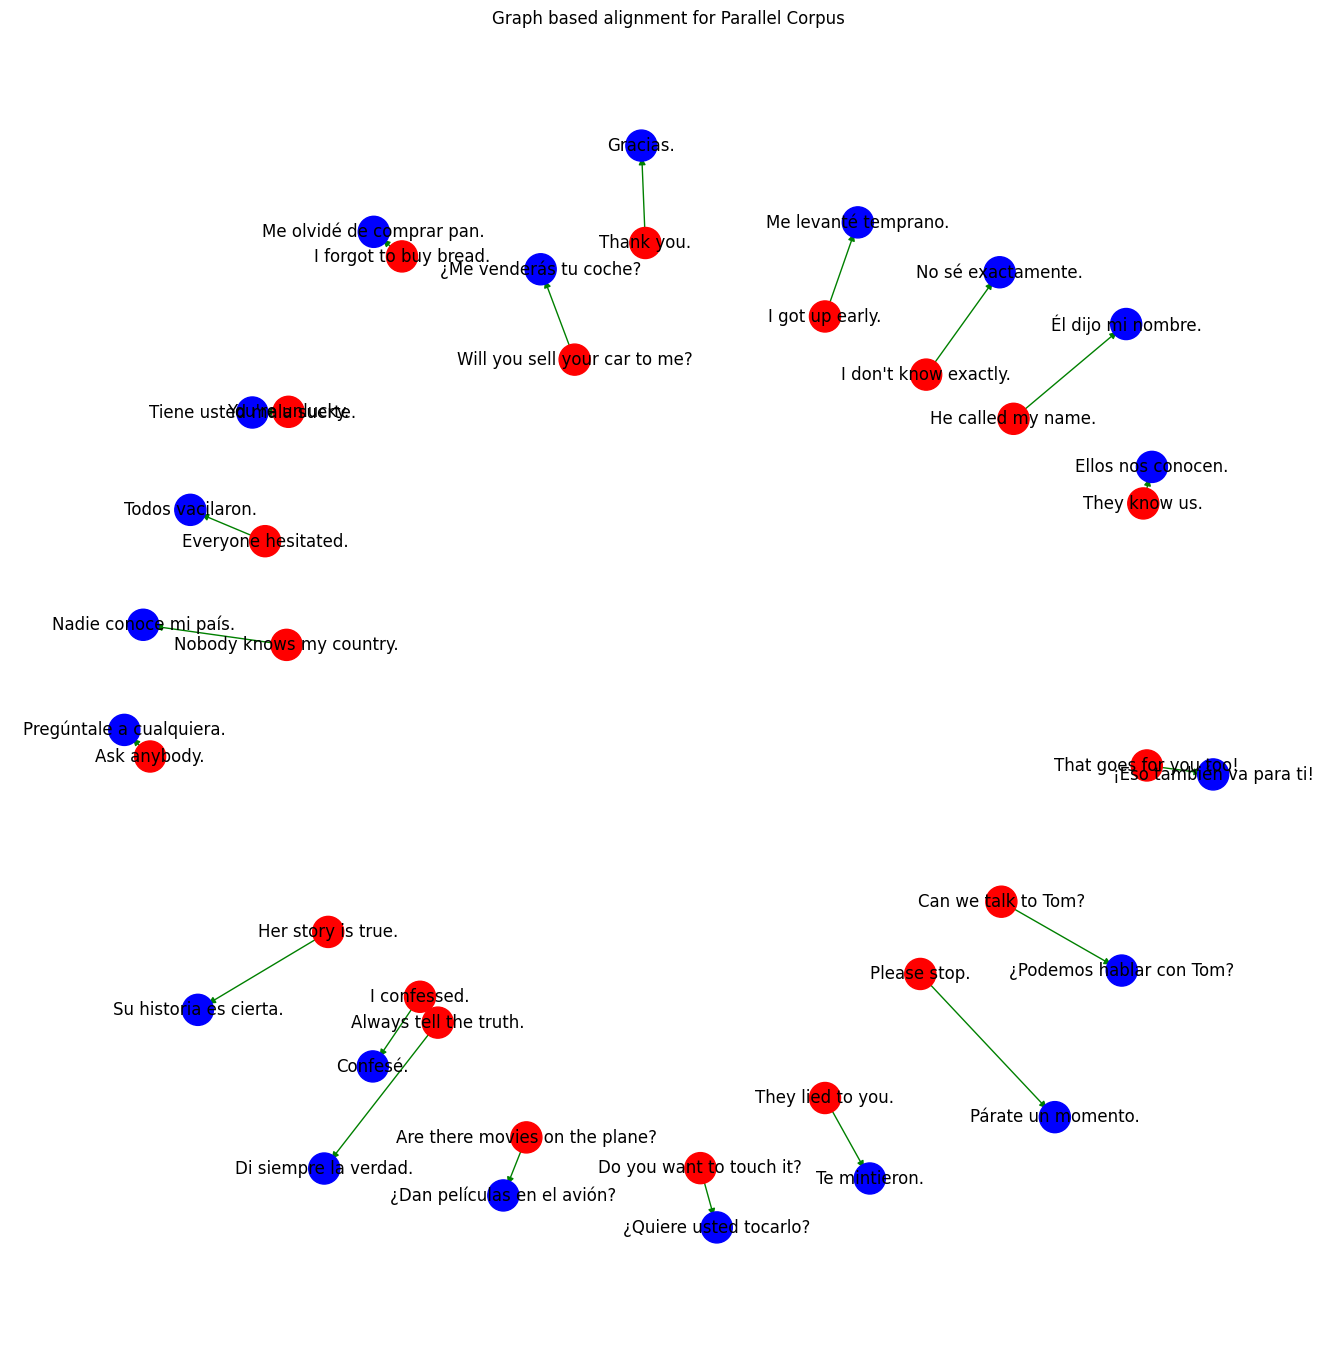

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

!pip install indic-transliteration
from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate



def visualize_btg_parallel_corpus(source_file, target_file):
    # Initialize directed graph
    graph = nx.DiGraph()

    with open(source_file, 'r', encoding='utf-8') as source_file, open(target_file, 'r') as target_file:
        for source_sentence, target_sentence in zip(source_file, target_file):
            source_sentence = source_sentence.strip()
            target_sentence = target_sentence.strip()

            # Add source and target sentences as nodes
            graph.add_node(source_sentence, color='red')
            graph.add_node(target_sentence, color='blue')

            # Add an edge from source to target sentence
            graph.add_edge(source_sentence, target_sentence)

    # Set node colors based on language
    node_colors = [node[1]['color'] for node in graph.nodes(data=True)]

    # Increase figure size for larger graph
    plt.figure(figsize=(17,17))

    # Visualize the graph
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=500)
    nx.draw_networkx_edges(graph, pos, edge_color='green', arrows=True)
    nx.draw_networkx_labels(graph, pos, font_color='black')

    plt.title('Graph based alignment for Parallel Corpus')
    plt.axis('off')
    plt.show()

# Example usage
source_file = '/content/english5.txt'
target_file = '/content/spanish5.txt'


visualize_btg_parallel_corpus(source_file, target_file)


In [ ]:
!pip install indic_transliteration

from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate

def transliterate_to_hindi(text):
    # Transliterate the text from English to Hindi (IAST)
    return transliterate(text, sanscript.ITRANS, sanscript.DEVANAGARI)

# Example usage
english_text = "Hello, how are you?"
hindi_text = transliterate_to_hindi(english_text)
print(hindi_text)  # Output: "हैलो, हाउ आरे यू?"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.6/144.6 kB 3.3 MB/s eta 0:00:00
ःएल्लो, होव् अरे योउ?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## Inversion Transduction Grammar

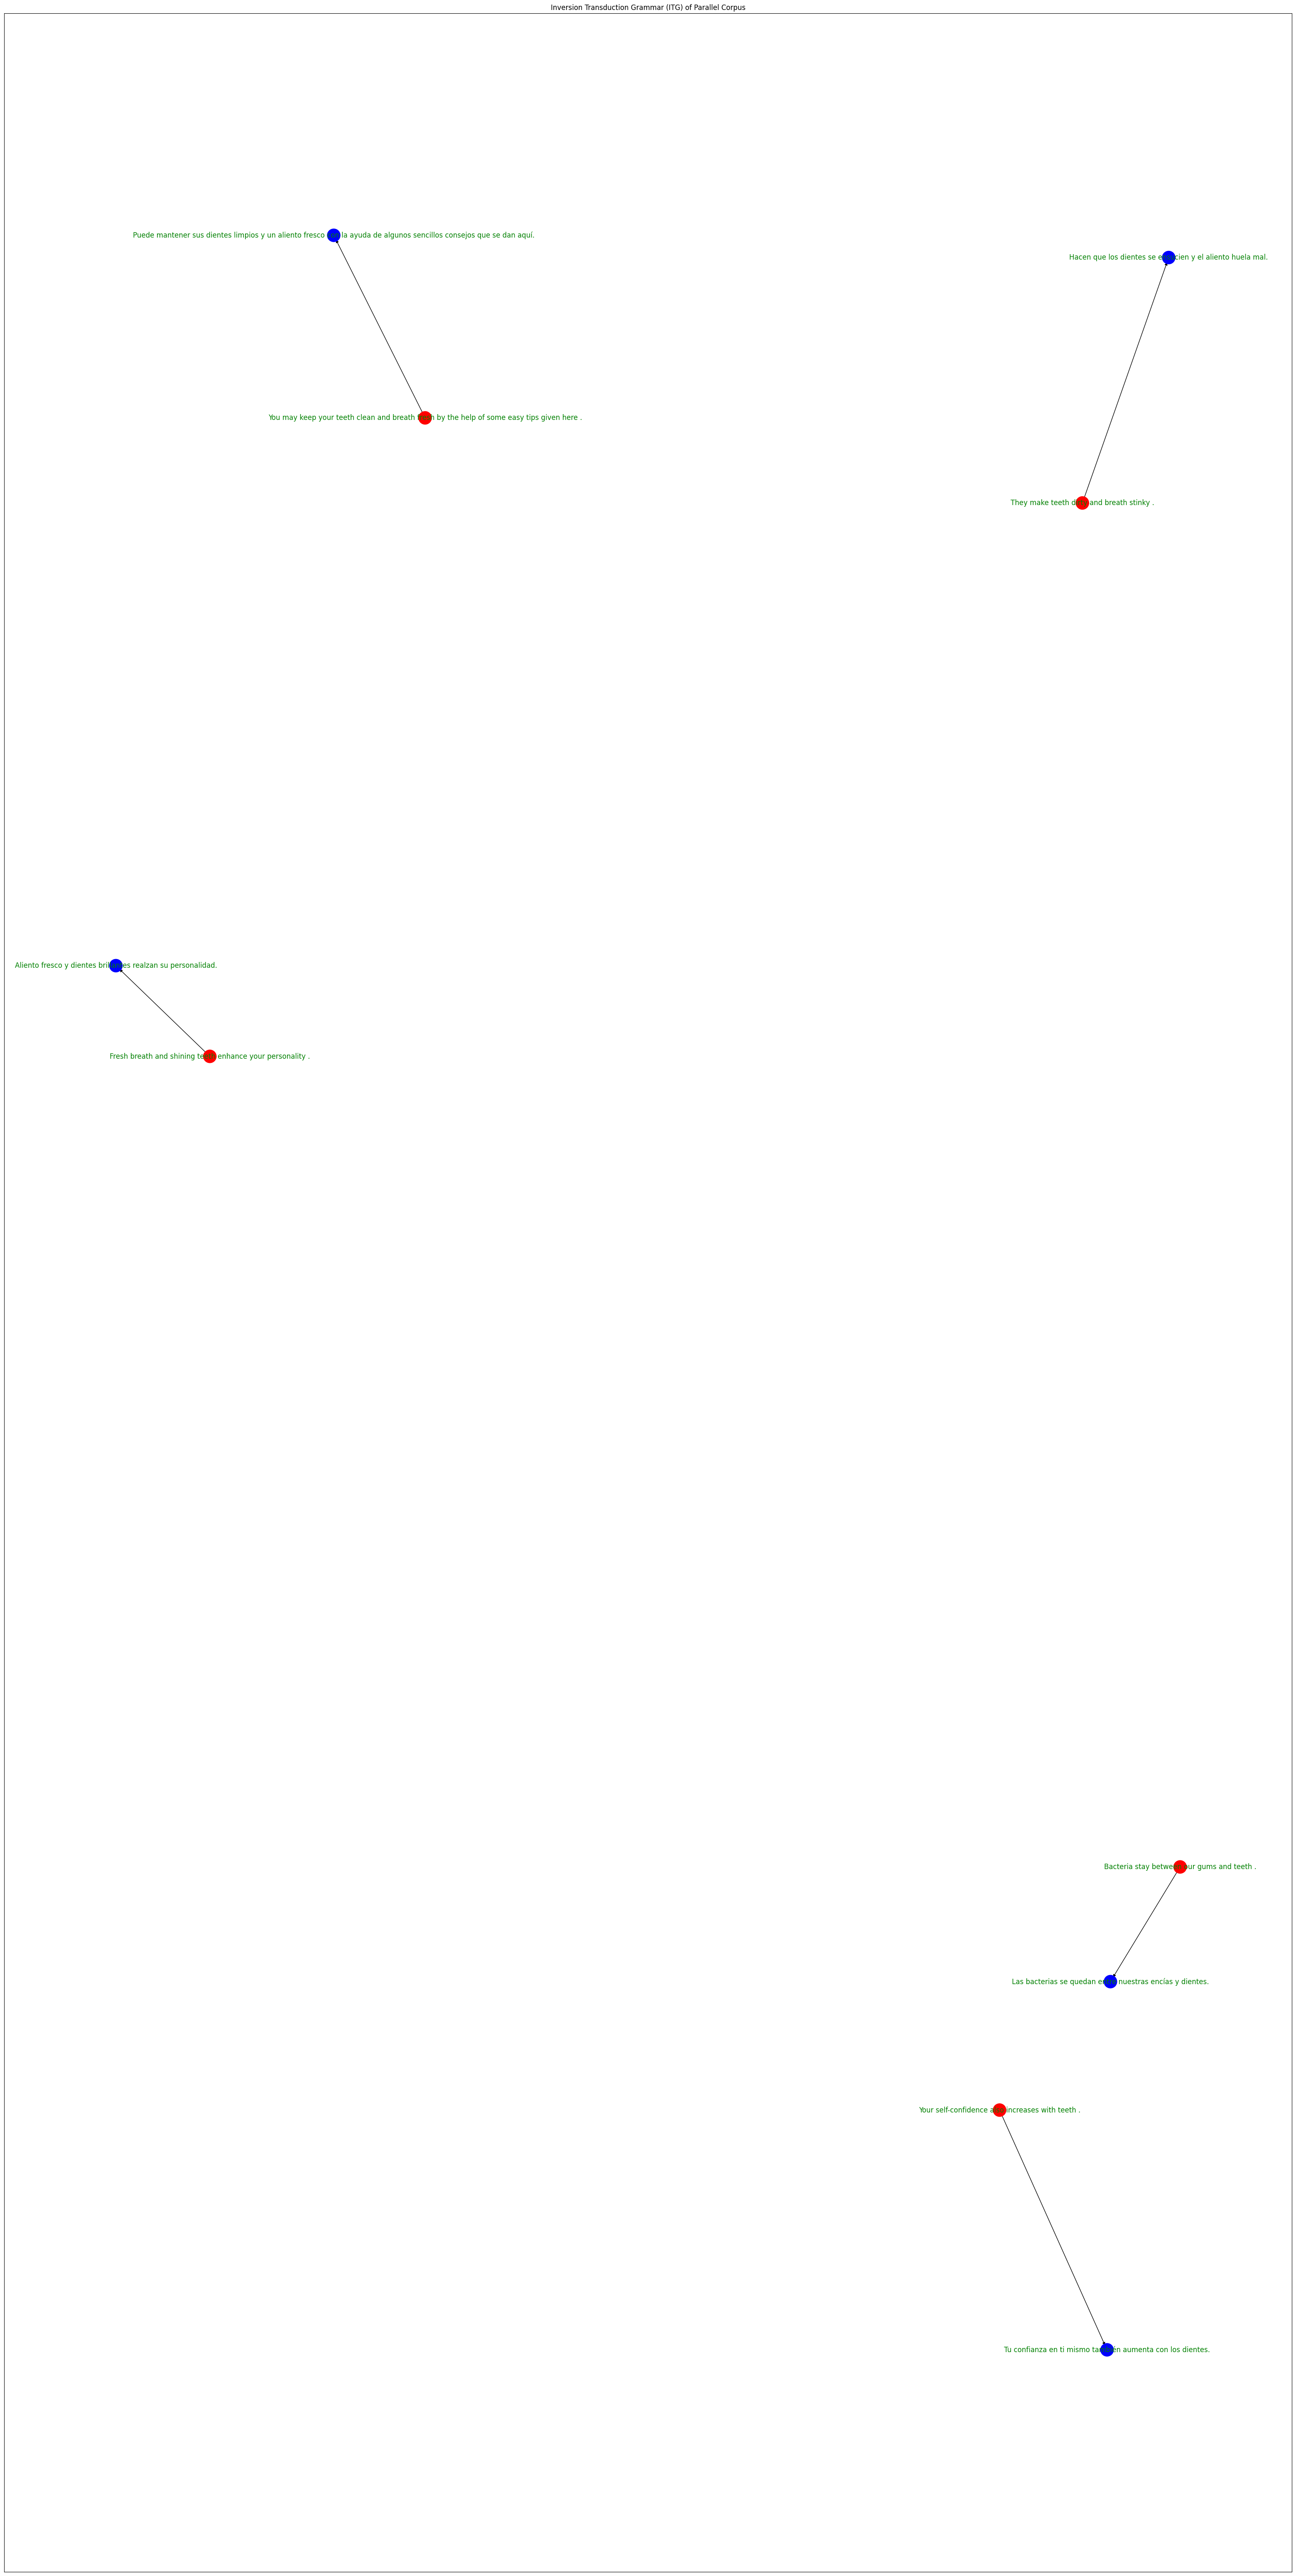

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
font = "gargi.ttf"

def visualize_itg_parallel_corpus(source_file, target_file):
    # Initialize directed graph
    graph = nx.DiGraph()

    with open(source_file, 'r', encoding='utf-8') as source_file, open(target_file, 'r', encoding='utf-8') as target_file:
        for source_sentence, target_sentence in zip(source_file, target_file):
            source_sentence = source_sentence.strip()
            target_sentence = target_sentence.strip()

            # Add source and target sentences as nodes
            graph.add_node(source_sentence, color='red')
            graph.add_node(target_sentence, color='blue')

            # Add an edge from source to target sentence
            graph.add_edge(source_sentence, target_sentence)

    # Set node colors based on language
    node_colors = [node[1]['color'] for node in graph.nodes(data=True)]

    # Increase figure size for larger graph
    plt.figure(figsize=(40, 80))

    # Visualize the whole graph
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=500)
    nx.draw_networkx_edges(graph, pos, edge_color='black', arrows=True)
    nx.draw_networkx_labels(graph, pos, font_color='green')

    plt.title('Inversion Transduction Grammar (ITG) of Parallel Corpus')
    plt.axis('on')
    plt.show()

# Example usage
source_file = '/content/english5.txt'
target_file = '/content/spanish5.txt'

visualize_itg_parallel_corpus(source_file, target_file)


In [ ]:
import nltk

def generate_btg(parallel_corpus):
  """Generates a bracketed transduction grammar for a parallel corpus.

  Args:
    parallel_corpus: A list of parallel sentence pairs.

  Returns:
    A BTG that represents the syntactic structure of the parallel corpus.
  """

  btg = nltk.CFG.fromstring("")
  for sentence_pair in parallel_corpus:
    for source_word, target_word in zip(sentence_pair[0], sentence_pair[1]):
      btg.productions.append((source_word, target_word))

  return btg

if __name__ == "__main__":
  parallel_corpus = [
      ("The dog is brown.", "Le chien est brun."),
      ("The cat is black.", "Le chat est noir."),
  ]

  btg = generate_btg(parallel_corpus)

  print(btg)


ValueError: ignored

In [ ]:
def generate_transduction_grammar(source_corpus, target_corpus):
    grammar_rules = []

    for source_sentence, target_sentence in zip(source_corpus, target_corpus):
        source_tokens = source_sentence.split()
        target_tokens = target_sentence.split()

        # Find patterns and generate rules
        for i in range(len(source_tokens)):
            source_pattern = ' '.join(source_tokens[:i+1])
            target_pattern = ' '.join(target_tokens[:i+1])

            rule = f'{{{source_pattern}}} -> {{{target_pattern}}}'
            grammar_rules.append(rule)

    return grammar_rules

# Example usage
source_corpus = [
    "I am happy",
    "He is running"
]

target_corpus = [
    "Je suis heureux",
    "Il court"
]

grammar = generate_transduction_grammar(source_corpus, target_corpus)

# Print the generated grammar rules
for rule in grammar:
    print(rule)


In [ ]:
def generate_transduction_grammar(source_file, target_file):
    grammar_rules = []

    with open(source_file, 'r') as f_source, open(target_file, 'r') as f_target:
        source_corpus = f_source.readlines()
        target_corpus = f_target.readlines()

        for source_sentence, target_sentence in zip(source_corpus, target_corpus):
            source_tokens = source_sentence.split()
            target_tokens = target_sentence.split()

            # Find patterns and generate rules
            for i in range(len(source_tokens)):
                source_pattern = ' '.join(source_tokens[:i+1])
                target_pattern = ' '.join(target_tokens[:i+1])

                rule = f'{{{source_pattern}}} -> {{{target_pattern}}}'
                grammar_rules.append(rule)

    return grammar_rules

# Example usage
source_file = '/content/english5.txt'
target_file = '/content/spanish5.txt'

grammar = generate_transduction_grammar(source_file, target_file)

# Print the generated grammar rules
for rule in grammar:
    print(rule)


{Can} -> {¿Podemos}
{Can we} -> {¿Podemos hablar}
{Can we talk} -> {¿Podemos hablar con}
{Can we talk to} -> {¿Podemos hablar con Tom?}
{Can we talk to Tom?} -> {¿Podemos hablar con Tom?}
{Do} -> {¿Quiere}
{Do you} -> {¿Quiere usted}
{Do you want} -> {¿Quiere usted tocarlo?}
{Do you want to} -> {¿Quiere usted tocarlo?}
{Do you want to touch} -> {¿Quiere usted tocarlo?}
{Do you want to touch it?} -> {¿Quiere usted tocarlo?}
{Will} -> {¿Me}
{Will you} -> {¿Me venderás}
{Will you sell} -> {¿Me venderás tu}
{Will you sell your} -> {¿Me venderás tu coche?}
{Will you sell your car} -> {¿Me venderás tu coche?}
{Will you sell your car to} -> {¿Me venderás tu coche?}
{Will you sell your car to me?} -> {¿Me venderás tu coche?}
{Her} -> {Su}
{Her story} -> {Su historia}
{Her story is} -> {Su historia es}
{Her story is true.} -> {Su historia es cierta.}
{I} -> {Me}
{I forgot} -> {Me olvidé}
{I forgot to} -> {Me olvidé de}
{I forgot to buy} -> {Me olvidé de comprar}
{I forgot to buy bread.} -> {Me 

# New Section

In [ ]:
from nltk.parse import RecursiveDescentParser
from nltk.grammar import CFG

grammar_string = '''
S -> NP
NP -> PN | PRO | D N | D A N | D N PP | QP N | A N | D NOM PP | D NOM

PP -> P NP
PN -> 'saumya'|'dinesh'
PRO -> 'she'|'he'|'we'
A -> 'tall'|'naughty'|'long'|'three'|'black'
P -> 'with'|'in'|'from'|'at'
QP -> 'some'

D -> D_def | D_sg
D_def -> 'the'
D_sg -> 'a'

N -> N_sg | N_pl
N_sg -> 'boy'|'girl'|'room'|'garden'|'hair'
N_pl -> 'dogs'|'cats'
'''

grammar = CFG.fromstring(grammar_string)

rdparser = RecursiveDescentParser(grammar)
sent = "a dogs".split()
trees = rdparser.parse(sent)

for tree in trees:
    print (tree)

(S (NP (D (D_sg a)) (N (N_pl dogs))))


In [ ]:
import re

def generate_cfg_tree(parallel_corpus):
  """
  Generates a CFG tree for a parallel corpus.

  Args:
    parallel_corpus: A list of parallel sentence pairs.

  Returns:
    A list of CFG trees.
  """

  cfg_trees = []
  for sentence_pair in parallel_corpus:
    cfg_tree = generate_cfg_tree_for_sentence_pair(sentence_pair)
    cfg_trees.append(cfg_tree)

  return cfg_trees

def generate_cfg_tree_for_sentence_pair(sentence_pair):
  """
  Generates a CFG tree for a parallel sentence pair.

  Args:
    sentence_pair: A list of two sentences.

  Returns:
    A CFG tree.
  """

  cfg_tree = {}
  for i, word in enumerate(sentence_pair[0]):
    cfg_tree[word] = []
    for j, word_prime in enumerate(sentence_pair[1]):
      if word == word_prime:
        cfg_tree[word].append(j)

  return cfg_tree

if __name__ == "__main__":
  parallel_corpus = [
    ("This is a sentence.", "यह एक वाक्य है।"),
    ("This is another sentence.", "यह एक और वाक्य है।"),
  ]
  cfg_trees = generate_cfg_tree(parallel_corpus)
  print(cfg_trees)


[{'T': [], 'h': [], 'i': [], 's': [], ' ': [2, 5, 11], 'a': [], 'e': [], 'n': [], 't': [], 'c': [], '.': []}, {'T': [], 'h': [], 'i': [], 's': [], ' ': [2, 5, 8, 14], 'a': [], 'n': [], 'o': [], 't': [], 'e': [], 'r': [], 'c': [], '.': []}]


In [ ]:
import re

def generate_cfg_tree(parallel_corpus):
  """
  Generates a CFG tree for a parallel corpus English to Spanish.

  Args:
    parallel_corpus: A list of parallel sentence pairs English to Spanish.

  Returns:
    A list of CFG trees.
  """

  cfg_trees = []
  for sentence_pair in parallel_corpus:
    cfg_tree = generate_cfg_tree_for_sentence_pair(sentence_pair)
    cfg_trees.append(cfg_tree)

  return cfg_trees

def generate_cfg_tree_for_sentence_pair(sentence_pair):
  """
  Generates a CFG tree for a parallel sentence pair English to Spanish.

  Args:
    sentence_pair: A list of two sentences English to Spanish.

  Returns:
    A CFG tree.
  """

  cfg_tree = {}
  for i, word in enumerate(sentence_pair[0]):
    cfg_tree[word] = []
    for j, word_prime in enumerate(sentence_pair[1]):
      if word == word_prime:
        cfg_tree[word].append(j)

  return cfg_trees

if __name__ == "__main__":
  parallel_corpus = [
    ("This is a sentence.", "Esta es una oración."),
    ("This is another sentence.", "Esta es otra oración."),
  ]
  cfg_trees = generate_cfg_tree(parallel_corpus)
  print(cfg_trees)


[[{'T': [], 'h': [], 'i': [], 's': [], ' ': [2, 5, 11], 'a': [], 'e': [], 'n': [], 't': [], 'c': [], '.': []}, {'T': [], 'h': [], 'i': [], 's': [], ' ': [2, 5, 8, 14], 'a': [], 'n': [], 'o': [], 't': [], 'e': [], 'r': [], 'c': [], '.': []}], [{'T': [], 'h': [], 'i': [], 's': [], ' ': [2, 5, 11], 'a': [], 'e': [], 'n': [], 't': [], 'c': [], '.': []}, {'T': [], 'h': [], 'i': [], 's': [], ' ': [2, 5, 8, 14], 'a': [], 'n': [], 'o': [], 't': [], 'e': [], 'r': [], 'c': [], '.': []}]]


In [ ]:
In [1]: from indic_transliteration import sanscript
   ...: from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate
   ...:

In [2]: data = 'idam adbhutam'

In [3]: print(transliterate(data, sanscript.HK, sanscript.TELUGU))




ఇదమ్ అద్భుతమ్


In [ ]:
In [4]: print(transliterate(data, sanscript.ITRANS, sanscript.DEVANAGARI))


इदम् अद्भुतम्


In [ ]:

In [5]: scheme_map = SchemeMap(SCHEMES[sanscript.VELTHUIS], SCHEMES[sanscript.TELUGU])

In [6]: print(transliterate(data, scheme_map=scheme_map))


ఇదమ్ అద్భుతమ్


In [ ]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
import os

with open("/content/hindi5.txt", "r") as filestream:
    cnum = 1
    astr = filestream.read().splitlines()

    font5 = ImageFont.truetype('/content/DejaVuSans.ttf', 26)

    MAX_W, MAX_H = 1500, 1500


    foreground_image = Image.new('RGB', (MAX_W, MAX_H), (0, 0, 0, 0))
    draw = ImageDraw.Draw(foreground_image)
    image_name = str(cnum) + "_" + "image.png"

    current_h, pad = 40, 14
    c = 1
    for txtline in astr:
        line = str(c) + ").  " + txtline
        #printing on console to check if lines are coming correctly.
        print(line)
        w, h = draw.textsize(line, font=font5)
        draw.text((10, current_h), line, font=font5, fill=(255,255,255,1))
        current_h += h + pad
        c = c + 1


    #saving image
    foreground_image.save(image_name)
    cnum = cnum + 1

1).  अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें
2).  एक्सेर्साइसर पहुंचनीयता अन्वेषक
3).  निचले पटल के लिए डिफोल्ट प्लग-इन खाका
4).  ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका
5).  उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से निष्क्रिय किया गया है


In [ ]:
import nltk

def generate_grammar_tree(sentence):
  """
  Generate a grammar tree for an English sentence.

  Args:
    sentence: A string containing an English sentence.

  Returns:
    A grammar tree representing the syntactic structure of the sentence.
  """

  # Tokenize the sentence.
  tokens = nltk.word_tokenize(sentence)

  # Tag the tokens with their parts of speech.
  tagged_tokens = nltk.pos_tag(tokens)

  # Create a grammar tree from the tagged tokens.
  grammar_tree = nltk.Tree.fromstring(tagged_tokens)

  return grammar_tree

def main():
  """
  Generate a grammar tree for the sentence "The quick brown fox jumps over the lazy dog."
  """

  sentence = "The quick brown fox jumps over the lazy dog."
  grammar_tree = generate_grammar_tree(sentence)

  print(grammar_tree)

if __name__ == "__main__":
  main()


LookupError: ignored

In [ ]:
def generate_induction_grammar(source_sentence, target_sentence):
    source_words = source_sentence.split()
    target_words = target_sentence.split()

    if len(source_words) != len(target_words):
        raise ValueError("Source and target sentences must have the same number of words.")

    grammar = [(source_word, target_word) for source_word, target_word in zip(source_words, target_words)]
    return grammar

# Example usage:
english_sentence = "My Name is Subramanyam Sahoo"
spanish_sentence = "Yo soy Subramanyam Sahoo"

induction_grammar = generate_induction_grammar(english_sentence, spanish_sentence)
print(induction_grammar)


ValueError: ignored

In [ ]:
def generate_induction_grammar(english_sentence, spanish_sentence, word_alignments):
    english_words = english_sentence.split()
    spanish_words = spanish_sentence.split()

    grammar = []
    for alignment in word_alignments:
        src_word_idx, tgt_word_idx = alignment
        src_word = english_words[src_word_idx]
        tgt_word = spanish_words[tgt_word_idx]
        grammar.append((src_word, tgt_word))

    return grammar

# Example usage:
english_sentence = "My Name is Subramanyam Sahoo"
spanish_sentence = "Yo soy Subramanyam Sahoo"
word_alignments = [(0, 0), (1, 2), (2, 1), (3, 3), (4, 4)]

induction_grammar = generate_induction_grammar(english_sentence, spanish_sentence, word_alignments)
print(induction_grammar)

IndexError: ignored

In [ ]:
def generate_induction_grammar(english_sentence, spanish_sentence, word_alignments):
    english_words = english_sentence.split()
    spanish_words = spanish_sentence.split()

    grammar = []
    for alignment in word_alignments:
        src_word_idx, tgt_word_idx = alignment
        if src_word_idx < len(english_words) and tgt_word_idx < len(spanish_words):
            src_word = english_words[src_word_idx]
            tgt_word = spanish_words[tgt_word_idx]
            grammar.append((src_word, tgt_word))

    return grammar

# Example usage:
english_sentence = "My Name is Subramanyam Sahoo"
spanish_sentence = "Mi Nombre es Subramanyam Sahoo"
word_alignments = [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]

induction_grammar = generate_induction_grammar(english_sentence, spanish_sentence, word_alignments)
print(induction_grammar)


[('My', 'Mi'), ('Name', 'Nombre'), ('is', 'es'), ('Subramanyam', 'Subramanyam'), ('Sahoo', 'Sahoo')]


In [ ]:
# Assuming you have two files: 'english_corpus.txt' and 'spanish_corpus.txt', each containing one sentence per line.

def read_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return [sentence.strip() for sentence in file]

# Read English and Spanish sentences from the files
english_corpus = read_corpus('/content/english5.txt')
spanish_corpus = read_corpus('/content/spanish5.txt')

# Tokenize sentences into words
english_sentences = [sentence.split() for sentence in english_corpus]
spanish_sentences = [sentence.split() for sentence in spanish_corpus]

# Word-wise translation with brackets
def bracket_word_translation(english_words, spanish_words):
    bracketed_translation = []
    for eng_word, spa_word in zip(english_words, spanish_words):
        bracketed_translation.append(f"[{eng_word} -> {spa_word}]")
    return " ".join(bracketed_translation)

# Applying word-wise translation to all sentence pairs
for eng_sent, spa_sent in zip(english_sentences, spanish_sentences):
    word_translation = bracket_word_translation(eng_sent, spa_sent)
    print(word_translation)

# Output will show the word-wise BTG for each sentence pair.

# Sentence-wise translation would require more complex rules and transformation functions, which may involve rule-based systems, machine translation models, or neural networks.


[Can -> ¿Podemos] [we -> hablar] [talk -> con] [to -> Tom?]
[Do -> ¿Quiere] [you -> usted] [want -> tocarlo?]
[Will -> ¿Me] [you -> venderás] [sell -> tu] [your -> coche?]
[Her -> Su] [story -> historia] [is -> es] [true. -> cierta.]
[I -> Me] [forgot -> olvidé] [to -> de] [buy -> comprar] [bread. -> pan.]
[Are -> ¿Dan] [there -> películas] [movies -> en] [on -> el] [the -> avión?]
[Everyone -> Todos] [hesitated. -> vacilaron.]
[I -> Me] [got -> levanté] [up -> temprano.]
[They -> Ellos] [know -> nos] [us. -> conocen.]
[Always -> Di] [tell -> siempre] [the -> la] [truth. -> verdad.]
[That -> ¡Eso] [goes -> también] [for -> va] [you -> para] [too! -> ti!]
[Nobody -> Nadie] [knows -> conoce] [my -> mi] [country. -> país.]
[Thank -> Gracias.]
[I -> No] [don't -> sé] [know -> exactamente.]
[They -> Te] [lied -> mintieron.]
[Please -> Párate] [stop. -> un]
[I -> Confesé.]
[You're -> Tiene] [unlucky. -> usted]
[He -> Él] [called -> dijo] [my -> mi] [name. -> nombre.]
[Ask -> Pregúntale] [any

In [ ]:
import spacy

# Load the SpaCy models for English and Spanish
nlp_en = spacy.load("en_core_web_sm")
#nlp_es = spacy.load("es_core_news_sm")

# Sample English and Spanish sentences
english_sentence = "I like to eat apples."
#spanish_sentence = "Me gusta comer manzanas."

# Perform part-of-speech tagging on the English sentence
english_doc = nlp_en(english_sentence)
english_pos_tags = [(token.text, token.pos_) for token in english_doc]

# Perform part-of-speech tagging on the Spanish sentence
#panish_doc = nlp_es(spanish_sentence)
#spanish_pos_tags = [(token.text, token.pos_) for token in spanish_doc]

# Print the part-of-speech tags for English and Spanish
print("English POS Tags:", english_pos_tags)
#print("Spanish POS Tags:", spanish_pos_tags)


English POS Tags: [('I', 'PRON'), ('like', 'VERB'), ('to', 'PART'), ('eat', 'VERB'), ('apples', 'NOUN'), ('.', 'PUNCT')]


In [ ]:
def read_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return [sentence.strip() for sentence in file]

def bracket_word_translation(english_words, spanish_words):
    # Assuming both English and Spanish sentences have the same number of words
    bracketed_translation = []
    for eng_word, spa_word in zip(english_words, spanish_words):
        bracketed_translation.append(f"[{eng_word} -> {spa_word}]")
    return " ".join(bracketed_translation)

def generate_wordwise_btg(english_corpus, spanish_corpus):
    english_sentences = read_corpus(english_corpus)
    spanish_sentences = read_corpus(spanish_corpus)

    for eng_sent, spa_sent in zip(english_sentences, spanish_sentences):
        eng_words = eng_sent.split()
        spa_words = spa_sent.split()

        word_translation = bracket_word_translation(eng_words, spa_words)
        print(word_translation)

# Replace 'english_corpus.txt' and 'spanish_corpus.txt' with the actual file paths.
generate_wordwise_btg('/content/english5.txt', '/content/spanish5.txt')


[Can -> ¿Podemos] [we -> hablar] [talk -> con] [to -> Tom?]
[Do -> ¿Quiere] [you -> usted] [want -> tocarlo?]
[Will -> ¿Me] [you -> venderás] [sell -> tu] [your -> coche?]
[Her -> Su] [mother -> madre] [was -> estaba] [busy -> ocupada] [cooking -> haciendo] [dinner. -> la]
[He -> El] [waters -> riega] [the -> el] [garden -> jardín] [once -> una] [a -> vez] [week. -> a]
[Are -> ¿Dan] [there -> películas] [movies -> en] [on -> el] [the -> avión?]
[Everyone -> Todos] [hesitated. -> vacilaron.]
[I -> Me] [got -> levanté] [up -> temprano.]
[They -> Ellos] [know -> nos] [us. -> conocen.]
[Always -> Di] [tell -> siempre] [the -> la] [truth. -> verdad.]
[That -> ¡Eso] [goes -> también] [for -> va] [you -> para] [too! -> ti!]
[Nobody -> Nadie] [knows -> conoce] [my -> mi] [country. -> país.]
[Thank -> Gracias.]
[I -> No] [don't -> sé] [know -> exactamente.]
[They -> Te] [lied -> mintieron.]
[Please -> Párate] [stop. -> un]
[I -> Confesé.]
[You're -> Tiene] [unlucky. -> usted]
[He -> Él] [called

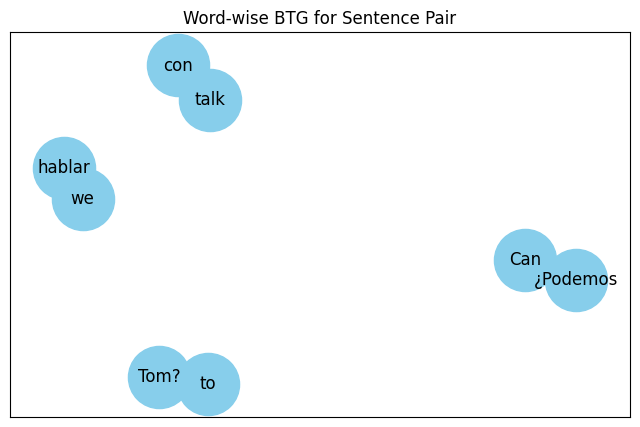

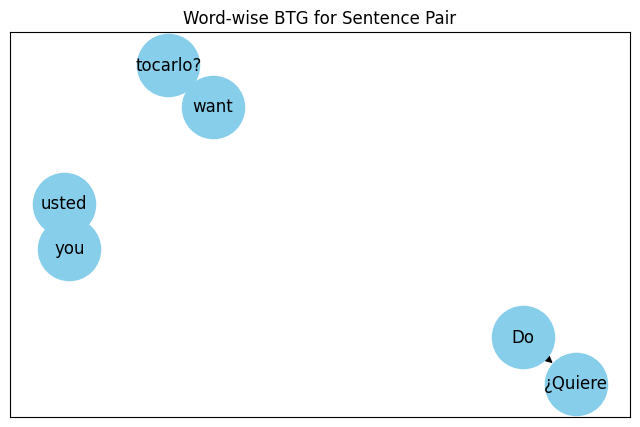

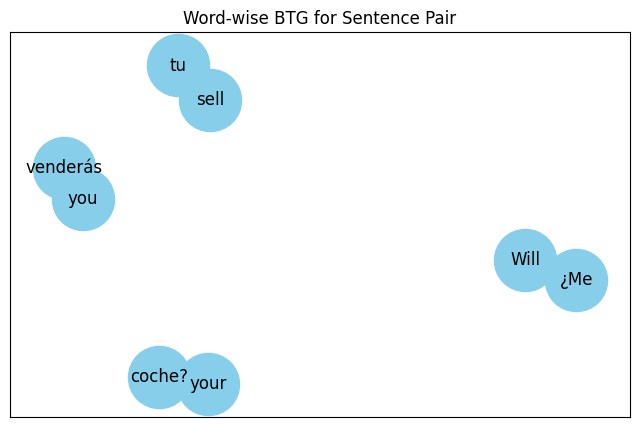

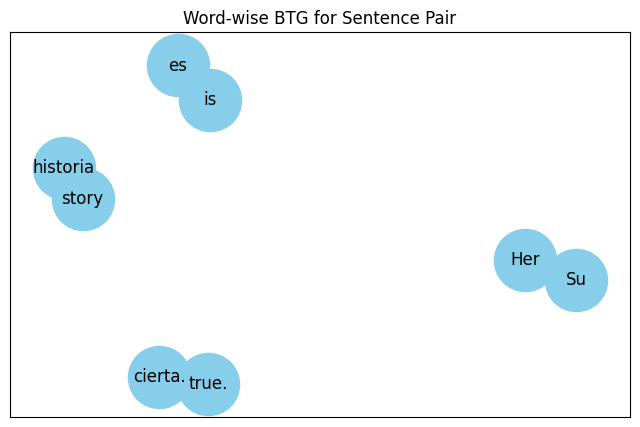

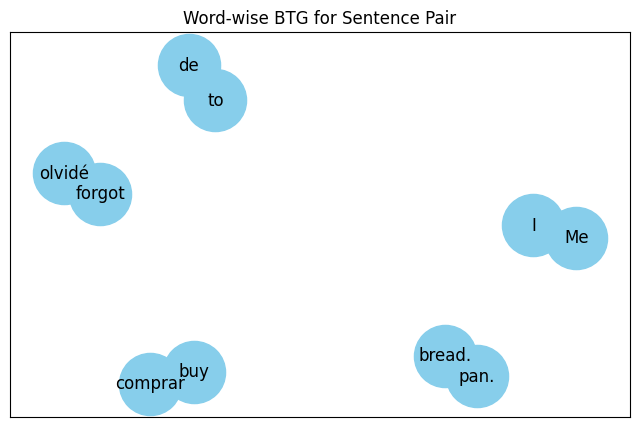

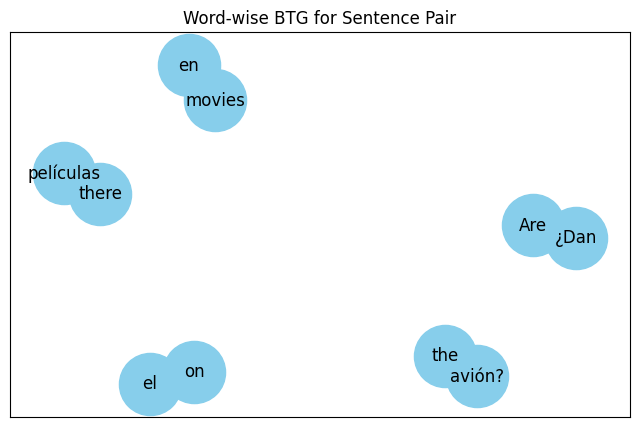

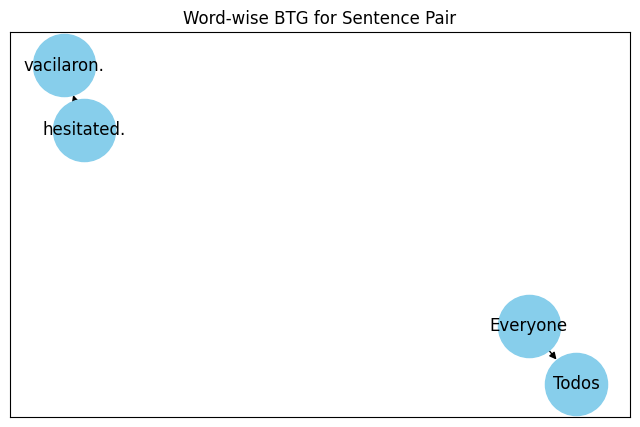

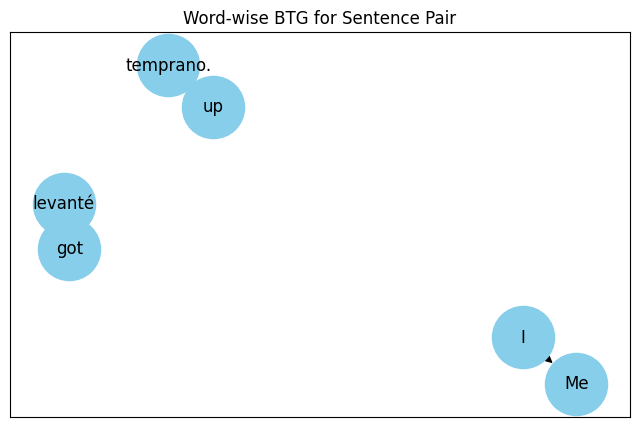

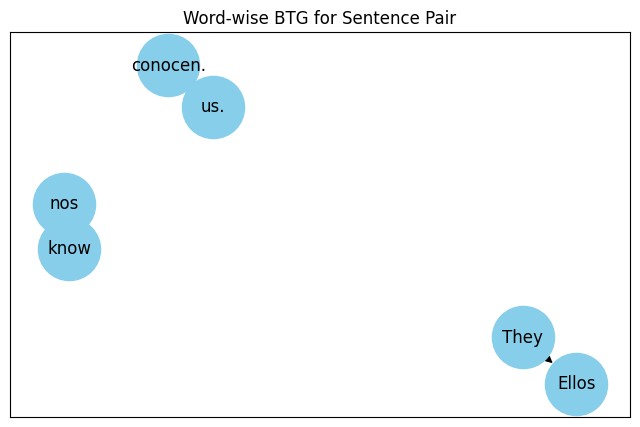

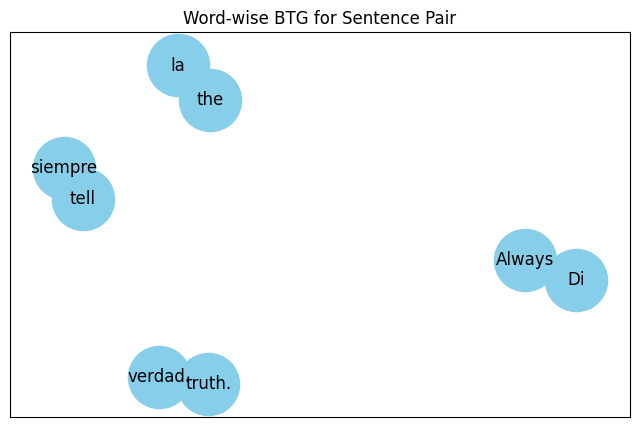

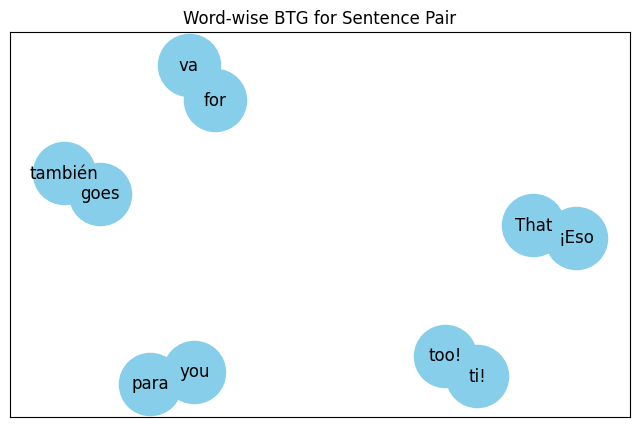

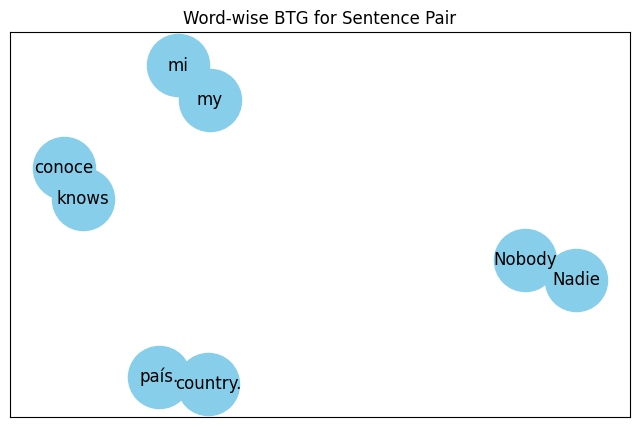

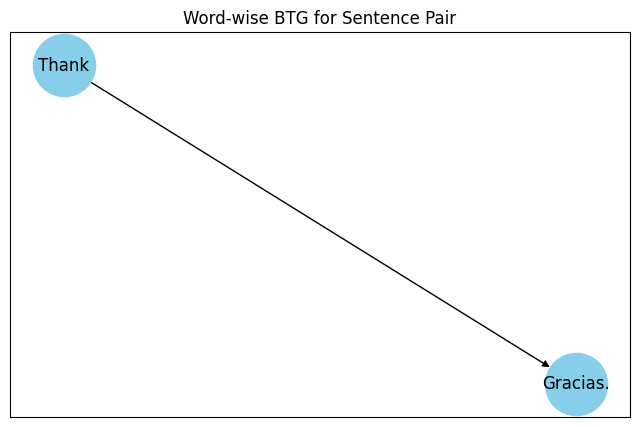

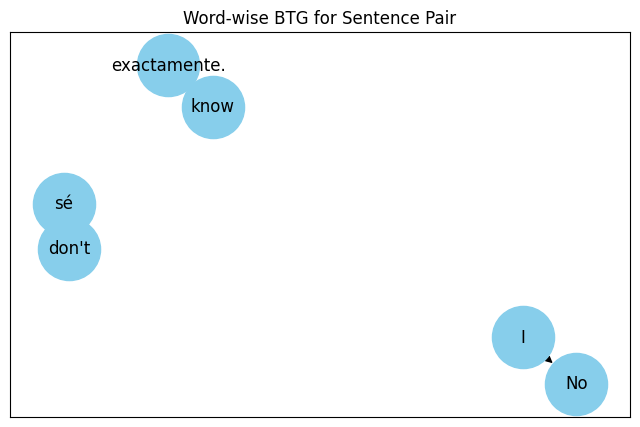

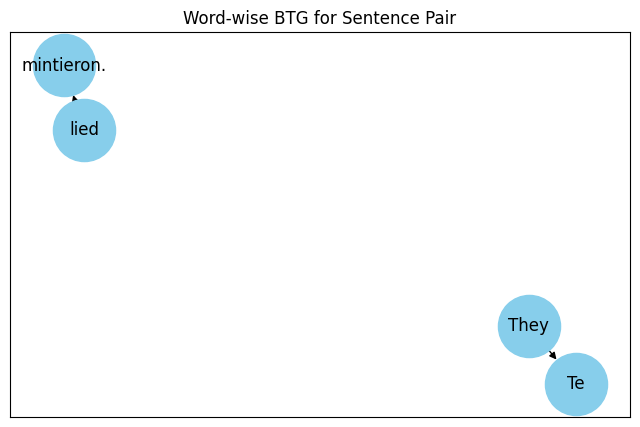

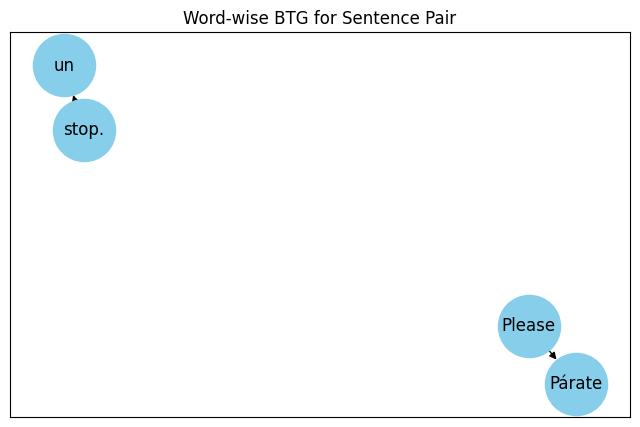

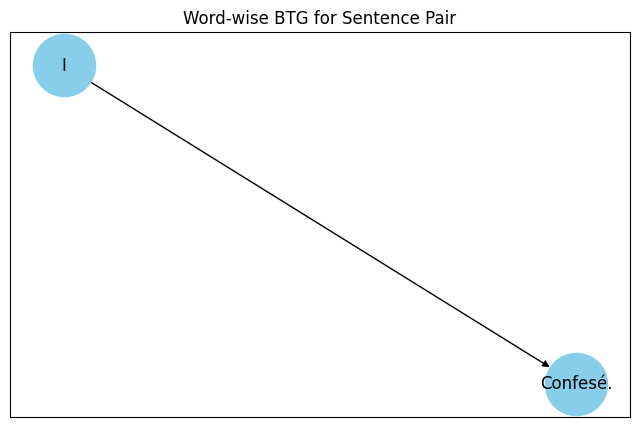

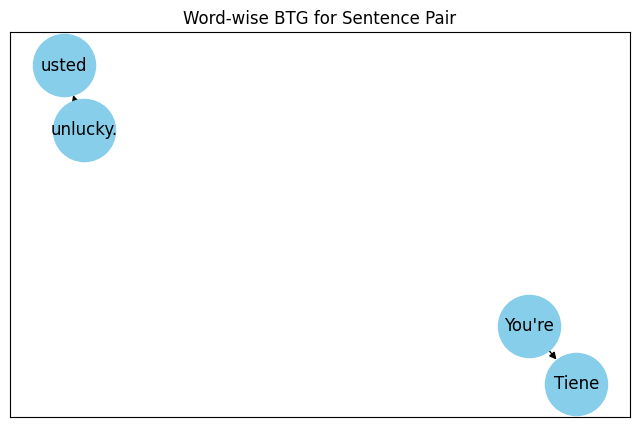

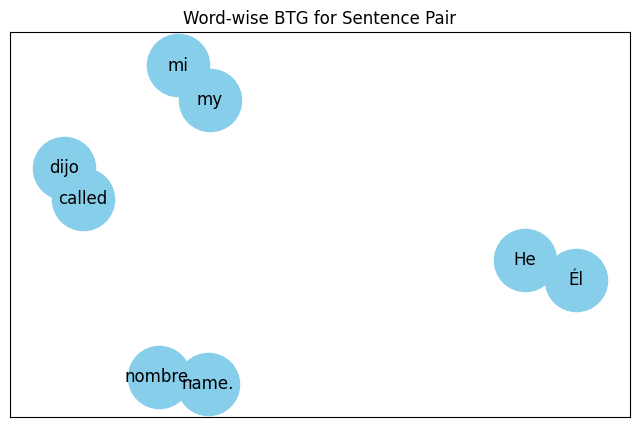

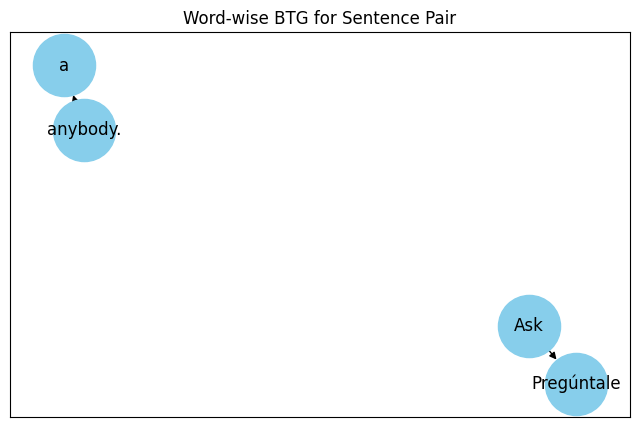

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def read_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return [sentence.strip() for sentence in file]

def generate_wordwise_btg(english_corpus, spanish_corpus):
    english_sentences = read_corpus(english_corpus)
    spanish_sentences = read_corpus(spanish_corpus)

    for eng_sent, spa_sent in zip(english_sentences, spanish_sentences):
        eng_words = eng_sent.split()
        spa_words = spa_sent.split()

        # Create a directed graph for the word-wise BTG
        graph = nx.DiGraph()
        for eng_word, spa_word in zip(eng_words, spa_words):
            graph.add_edge(eng_word, spa_word)

        # Plot the directed graph (optional)
        plt.figure(figsize=(8, 5))
        pos = nx.spring_layout(graph, seed=42)
        nx.draw_networkx(graph, pos, with_labels=True, node_color='skyblue', font_size=12, node_size=2000)
        plt.title("Word-wise BTG for Sentence Pair")
        plt.show()

# Replace 'english_corpus.txt' and 'spanish_corpus.txt' with the actual file paths.
generate_wordwise_btg('/content/english5.txt', '/content/spanish5.txt')


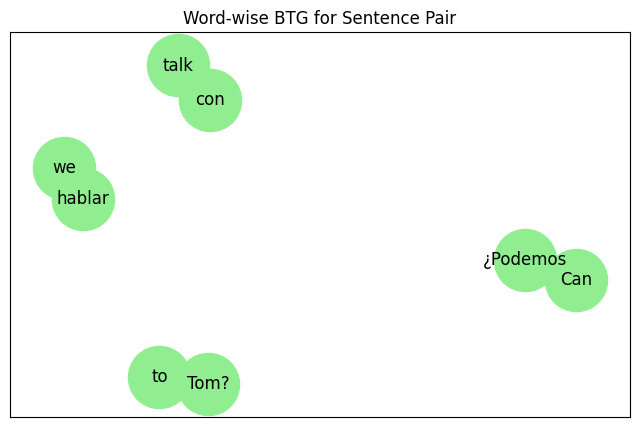

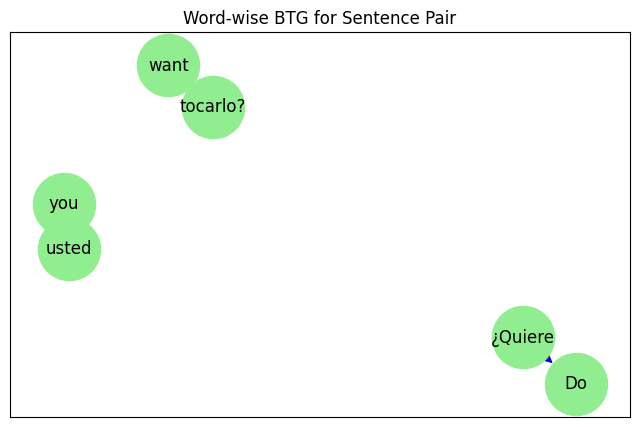

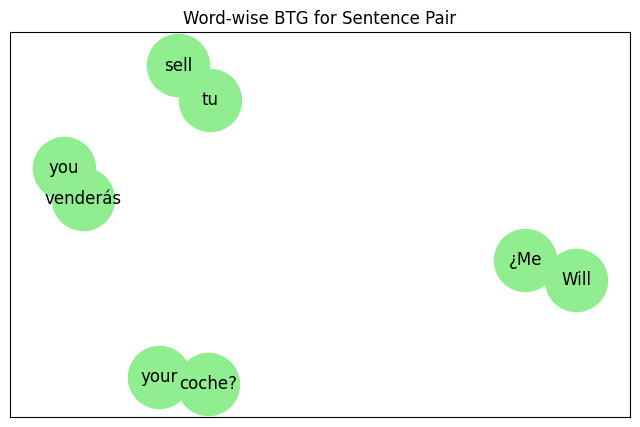

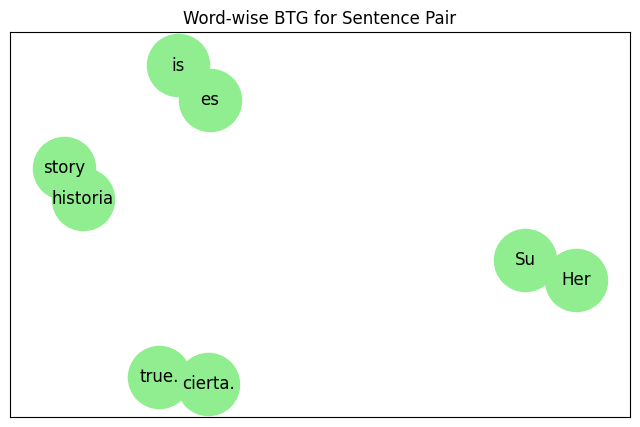

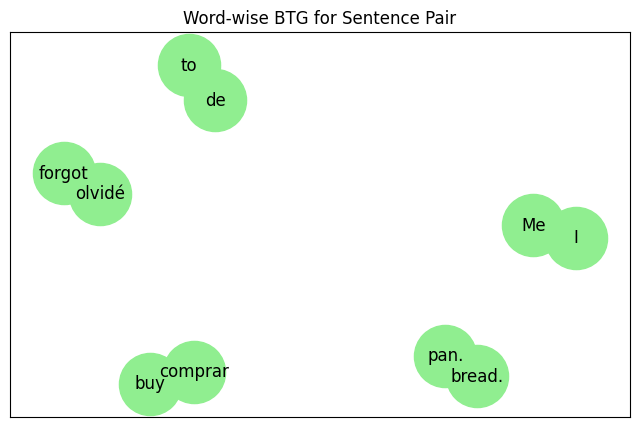

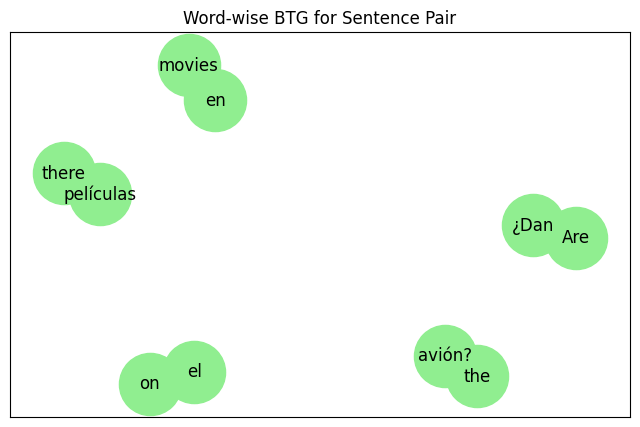

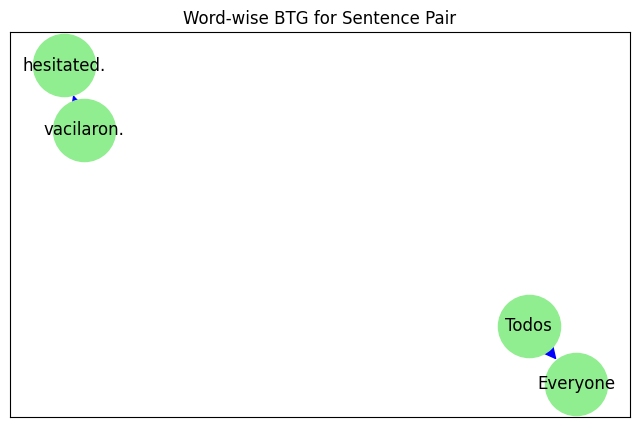

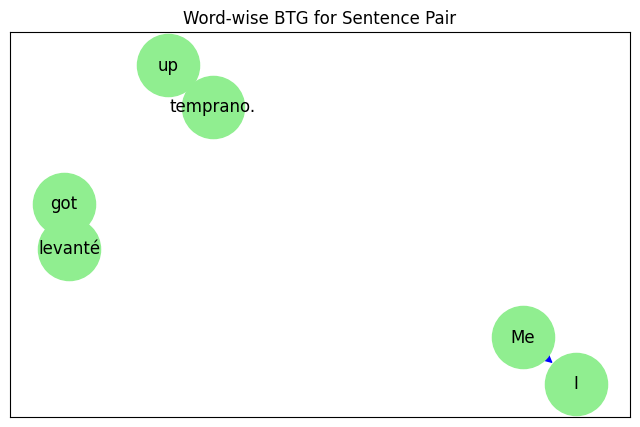

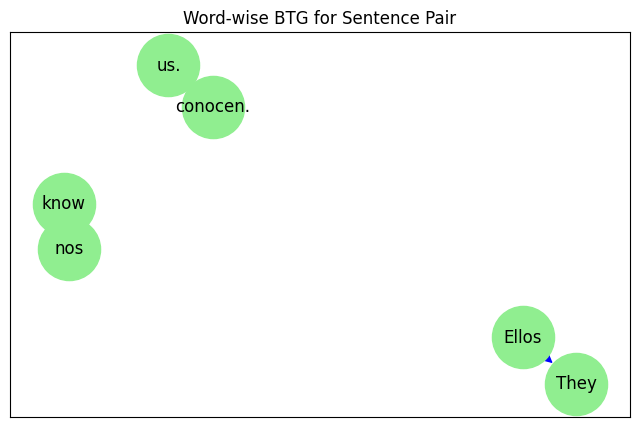

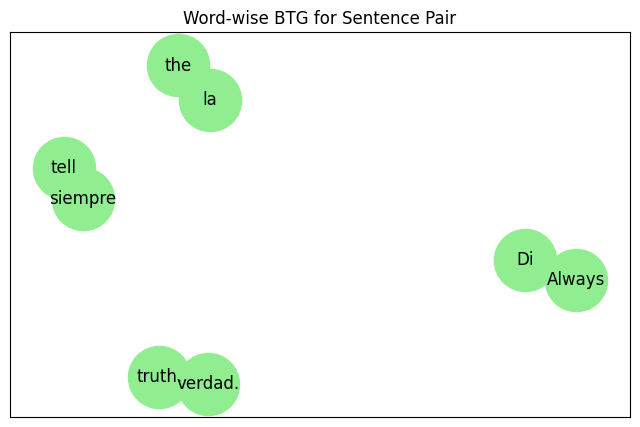

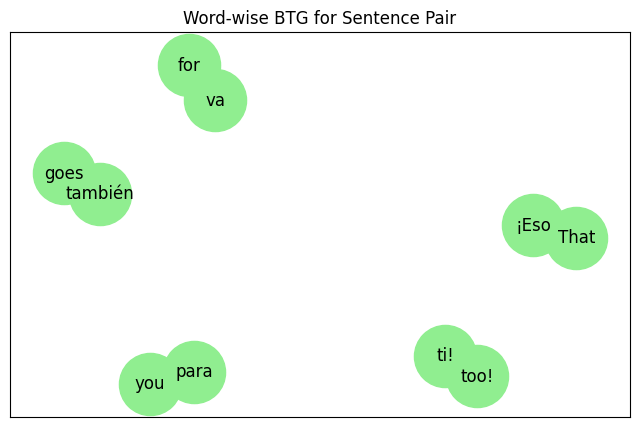

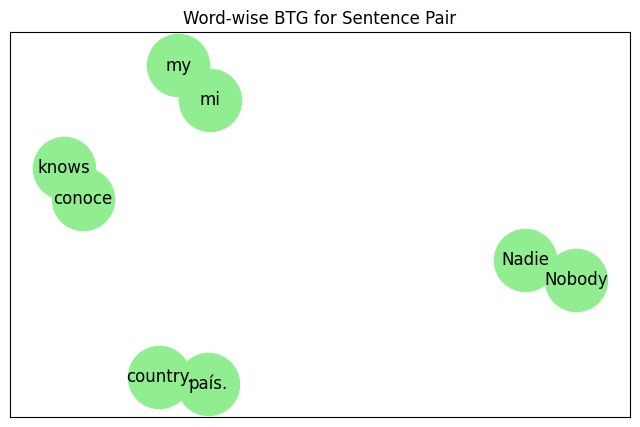

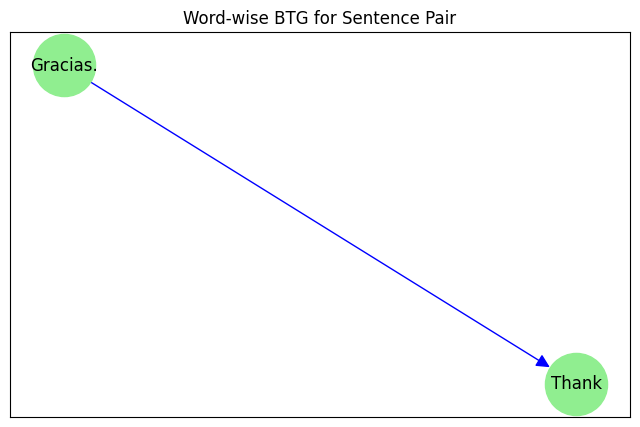

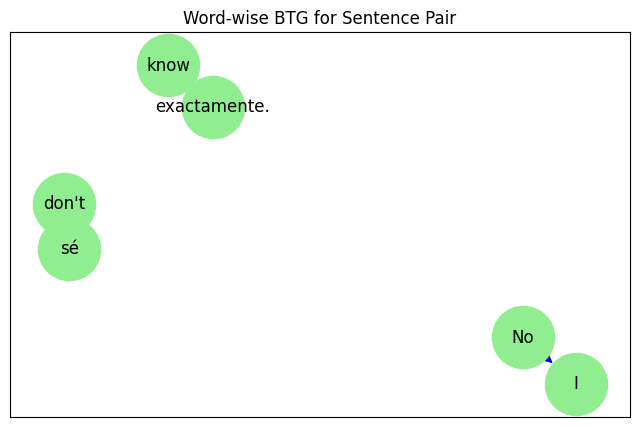

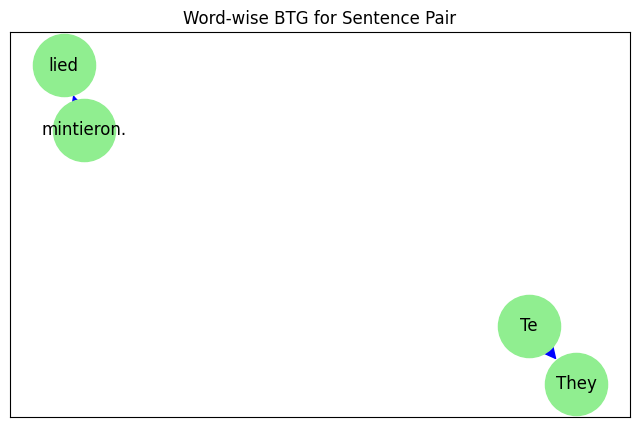

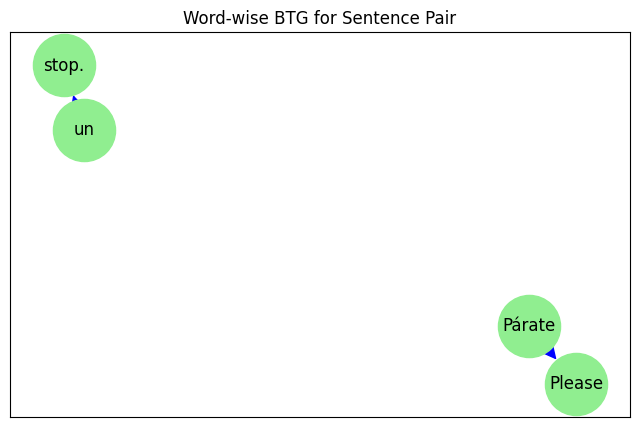

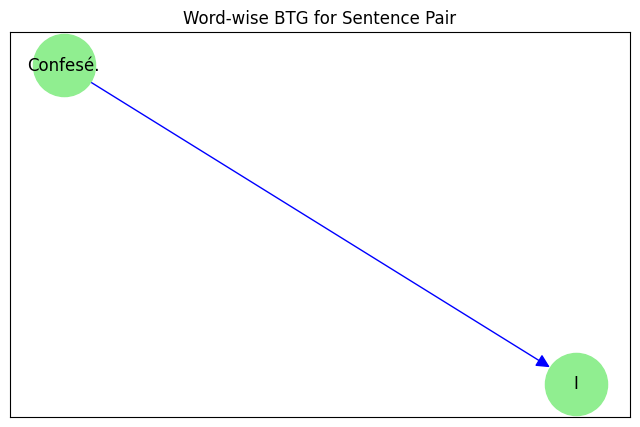

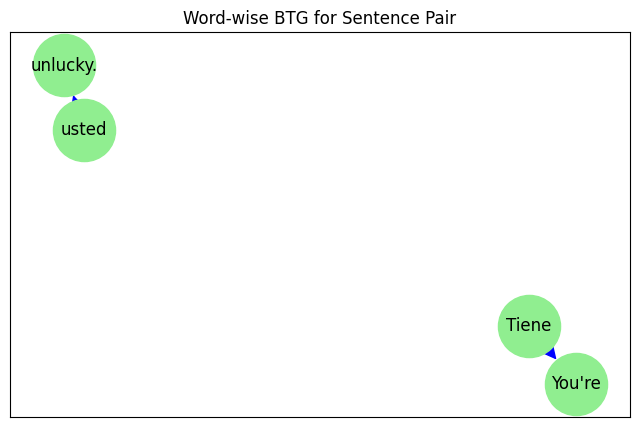

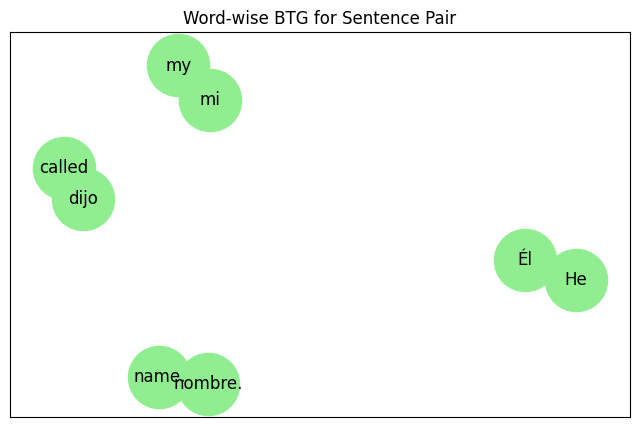

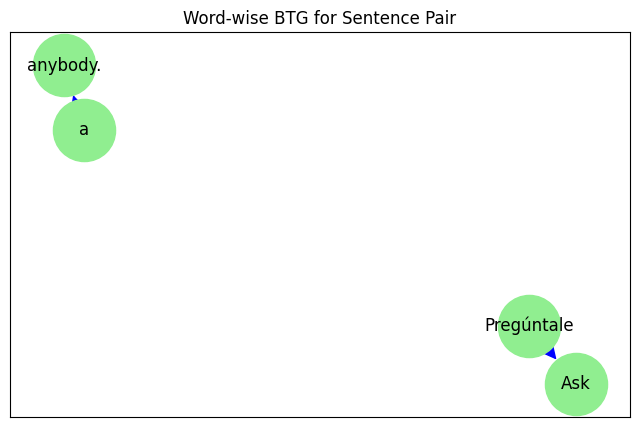

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def read_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return [sentence.strip() for sentence in file]

def generate_wordwise_btg(english_corpus, spanish_corpus):
    english_sentences = read_corpus(english_corpus)
    spanish_sentences = read_corpus(spanish_corpus)

    for eng_sent, spa_sent in zip(english_sentences, spanish_sentences):
        eng_words = eng_sent.split()
        spa_words = spa_sent.split()

        # Create a directed graph for the word-wise BTG
        graph = nx.DiGraph()
        for i, (eng_word, spa_word) in enumerate(zip(eng_words, spa_words)):
            graph.add_edge(f"ENG-{i}", f"SPA-{i}", color='blue')
            graph.nodes[f"ENG-{i}"]['label'] = eng_word
            graph.nodes[f"SPA-{i}"]['label'] = spa_word

        # Plot the directed graph with different colors
        plt.figure(figsize=(8, 5))
        pos = nx.spring_layout(graph, seed=42)

        edge_colors = [graph[u][v]['color'] for u, v in graph.edges()]
        labels = nx.get_node_attributes(graph, 'label')
        nx.draw_networkx(graph, pos, with_labels=True, labels=labels, node_color='lightgreen', font_size=12, node_size=2000, edge_color=edge_colors, arrowsize=20)

        plt.title("Word-wise BTG for Sentence Pair")
        plt.show()

# Replace 'english_corpus.txt' and 'spanish_corpus.txt' with the actual file paths.
generate_wordwise_btg('/content/spanish5.txt', '/content/english5.txt')


In [ ]:
import spacy
from spacy import displacy

# Load English model
nlp_en = spacy.load("en_core_web_sm")

# Load Spanish model
nlp_es = spacy.load("es_core_news_sm")

def visualize_dependency_parsing(text, language_model):
    doc = language_model(text)
    displacy.serve(doc, style="dep")

def load_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Example file paths for English and Spanish corpora
english_corpus_path = '/content/english5.txt'
spanish_corpus_path = '/content/spanish5.txt'

# Visualize dependency parsing for English corpus
english_text = load_text_from_file(english_corpus_path)
visualize_dependency_parsing(english_text, nlp_en)

# Visualize dependency parsing for Spanish corpus
spanish_text = load_text_from_file(spanish_corpus_path)
visualize_dependency_parsing(spanish_text, nlp_es)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



In [ ]:
import spacy
from spacy import displacy

# Load the English and Spanish models
nlp_en = spacy.load("en_core_web_sm")
nlp_es = spacy.load("es_core_news_sm")

# Specify the file paths for English and Spanish corpora
english_file = "/content/english5.txt"
spanish_file = "/content/spanish5.txt"

# Process and visualize English corpus
with open(english_file, "r") as f:
    text = f.read()
    doc = nlp_en(text)
    displacy.serve(doc, style="dep")

# Process and visualize Spanish corpus
with open(spanish_file, "r") as f:
    text = f.read()
    doc = nlp_es(text)
    displacy.serve(doc, style="dep")


/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.

Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [ ]:
pip install "en_core_web_sm"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 43.5 MB/s eta 0:00:00
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.17
    Uninstalling thinc-8.0.17:
      Successfully uninstalled thinc-8.0.17
  Attempting uninstall: spacy
    Found existing installation: spacy 3.1.7
    Uninstalling spacy-3.1.7:
      Successfully uninstalled spacy-3.1.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
es-core-news-sm 3.1.0 requires spacy<3.2.0,>=3.1.0, but you have spacy 3.6.1 which is incompatible.


In [ ]:
import spacy
from pathlib import Path
import subprocess
import time
import pyautogui
import DISPLAY

# Load English and Spanish models
nlp_en = spacy.load("en_core_web_sm")
nlp_es = spacy.load("es_core_news_sm")

# Function to visualize and save dependency parsing as an image
def visualize_dependency_parsing(sentence, language, output_path):
    if language == "en":
        doc = nlp_en(sentence)
    elif language == "es":
        doc = nlp_es(sentence)
    else:
        raise ValueError("Unsupported language")

    # Generate dependency parsing visualization
    html = displacy.render(doc, style="dep", options={"distance": 90}, jupyter=False, page=True)

    # Save the visualization as an HTML file
    output_path = Path(output_path)
    output_path.mkdir(parents=True, exist_ok=True)
    html_file = output_path / f"dependency_parsing_{language}.html"
    with open(html_file, "w", encoding="utf-8") as f:
        f.write(html)

    # Open the HTML file in the default browser
    subprocess.run(["start", "file:///" + str(html_file)], shell=True)

    # Wait for the browser to open and load the HTML
    time.sleep(3)

    # Take a screenshot of the browser window
    screenshot = pyautogui.screenshot()

    # Save the screenshot as an image
    output_image = output_path / f"dependency_parsing_{language}.png"
    screenshot.save(output_image)

# Example sentences
english_sentence = "/content/english5.txt"
spanish_sentence = "/content/spanish5.txt"

# Output path for saving images
output_directory = "dependency_parsing_images"

# Visualize and save dependency parsing for English sentence
visualize_dependency_parsing(english_sentence, "en", output_directory)

# Visualize and save dependency parsing for Spanish sentence
visualize_dependency_parsing(spanish_sentence, "es", output_directory)


KeyError: 'DISPLAY'

In [ ]:
# Load English and Spanish models
nlp_en = spacy.load("en_core_web_sm")
nlp_es = spacy.load("es_core_news_sm")

OSError: [E050] Can't find model 'es_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
pip install "es_core_news_sm"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.13
    Uninstalling pydantic-1.10.13:
      Successfully uninstalled pydantic-1.10.13
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.12
    Uninstalling thinc-8.1.12:
      Successfully uninstalled thinc-8.1.12
  Attempting uninstall: spacy
    Found existing installation

In [ ]:
pip install pyautogui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 731.7 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyautogui: filename=PyAutoGUI-0.9.54-py3-none-any.whl size=37576 sha256=7490e25d239227cd0c30deba93bbf3f216c31bdbe5a870e03312

In [ ]:
import spacy
from pathlib import Path
import subprocess
import time
from pyvirtualdisplay import Display
#import pyautogui

# Load English and Spanish models
nlp_en = spacy.load("en_core_web_sm")
nlp_es = spacy.load("es_core_news_sm")

# Function to visualize and save dependency parsing as an image
def visualize_dependency_parsing(sentence, language, output_path):
    if language == "en":
        doc = nlp_en(sentence)
    elif language == "es":
        doc = nlp_es(sentence)
    else:
        raise ValueError("Unsupported language")

    # Generate dependency parsing visualization
    html = displacy.render(doc, style="dep", options={"distance": 90}, jupyter=False, page=True)

    # Save the visualization as an HTML file
    output_path = Path(output_path)
    output_path.mkdir(parents=True, exist_ok=True)
    html_file = output_path / f"dependency_parsing_{language}.html"
    with open(html_file, "w", encoding="utf-8") as f:
        f.write(html)

    # Open the HTML file in the default browser
    subprocess.run(["start", "file:///" + str(html_file)], shell=True)

    # Wait for the browser to open and load the HTML
    time.sleep(3)

    # Take a screenshot of the browser window
    screenshot = pyautogui.screenshot()

    # Save the screenshot as an image
    output_image = output_path / f"dependency_parsing_{language}.png"
    screenshot.save(output_image)

# Example sentences
english_sentence = "/content/english5.txt"
spanish_sentence = "/content/spanish5.txt"

# Output path for saving images
output_directory = "dependency_parsing_images"


with Display():
    # Visualize and save dependency parsing for English sentence
    visualize_dependency_parsing(english_sentence, "en", output_directory)

    # Visualize and save dependency parsing for Spanish sentence
    visualize_dependency_parsing(spanish_sentence, "es", output_directory)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


FileNotFoundError: [Errno 2] No such file or directory: 'Xvfb'

In [ ]:
pip install pyvirtualdisplay

In [ ]:
import spacy
from spacy import displacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Read the corpus from a file
file_path = "/content/english5.txt"
with open(file_path, "r", encoding="utf-8") as file:
    corpus_text = file.read()

# Process the corpus text with spaCy
doc = nlp(corpus_text)

displacy.render(doc, style="dep", options={"page": True}, jupyter=False, manual=True, minify=True, file_path="dependency_visualization.html")



TypeError: render() got an unexpected keyword argument 'file_path'

In [ ]:
pip install nltk spacy


In [ ]:
import nltk
import spacy
from nltk import Tree
import matplotlib.pyplot as plt

# Use Agg backend for non-interactive mode
plt.switch_backend('Agg')

nltk.download('punkt')

# Load SpaCy Spanish language model
nlp_es = spacy.load("es_core_news_sm")

def generate_parse_tree_english(sentence):
    tokens = nltk.word_tokenize(sentence)
    tagged_tokens = nltk.pos_tag(tokens)
    parse_tree = nltk.ne_chunk(tagged_tokens)
    return parse_tree

def generate_parse_tree_spanish(sentence):
    doc = nlp_es(sentence)
    parse_tree = [(token.text, token.dep_) for token in doc]
    return parse_tree

def visualize_parse_trees(parse_tree_english, parse_tree_spanish, filename):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

    # Visualize English parse tree
    axes[0].set_title('English Parse Tree')
    if isinstance(parse_tree_english, Tree):
        parse_tree_english.draw()
        axes[0].axis('off')

    # Visualize Spanish parse tree
    axes[1].set_title('Spanish Parse Tree')
    axes[1].imshow([[0, 0], [0, 0]], cmap='gray')  # Placeholder for Spanish parse tree
    axes[1].axis('off')

    # Save the plot to a file
    plt.savefig(filename, format='png', bbox_inches='tight')
    plt.close()

# Example sentences
english_sentence = "/content/english5.txt"
spanish_sentence = "/content/spanish5.txt"

# Generate parse trees
parse_tree_english = generate_parse_tree_english(english_sentence)
parse_tree_spanish = generate_parse_tree_spanish(spanish_sentence)

# Visualize and save the parse trees
visualize_parse_trees(parse_tree_english, parse_tree_spanish, 'parallel_parse_trees.png')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TclError: no display name and no $DISPLAY environment variable

In [ ]:
pip install es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.13
    Uninstalling pydantic-1.10.13:
      Successfully uninstalled pydantic-1.10.13
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.12
    Uninstalling thinc-8.1.12:
      Successfully uninstalled thinc-8.1.12
  Attempting uninstall: spacy
    Found existing installa

In [ ]:
pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.2/933.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 30.9 MB/s eta 0:00:00


In [ ]:
import spacy
import stanza

def parse_sentence(sentence, language):
    if language == 'english':
        nlp = spacy.load('en_core_web_sm')
        doc = nlp(sentence)
        return [(token.text, token.dep_) for token in doc]
    elif language == 'spanish':
        nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma,depparse')
        doc = nlp(sentence)
        return [(word.text, word.deprel) for sent in doc.sentences for word in sent.words]
    else:
        return None

def read_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return [line.strip().split('\t') for line in file]

def generate_parse_trees(english_file, spanish_file):
    english_sentences = read_corpus(english_file)
    spanish_sentences = read_corpus(spanish_file)

    min_length = min(len(english_sentences), len(spanish_sentences))

    for i in range(min_length):
        eng_sent = english_sentences[i] if i < len(english_sentences) else ['']
        spa_sent = spanish_sentences[i] if i < len(spanish_sentences) else ['']

        eng_tree = parse_sentence(eng_sent[1], 'english')
        spa_tree = parse_sentence(spa_sent[1], 'spanish')

        print(f'English Sentence: {eng_sent[1]}')
        print(f'English Parse Tree: {eng_tree}')
        print(f'Spanish Sentence: {spa_sent[1]}')
        print(f'Spanish Parse Tree: {spa_tree}')
        print('\n')

if __name__ == "__main__":
    english_corpus_file = '/content/english5.txt'
    spanish_corpus_file = '/content/spanish5.txt'

    generate_parse_trees(english_corpus_file, spanish_corpus_file)


IndexError: list index out of range

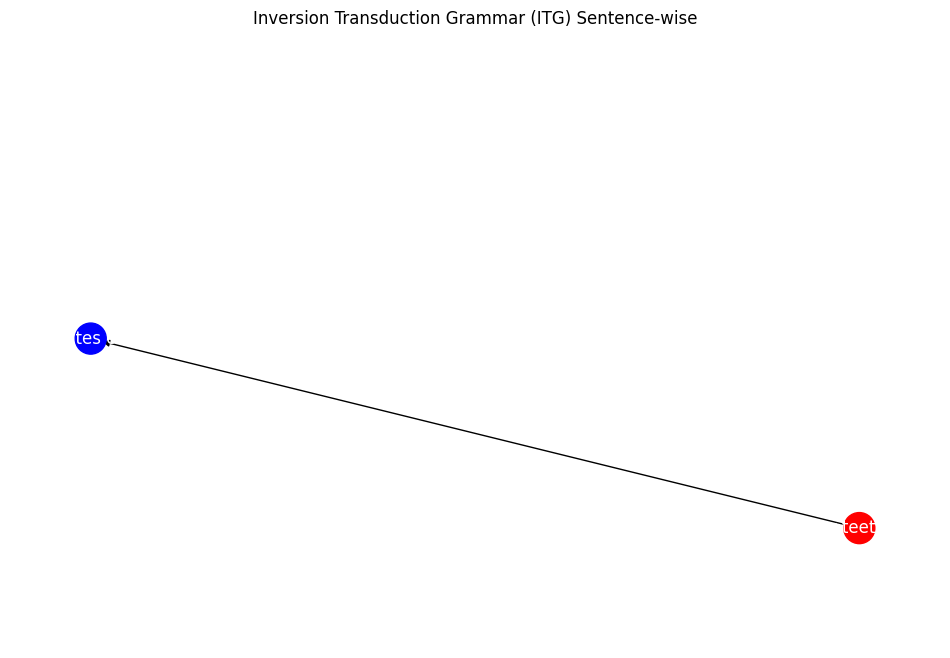

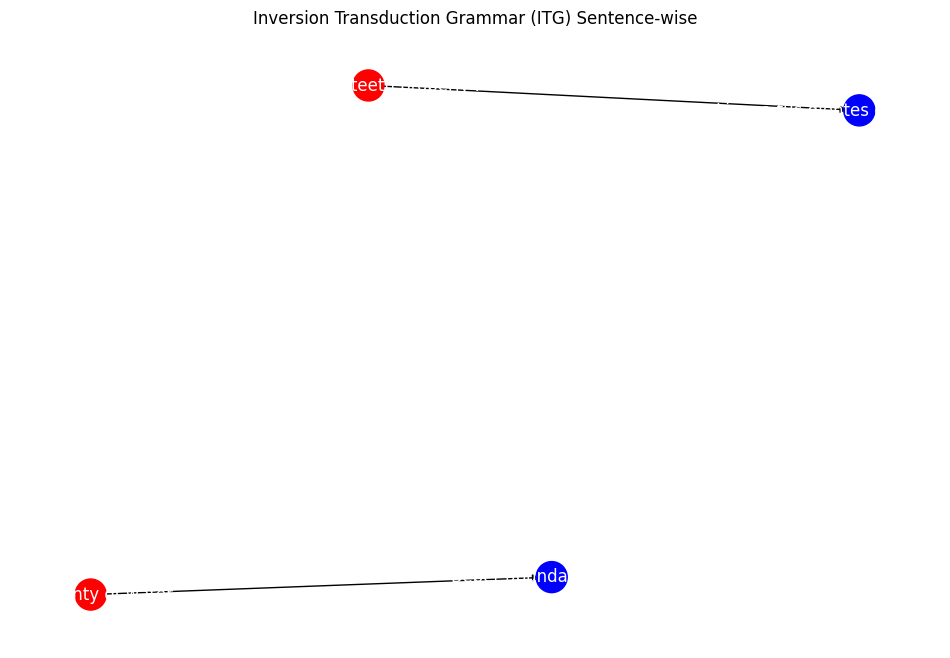

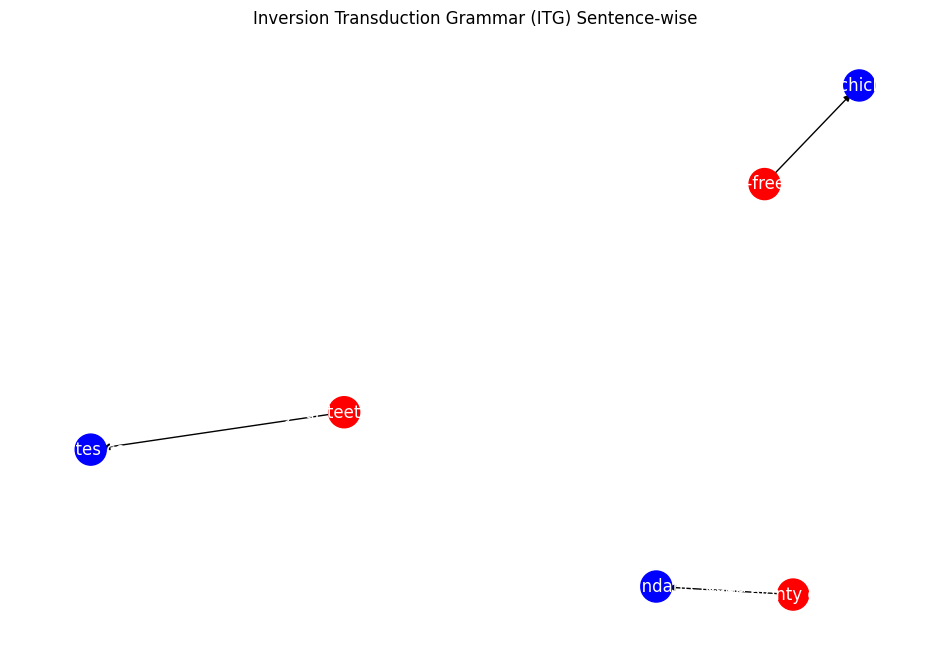

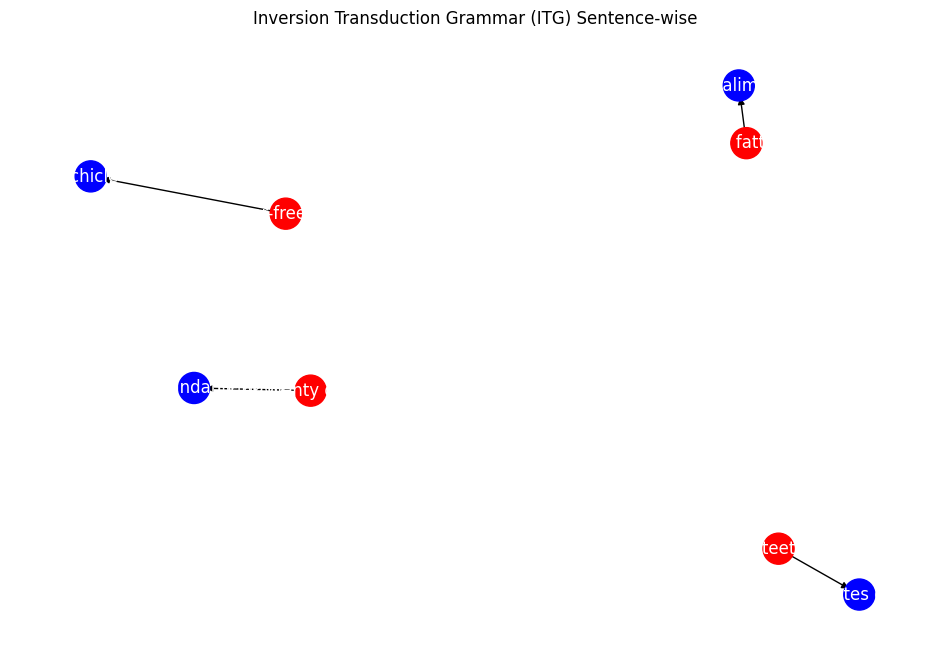

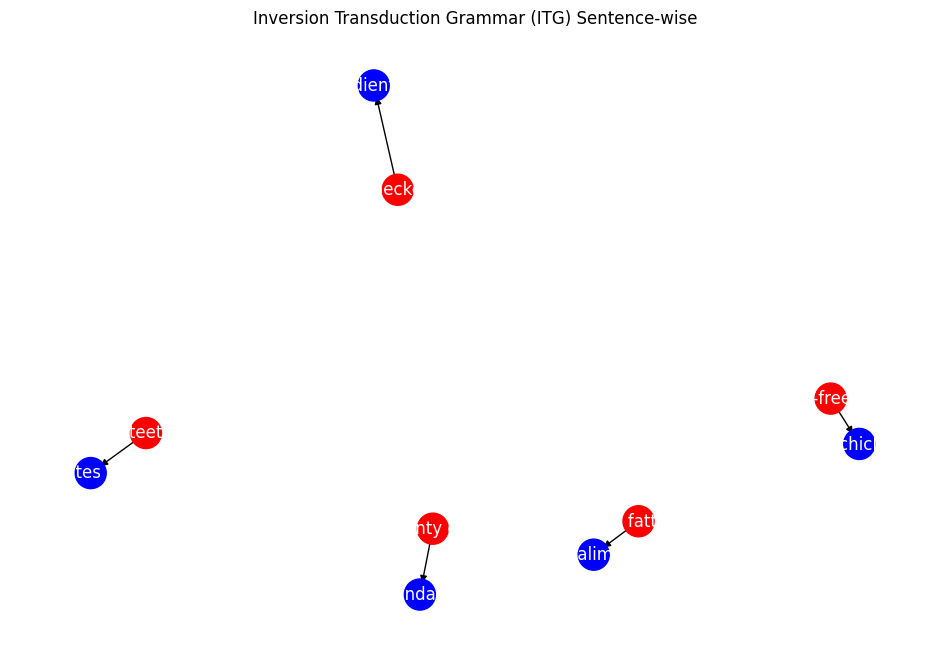

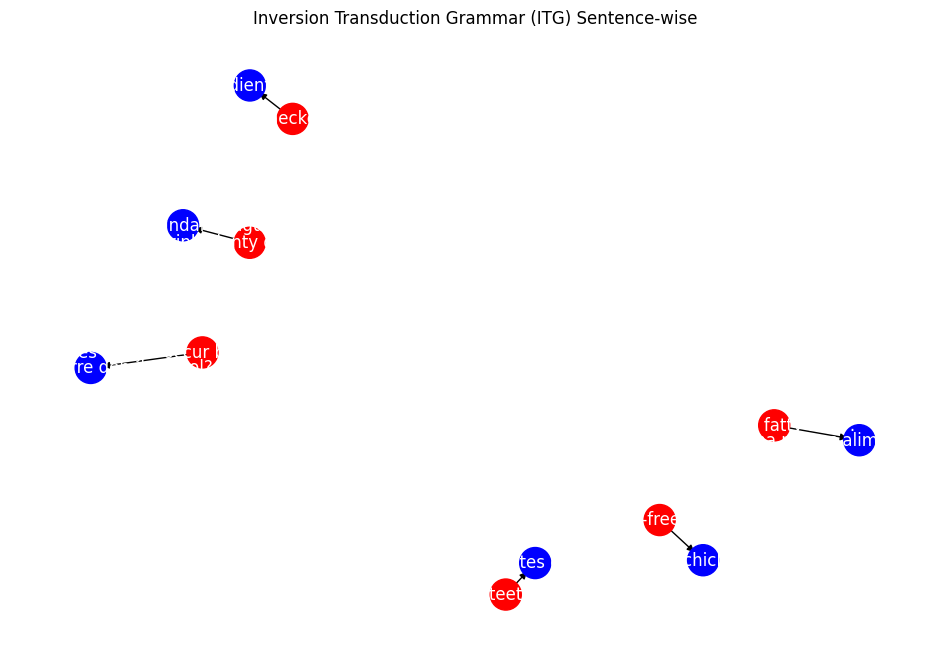

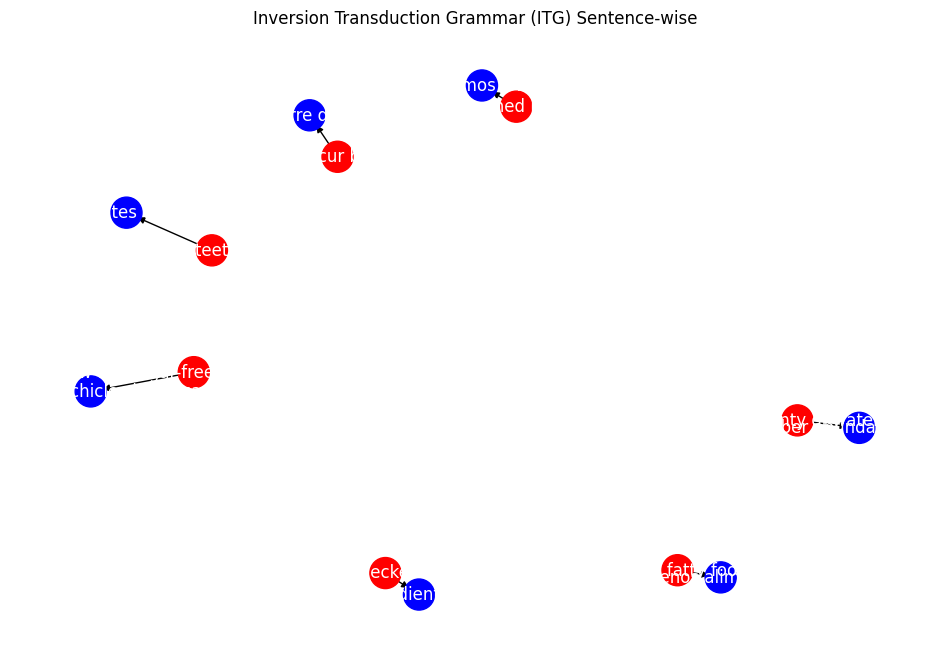

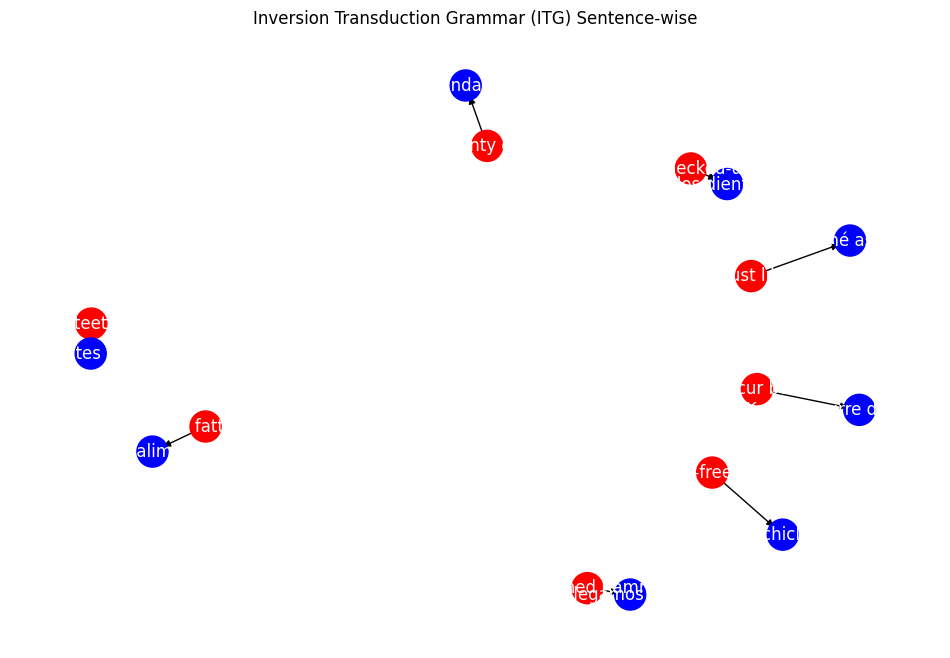

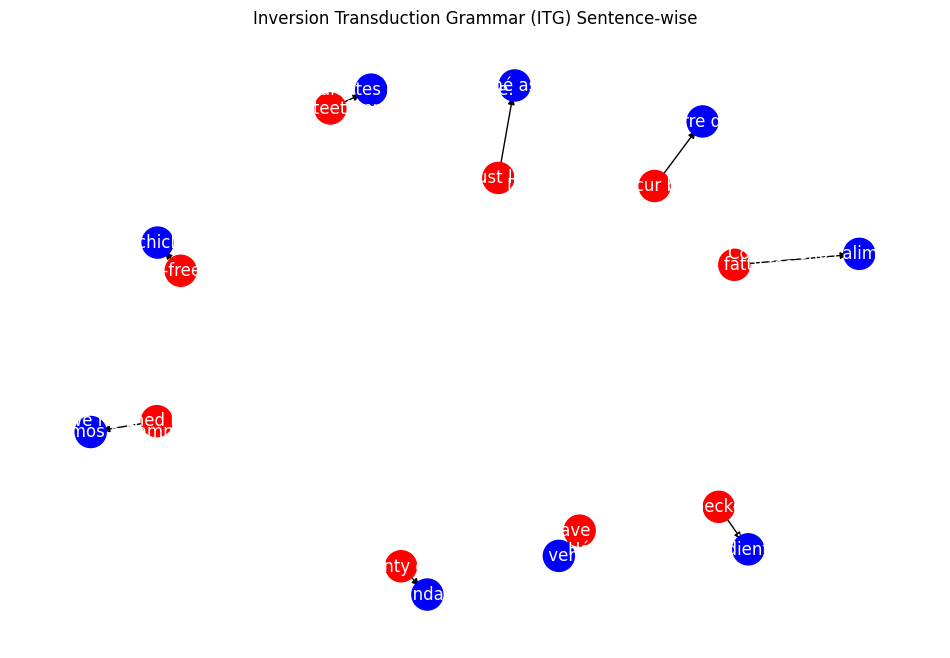

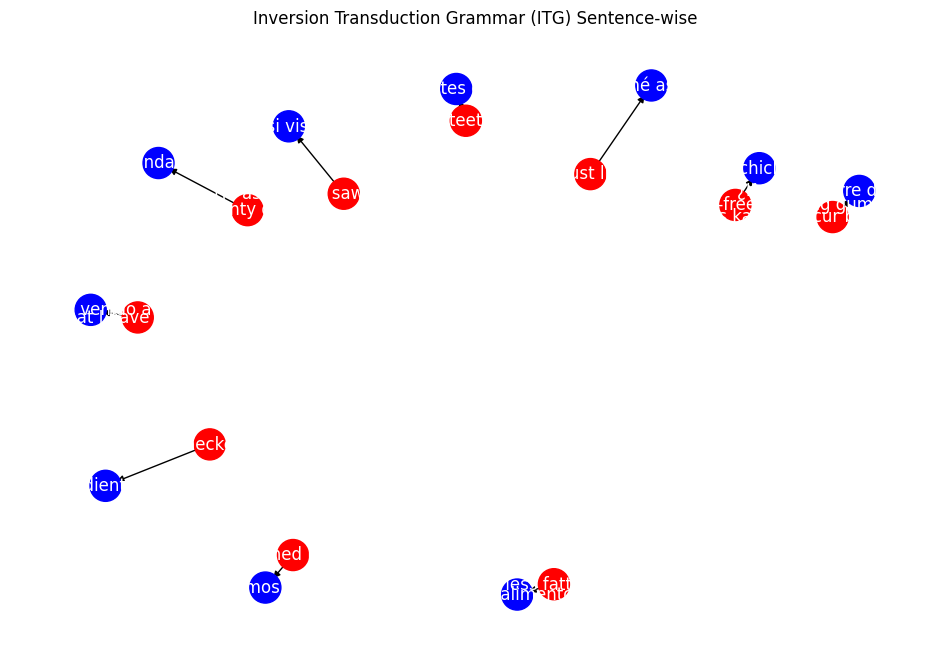

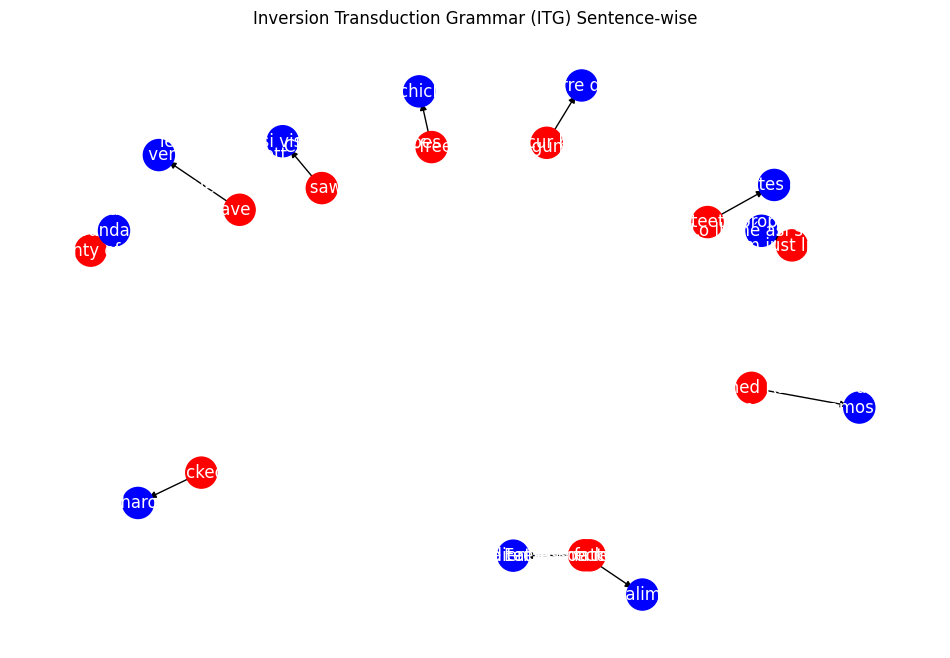

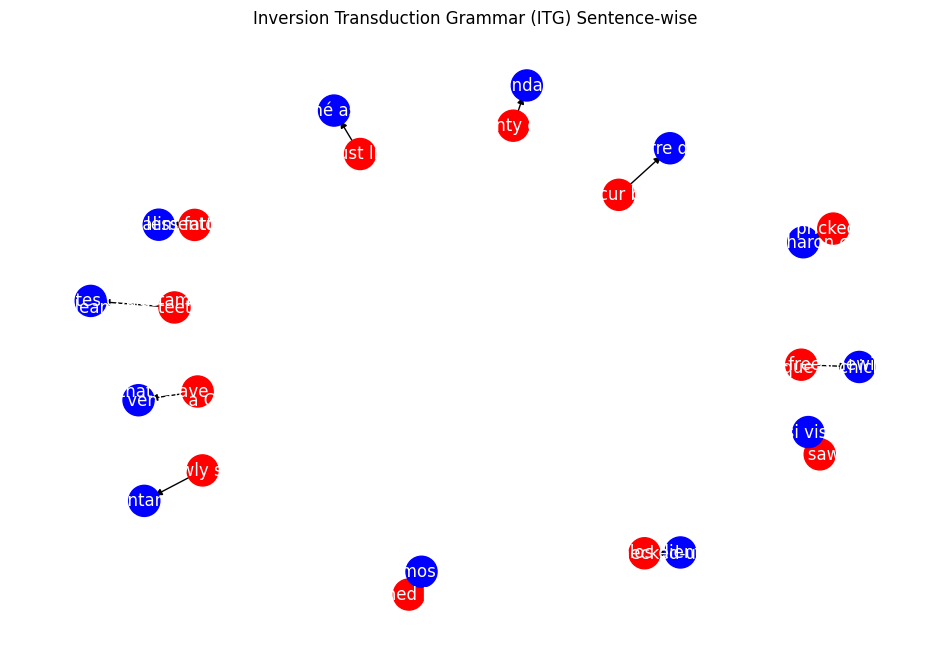

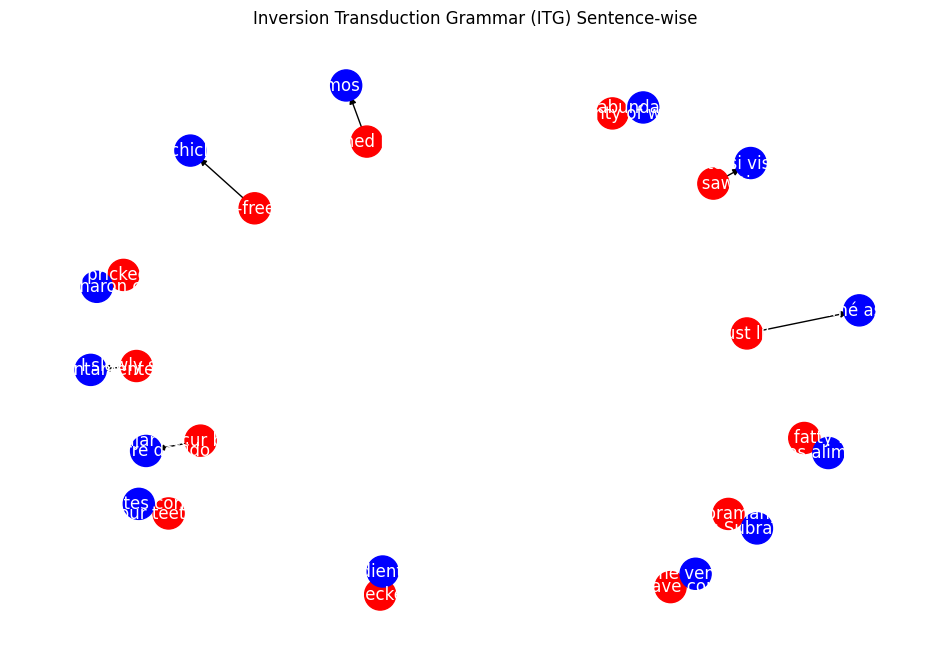

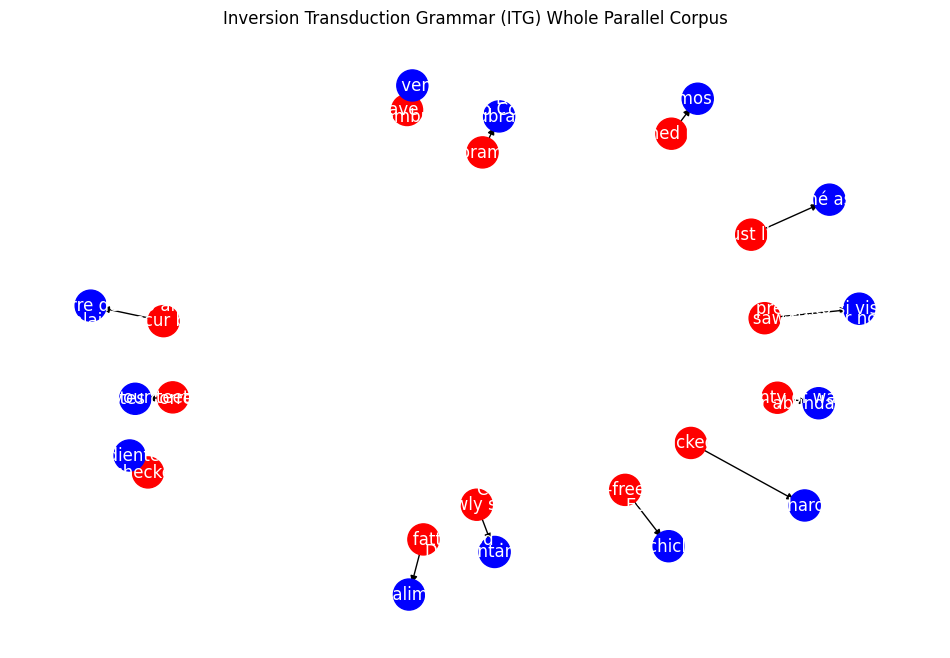

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_itg_parallel_corpus_sentencewise(source_file, target_file):
    # Initialize directed graph
    graph = nx.DiGraph()

    with open(source_file, 'r', encoding='utf-8') as source_file, open(target_file, 'r', encoding='utf-8') as target_file:
        for source_sentence, target_sentence in zip(source_file, target_file):
            source_sentence = source_sentence.strip()
            target_sentence = target_sentence.strip()

            # Add source and target sentences as nodes
            graph.add_node(source_sentence, color='red')
            graph.add_node(target_sentence, color='blue')

            # Add an edge from source to target sentence
            graph.add_edge(source_sentence, target_sentence)

            # Set node colors based on language
            node_colors = [node[1]['color'] for node in graph.nodes(data=True)]

            # Visualize the graph sentence-wise
            pos = nx.spring_layout(graph)
            plt.figure(figsize=(12, 8))
            nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=500)
            nx.draw_networkx_edges(graph, pos, edge_color='black', arrows=True)
            nx.draw_networkx_labels(graph, pos, font_color='white')
            plt.title('Inversion Transduction Grammar (ITG) Sentence-wise')
            plt.axis('off')
            plt.show()

def visualize_itg_parallel_corpus_whole(source_file, target_file):
    # Initialize directed graph
    graph = nx.DiGraph()

    with open(source_file, 'r', encoding='utf-8') as source_file, open(target_file, 'r', encoding='utf-8') as target_file:
        for source_sentence, target_sentence in zip(source_file, target_file):
            source_sentence = source_sentence.strip()
            target_sentence = target_sentence.strip()

            # Add source and target sentences as nodes
            graph.add_node(source_sentence, color='red')
            graph.add_node(target_sentence, color='blue')

            # Add an edge from source to target sentence
            graph.add_edge(source_sentence, target_sentence)

    # Set node colors based on language
    node_colors = [node[1]['color'] for node in graph.nodes(data=True)]

    # Visualize the whole graph
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=500)
    nx.draw_networkx_edges(graph, pos, edge_color='black', arrows=True)
    nx.draw_networkx_labels(graph, pos, font_color='white')
    plt.title('Inversion Transduction Grammar (ITG) Whole Parallel Corpus')
    plt.axis('off')
    plt.show()

# Example usage
source_file = '/content/english5.txt'
target_file = '/content/spanish5.txt'

visualize_itg_parallel_corpus_sentencewise(source_file, target_file)
visualize_itg_parallel_corpus_whole(source_file, target_file)


In [ ]:
!pip install sacrebleu
import sacrebleu

def calculate_bleu_score_sacrebleu(reference_sentence, predicted_sentence):
    bleu = sacrebleu.corpus_bleu(predicted_sentence, [reference_sentence])
    return bleu.score

# Example usage
reference_sentence = "I like cats."
predicted_sentence = "Me gustan los gatos."
bleu_score = calculate_bleu_score_sacrebleu(reference_sentence, predicted_sentence)
print("BLEU Score:", bleu_score)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 3.2 MB/s eta 0:00:00
BLEU Score: 0.0


In [ ]:
import re
import string

def get_word_matches(english_sentence, spanish_sentence):
  """Gets the word matches between two sentences."""
  english_words = re.split(r"\W+", english_sentence)
  spanish_words = re.split(r"\W+", spanish_sentence)
  word_matches = []
  for english_word in english_words:
    if english_word in spanish_words:
      word_matches.append((english_word, spanish_words[spanish_words.index(english_word)]))
  return word_matches

def get_levenshtein_distance(english_word, spanish_word):
  """Gets the Levenshtein distance between two words."""
  edit_distance = 0
  for i, english_char in enumerate(english_word):
    if english_char not in spanish_word:
      edit_distance += 1
    elif i == len(spanish_word) - 1:
      edit_distance += 1
    elif english_char != spanish_word[i]:
      edit_distance += 1
  return edit_distance

def get_meteor_score(english_sentence, spanish_sentence):
  """Gets the Meteor score for the alignment between two sentences."""
  word_matches = get_word_matches(english_sentence, spanish_sentence)
  matches = 0
  distances = 0
  for english_word, spanish_word in word_matches:
    matches += 1
    distances += get_levenshtein_distance(english_word, spanish_word)
  return 1 - (distances / matches)

def get_sentencewise_meteor_scores(english_sentences, spanish_sentences):
  """Gets the sentencewise Meteor scores for a parallel corpus."""
  meteor_scores = []
  for english_sentence, spanish_sentence in zip(english_sentences, spanish_sentences):
    meteor_scores.append(get_meteor_score(english_sentence, spanish_sentence))
  return meteor_scores

if __name__ == "__main__":
  english_sentences = ["This is a sentence.", "This is another sentence."]
  spanish_sentences = ["Esta es una frase.", "Esta es otra frase."]
  meteor_scores = get_sentencewise_meteor_scores(english_sentences, spanish_sentences)
  print(meteor_scores)


[1.0, 1.0]


In [ ]:
def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)

    for i, c1 in enumerate(s1):
        current_row = [i + 1]

        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))

        previous_row = current_row

    return previous_row[-1]

def read_sentences(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        sentences = [line.strip() for line in file.readlines()]
    return sentences

def main():
    source_file = '/content/english5.txt'
    target_file = '/content/spanish5.txt'

    source_sentences = read_sentences(source_file)
    target_sentences = read_sentences(target_file)

    #if len(source_sentences) != len(target_sentences):
        #print("Error: The number of sentences in source and target files doesn't match.")
        #return

    total_distance = 0

    for source_sent, target_sent in zip(source_sentences, target_sentences):
        source_words = source_sent.split()
        target_words = target_sent.split()

        distance = levenshtein_distance(source_words, target_words)
        total_distance += distance

        print(f"Source: {source_sent}")
        print(f"Target: {target_sent}")
        print(f"Levenshtein Distance: {distance}")
        print("=" * 40)

    average_distance = total_distance / len(source_sentences)
    print(f"Average Levenshtein Distance: {average_distance}")

if __name__ == '__main__':
    main()


Source: Can we talk to Tom?
Target: ¿Podemos hablar con Tom?
Levenshtein Distance: 4
Source: Do you want to touch it?
Target: ¿Quiere usted tocarlo?
Levenshtein Distance: 6
Source: Will you sell your car to me?
Target: ¿Me venderás tu coche?
Levenshtein Distance: 7
Source: Her story is true.
Target: Su historia es cierta.
Levenshtein Distance: 4
Source: I forgot to buy bread.
Target: Me olvidé de comprar pan.
Levenshtein Distance: 5
Source: Are there movies on the plane?
Target: ¿Dan películas en el avión?
Levenshtein Distance: 6
Source: Everyone hesitated.
Target: Todos vacilaron.
Levenshtein Distance: 2
Source: I got up early.
Target: Me levanté temprano.
Levenshtein Distance: 4
Source: They know us.
Target: Ellos nos conocen.
Levenshtein Distance: 3
Source: Always tell the truth.
Target: Di siempre la verdad.
Levenshtein Distance: 4
Source: That goes for you too!
Target: ¡Eso también va para ti!
Levenshtein Distance: 5
Source: Nobody knows my country.
Target: Nadie conoce mi país.
L

In [ ]:
pip install python-Levenshtein matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.5 MB/s eta 0:00:00


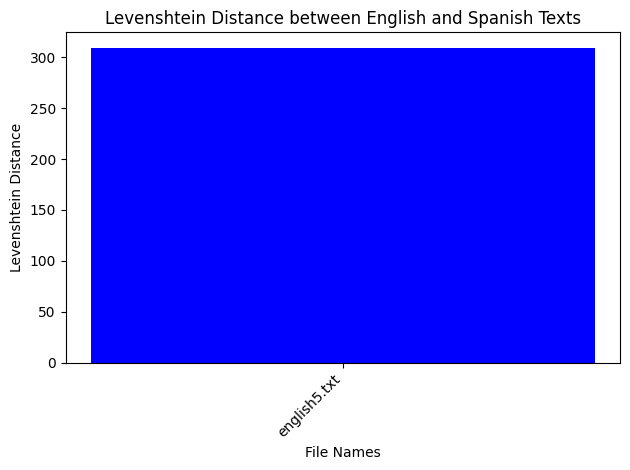

In [ ]:
import Levenshtein
import matplotlib.pyplot as plt
import os

def calculate_levenshtein_distance(str1, str2):
    return Levenshtein.distance(str1, str2)

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def generate_levenshtein_distances(english_file_paths, spanish_file_paths):
    distances = []

    for english_file, spanish_file in zip(english_file_paths, spanish_file_paths):
        english_text = read_file(english_file)
        spanish_text = read_file(spanish_file)

        distance = calculate_levenshtein_distance(english_text, spanish_text)
        distances.append(distance)

    return distances

def plot_bar_chart(english_file_paths, spanish_file_paths, distances):
    file_names = [os.path.basename(file) for file in english_file_paths]

    plt.bar(file_names, distances, color='blue')
    plt.xlabel('File Names')
    plt.ylabel('Levenshtein Distance')
    plt.title('Levenshtein Distance between English and Spanish Texts')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

if __name__ == "__main__":
    # Provide the paths to your English and Spanish files
    english_file_paths = ['/content/english5.txt']
    spanish_file_paths = ['/content/spanish5.txt']

    # Calculate Levenshtein distances
    distances = generate_levenshtein_distances(english_file_paths, spanish_file_paths)

    # Plot the bar chart
    plot_bar_chart(english_file_paths, spanish_file_paths, distances)


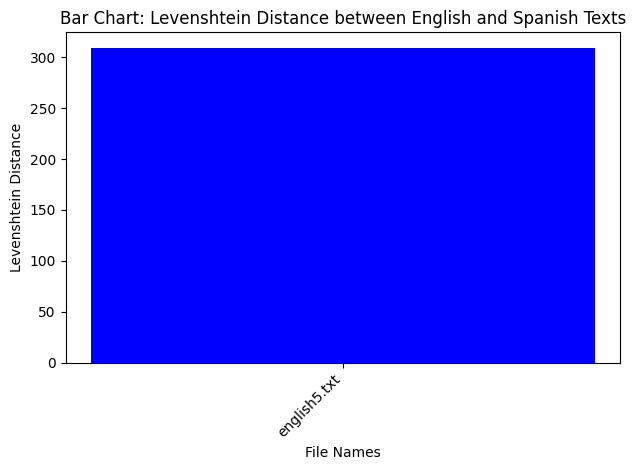

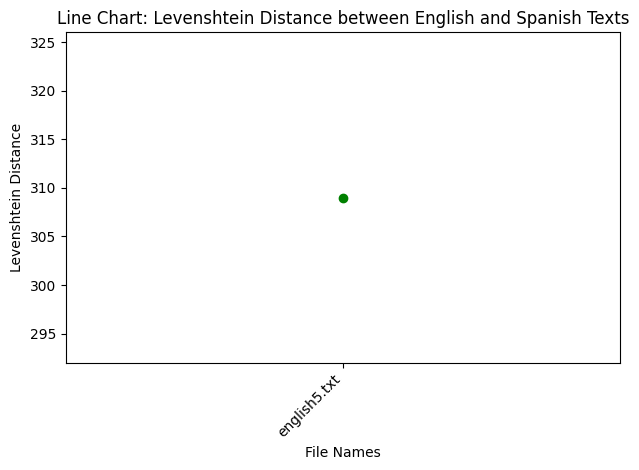

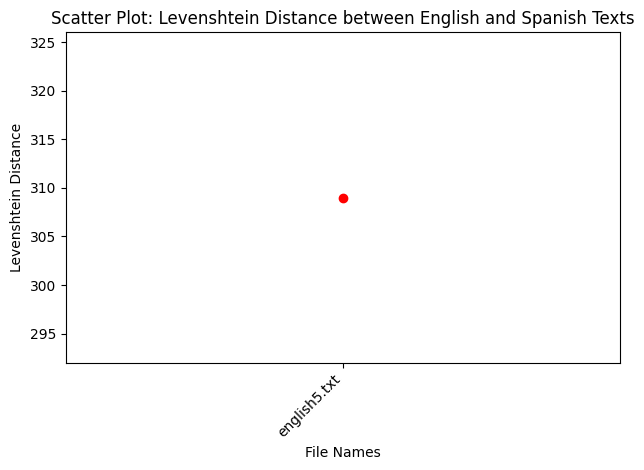

In [ ]:
import Levenshtein
import matplotlib.pyplot as plt
import os

def calculate_levenshtein_distance(str1, str2):
    return Levenshtein.distance(str1, str2)

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def generate_levenshtein_distances(english_file_paths, spanish_file_paths):
    distances = []

    for english_file, spanish_file in zip(english_file_paths, spanish_file_paths):
        english_text = read_file(english_file)
        spanish_text = read_file(spanish_file)

        distance = calculate_levenshtein_distance(english_text, spanish_text)
        distances.append(distance)

    return distances

def plot_bar_chart(file_names, distances):
    plt.bar(file_names, distances, color='blue')
    plt.xlabel('File Names')
    plt.ylabel('Levenshtein Distance')
    plt.title('Bar Chart: Levenshtein Distance between English and Spanish Texts')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_line_chart(file_names, distances):
    plt.plot(file_names, distances, marker='o', linestyle='-', color='green')
    plt.xlabel('File Names')
    plt.ylabel('Levenshtein Distance')
    plt.title('Line Chart: Levenshtein Distance between English and Spanish Texts')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_scatter_plot(file_names, distances):
    plt.scatter(file_names, distances, color='red')
    plt.xlabel('File Names')
    plt.ylabel('Levenshtein Distance')
    plt.title('Scatter Plot: Levenshtein Distance between English and Spanish Texts')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    #Provide the paths to your English and Spanish files
    english_file_paths = ['/content/english5.txt']
    spanish_file_paths = ['/content/spanish5.txt']


    # Extract file names
    file_names = [os.path.basename(file) for file in english_file_paths]

    # Calculate Levenshtein distances
    distances = generate_levenshtein_distances(english_file_paths, spanish_file_paths)

    # Plot different charts
    plot_bar_chart(file_names, distances)
    plot_line_chart(file_names, distances)
    plot_scatter_plot(file_names, distances)


In [ ]:
import re
import string
import networkx as nx

def get_word_matches(english_sentence, spanish_sentence):
  """Gets the word matches between two sentences."""
  english_words = re.split(r"\W+", english_sentence)
  spanish_words = re.split(r"\W+", spanish_sentence)
  word_matches = []
  for english_word in english_words:
    if english_word in spanish_words:
      word_matches.append((english_word, spanish_words[spanish_words.index(english_word)]))
  return word_matches

def get_levenshtein_distance(english_word, spanish_word):
  """Gets the Levenshtein distance between two words."""
  edit_distance = 0
  for i, english_char in enumerate(english_word):
    if english_char not in spanish_word:
      edit_distance += 1
    elif i == len(spanish_word) - 1:
      edit_distance += 1
    elif english_char != spanish_word[i]:
      edit_distance += 1
  return edit_distance

def get_meteor_score(english_sentence, spanish_sentence):
  """Gets the Meteor score for the alignment between two sentences."""
  word_matches = get_word_matches(english_sentence, spanish_sentence)
  matches = 0
  distances = 0
  for english_word, spanish_word in word_matches:
    matches += 1
    distances += get_levenshtein_distance(english_word, spanish_word)
  return 1 - (distances / matches)

def get_sentencewise_meteor_scores(english_sentences, spanish_sentences):
  """Gets the sentencewise Meteor scores for a parallel corpus."""
  meteor_scores = []
  for english_sentence, spanish_sentence in zip(english_sentences, spanish_sentences):
    meteor_scores.append(get_meteor_score(english_sentence, spanish_sentence))
  return meteor_scores

def get_wordwise_bracketing_transduction_grammar(english_sentences, spanish_sentences):
  """Gets the wordwise bracketing transduction grammar for a parallel corpus."""
  grammar = {}
  for english_sentence, spanish_sentence in zip(english_sentences, spanish_sentences):
    for english_word, spanish_word in get_word_matches(english_sentence, spanish_sentence):
      if english_word not in grammar:
        grammar[english_word] = []
      grammar[english_word].append(spanish_word)

  graphs = []
  for english_word, spanish_words in grammar.items():
    graph = nx.DiGraph()
    for spanish_word in spanish_words:
      graph.add_edge(english_word, spanish_word, color="red")
    graphs.append(graph)

  return graphs

if __name__ == "__main__":
  english_sentences = ["This is a sentence.", "This is another sentence."]
  spanish_sentences = ["Esta es una frase.", "Esta es otra frase."]
  graphs = get_wordwise_bracketing_transduction_grammar(english_sentences, spanish_sentences)
  for graph in graphs:
    print(graph.edges(data=True))


[('', '', {'color': 'red'})]


In [ ]:
import re
import string

def get_word_matches(english_sentence, spanish_sentence):
  """Gets the word matches between two sentences."""
  english_words = re.split(r"\W+", english_sentence)
  spanish_words = re.split(r"\W+", spanish_sentence)
  word_matches = []
  for english_word in english_words:
    if english_word in spanish_words:
      word_matches.append((english_word, spanish_words[spanish_words.index(english_word)]))
  return word_matches

def get_levenshtein_distance(english_word, spanish_word):
  """Gets the Levenshtein distance between two words."""
  edit_distance = 0
  for i, english_char in enumerate(english_word):
    if english_char not in spanish_word:
      edit_distance += 1
    elif i == len(spanish_word) - 1:
      edit_distance += 1
    elif english_char != spanish_word[i]:
      edit_distance += 1
  return edit_distance

def get_meteor_score(english_sentence, spanish_sentence):
  """Gets the Meteor score for the alignment between two sentences."""
  word_matches = get_word_matches(english_sentence, spanish_sentence)
  matches = 0
  distances = 0
  for english_word, spanish_word in word_matches:
    matches += 1
    distances += get_levenshtein_distance(english_word, spanish_word)
  return 1 - (distances / matches)

def get_sentencewise_meteor_scores(english_sentences, spanish_sentences):
  """Gets the sentencewise Meteor scores for a parallel corpus."""
  meteor_scores = []
  for english_sentence, spanish_sentence in zip(english_sentences, spanish_sentences):
    meteor_scores.append(get_meteor_score(english_sentence, spanish_sentence))
  return meteor_scores

def get_wordwise_bracketing_transduction_grammar(english_sentences, spanish_sentences):
  """Gets the wordwise bracketing transduction grammar for a parallel corpus."""
  grammar = {}
  for english_sentence, spanish_sentence in zip(english_sentences, spanish_sentences):
    for english_word, spanish_word in get_word_matches(english_sentence, spanish_sentence):
      if english_word not in grammar:
        grammar[english_word] = []
      grammar[english_word].append((spanish_word, "S"))
  return grammar

def get_directed_graph(grammar):
  """Gets the directed graph representation of the grammar."""
  graph = {}
  for english_word, rule_list in grammar.items():
    for spanish_word, label in rule_list:
      if english_word not in graph:
        graph[english_word] = []
      graph[english_word].append((spanish_word, label))
  return graph

def get_colored_directed_graph(grammar):
  """Gets the colored directed graph representation of the grammar."""
  graph = get_directed_graph(grammar)
  for english_word, rule_list in grammar.items():
    for spanish_word, label in rule_list:
      if label == "S":
        graph[english_word][0] = (spanish_word, "S", "blue")
      else:
        graph[english_word][0] = (spanish_word, "T", "red")
  return graph

if __name__ == "__main__":
  english_sentences = ["This is a sentence.", "This is another sentence."]
  spanish_sentences = ["Esta es una frase.", "Esta es otra frase."]
  grammar = get_wordwise_bracketing_transduction_grammar(english_sentences, spanish_sentences)
  colored_graph = get_colored_directed_graph(grammar)
  print(colored_graph)


{'': [('', 'S', 'blue'), ('', 'S')]}


In [ ]:
import re
import string

def get_word_matches(english_sentence, spanish_sentence):
  """Gets the word matches between two sentences."""
  english_words = re.split(r"\W+", english_sentence)
  spanish_words = re.split(r"\W+", spanish_sentence)
  word_matches = []
  for english_word in english_words:
    if english_word in spanish_words:
      word_matches.append((english_word, spanish_words[spanish_words.index(english_word)]))
  return word_matches

def get_levenshtein_distance(english_word, spanish_word):
  """Gets the Levenshtein distance between two words."""
  edit_distance = 0
  for i, english_char in enumerate(english_word):
    if english_char not in spanish_word:
      edit_distance += 1
    elif i == len(spanish_word) - 1:
      edit_distance += 1
    elif english_char != spanish_word[i]:
      edit_distance += 1
  return edit_distance

def get_meteor_score(english_sentence, spanish_sentence):
  """Gets the Meteor score for the alignment between two sentences."""
  word_matches = get_word_matches(english_sentence, spanish_sentence)
  matches = 0
  distances = 0
  for english_word, spanish_word in word_matches:
    matches += 1
    distances += get_levenshtein_distance(english_word, spanish_word)
  return 1 - (distances / matches)

def get_sentencewise_meteor_scores(english_sentences, spanish_sentences):
  """Gets the sentencewise Meteor scores for a parallel corpus."""
  meteor_scores = []
  for english_sentence, spanish_sentence in zip(english_sentences, spanish_sentences):
    meteor_scores.append(get_meteor_score(english_sentence, spanish_sentence))
  return meteor_scores

def get_wordwise_bracketing_transduction_grammar(english_sentences, spanish_sentences):
  """Gets the wordwise bracketing transduction grammar for a parallel corpus."""
  grammar = {}
  for english_sentence, spanish_sentence in zip(english_sentences, spanish_sentences):
    for english_word, spanish_word in get_word_matches(english_sentence, spanish_sentence):
      if english_word not in grammar:
        grammar[english_word] = []
      grammar[english_word].append((spanish_word, "S"))
  return grammar

def get_directed_graph(grammar):
  """Gets the directed graph representation of the grammar."""
  graph = {}
  for english_word, rule_list in grammar.items():
    for spanish_word, label in rule_list:
      if english_word not in graph:
        graph[english_word] = []
      graph[english_word].append((spanish_word, label))
  return graph

def get_colored_directed_graph(grammar):
  """Gets the colored directed graph representation of the grammar."""
  graph = get_directed_graph(grammar)
  for english_word, rule_list in grammar.items():
    for spanish_word, label in rule_list:
      if label == "S":
        graph[english_word][0] = (spanish_word, "S", "blue")
      else:
        graph[english_word][0] = (spanish_word, "T", "red")
  return graph

def get_wordwise_btg(english_sentence, spanish_sentence):
  """Gets the wordwise bracketing transduction grammar for a sentence."""
  grammar = get_wordwise_bracketing_transduction_grammar([english_sentence], [spanish_sentence])
  return grammar

def get_sentencewise_btg(english_sentences, spanish_sentences):
  """Gets the sentencewise bracketing transduction grammar for a parallel corpus."""



In [ ]:
import re
import string

def get_word_matches(english_sentence, spanish_sentence):
  """Gets the word matches between two sentences."""
  english_words = re.split(r"\W+", english_sentence)
  spanish_words = re.split(r"\W+", spanish_sentence)
  word_matches = []
  for english_word in english_words:
    if english_word in spanish_words:
      word_matches.append((english_word, spanish_words[spanish_words.index(english_word)]))
  return word_matches

def get_levenshtein_distance(english_word, spanish_word):
  """Gets the Levenshtein distance between two words."""
  edit_distance = 0
  for i, english_char in enumerate(english_word):
    if english_char not in spanish_word:
      edit_distance += 1
    elif i == len(spanish_word) - 1:
      edit_distance += 1
    elif english_char != spanish_word[i]:
      edit_distance += 1
  return edit_distance

def get_meteor_score(english_sentence, spanish_sentence):
  """Gets the Meteor score for the alignment between two sentences."""
  word_matches = get_word_matches(english_sentence, spanish_sentence)
  matches = 0
  distances = 0
  for english_word, spanish_word in word_matches:
    matches += 1
    distances += get_levenshtein_distance(english_word, spanish_word)
  return 1 - (distances / matches)

def get_sentencewise_meteor_scores(english_sentences, spanish_sentences):
  """Gets the sentencewise Meteor scores for a parallel corpus."""
  meteor_scores = []
  for english_sentence, spanish_sentence in zip(english_sentences, spanish_sentences):
    meteor_scores.append(get_meteor_score(english_sentence, spanish_sentence))
  return meteor_scores

def get_wordwise_bracketing_transduction_grammar(english_sentences, spanish_sentences):
  """Gets the wordwise bracketing transduction grammar for a parallel corpus."""
  grammar = {}
  for english_sentence, spanish_sentence in zip(english_sentences, spanish_sentences):
    for english_word, spanish_word in get_word_matches(english_sentence, spanish_sentence):
      if english_word not in grammar:
        grammar[english_word] = []
      grammar[english_word].append((spanish_word, "S"))
  return grammar

def get_directed_graph(grammar):
  """Gets the directed graph representation of the grammar."""
  graph = {}
  for english_word, rule_list in grammar.items():
    for spanish_word, label in rule_list:
      if english_word not in graph:
        graph[english_word] = []
      graph[english_word].append((spanish_word, label))
  return graph

def get_colored_directed_graph(grammar):
  """Gets the colored directed graph representation of the grammar."""
  graph = get_directed_graph(grammar)
  for english_word, rule_list in grammar.items():
    for spanish_word, label in rule_list:
      if label == "S":
        graph[english_word][0] = (spanish_word, "S", "blue")
      else:
        graph[english_word][0] = (spanish_word, "T", "red")
  return graph

def get_wordwise_btg_description(grammar):
  """Gets the wordwise BTG description for a grammar."""
  description = {}
  for english_word, rule_list in grammar.items():
    description[english_word] = []
    for spanish_word, label in rule_list:
      description[english_word].append(f"{english_word} -> {spanish_word} ({label})")
  return


In [ ]:
import re
import string

def get_word_matches(english_sentence, spanish_sentence):
  """Gets the word matches between two sentences."""
  english_words = re.split(r"\W+", english_sentence)
  spanish_words = re.split(r"\W+", spanish_sentence)
  word_matches = []
  for english_word in english_words:
    if english_word in spanish_words:
      word_matches.append((english_word, spanish_words[spanish_words.index(english_word)]))
  return word_matches

def get_directed_graph(grammar):
  """Gets the directed graph representation of the grammar."""
  graph = {}
  for english_word, rule_list in grammar.items():
    for spanish_word, label in rule_list:
      if english_word not in graph:
        graph[english_word] = []
      graph[english_word].append((spanish_word, label))
  return graph

def print_directed_graph(graph):
  """Prints the directed graph."""
  for english_word, rule_list in graph.items():
    print(f"English word: {english_word}")
    for spanish_word, label in rule_list:
      print(f"  Spanish word: {spanish_word}, label: {label}")

if __name__ == "__main__":
  english_sentences = ["This is a sentence.", "This is another sentence."]
  spanish_sentences = ["Esta es una frase.", "Esta es otra frase."]
  grammar = get_word_matches(english_sentences[0], spanish_sentences[0])
  graph = get_directed_graph(grammar)
  print_directed_graph(graph)


AttributeError: ignored

In [ ]:
import re
import string

def get_word_matches(english_sentence, spanish_sentence):
  """Gets the word matches between two sentences."""
  english_words = re.split(r"\W+", english_sentence)
  spanish_words = re.split(r"\W+", spanish_sentence)
  word_matches = []
  for english_word in english_words:
    if english_word in spanish_words:
      word_matches.append((english_word, spanish_words[spanish_words.index(english_word)]))
  return word_matches

def get_directed_graph(grammar):
  """Gets the directed graph representation of the grammar."""
  graph = {}
  for english_word, rule_list in grammar.items():
    for spanish_word, label in rule_list:
      if english_word not in graph:
        graph[english_word] = []
      graph[english_word].append((spanish_word, label))
  return graph

def get_wordwise_bracketing_transduction_grammar(english_sentences, spanish_sentences):
  """Gets the wordwise bracketing transduction grammar for a parallel corpus."""
  grammar = {}
  for english_sentence, spanish_sentence in zip(english_sentences, spanish_sentences):
    for english_word, spanish_word in get_word_matches(english_sentence, spanish_sentence):
      if english_word not in grammar:
        grammar[english_word] = []
      grammar[english_word].append((spanish_word, "S"))
  return grammar

if __name__ == "__main__":
  english_sentences = ["This is a sentence.", "This is another sentence."]
  spanish_sentences = ["Esta es una frase.", "Esta es otra frase."]
  grammar = get_wordwise_bracketing_transduction_grammar(english_sentences, spanish_sentences)
  graph = get_directed_graph(grammar)
  print(graph)


{'': [('', 'S'), ('', 'S')]}


In [ ]:
import spacy
from spacy import displacy

# Step 1: Install spacy and download the English language model (if not already done)
# You can do this using: python -m spacy download en_core_web_sm

# Step 2: Load the English language model
nlp = spacy.load("en_core_web_sm")

# Step 3: Read the text file and process each line
def process_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = [line.strip() for line in file]

    return [nlp(line) for line in lines]

if __name__ == "__main__":
    # Replace 'path_to_text_file.txt' with the path to your text file
    text_file_path = '/content/english5.txt'

    # Process the text file and get the dependency parses for each line
    parsed_sentences = process_text_file(text_file_path)

    # Visualize the dependency parses using displacy
    for sentence in parsed_sentences:
        displacy.render(sentence, style="dep", jupyter=True)


In [ ]:
import spacy
from spacy import displacy

# Step 1: Install spacy and download the English language model (if not already done)
# You can do this using: python -m spacy download en_core_web_sm

# Step 2: Load the English language model
nlp = spacy.load("en_core_web_sm")

# Step 3: Read the text file and process each line
def process_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = [line.strip() for line in file]

    return [nlp(line) for line in lines]

if __name__ == "__main__":
    # Replace 'path_to_text_file.txt' with the path to your text file
    text_file_path = '/content/spanish5.txt'

    # Process the text file and get the dependency parses for each line
    parsed_sentences = process_text_file(text_file_path)

    # Visualize the dependency parses using displacy
    for sentence in parsed_sentences:
        displacy.render(sentence, style="dep", jupyter=True)


In [ ]:
import spacy
from spacy import displacy
import os

# Step 1: Install spacy and download the English language model (if not already done)
# You can do this using: python -m spacy download en_core_web_sm

# Step 2: Load the English language model
nlp = spacy.load("en_core_web_sm")

# Step 3: Read the text file and process each line
def process_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = [line.strip() for line in file]

    return lines

if __name__ == "__main__":
    # Replace 'path_to_text_file.txt' with the path to your text file
    text_file_path = '/content/english5.txt'

    # Replace 'output_folder' with the folder where you want to save the .png files
    output_folder = 'output_folder'

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process the text file and get the dependency parses for each line
    lines = process_text_file(text_file_path)
    parsed_sentences = [nlp(line) for line in lines]

    # Visualize the dependency parses using displacy and save as .png files
    for i, sentence in enumerate(parsed_sentences):
        # Create a unique file name for each .png file
        png_file_name = os.path.join(output_folder, f"sentence_{i+1}.png")

        # Save the dependency parse as a .png file
        svg = displacy.render(sentence, style="dep", jupyter=False, options={'bg': '#fafafa', 'arrow_stroke': 2}, minify=True)
        with open(png_file_name, 'w', encoding='utf-8') as file:
            file.write(svg)

        # Display a message showing the file path where the .png file is saved
        print(f"Dependency parse for sentence {i+1} saved as {png_file_name}")


Dependency parse for sentence 1 saved as output_folder/sentence_1.png
Dependency parse for sentence 2 saved as output_folder/sentence_2.png
Dependency parse for sentence 3 saved as output_folder/sentence_3.png
Dependency parse for sentence 4 saved as output_folder/sentence_4.png
Dependency parse for sentence 5 saved as output_folder/sentence_5.png
Dependency parse for sentence 6 saved as output_folder/sentence_6.png
Dependency parse for sentence 7 saved as output_folder/sentence_7.png
Dependency parse for sentence 8 saved as output_folder/sentence_8.png
Dependency parse for sentence 9 saved as output_folder/sentence_9.png
Dependency parse for sentence 10 saved as output_folder/sentence_10.png
Dependency parse for sentence 11 saved as output_folder/sentence_11.png
Dependency parse for sentence 12 saved as output_folder/sentence_12.png
Dependency parse for sentence 13 saved as output_folder/sentence_13.png
Dependency parse for sentence 14 saved as output_folder/sentence_14.png
Dependency

In [ ]:
import spacy
from spacy import displacy
import os

# Step 1: Install spacy and download the English language model (if not already done)
# You can do this using: python -m spacy download en_core_web_sm

# Step 2: Load the English language model
nlp = spacy.load("en_core_web_sm")

# Step 3: Read the text file and process each line
def process_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = [line.strip() for line in file]

    return lines

if __name__ == "__main__":
    # Replace 'path_to_text_file.txt' with the path to your text file
    text_file_path = 'path_to_text_file.txt'

    # Replace 'output_folder' with the folder where you want to save the images
    output_folder = 'output_folder'

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process the text file and get the dependency parses for each line
    lines = process_text_file(text_file_path)
    parsed_sentences = [nlp(line) for line in lines]

    # Set the small figure dimensions (width, height) in inches
    figure_size = (6, 4)

    # Visualize the dependency parses using displacy and save as small figures
    for i, sentence in enumerate(parsed_sentences):
        # Create a unique file name for each image
        image_file_name = os.path.join(output_folder, f"sentence_{i+1}.png")

        # Save the dependency parse as a small figure
        svg = displacy.render(sentence, style="dep", jupyter=False, options={'bg': '#fafafa', 'arrow_stroke': 2, 'word_spacing': 25}, minify=True)
        displacy.pre_render(sentence, style="dep", jupyter=False, options={'bg': '#fafafa', 'arrow_stroke': 2, 'word_spacing': 25})
        svg = displacy.render(sentence, style="dep", jupyter=False, options={'bg': '#fafafa', 'arrow_stroke': 2, 'word_spacing': 25})
        with open(image_file_name, 'wb') as file:
            file.write(svg.encode())

        # Display a message showing the file path where the image is saved
        print(f"Dependency parse for sentence {i+1} saved as {image_file_name}")


FileNotFoundError: ignored

In [ ]:
pip install imgkit


In [ ]:
import spacy
from spacy import displacy
import os
import imgkit

# Step 1: Install spacy and download the English language model (if not already done)
# You can do this using: python -m spacy download en_core_web_sm

# Step 2: Load the English language model
nlp = spacy.load("en_core_web_sm")

# Step 3: Read the text file and process each line
def process_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = [line.strip() for line in file]

    return lines

if __name__ == "__main__":
    # Replace 'path_to_text_file.txt' with the path to your text file
    text_file_path = '/content/english5.txt'

    # Replace 'output_folder' with the folder where you want to save the images
    output_folder = 'output_folder'

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process the text file and get the dependency parses for each line
    lines = process_text_file(text_file_path)
    parsed_sentences = [nlp(line) for line in lines]

    # Visualize the dependency parses using displacy and save as .jpg figures
    for i, sentence in enumerate(parsed_sentences):
        # Create a unique file name for each image
        image_file_name = os.path.join(output_folder, f"sentence_{i+1}.jpg")

        # Save the dependency parse as a .jpg figure using imgkit
        svg = displacy.render(sentence, style="dep", jupyter=False, options={'bg': '#fafafa', 'arrow_stroke': 2}, minify=True)
        imgkit.from_string(svg, image_file_name, options={'format': 'jpg'})

        # Display a message showing the file path where the image is saved
        print(f"Dependency parse for sentence {i+1} saved as {image_file_name}")


ModuleNotFoundError: ignored

In [ ]:
!python -m spacy download es_core_news_sm

2023-08-05 22:26:37.546287: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 54.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
import spacy

# Load English and Spanish language models
nlp_en = spacy.load("en_core_web_sm")
nlp_es = spacy.load("es_core_news_sm")

# Define file paths for English and Spanish sentences
en_corpus_path = "/content/english5.txt"
es_corpus_path = "/content/spanish5.txt"

# Read sentences from files
def read_sentences(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        sentences = [line.strip() for line in file]
    return sentences

en_sentences = read_sentences(en_corpus_path)
es_sentences = read_sentences(es_corpus_path)

# Calculate dependency distances for each sentence pair
def calculate_dependency_distance(en_sentence, es_sentence):
    en_doc = nlp_en(en_sentence)
    es_doc = nlp_es(es_sentence)

    en_dependencies = [token.dep_ for token in en_doc]
    es_dependencies = [token.dep_ for token in es_doc]

    distance = sum(d != e for d, e in zip(en_dependencies, es_dependencies))
    return distance

# Process each sentence pair and calculate dependency distances
for en_sentence, es_sentence in zip(en_sentences, es_sentences):
    distance = calculate_dependency_distance(en_sentence, es_sentence)
    print(f"English: {en_sentence}")
    print(f"Spanish: {es_sentence}")
    print(f"Dependency Distance: {distance}")
    print("=" * 50)


English: Can we talk to Tom?
Spanish: ¿Podemos hablar con Tom?
Dependency Distance: 4
English: Do you want to touch it?
Spanish: ¿Quiere usted tocarlo?
Dependency Distance: 5
English: Will you sell your car to me?
Spanish: ¿Me venderás tu coche?
Dependency Distance: 5
English: Her story is true.
Spanish: Su historia es cierta.
Dependency Distance: 3
English: I forgot to buy bread.
Spanish: Me olvidé de comprar pan.
Dependency Distance: 3
English: Are there movies on the plane?
Spanish: ¿Dan películas en el avión?
Dependency Distance: 5
English: Everyone hesitated.
Spanish: Todos vacilaron.
Dependency Distance: 0
English: I got up early.
Spanish: Me levanté temprano.
Dependency Distance: 3
English: They know us.
Spanish: Ellos nos conocen.
Dependency Distance: 2
English: Always tell the truth.
Spanish: Di siempre la verdad.
Dependency Distance: 3
English: That goes for you too!
Spanish: ¡Eso también va para ti!
Dependency Distance: 6
English: Nobody knows my country.
Spanish: Nadie cono

In [ ]:
pip install networkx


In [ ]:
pip install es_core_news_sm

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


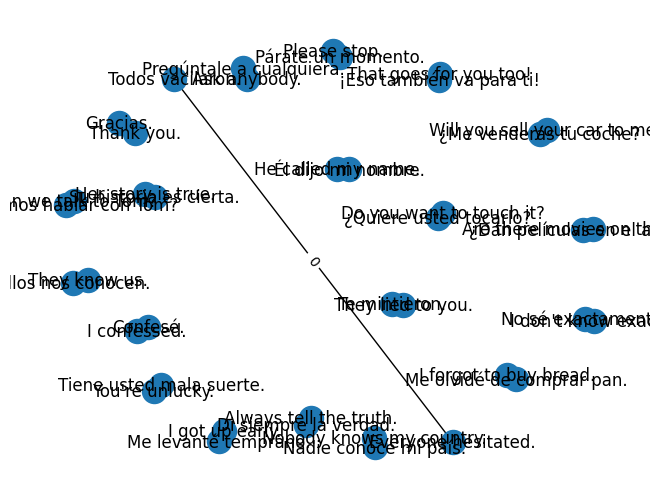

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load English and Spanish language models
nlp_en = spacy.load("en_core_web_sm")
nlp_es = spacy.load("es_core_news_sm")

# Define file paths for English and Spanish sentences
en_corpus_path = "/content/english5.txt"
es_corpus_path = "/content/spanish5.txt"

# Read sentences from files
def read_sentences(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        sentences = [line.strip() for line in file]
    return sentences

# Calculate dependency distances for each sentence pair
def calculate_dependency_distance(en_sentence, es_sentence):
    en_doc = nlp_en(en_sentence)
    es_doc = nlp_es(es_sentence)

    # Get dependency labels for each token
    en_dependencies = [token.dep_ for token in en_doc]
    es_dependencies = [token.dep_ for token in es_doc]

    # Calculate the number of differing dependency labels
    distance = sum(d != e for d, e in zip(en_dependencies, es_dependencies))
    return distance

# Create a graph and visualize dependencies
def visualize_dependencies(en_sentences, es_sentences):
    G = nx.Graph()

    for en_sentence, es_sentence in zip(en_sentences, es_sentences):
        distance = calculate_dependency_distance(en_sentence, es_sentence)
        G.add_edge(en_sentence, es_sentence, weight=distance)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

# Process sentences and visualize dependencies
def main():
    en_sentences = read_sentences(en_corpus_path)
    es_sentences = read_sentences(es_corpus_path)

    visualize_dependencies(en_sentences, es_sentences)

if __name__ == "__main__":
    main()


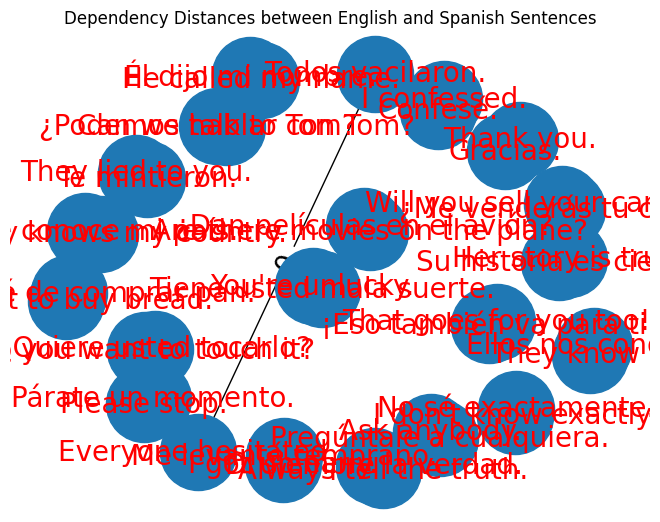

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import os

# Load English and Spanish language models
nlp_en = spacy.load("en_core_web_sm")
nlp_es = spacy.load("es_core_news_sm")

# Function to read sentences from a file
def read_sentences(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        sentences = [line.strip() for line in file]
    return sentences

# Function to calculate dependency distance for a sentence pair
def calculate_dependency_distance(en_sentence, es_sentence):
    en_doc = nlp_en(en_sentence)
    es_doc = nlp_es(es_sentence)

    en_dependencies = [token.dep_ for token in en_doc]
    es_dependencies = [token.dep_ for token in es_doc]

    distance = sum(d != e for d, e in zip(en_dependencies, es_dependencies))
    return distance

# Function to visualize dependency distances for each sentence pair
def visualize_dependencies(en_sentences, es_sentences):
    G = nx.Graph()

    for en_sentence, es_sentence in zip(en_sentences, es_sentences):
        distance = calculate_dependency_distance(en_sentence, es_sentence)
        G.add_edge(en_sentence, es_sentence, weight=distance)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_size=3000, font_size=20, font_color='red', font_weight='light')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=20)

    plt.title('Dependency Distances between English and Spanish Sentences')
    plt.show()

# Main function to process sentences and visualize dependencies
def main():
    # Provide the paths to your English and Spanish files
    english_file_paths = ['/content/english5.txt']
    spanish_file_paths = ['/content/spanish5.txt']

    en_sentences = []
    es_sentences = []

    # Read sentences from files
    for en_file, es_file in zip(english_file_paths, spanish_file_paths):
        en_sentences.extend(read_sentences(en_file))
        es_sentences.extend(read_sentences(es_file))

    # Visualize dependency distances
    visualize_dependencies(en_sentences, es_sentences)

if __name__ == "__main__":
    main()


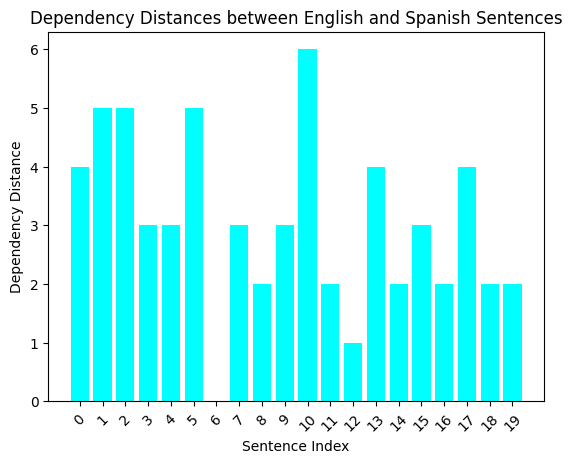

In [ ]:
import spacy
import matplotlib.pyplot as plt
import os

# Load English and Spanish language models
nlp_en = spacy.load("en_core_web_sm")
nlp_es = spacy.load("es_core_news_sm")

# Function to read sentences from a file
def read_sentences(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        sentences = [line.strip() for line in file]
    return sentences

# Function to calculate dependency distance for a sentence pair
def calculate_dependency_distance(en_sentence, es_sentence):
    en_doc = nlp_en(en_sentence)
    es_doc = nlp_es(es_sentence)

    en_dependencies = [token.dep_ for token in en_doc]
    es_dependencies = [token.dep_ for token in es_doc]

    distance = sum(d != e for d, e in zip(en_dependencies, es_dependencies))
    return distance

# Function to visualize dependency distances for each sentence pair
def visualize_dependencies(en_sentences, es_sentences):
    distances = []

    for en_sentence, es_sentence in zip(en_sentences, es_sentences):
        distance = calculate_dependency_distance(en_sentence, es_sentence)
        distances.append(distance)

    # Create a bar chart
    plt.bar(range(len(distances)), distances, color='cyan')
    plt.xlabel('Sentence Index')
    plt.ylabel('Dependency Distance')
    plt.title('Dependency Distances between English and Spanish Sentences')
    plt.xticks(range(len(distances)), rotation=45)
    plt.show()

# Main function to process sentences and visualize dependencies
def main():
    # Provide the paths to your English and Spanish files
    english_file_paths = ['/content/english5.txt']
    spanish_file_paths = ['/content/spanish5.txt']

    en_sentences = []
    es_sentences = []

    # Read sentences from files
    for en_file, es_file in zip(english_file_paths, spanish_file_paths):
        en_sentences.extend(read_sentences(en_file))
        es_sentences.extend(read_sentences(es_file))

    # Visualize dependency distances as a bar chart
    visualize_dependencies(en_sentences, es_sentences)

if __name__ == "__main__":
    main()


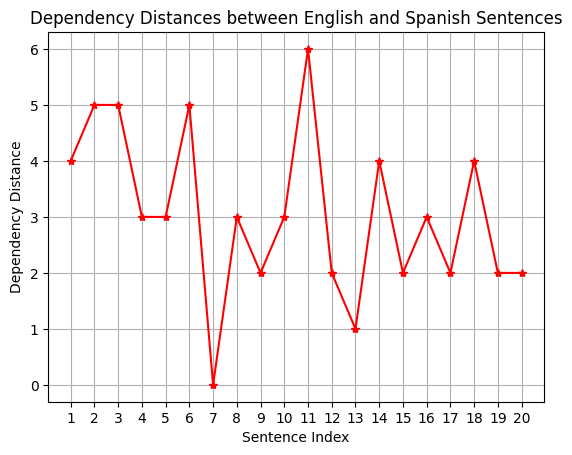

In [ ]:
import spacy
import matplotlib.pyplot as plt
import os

# Load English and Spanish language models
nlp_en = spacy.load("en_core_web_sm")
nlp_es = spacy.load("es_core_news_sm")

# Function to read sentences from a file
def read_sentences(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        sentences = [line.strip() for line in file]
    return sentences

# Function to calculate dependency distance for a sentence pair
def calculate_dependency_distance(en_sentence, es_sentence):
    en_doc = nlp_en(en_sentence)
    es_doc = nlp_es(es_sentence)

    en_dependencies = [token.dep_ for token in en_doc]
    es_dependencies = [token.dep_ for token in es_doc]

    distance = sum(d != e for d, e in zip(en_dependencies, es_dependencies))
    return distance

# Function to visualize dependency distances for each sentence pair
def visualize_dependencies(en_sentences, es_sentences, num_sentences=20):
    distances = []

    for i in range(num_sentences):
        en_sentence = en_sentences[i]
        es_sentence = es_sentences[i]
        distance = calculate_dependency_distance(en_sentence, es_sentence)
        distances.append(distance)

    # Create a line chart
    plt.plot(range(1, num_sentences + 1), distances, marker='*', linestyle='-', color='Red')
    plt.xlabel('Sentence Index')
    plt.ylabel('Dependency Distance')
    plt.title('Dependency Distances between English and Spanish Sentences')
    plt.xticks(range(1, num_sentences + 1))
    plt.grid(True)
    plt.show()

# Main function to process sentences and visualize dependencies
def main():
    ## Provide the paths to your English and Spanish files
    english_file_paths = ['/content/english5.txt']
    spanish_file_paths = ['/content/spanish5.txt']
    en_sentences = []
    es_sentences = []

    # Read sentences from files
    for en_file, es_file in zip(english_file_paths, spanish_file_paths):
        en_sentences.extend(read_sentences(en_file))
        es_sentences.extend(read_sentences(es_file))

    # Visualize dependency distances as a line chart for the first 20 sentences
    visualize_dependencies(en_sentences, es_sentences, num_sentences=20)

if __name__ == "__main__":
    main()


In [ ]:
! pip install textdescriptives

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.3/254.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.1 MB/s eta 0:00:00
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41929 sha256=de9f56e5937fba3acb5dabd54acee5d680ab55eb4889cecfb0a7b6295223d566
  Stored in directory: /root/.cache/pip/wheels/92/8e/16/c1e4d4d65685d71085e4e27b44d6ed880b0559474c9ee4ff66
Successfully built ftfy


In [ ]:
import spacy
import textdescriptives as td
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("textdescriptives/dependency_distance")
doc = nlp("The world is changed. I feel it in the water. I feel it in the earth. I smell it in the air. Much that once was is lost, for none now live who remember it.")

# all attributes are stored as a dict in the ._.dependency_distance attribute
doc._.sentence_length


#doc._.counts
#doc._.sentence_length
#doc._.syllables
#doc._.token_length

# access span and token level dependency distance in the same way
doc[:3]._.dependency_distance
doc[1]._.dependency_distance

# extract to dataframe
td.extract_df(doc)

AttributeError: ignored

In [ ]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 36.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19580 sha256=d9b1fc873c96408b4ebae89660cb7f90b423e051343c4641888217e579874840
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloc

In [ ]:
import spacy
import textdescriptives as td

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Add textdescriptives pipeline component
nlp.add_pipe("textdescriptives/descriptive_stats")

# Process text
doc = nlp("/content/english5.txt")
# Access descriptive statistics attributes
print(doc._.descriptive_stats)
print(doc._.counts)
print(doc._.sentence_length)
print(doc._.syllables)
print(doc._.token_length)

# Extract to DataFrame
td.extract_df(doc)


{'n_tokens': 2, 'n_unique_tokens': 2, 'proportion_unique_tokens': 1.0, 'n_characters': 21, 'n_sentences': 1, 'token_length_mean': 10.0, 'token_length_median': 10.0, 'token_length_std': 2.0, 'sentence_length_mean': 2.0, 'sentence_length_median': 2.0, 'sentence_length_std': 0.0, 'syllables_per_token_mean': 2.0, 'syllables_per_token_median': 2.0, 'syllables_per_token_std': 0.0}
{'n_tokens': 2, 'n_unique_tokens': 2, 'proportion_unique_tokens': 1.0, 'n_characters': 21, 'n_sentences': 1}
{'sentence_length_mean': 2.0, 'sentence_length_median': 2.0, 'sentence_length_std': 0.0}
{'syllables_per_token_mean': 2.0, 'syllables_per_token_median': 2.0, 'syllables_per_token_std': 0.0}
{'token_length_mean': 10.0, 'token_length_median': 10.0, 'token_length_std': 2.0}


text  token_length_mean  token_length_median  \
0  /content/english5.txt               10.0                 10.0   

   token_length_std  sentence_length_mean  sentence_length_median  \
0               2.0                   2.0                     2.0   

   sentence_length_std  syllables_per_token_mean  syllables_per_token_median  \
0                  0.0                       2.0                         2.0   

   syllables_per_token_std  n_tokens  n_unique_tokens  \
0                      0.0         2                2   

   proportion_unique_tokens  n_characters  n_sentences  \
0                       1.0            21            1   

   dependency_distance_mean  dependency_distance_std  \
0                       1.0                      0.0   

   prop_adjacent_dependency_relation_mean  \
0                                0.333333   

   prop_adjacent_dependency_relation_std  
0                                    0.0

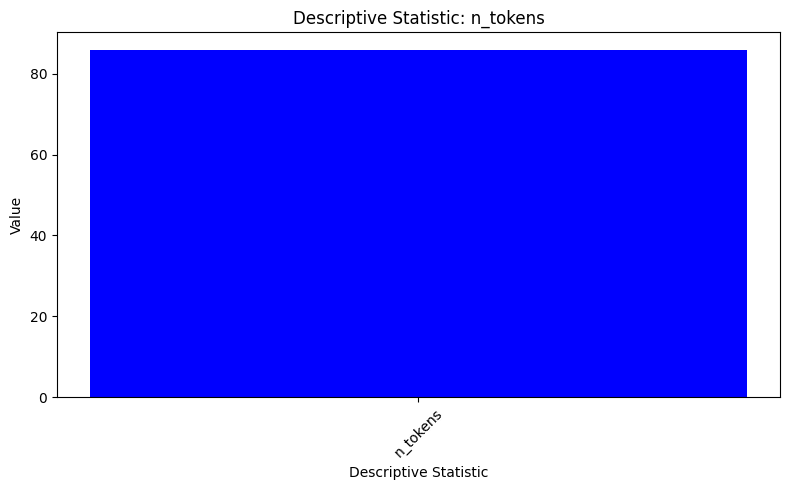

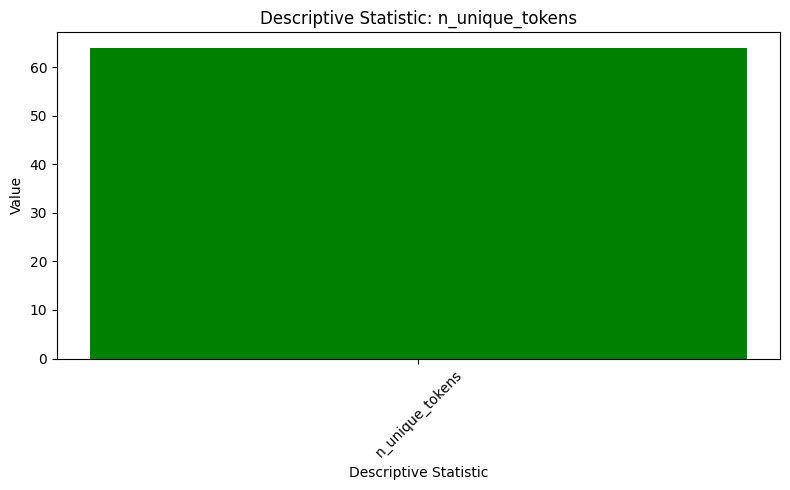

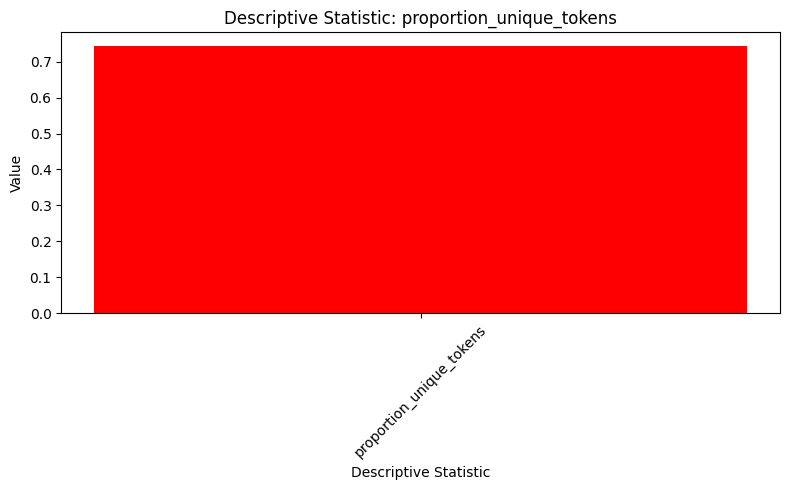

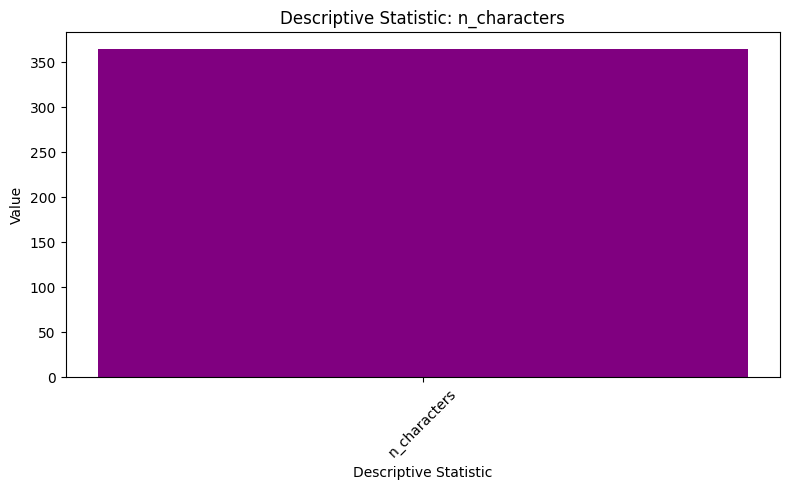

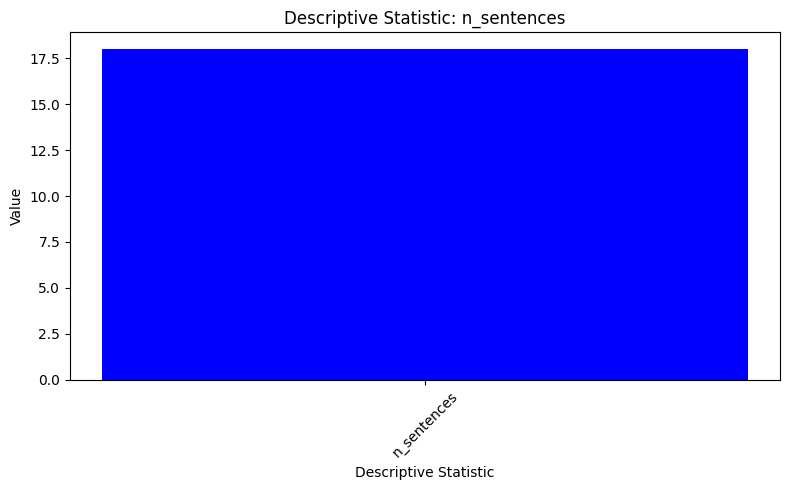

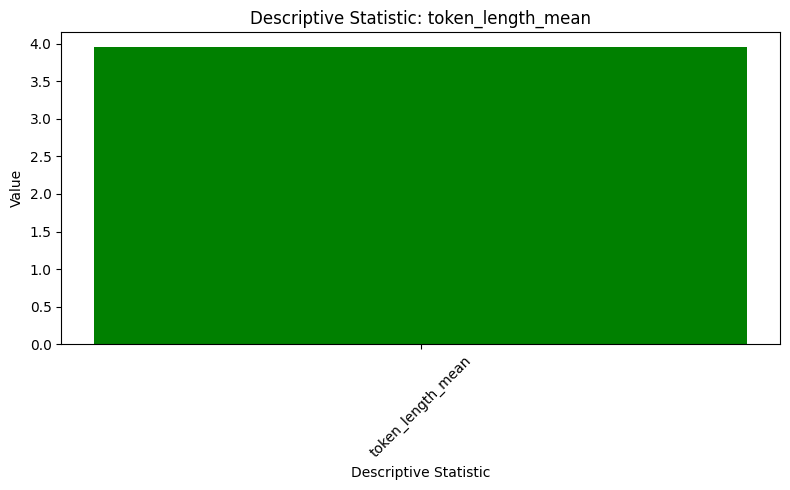

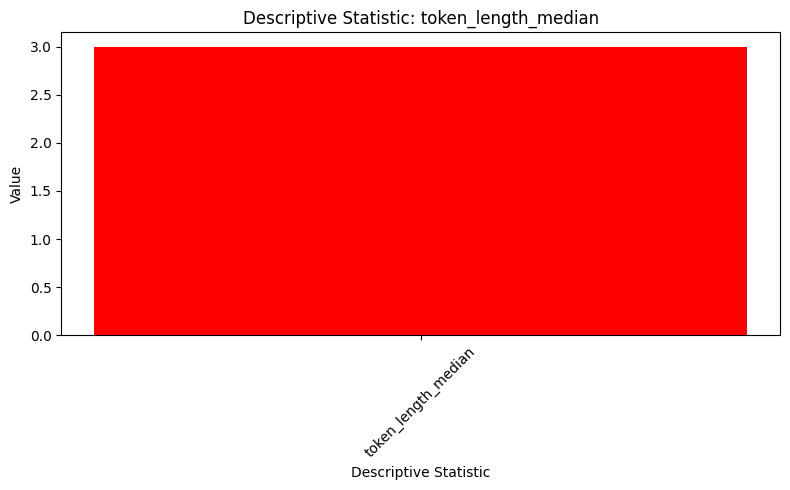

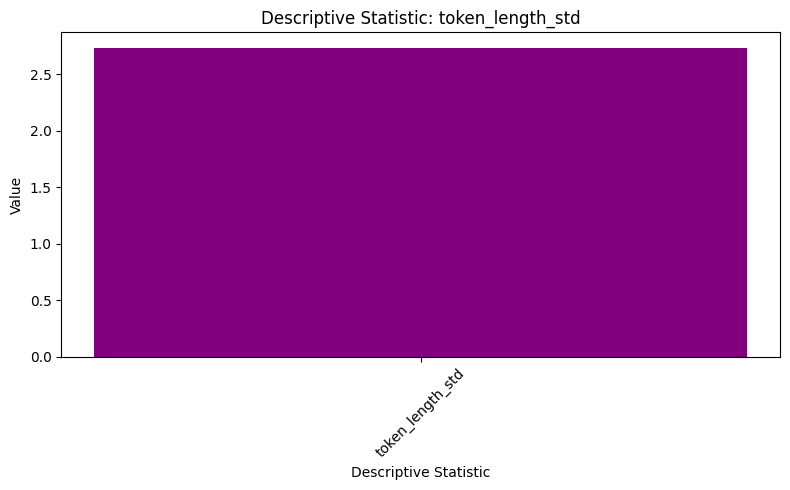

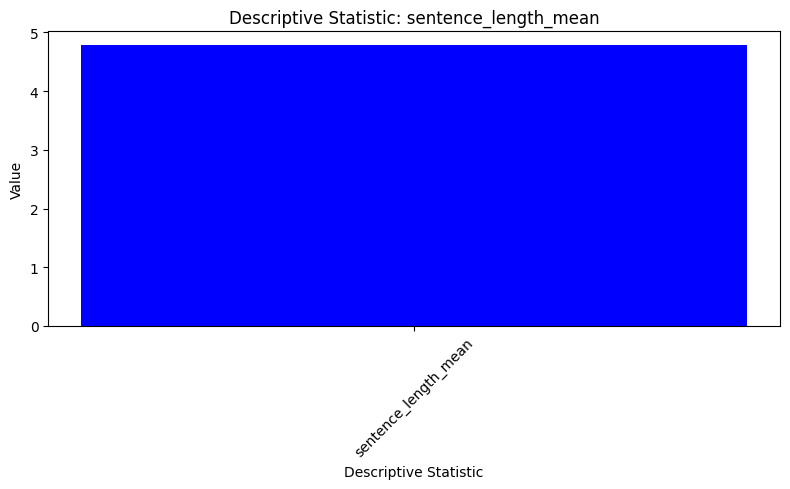

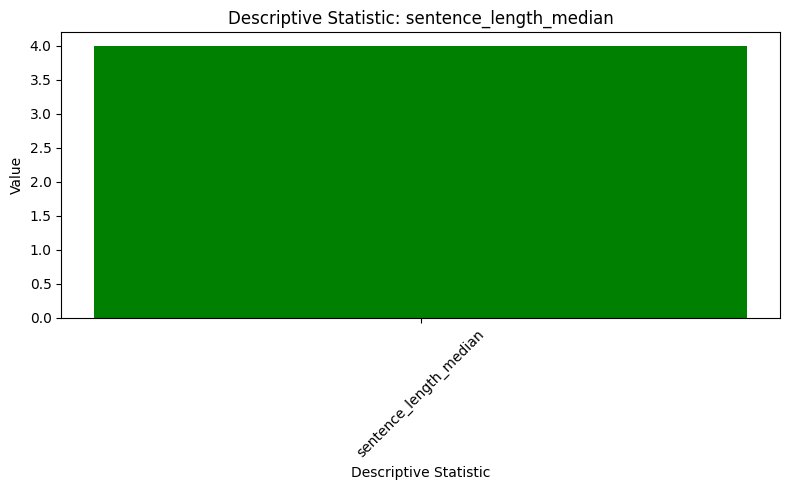

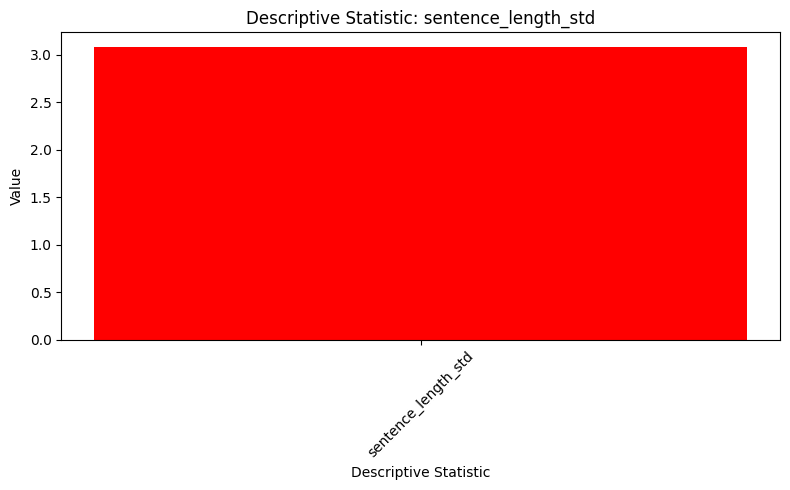

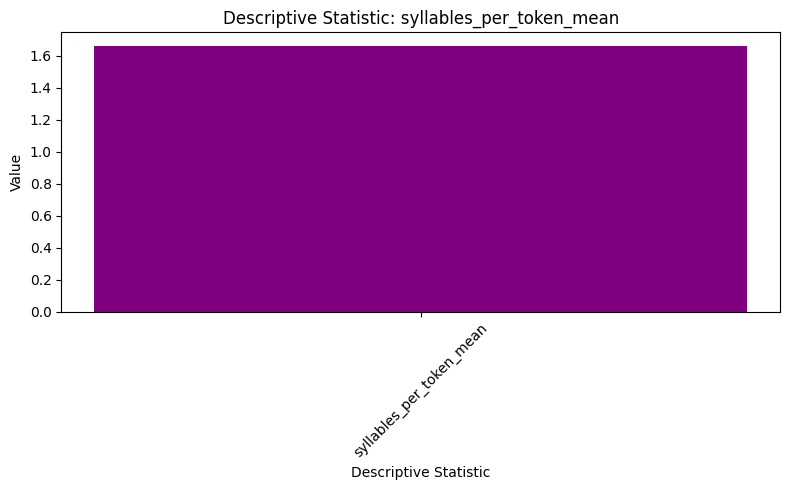

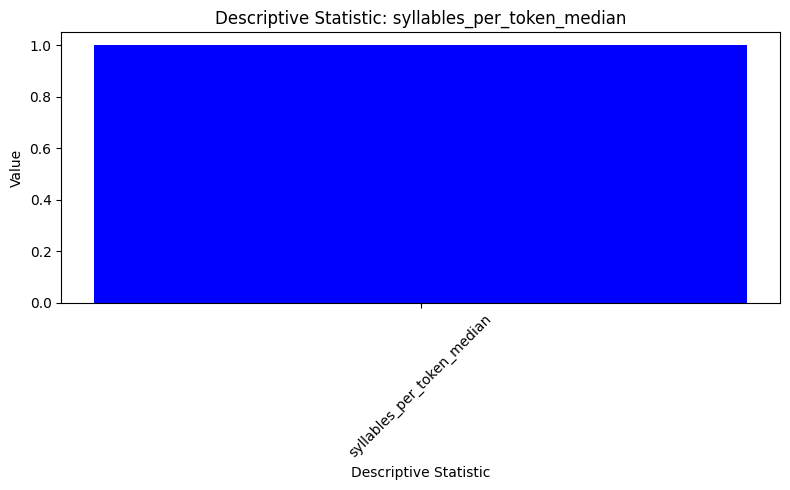

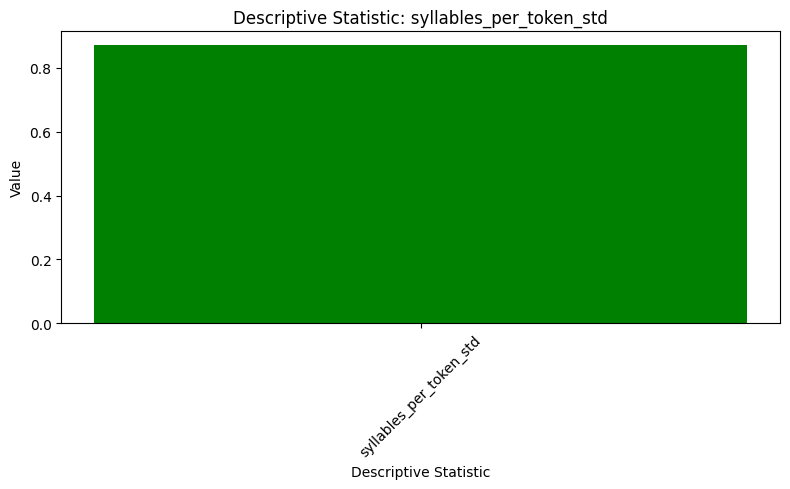

In [ ]:
import spacy
import textdescriptives as td
import matplotlib.pyplot as plt

# Load spaCy model for Spanish
nlp = spacy.load("es_core_news_sm")

# Add TextDescriptives pipeline component
nlp.add_pipe("textdescriptives/descriptive_stats")

# Read Spanish corpus from a file
spanish_corpus_path = "/content/spanish5.txt"

def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

spanish_corpus = read_corpus(spanish_corpus_path)

# Process the Spanish corpus
doc = nlp(spanish_corpus)

# Access TextDescriptives attributes
descriptive_stats = doc._.descriptive_stats

# Separate attributes and values for charting
attributes = list(descriptive_stats.keys())
values = list(descriptive_stats.values())

# Define colors for attributes (customize as needed)
colors = ['blue', 'green', 'red', 'purple']

# Create separate charts for each attribute with different colors
for i, attr in enumerate(attributes):
    plt.figure(figsize=(8, 5))

    plt.bar(attr, values[i], color=colors[i % len(colors)])  # Cycle colors if more attributes

    plt.xlabel("Descriptive Statistic")
    plt.ylabel("Value")
    plt.title(f"Descriptive Statistic: {attr}")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the chart
    plt.show()


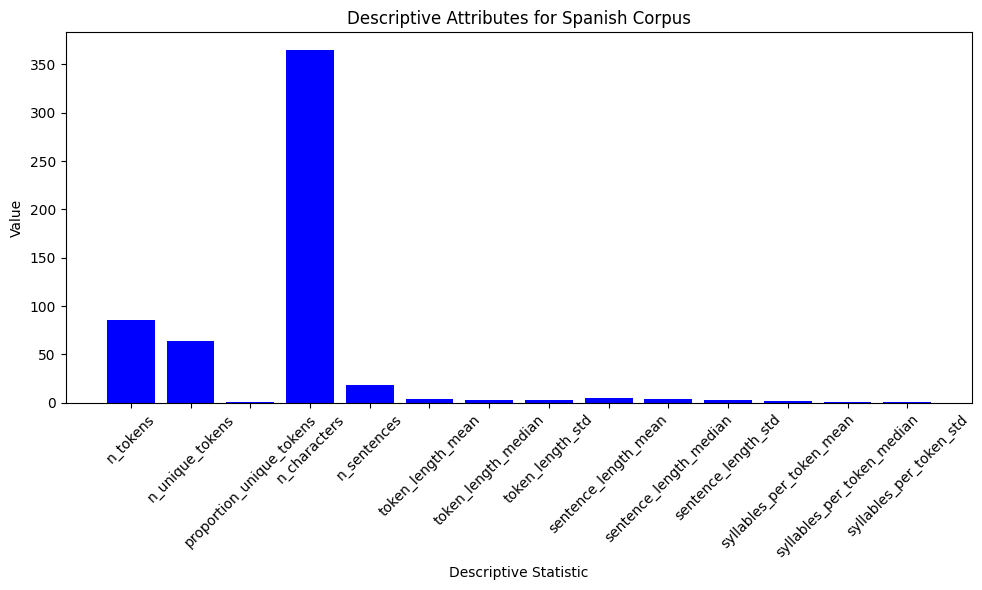

In [ ]:
import spacy
import textdescriptives as td
import matplotlib.pyplot as plt

# Load spaCy model for Spanish
nlp = spacy.load("es_core_news_sm")

# Add TextDescriptives pipeline component
nlp.add_pipe("textdescriptives/descriptive_stats")

# Read Spanish corpus from a file
spanish_corpus_path = "/content/spanish5.txt"

def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

spanish_corpus = read_corpus(spanish_corpus_path)

# Process the Spanish corpus
doc = nlp(spanish_corpus)

# Access TextDescriptives attributes
descriptive_stats = doc._.descriptive_stats

# Separate attributes and values for charting
attributes = list(descriptive_stats.keys())
values = list(descriptive_stats.values())

# Create a single chart with bars for each attribute
plt.figure(figsize=(10, 6))
plt.bar(attributes, values, color='blue')  # Customize color as needed
plt.xlabel("Descriptive Statistic")
plt.ylabel("Value")
plt.title("Descriptive Attributes for Spanish Corpus")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


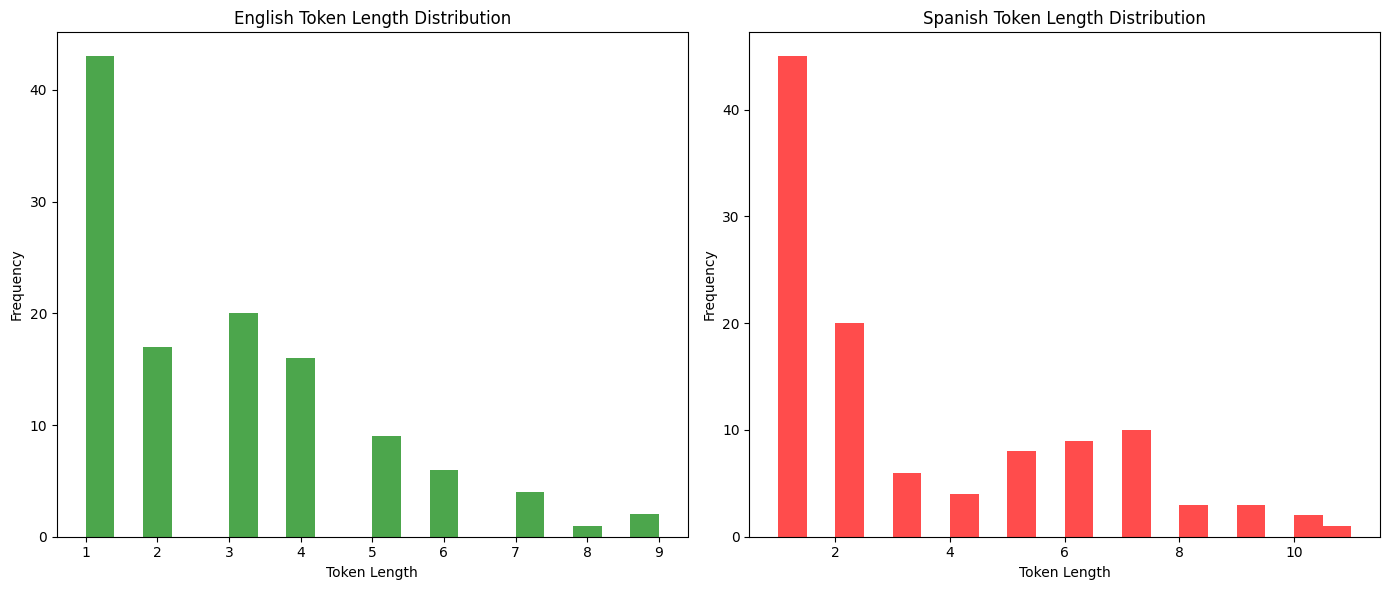

In [ ]:
import spacy
import numpy as np
import matplotlib.pyplot as plt

# Load spaCy models for English and Spanish
nlp_en = spacy.load("en_core_web_sm")
nlp_es = spacy.load("es_core_news_sm")

# Read English and Spanish corpora from files
english_corpus_path = "/content/english5.txt"
spanish_corpus_path = "/content/spanish5.txt"

def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

# Process English corpus
english_corpus = read_corpus(english_corpus_path)
doc_en = nlp_en(english_corpus)
tokens_en = [len(token) for token in doc_en]

# Process Spanish corpus
spanish_corpus = read_corpus(spanish_corpus_path)
doc_es = nlp_es(spanish_corpus)
tokens_es = [len(token) for token in doc_es]

# Create subplots for English and Spanish histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# English histogram (green)
ax1.hist(tokens_en, bins=20, color='green', alpha=0.7)
ax1.set_title('English Token Length Distribution')
ax1.set_xlabel('Token Length')
ax1.set_ylabel('Frequency')

# Spanish histogram (red)
ax2.hist(tokens_es, bins=20, color='red', alpha=0.7)
ax2.set_title('Spanish Token Length Distribution')
ax2.set_xlabel('Token Length')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


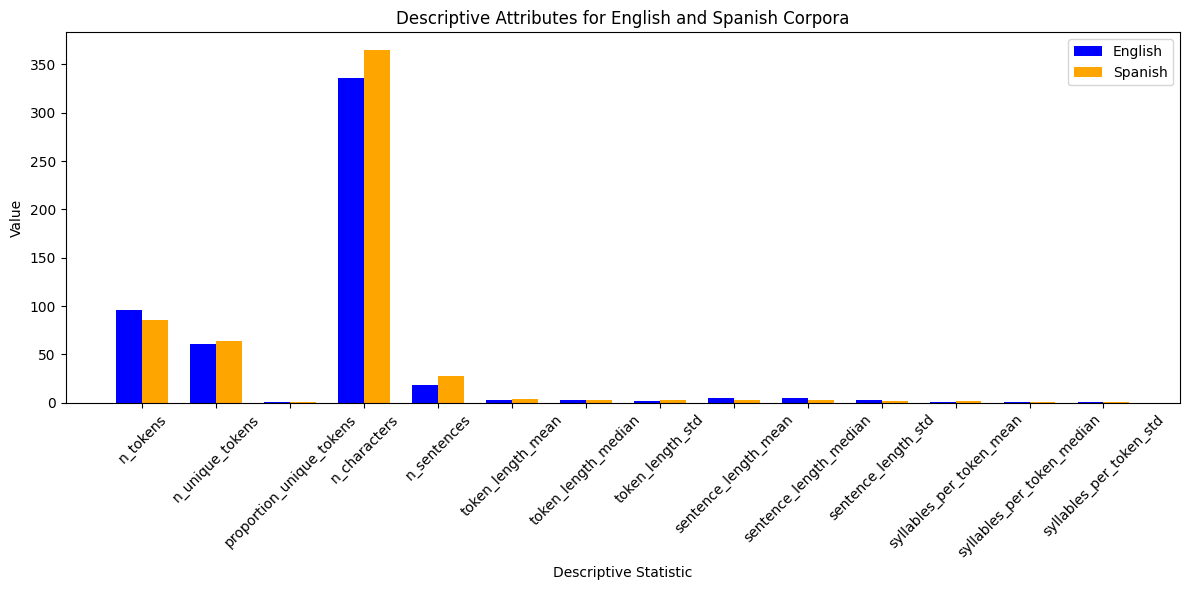

In [ ]:
import spacy
import textdescriptives as td
import matplotlib.pyplot as plt

# Load spaCy models for English and Spanish
nlp_english = spacy.load("en_core_web_sm")
nlp_spanish = spacy.load("es_core_news_sm")

# Add TextDescriptives pipeline components
nlp_english.add_pipe("textdescriptives/descriptive_stats")
nlp_spanish.add_pipe("textdescriptives/descriptive_stats")

# Read English corpus from a file
english_corpus_path = "/content/english5.txt"
spanish_corpus_path = "/content/spanish5.txt"

def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

english_corpus = read_corpus(english_corpus_path)
spanish_corpus = read_corpus(spanish_corpus_path)

# Process the English corpus
doc_english = nlp_english(english_corpus)
descriptive_stats_english = doc_english._.descriptive_stats

# Process the Spanish corpus
doc_spanish = nlp_spanish(spanish_corpus)
descriptive_stats_spanish = doc_spanish._.descriptive_stats

# Separate attributes and values for charting
attributes = list(descriptive_stats_english.keys())
values_english = list(descriptive_stats_english.values())
values_spanish = list(descriptive_stats_spanish.values())

# Create a grouped bar chart
bar_width = 0.35
index = range(len(attributes))

plt.figure(figsize=(12, 6))

plt.bar(index, values_english, bar_width, label='English', color='blue')
plt.bar([i + bar_width for i in index], values_spanish, bar_width, label='Spanish', color='orange')

plt.xlabel("Descriptive Statistic")
plt.ylabel("Value")
plt.title("Descriptive Attributes for English and Spanish Corpora")
plt.xticks([i + bar_width/2 for i in index], attributes, rotation=45)
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()


In [ ]:
! pip install textstat


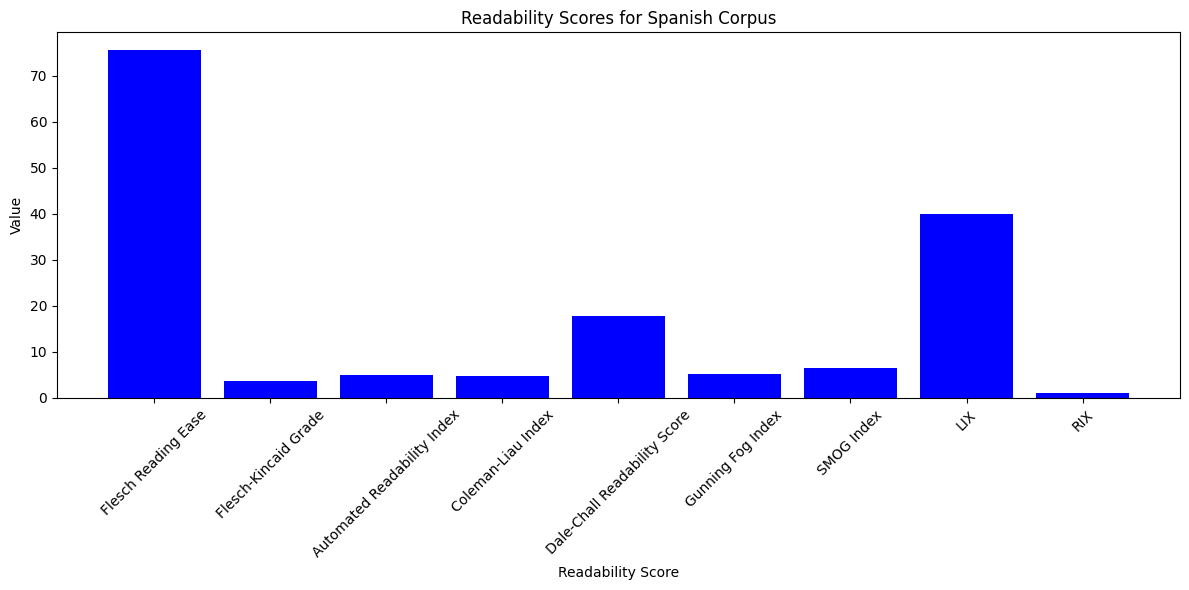

In [ ]:
import spacy
import textstat
import matplotlib.pyplot as plt

# Load spaCy model for Spanish
nlp = spacy.load("es_core_news_sm")

# Read Spanish corpus from a file
spanish_corpus_path = "/content/spanish5.txt"

def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

spanish_corpus = read_corpus(spanish_corpus_path)

# Process the Spanish corpus
doc = nlp(spanish_corpus)

# Calculate readability scores using textstat
readability_scores = {
    "Flesch Reading Ease": textstat.flesch_reading_ease(spanish_corpus),
    "Flesch-Kincaid Grade": textstat.flesch_kincaid_grade(spanish_corpus),
    "Automated Readability Index": textstat.automated_readability_index(spanish_corpus),
    "Coleman-Liau Index": textstat.coleman_liau_index(spanish_corpus),
    "Dale-Chall Readability Score": textstat.dale_chall_readability_score(spanish_corpus),
    "Gunning Fog Index": textstat.gunning_fog(spanish_corpus),
    "SMOG Index": textstat.smog_index(spanish_corpus),
    "LIX": textstat.lix(spanish_corpus),
    "RIX": textstat.rix(spanish_corpus)
}

# Separate readability scores and values for charting
scores = list(readability_scores.keys())
values = list(readability_scores.values())

# Create a single chart with bars for readability scores
plt.figure(figsize=(12, 6))
plt.bar(scores, values, color='blue')  # Customize color as needed
plt.xlabel("Readability Score")
plt.ylabel("Value")
plt.title("Readability Scores for Spanish Corpus")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()



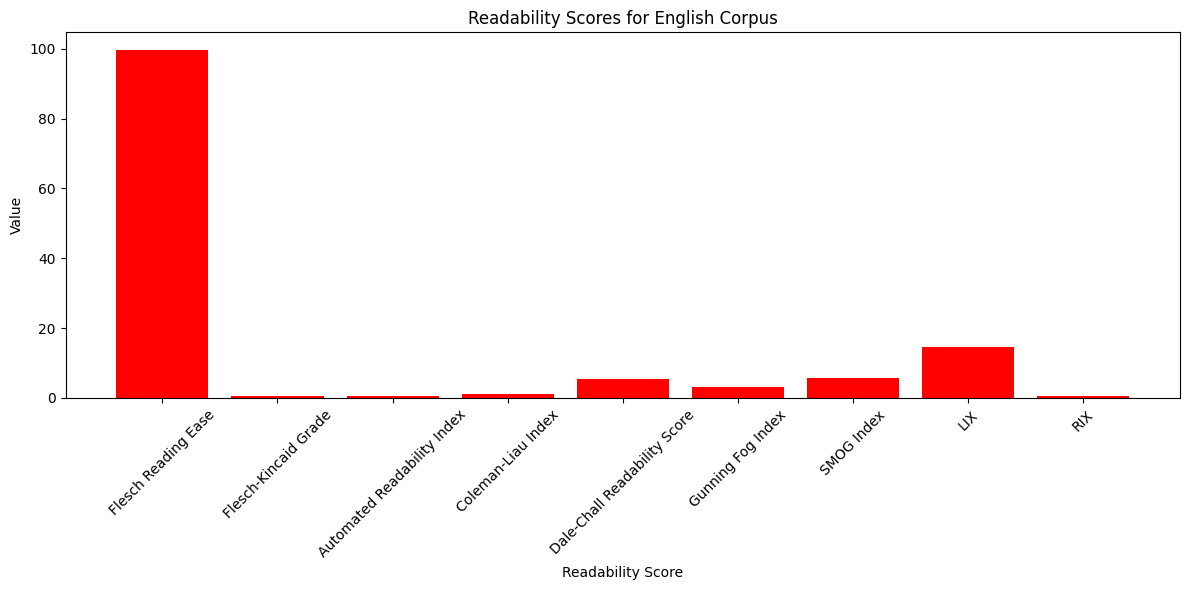

In [ ]:
import spacy
import textstat
import matplotlib.pyplot as plt

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Read English corpus from a file
english_corpus_path = "/content/english5.txt"

def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

english_corpus = read_corpus(english_corpus_path)

# Process the English corpus
doc = nlp(english_corpus)

# Calculate readability scores using textstat
readability_scores = {
    "Flesch Reading Ease": textstat.flesch_reading_ease(english_corpus),
    "Flesch-Kincaid Grade": textstat.flesch_kincaid_grade(english_corpus),
    "Automated Readability Index": textstat.automated_readability_index(english_corpus),
    "Coleman-Liau Index": textstat.coleman_liau_index(english_corpus),
    "Dale-Chall Readability Score": textstat.dale_chall_readability_score(english_corpus),
    "Gunning Fog Index": textstat.gunning_fog(english_corpus),
    "SMOG Index": textstat.smog_index(english_corpus),
    "LIX": textstat.lix(english_corpus),
    "RIX": textstat.rix(english_corpus)
}

# Separate readability scores and values for charting
scores = list(readability_scores.keys())
values = list(readability_scores.values())

# Create a single chart with bars for readability scores
plt.figure(figsize=(12, 6))
plt.bar(scores, values, color='red')  # Customize color as needed
plt.xlabel("Readability Score")
plt.ylabel("Value")
plt.title("Readability Scores for English Corpus")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
! pip install "en_core_news_sm"

ERROR: Could not find a version that satisfies the requirement en_core_news_sm (from versions: none)
ERROR: No matching distribution found for en_core_news_sm


/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  directory, to prevent mismatches with relative paths.


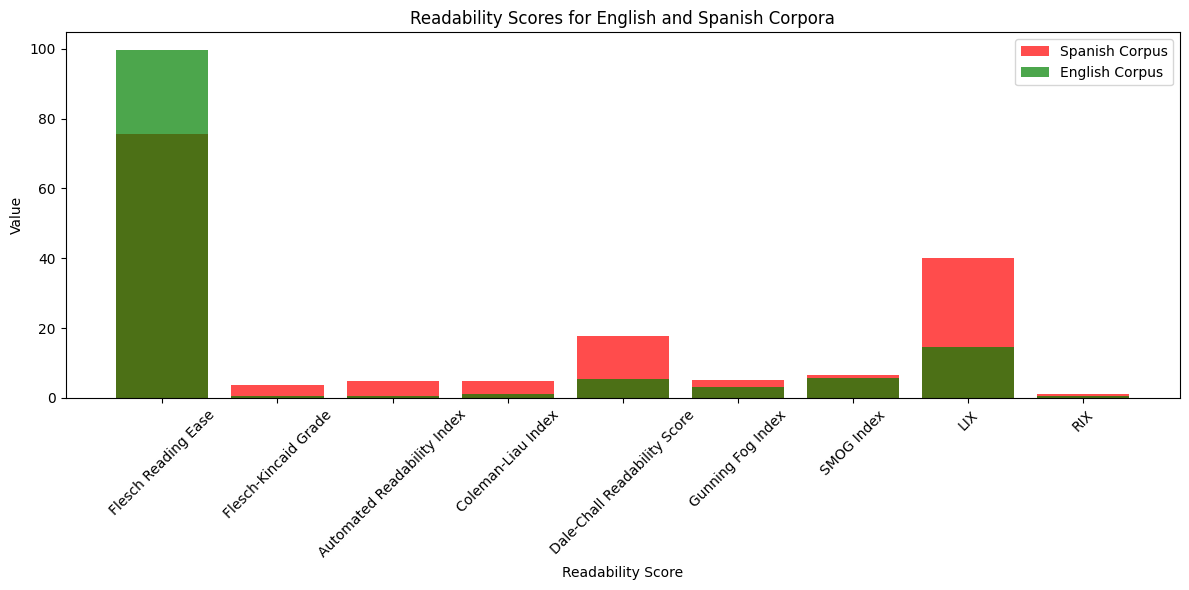

In [ ]:
import spacy
import textstat
import matplotlib.pyplot as plt

# Function to read corpus from a file
def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

# Function to calculate readability scores
def calculate_readability_scores(corpus, language):
    nlp = spacy.load(f"en_core_news_sm")
    doc = nlp(corpus)


# Function to calculate readability scores
def calculate_readability_scores(corpus, language):
    nlp = spacy.load(f"es_core_news_sm")
    doc = nlp(corpus)

    scores = {
        "Flesch Reading Ease": textstat.flesch_reading_ease(corpus),
        "Flesch-Kincaid Grade": textstat.flesch_kincaid_grade(corpus),
        "Automated Readability Index": textstat.automated_readability_index(corpus),
        "Coleman-Liau Index": textstat.coleman_liau_index(corpus),
        "Dale-Chall Readability Score": textstat.dale_chall_readability_score(corpus),
        "Gunning Fog Index": textstat.gunning_fog(corpus),
        "SMOG Index": textstat.smog_index(corpus),
        "LIX": textstat.lix(corpus),
        "RIX": textstat.rix(corpus)
    }
    return scores

# Function to plot readability scores
def plot_readability_scores(scores, title, color):
    keys, values = zip(*scores.items())

    plt.bar(keys, values, color=color, alpha=0.7, label=title)

# Read Spanish corpus
spanish_corpus_path = "/content/spanish5.txt"
spanish_corpus = read_corpus(spanish_corpus_path)
spanish_scores = calculate_readability_scores(spanish_corpus, "es")

# Read English corpus
english_corpus_path = "/content/english5.txt"
english_corpus = read_corpus(english_corpus_path)
english_scores = calculate_readability_scores(english_corpus, "en")

# Plot grouped bar chart
plt.figure(figsize=(12, 6))

plot_readability_scores(spanish_scores, "Spanish Corpus", 'red')
plot_readability_scores(english_scores, "English Corpus", 'green')

plt.xlabel("Readability Score")
plt.ylabel("Value")
plt.title("Readability Scores for English and Spanish Corpora")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


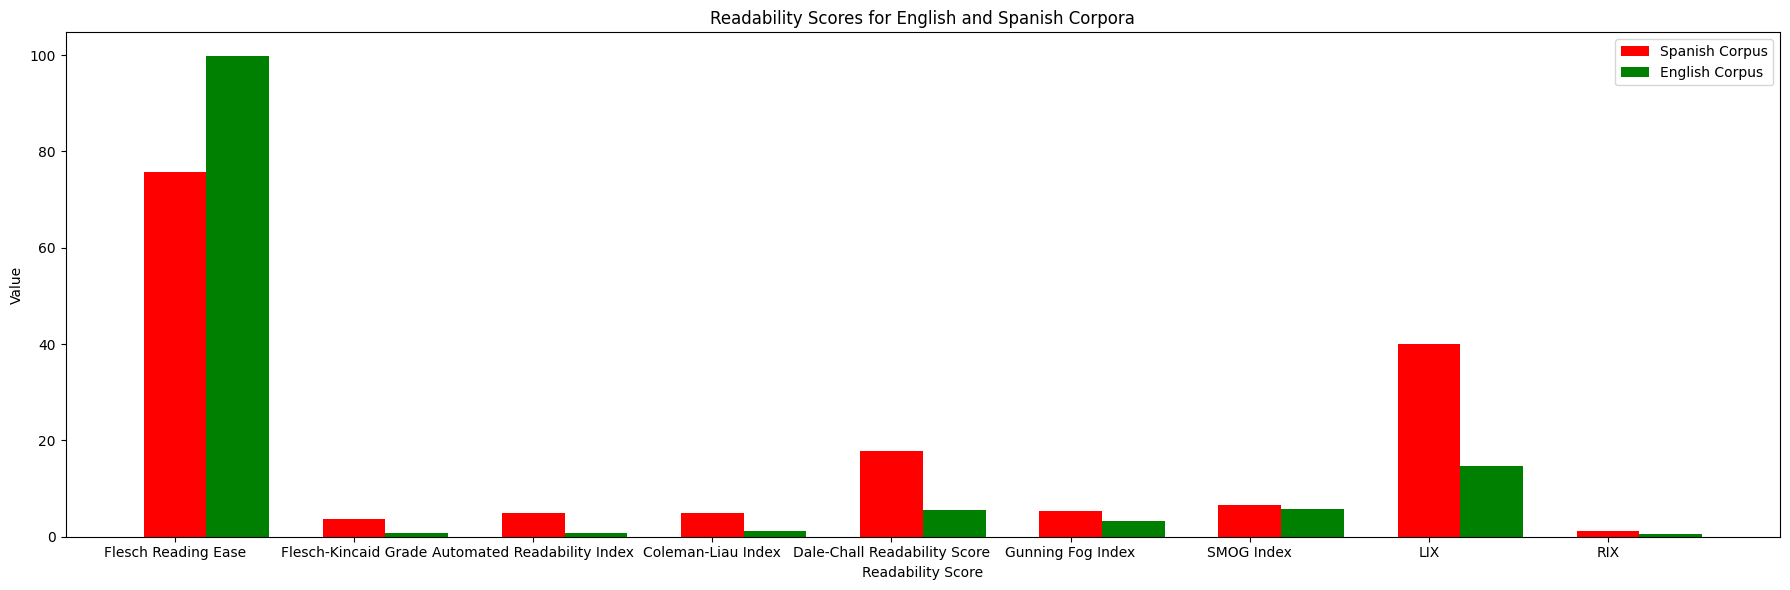

In [ ]:
import spacy
import textstat
import matplotlib.pyplot as plt
import numpy as np

# Function to read corpus from a file
def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

# Function to calculate readability scores
def calculate_readability_scores(corpus, language):
    nlp = spacy.load(f"en_core_news_sm")
    doc = nlp(corpus)


# Function to calculate readability scores
def calculate_readability_scores(corpus, language):
    nlp = spacy.load(f"es_core_news_sm")
    doc = nlp(corpus)

    scores = {
        "Flesch Reading Ease": textstat.flesch_reading_ease(corpus),
        "Flesch-Kincaid Grade": textstat.flesch_kincaid_grade(corpus),
        "Automated Readability Index": textstat.automated_readability_index(corpus),
        "Coleman-Liau Index": textstat.coleman_liau_index(corpus),
        "Dale-Chall Readability Score": textstat.dale_chall_readability_score(corpus),
        "Gunning Fog Index": textstat.gunning_fog(corpus),
        "SMOG Index": textstat.smog_index(corpus),
        "LIX": textstat.lix(corpus),
        "RIX": textstat.rix(corpus)
    }
    return scores

# Function to plot readability scores
def plot_readability_scores(ax, scores, title, color, offset):
    keys, values = zip(*scores.items())
    bar_width = 0.35

    x = np.arange(len(keys))
    ax.bar(x + offset, values, bar_width, label=title, color=color)

# Read Spanish corpus
spanish_corpus_path = "/content/spanish5.txt"
spanish_corpus = read_corpus(spanish_corpus_path)
spanish_scores = calculate_readability_scores(spanish_corpus, "es")

# Read English corpus
english_corpus_path = "/content/english5.txt"
english_corpus = read_corpus(english_corpus_path)
english_scores = calculate_readability_scores(english_corpus, "en")

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(18, 6))

plot_readability_scores(ax, spanish_scores, "Spanish Corpus", 'red', 0.0)
plot_readability_scores(ax, english_scores, "English Corpus", 'green', 0.35)

ax.set_xlabel("Readability Score")
ax.set_ylabel("Value")
ax.set_title("Readability Scores for English and Spanish Corpora")
ax.set_xticks(np.arange(len(spanish_scores)))
ax.set_xticklabels(spanish_scores.keys())
ax.legend()
plt.tight_layout()

# Show the chart
plt.show()


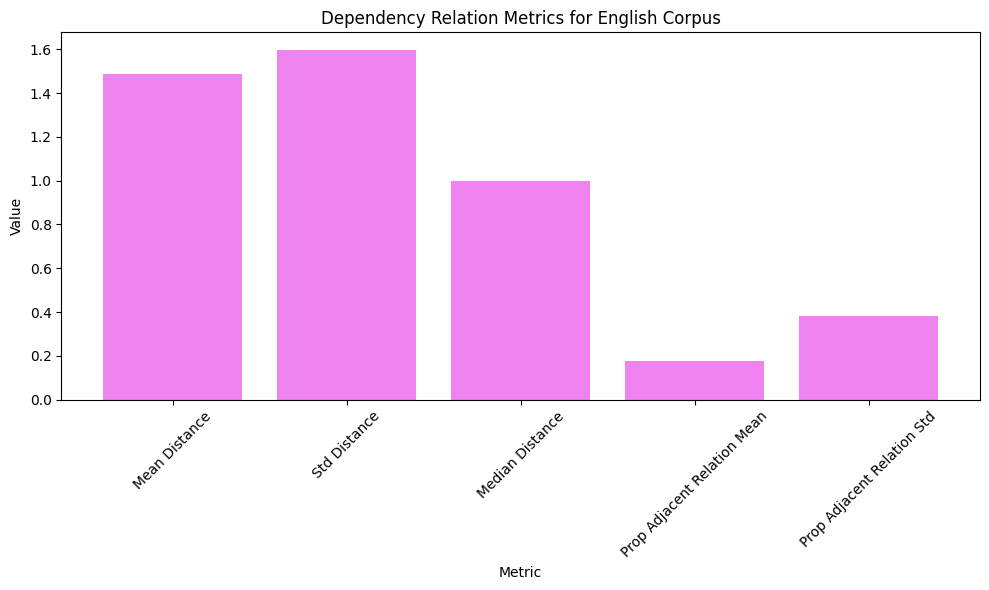

In [ ]:
import spacy
import numpy as np
import matplotlib.pyplot as plt

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Read English corpus from a file
english_corpus_path = "/content/english5.txt"

def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

english_corpus = read_corpus(english_corpus_path)

# Process the English corpus
doc = nlp(english_corpus)

# Calculate dependency distances and proportion of adjacent dependency relations
dependency_distances = [abs(token.i - token.head.i) for token in doc]

adjacent_dependency_count = 0
for i in range(len(dependency_distances) - 1):
    if dependency_distances[i] == dependency_distances[i + 1]:
        adjacent_dependency_count += 1

prop_adjacent_dependency_relation_mean = adjacent_dependency_count / (len(dependency_distances) - 1)
prop_adjacent_dependency_relation_std = np.sqrt(prop_adjacent_dependency_relation_mean * (1 - prop_adjacent_dependency_relation_mean))

# Calculate descriptive statistics using numpy
mean_distance = np.mean(dependency_distances)
std_distance = np.std(dependency_distances)
median_distance = np.median(dependency_distances)

# Visualize the calculated metrics
metrics = ["Mean Distance", "Std Distance", "Median Distance", "Prop Adjacent Relation Mean", "Prop Adjacent Relation Std"]
values = [mean_distance, std_distance, median_distance, prop_adjacent_dependency_relation_mean, prop_adjacent_dependency_relation_std]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='violet')  # Customize color as needed
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Dependency Relation Metrics for English Corpus")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


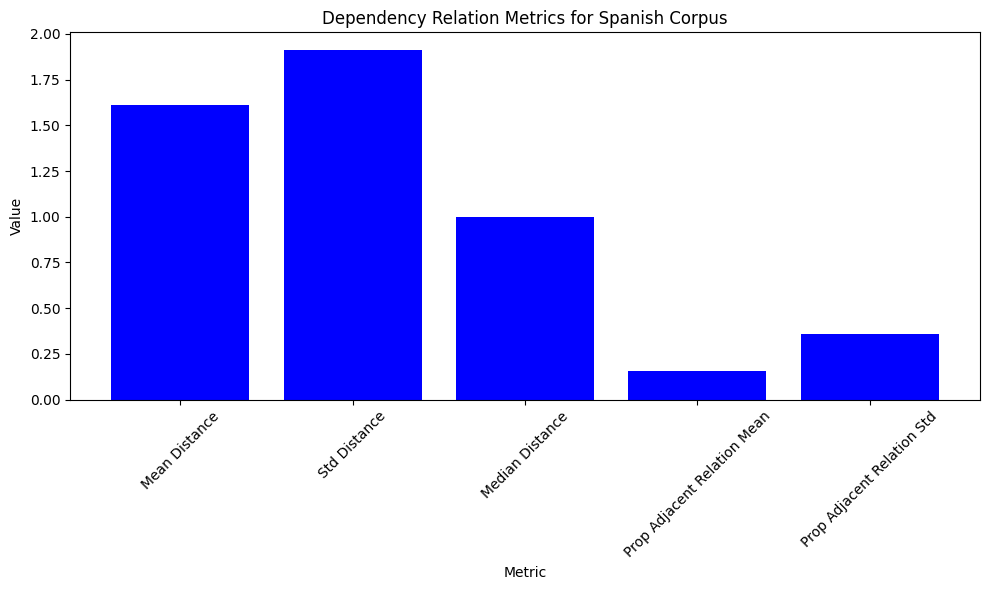

In [ ]:
import spacy
import numpy as np
import matplotlib.pyplot as plt

# Load spaCy model for Spanish
nlp = spacy.load("es_core_news_sm")

# Read Spanish corpus from a file
spanish_corpus_path = "/content/spanish5.txt"

def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

spanish_corpus = read_corpus(spanish_corpus_path)

# Process the Spanish corpus
doc = nlp(spanish_corpus)

# Calculate dependency distances and proportion of adjacent dependency relations
dependency_distances = [abs(token.i - token.head.i) for token in doc]

adjacent_dependency_count = 0
for i in range(len(dependency_distances) - 1):
    if dependency_distances[i] == dependency_distances[i + 1]:
        adjacent_dependency_count += 1

prop_adjacent_dependency_relation_mean = adjacent_dependency_count / (len(dependency_distances) - 1)
prop_adjacent_dependency_relation_std = np.sqrt(prop_adjacent_dependency_relation_mean * (1 - prop_adjacent_dependency_relation_mean))

# Calculate descriptive statistics using numpy
mean_distance = np.mean(dependency_distances)
std_distance = np.std(dependency_distances)
median_distance = np.median(dependency_distances)

# Visualize the calculated metrics
metrics = ["Mean Distance", "Std Distance", "Median Distance", "Prop Adjacent Relation Mean", "Prop Adjacent Relation Std"]
values = [mean_distance, std_distance, median_distance, prop_adjacent_dependency_relation_mean, prop_adjacent_dependency_relation_std]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='blue')  # Customize color as needed
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Dependency Relation Metrics for Spanish Corpus")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


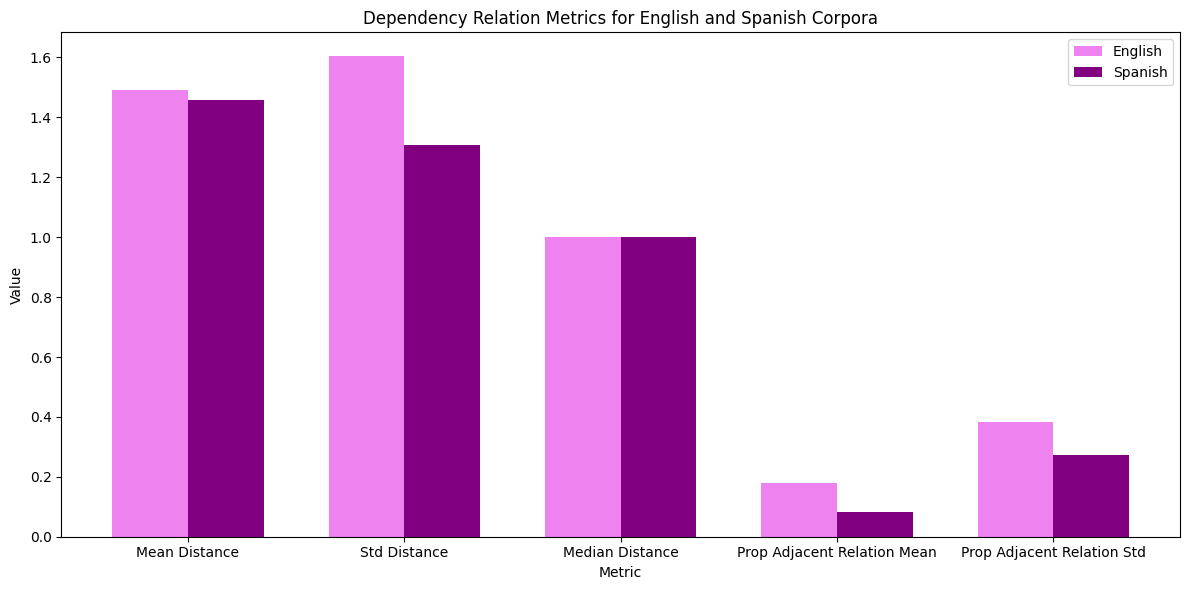

In [ ]:
import spacy
import numpy as np
import matplotlib.pyplot as plt

# Load spaCy models for English and Spanish
nlp_en = spacy.load("en_core_web_sm")
nlp_es = spacy.load("es_core_news_sm")

# Read English corpus from a file
english_corpus_path = "/content/english5.txt"
english_corpus = read_corpus(english_corpus_path)

# Read Spanish corpus from a file
spanish_corpus_path = "/content/spanish5.txt"
spanish_corpus = read_corpus(spanish_corpus_path)

# Process the English and Spanish corpora
doc_en = nlp_en(english_corpus)
doc_es = nlp_es(spanish_corpus)

# Calculate dependency distances and proportion of adjacent dependency relations for English
dependency_distances_en = [abs(token.i - token.head.i) for token in doc_en]
adjacent_dependency_count_en = sum(dependency_distances_en[i] == dependency_distances_en[i + 1] for i in range(len(dependency_distances_en) - 1))
prop_adjacent_dependency_relation_mean_en = adjacent_dependency_count_en / (len(dependency_distances_en) - 1)
prop_adjacent_dependency_relation_std_en = np.sqrt(prop_adjacent_dependency_relation_mean_en * (1 - prop_adjacent_dependency_relation_mean_en))

# Calculate descriptive statistics for English
mean_distance_en = np.mean(dependency_distances_en)
std_distance_en = np.std(dependency_distances_en)
median_distance_en = np.median(dependency_distances_en)

# Calculate dependency distances and proportion of adjacent dependency relations for Spanish
dependency_distances_es = [abs(token.i - token.head.i) for token in doc_es]
adjacent_dependency_count_es = sum(dependency_distances_es[i] == dependency_distances_es[i + 1] for i in range(len(dependency_distances_es) - 1))
prop_adjacent_dependency_relation_mean_es = adjacent_dependency_count_es / (len(dependency_distances_es) - 1)
prop_adjacent_dependency_relation_std_es = np.sqrt(prop_adjacent_dependency_relation_mean_es * (1 - prop_adjacent_dependency_relation_mean_es))

# Calculate descriptive statistics for Spanish
mean_distance_es = np.mean(dependency_distances_es)
std_distance_es = np.std(dependency_distances_es)
median_distance_es = np.median(dependency_distances_es)

# Combine metrics for both languages
metrics = ["Mean Distance", "Std Distance", "Median Distance", "Prop Adjacent Relation Mean", "Prop Adjacent Relation Std"]
values_en = [mean_distance_en, std_distance_en, median_distance_en, prop_adjacent_dependency_relation_mean_en, prop_adjacent_dependency_relation_std_en]
values_es = [mean_distance_es, std_distance_es, median_distance_es, prop_adjacent_dependency_relation_mean_es, prop_adjacent_dependency_relation_std_es]

# Create grouped bar chart
bar_width = 0.35
index = np.arange(len(metrics))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index, values_en, bar_width, label='English', color='violet')
bar2 = plt.bar(index + bar_width, values_es, bar_width, label='Spanish', color='purple')

plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Dependency Relation Metrics for English and Spanish Corpora')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

plt.tight_layout()
plt.show()


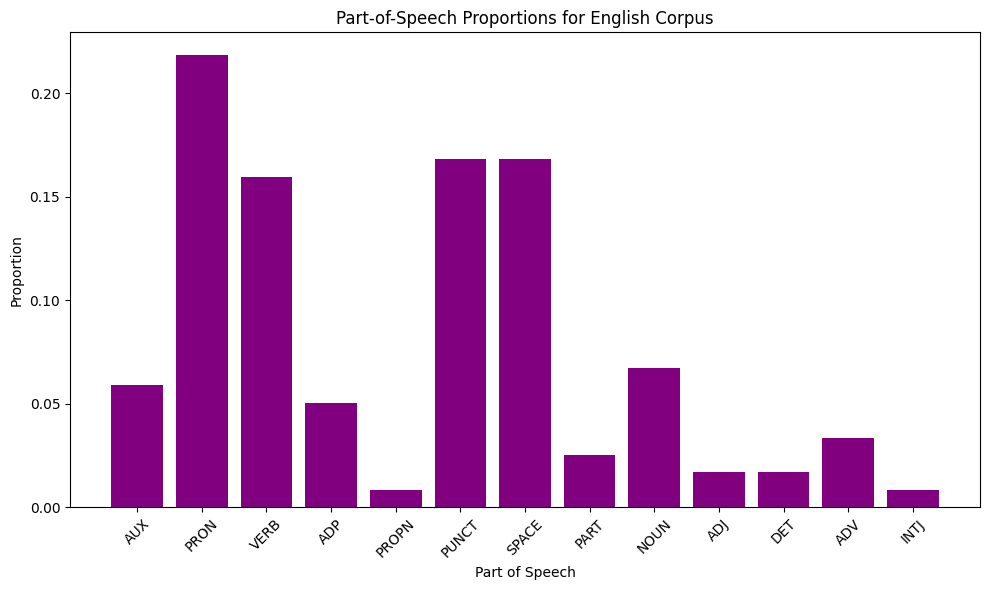

In [ ]:
import spacy
import matplotlib.pyplot as plt

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Read English corpus from a file
english_corpus_path = "/content/english5.txt"

def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

english_corpus = read_corpus(english_corpus_path)

# Process the English corpus
doc = nlp(english_corpus)

# Calculate part-of-speech proportions
pos_counts = {}
total_tokens = len(doc)

for token in doc:
    pos = token.pos_
    pos_counts[pos] = pos_counts.get(pos, 0) + 1

# Calculate proportions
pos_proportions = {pos: count / total_tokens for pos, count in pos_counts.items()}

# Visualize the calculated proportions
plt.figure(figsize=(10, 6))
plt.bar(pos_proportions.keys(), pos_proportions.values(), color='purple')  # Customize color as needed
plt.xlabel("Part of Speech")
plt.ylabel("Proportion")
plt.title("Part-of-Speech Proportions for English Corpus")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


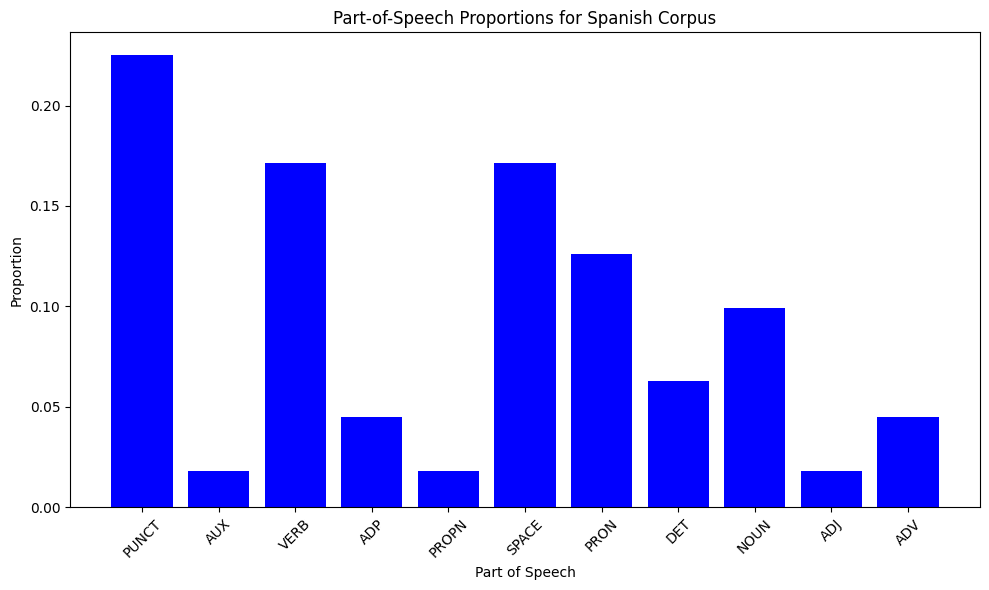

In [ ]:
import spacy
import matplotlib.pyplot as plt

# Load spaCy model for Spanish
nlp = spacy.load("es_core_news_sm")

# Read Spanish corpus from a file
spanish_corpus_path = "/content/spanish5.txt"

def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

spanish_corpus = read_corpus(spanish_corpus_path)

# Process the Spanish corpus
doc = nlp(spanish_corpus)

# Calculate part-of-speech proportions
pos_counts = {}
total_tokens = len(doc)

for token in doc:
    pos = token.pos_
    pos_counts[pos] = pos_counts.get(pos, 0) + 1

# Calculate proportions
pos_proportions = {pos: count / total_tokens for pos, count in pos_counts.items()}

# Visualize the calculated proportions
plt.figure(figsize=(10, 6))
plt.bar(pos_proportions.keys(), pos_proportions.values(), color='blue')  # Customize color as needed
plt.xlabel("Part of Speech")
plt.ylabel("Proportion")
plt.title("Part-of-Speech Proportions for Spanish Corpus")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


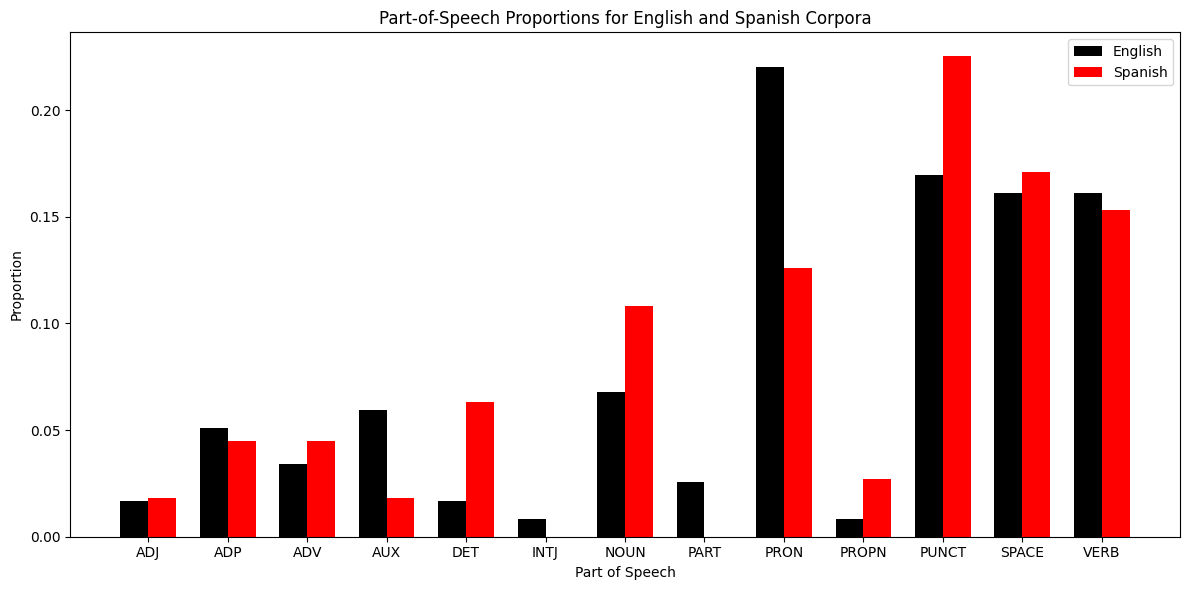

In [ ]:
import spacy
import matplotlib.pyplot as plt

# Load spaCy models
nlp_english = spacy.load("en_core_web_sm")
nlp_spanish = spacy.load("es_core_news_sm")

# Read English corpus from a file
english_corpus_path = "/content/english5.txt"
english_corpus = read_corpus(english_corpus_path)

# Process the English corpus
doc_english = nlp_english(english_corpus)

# Calculate English part-of-speech proportions
pos_counts_english = {}
total_tokens_english = len(doc_english)

for token in doc_english:
    pos = token.pos_
    pos_counts_english[pos] = pos_counts_english.get(pos, 0) + 1

# Read Spanish corpus from a file
spanish_corpus_path = "/content/spanish5.txt"
spanish_corpus = read_corpus(spanish_corpus_path)

# Process the Spanish corpus
doc_spanish = nlp_spanish(spanish_corpus)

# Calculate Spanish part-of-speech proportions
pos_counts_spanish = {}
total_tokens_spanish = len(doc_spanish)

for token in doc_spanish:
    pos = token.pos_
    pos_counts_spanish[pos] = pos_counts_spanish.get(pos, 0) + 1

# Combine all unique parts of speech from both languages
all_pos = set(pos_counts_english.keys()).union(pos_counts_spanish.keys())

# Fill missing parts of speech with 0 counts
for pos in all_pos:
    pos_counts_english.setdefault(pos, 0)
    pos_counts_spanish.setdefault(pos, 0)

# Sort parts of speech for consistent order
sorted_pos = sorted(all_pos)

# Calculate proportions for English and Spanish
pos_proportions_english = {pos: pos_counts_english[pos] / total_tokens_english for pos in sorted_pos}
pos_proportions_spanish = {pos: pos_counts_spanish[pos] / total_tokens_spanish for pos in sorted_pos}

# Visualize the calculated proportions in a grouped bar chart
bar_width = 0.35
index = range(len(sorted_pos))

plt.figure(figsize=(12, 6))

# English bars
plt.bar(index, pos_proportions_english.values(), width=bar_width, color='black', label='English')

# Spanish bars
plt.bar([i + bar_width for i in index], pos_proportions_spanish.values(), width=bar_width, color='red', label='Spanish')

plt.xlabel("Part of Speech")
plt.ylabel("Proportion")
plt.title("Part-of-Speech Proportions for English and Spanish Corpora")
plt.xticks([i + bar_width/2 for i in index], sorted_pos)
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
! pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

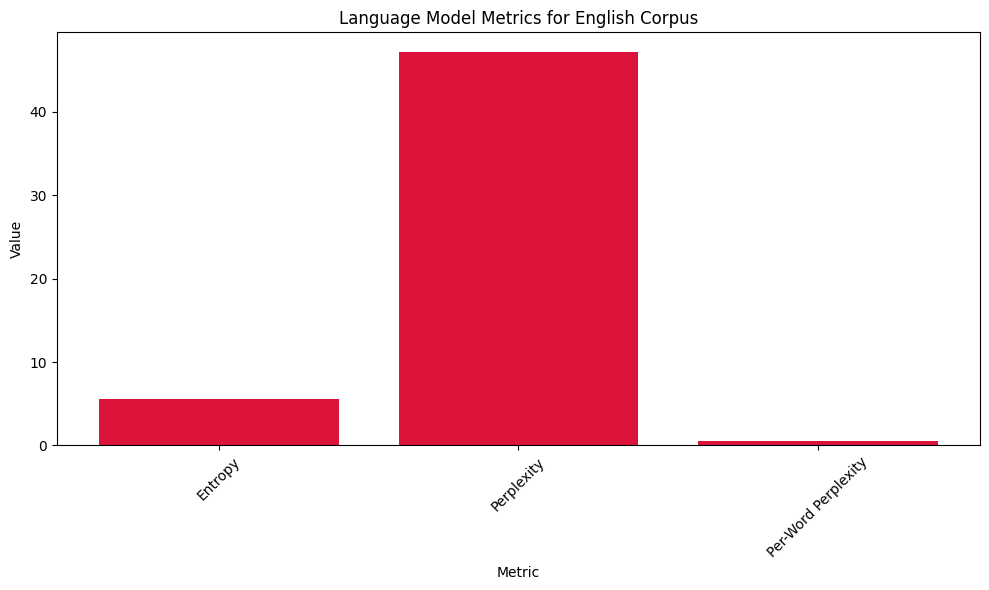

In [ ]:
import nltk
import math
import matplotlib.pyplot as plt
from nltk import FreqDist

# Read English corpus from a file
english_corpus_path = "/content/english5.txt"

def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

english_corpus = read_corpus(english_corpus_path)

# Tokenize the corpus
tokens = nltk.word_tokenize(english_corpus)

# Create frequency distribution
freq_dist = FreqDist(tokens)

# Calculate entropy
total_tokens = len(tokens)
entropy = -sum(freq / total_tokens * math.log(freq / total_tokens, 2) for freq in freq_dist.values())

# Calculate perplexity
perplexity = 2 ** entropy

# Calculate per-word perplexity
per_word_perplexity = perplexity / total_tokens

# Visualize the calculated metrics
metrics = ["Entropy", "Perplexity", "Per-Word Perplexity"]
values = [entropy, perplexity, per_word_perplexity]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='crimson')  # Customize color as needed
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Language Model Metrics for English Corpus")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


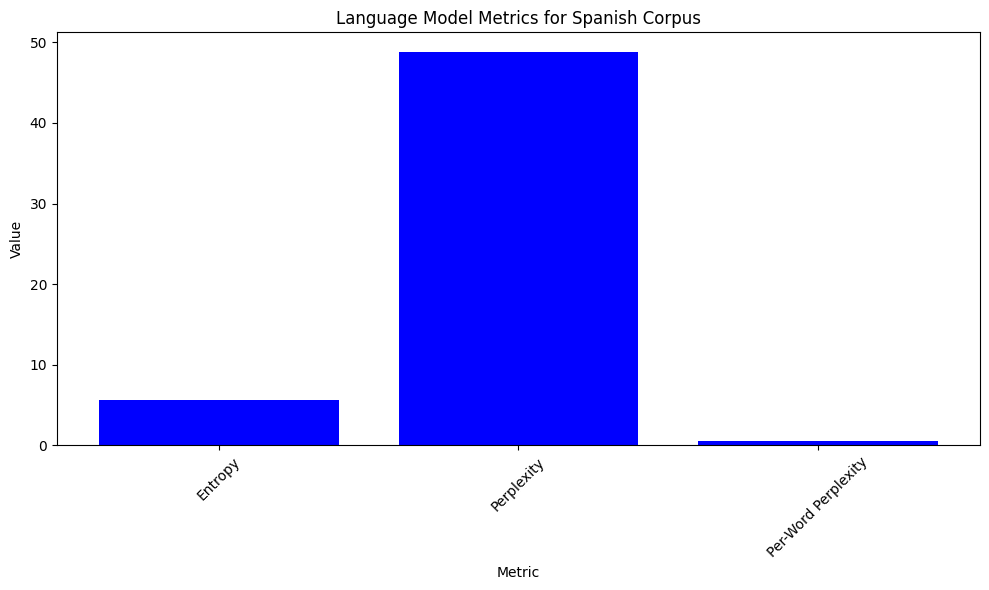

In [ ]:
import nltk
import math
import matplotlib.pyplot as plt
from nltk import FreqDist

# Read Spanish corpus from a file
spanish_corpus_path = "/content/spanish5.txt"

def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

spanish_corpus = read_corpus(spanish_corpus_path)

# Tokenize the corpus
tokens = nltk.word_tokenize(spanish_corpus)

# Create frequency distribution
freq_dist = FreqDist(tokens)

# Calculate entropy
total_tokens = len(tokens)
entropy = -sum(freq / total_tokens * math.log(freq / total_tokens, 2) for freq in freq_dist.values())

# Calculate perplexity
perplexity = 2 ** entropy

# Calculate per-word perplexity
per_word_perplexity = perplexity / total_tokens

# Visualize the calculated metrics
metrics = ["Entropy", "Perplexity", "Per-Word Perplexity"]
values = [entropy, perplexity, per_word_perplexity]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='blue')  # Customize color as needed
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Language Model Metrics for Spanish Corpus")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
  >>> import nltk
  >>> nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

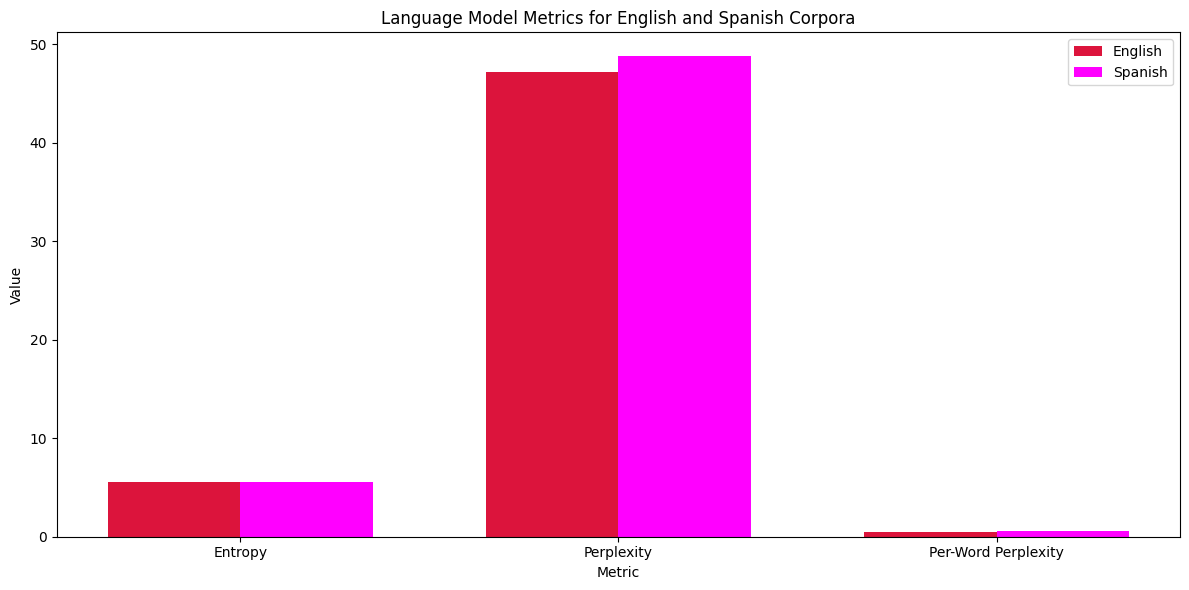

In [ ]:
import nltk
import math
import matplotlib.pyplot as plt
from nltk import FreqDist

# Read English corpus from a file
english_corpus_path = "/content/english5.txt"
english_corpus = read_corpus(english_corpus_path)
english_tokens = nltk.word_tokenize(english_corpus)
english_freq_dist = FreqDist(english_tokens)

# Calculate metrics for English
english_total_tokens = len(english_tokens)
english_entropy = -sum(freq / english_total_tokens * math.log(freq / english_total_tokens, 2) for freq in english_freq_dist.values())
english_perplexity = 2 ** english_entropy
english_per_word_perplexity = english_perplexity / english_total_tokens

# Read Spanish corpus from a file
spanish_corpus_path = "/content/spanish5.txt"
spanish_corpus = read_corpus(spanish_corpus_path)
spanish_tokens = nltk.word_tokenize(spanish_corpus)
spanish_freq_dist = FreqDist(spanish_tokens)

# Calculate metrics for Spanish
spanish_total_tokens = len(spanish_tokens)
spanish_entropy = -sum(freq / spanish_total_tokens * math.log(freq / spanish_total_tokens, 2) for freq in spanish_freq_dist.values())
spanish_perplexity = 2 ** spanish_entropy
spanish_per_word_perplexity = spanish_perplexity / spanish_total_tokens

# Visualize the calculated metrics using a grouped bar chart
metrics = ["Entropy", "Perplexity", "Per-Word Perplexity"]
english_values = [english_entropy, english_perplexity, english_per_word_perplexity]
spanish_values = [spanish_entropy, spanish_perplexity, spanish_per_word_perplexity]

bar_width = 0.35
index = range(len(metrics))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index, english_values, bar_width, label='English', color='crimson')
bar2 = plt.bar([i + bar_width for i in index], spanish_values, bar_width, label='Spanish', color='magenta')

plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Language Model Metrics for English and Spanish Corpora")
plt.xticks([i + bar_width / 2 for i in index], metrics)
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
pip install textdescriptives

In [ ]:
import textdescriptives as td
import matplotlib.pyplot as plt

# Read English corpus from a file
english_corpus_path = "/content/english5.txt"

def read_corpus(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = file.read()
    return corpus

english_corpus = read_corpus(english_corpus_path)

# Process the English corpus
doc = td.TextCorpus(english_corpus)

# Calculate metrics using textdescriptives
metrics = [
    "n_stop_words",
    "alpha_ratio",
    "mean_word_length",
    "doc_length",
    "proportion_ellipsis",
    "proportion_bullet_points",
    "duplicate_line_chr_fraction",
    "duplicate_paragraph_chr_fraction",
    "top_2-gram_chr_fraction",
    "top_3-gram_chr_fraction",
    "top_4-gram_chr_fraction",
    "symbol_#_2_word_ratio",
    "contains_lorem ipsum",
    "passed_quality_check"
]

results = doc.analyze(metrics)

# Visualize the calculated metrics
plt.figure(figsize=(12, 8))
plt.bar(results.keys(), results.values(), color='blue')  # Customize color as needed
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("TextDescriptives Metrics for English Corpus")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


AttributeError: module 'textdescriptives' has no attribute 'TextCorpus'

In [ ]:
import spacy
import textdescriptives as td
import matplotlib.pyplot as plt

# Load English spaCy model
nlp_en = spacy.load("en_core_web_sm")

# Load English text from file
with open("/content/english5.txt", "r", encoding="utf-8") as file:
    english_text = file.read()

# Set quality thresholds for English
thresholds_en = td.QualityThresholds(
    # ... (same as in your original code)
)


quality_pipe = nlp.add_pipe("textdescriptives.quality")
quality_pipe.set_quality_thresholds(thresholds)  # update the quality threshold





# Add quality pipeline to English spaCy model
quality_pipe_en = nlp_en.add_pipe("textdescriptives.quality")
quality_pipe_en.set_quality_thresholds(thresholds_en)

# Process English text
doc_en = nlp_en(english_text)

# Get quality metrics for English
quality_metrics_en = doc_en._.quality
passed_quality_en = doc_en._.passed_quality_check

# Print quality metrics for English
print("English Quality Metrics:", quality_metrics_en)
print("Passed Quality Check (English):", passed_quality_en)

# Load Spanish spaCy model
nlp_es = spacy.load("es_core_news_sm")

# Load Spanish text from file
with open("/content/spanish5.txt", "r", encoding="utf-8") as file:
    spanish_text = file.read()

# Set quality thresholds for Spanish
thresholds_es = td.QualityThresholds(
    # ... (same or different thresholds as needed)
)

# Add quality pipeline to Spanish spaCy model
quality_pipe_es = nlp_es.add_pipe("textdescriptives.quality")
quality_pipe_es.set_quality_thresholds(thresholds_es)

# Process Spanish text
doc_es = nlp_es(spanish_text)

# Get quality metrics for Spanish
quality_metrics_es = doc_es._.quality
passed_quality_es = doc_es._.passed_quality_check

# Print quality metrics for Spanish
print("Spanish Quality Metrics:", quality_metrics_es)
print("Passed Quality Check (Spanish):", passed_quality_es)

# Grouped Bar Chart
# Extract relevant information for the chart
metric_names = list(quality_metrics_en.keys())
values_en = list(quality_metrics_en.values())
values_es = list(quality_metrics_es.values())

# Plot grouped bar chart
bar_width = 0.35
index = range(len(metric_names))

fig, ax = plt.subplots()
bar1 = ax.bar(index, values_en, bar_width, label='English')
bar2 = ax.bar([i + bar_width for i in index], values_es, bar_width, label='Spanish')

# Set labels and title
ax.set_xlabel('Quality Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Quality Metrics between English and Spanish Corpora')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(metric_names)
ax.legend()

# Show the plot
plt.show()


ValueError: [E002] Can't find factory for 'textdescriptives.quality' for language English (en). This usually happens when spaCy calls `nlp.create_pipe` with a custom component name that's not registered on the current language class. If you're using a Transformer, make sure to install 'spacy-transformers'. If you're using a custom component, make sure you've added the decorator `@Language.component` (for function components) or `@Language.factory` (for class components).

Available factories: attribute_ruler, tok2vec, merge_noun_chunks, merge_entities, merge_subtokens, token_splitter, doc_cleaner, parser, beam_parser, lemmatizer, trainable_lemmatizer, entity_linker, entity_ruler, tagger, morphologizer, ner, beam_ner, senter, sentencizer, spancat, spancat_singlelabel, span_finder, future_entity_ruler, span_ruler, textcat, textcat_multilabel, en.lemmatizer

In [ ]:
import spacy
import textdescriptives as td
nlp = spacy.load("en_core_web_sm")

# set thresholds for quality metrics (these are just the default)
thresholds = QualityThresholds(
    n_stop_words=(2, None),   # at least 2 stop words, no upper bound
    alpha_ratio=(0.7, None),
    mean_word_length=(3, 10),  # mean word length between 3 and 10 characters
    doc_length=(10, 100000),
    symbol_to_word_ratio={"#": (None, 0.1)},
    proportion_ellipsis=(None, 0.3),
    proportion_bullet_points=(None, 0.8),
    contains={"lorem ipsum": False},
    duplicate_line_chr_fraction=(None, 0.2),
    duplicate_paragraph_chr_fraction=(None, 0.2),
    duplicate_ngram_chr_fraction={
        "5": (None, 0.15),
        "6": (None, 0.14),
        "7": (None, 0.13),
        "8": (None, 0.12),
        "9": (None, 0.11),
        "10": (None, 0.1),
    },
    top_ngram_chr_fraction={"2": (None, 0.2), "3": (None, 0.18), "4": (None, 0.16)},
    oov_ratio=(None, 0.2)
)


quality_pipe = nlp.add_pipe("textdescriptives.quality")
quality_pipe.set_quality_thresholds(thresholds)  # update the quality thresholds
doc = nlp("The world is changed. I feel it in the water. I feel it in the earth. I smell it in the air. Much that once was is lost, for none now live who remember it.")

# all attributes are stored as a dict in the ._.quality attribute
doc._.quality
# check if the document passed all quality checks
doc._.passed_quality_check

NameError: name 'QualityThresholds' is not defined

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

<ipython-input-3-fee8e6331756>:58: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(data=english_df.melt(), x="variable", y="value", hue="variable", ci=None)
<ipython-input-3-fee8e6331756>:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(data=spanish_df.melt(), x="variable", y="value", hue="variable", ci=None)


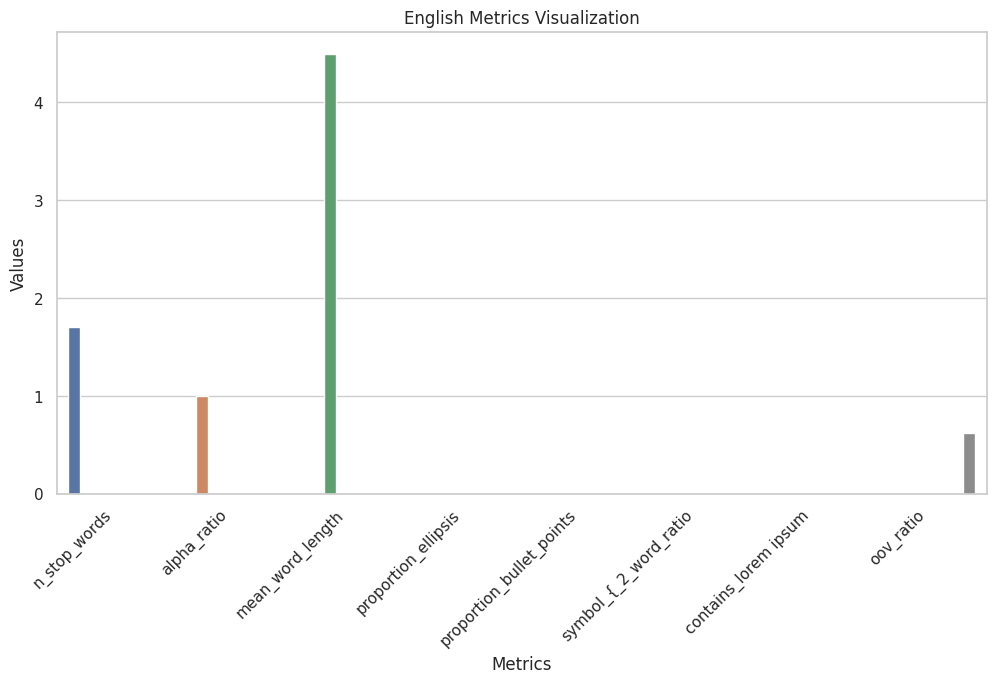

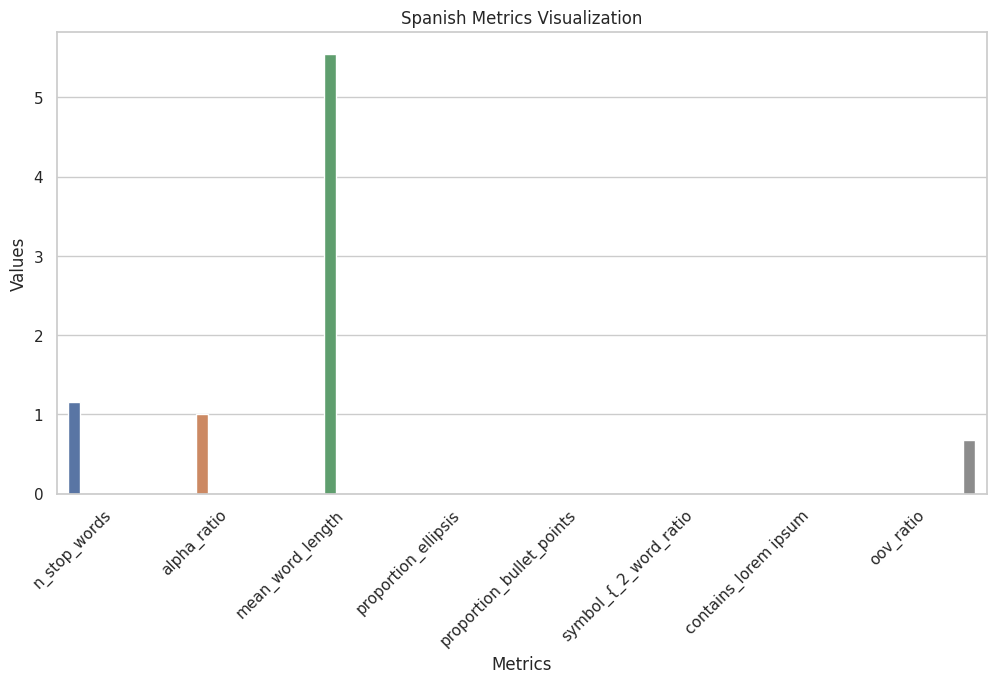

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

# Load English and Spanish stop words
stop_words_english = set(stopwords.words("english"))
stop_words_spanish = set(stopwords.words("spanish"))

# Function to calculate metrics for a given sentence
def calculate_metrics(sentence, symbol="{", string="lorem ipsum"):
    words = sentence.split()

    n_stop_words = sum(word.lower() in stop_words_english or word.lower() in stop_words_spanish for word in words)
    alpha_ratio = sum(any(c.isalpha() for c in word) for word in words) / len(words)
    mean_word_length = sum(len(word) for word in words) / len(words)
    proportion_ellipsis = sentence.strip().endswith("...")
    proportion_bullet_points = sentence.strip().startswith("-")
    symbol_to_word_ratio = sum(1 for char in sentence if char == symbol) / len(words)
    contains_string = string.lower() in sentence.lower()
    oov_ratio = sum(word.lower() not in stop_words_english and word.lower() not in stop_words_spanish for word in words) / len(words)

    return {
        "n_stop_words": n_stop_words,
        "alpha_ratio": alpha_ratio,
        "mean_word_length": mean_word_length,
        "proportion_ellipsis": proportion_ellipsis,
        "proportion_bullet_points": proportion_bullet_points,
        f"symbol_{symbol}_2_word_ratio": symbol_to_word_ratio,
        f"contains_{string}": contains_string,
        "oov_ratio": oov_ratio,
    }

# Read English and Spanish corpora from files
with open("/content/english5.txt", "r", encoding="utf-8") as file:
    english_corpus = file.readlines()

with open("/content/spanish5.txt", "r", encoding="utf-8") as file:
    spanish_corpus = file.readlines()

# Calculate metrics for each sentence in English corpus
english_metrics_list = [calculate_metrics(sentence) for sentence in english_corpus]

# Create a DataFrame from the English metrics
english_df = pd.DataFrame(english_metrics_list)

# Calculate metrics for each sentence in Spanish corpus
spanish_metrics_list = [calculate_metrics(sentence) for sentence in spanish_corpus]

# Create a DataFrame from the Spanish metrics
spanish_df = pd.DataFrame(spanish_metrics_list)

# Visualize metrics using grouped bar charts
sns.set(style="whitegrid")

# Plot English metrics
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(data=english_df.melt(), x="variable", y="value", hue="variable", ci=None)
ax1.set(xlabel="Metrics", ylabel="Values", title="English Metrics Visualization")
ax1.legend_.remove()
plt.xticks(rotation=45, ha="right")

# Plot Spanish metrics
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(data=spanish_df.melt(), x="variable", y="value", hue="variable", ci=None)
ax2.set(xlabel="Metrics", ylabel="Values", title="Spanish Metrics Visualization")
ax2.legend_.remove()
plt.xticks(rotation=45, ha="right")

# Display the charts
plt.show()


<ipython-input-4-0337befebfe7>:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df.melt(), x="variable", y="value", hue="variable", ci=None, col="level_0", col_wrap=2)


AttributeError: Rectangle.set() got an unexpected keyword argument 'col'

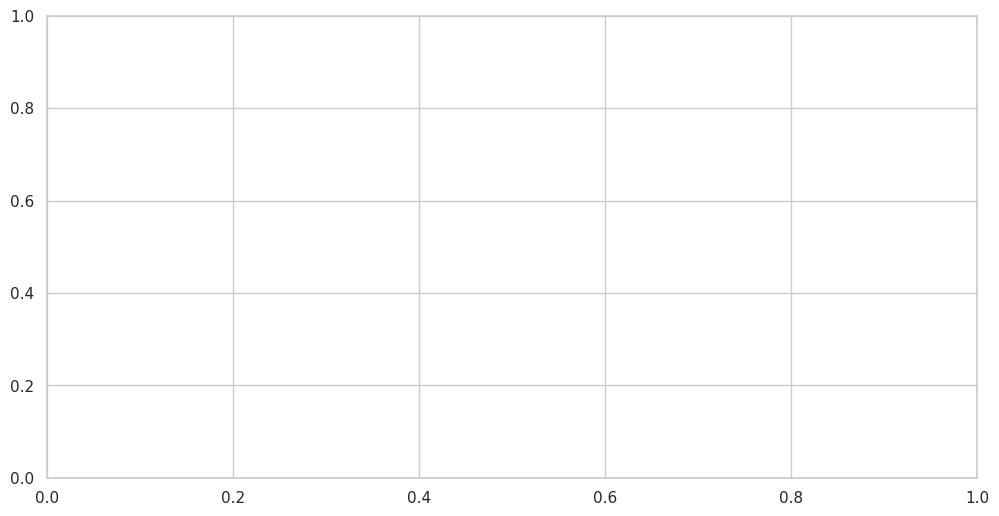

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

# Load English and Spanish stop words
stop_words_english = set(stopwords.words("english"))
stop_words_spanish = set(stopwords.words("spanish"))

# Function to calculate metrics for a given sentence
def calculate_metrics(sentence, symbol="{", string="lorem ipsum"):
    words = sentence.split()

    n_stop_words = sum(word.lower() in stop_words_english or word.lower() in stop_words_spanish for word in words)
    alpha_ratio = sum(any(c.isalpha() for c in word) for word in words) / len(words)
    mean_word_length = sum(len(word) for word in words) / len(words)
    proportion_ellipsis = sentence.strip().endswith("...")
    proportion_bullet_points = sentence.strip().startswith("-")
    symbol_to_word_ratio = sum(1 for char in sentence if char == symbol) / len(words)
    contains_string = string.lower() in sentence.lower()
    oov_ratio = sum(word.lower() not in stop_words_english and word.lower() not in stop_words_spanish for word in words) / len(words)

    return {
        "n_stop_words": n_stop_words,
        "alpha_ratio": alpha_ratio,
        "mean_word_length": mean_word_length,
        "proportion_ellipsis": proportion_ellipsis,
        "proportion_bullet_points": proportion_bullet_points,
        f"symbol_{symbol}_2_word_ratio": symbol_to_word_ratio,
        f"contains_{string}": contains_string,
        "oov_ratio": oov_ratio,
    }

# Example sentences
english_corpus = ["/content/english5.txt"]

spanish_corpus = ["/content/spanish5.txt"]

# Calculate metrics for each sentence in English and Spanish corpora
english_metrics_list = [calculate_metrics(sentence) for sentence in english_corpus]
spanish_metrics_list = [calculate_metrics(sentence) for sentence in spanish_corpus]

# Create DataFrames
english_df = pd.DataFrame(english_metrics_list)
spanish_df = pd.DataFrame(spanish_metrics_list)

# Combine DataFrames
df = pd.concat([english_df, spanish_df], keys=["English", "Spanish"])

# Visualize metrics using a grouped bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df.melt(), x="variable", y="value", hue="variable", ci=None, col="level_0", col_wrap=2)

# Customize the chart
ax.set(xlabel="Metrics", ylabel="Values", title="Metrics Visualization")
ax.legend_.remove()  # Remove the default legend to avoid overlap
plt.xticks(rotation=45, ha="right")

# Display the chart
plt.show()


<ipython-input-5-bf13a0d11e39>:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df.melt(), x="variable", y="value", hue="variable", ci=None)


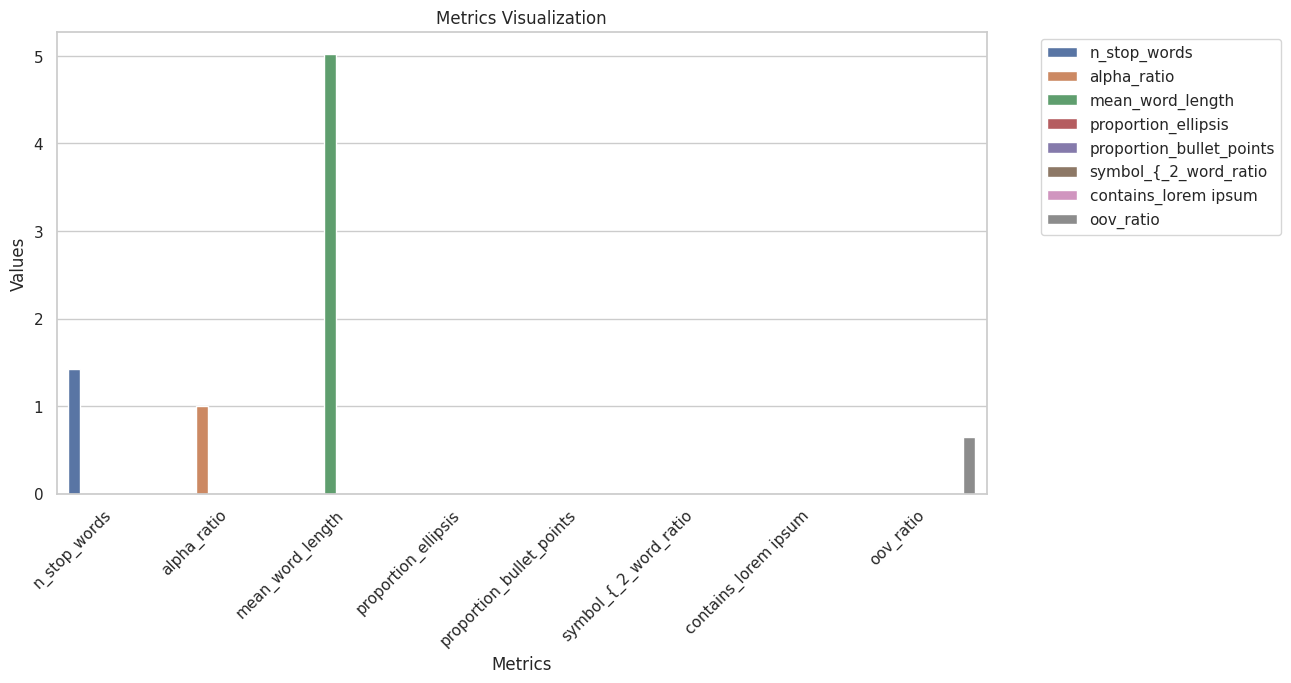

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

# Load English and Spanish stop words
stop_words_english = set(stopwords.words("english"))
stop_words_spanish = set(stopwords.words("spanish"))

# Function to calculate metrics for a given sentence
def calculate_metrics(sentence, symbol="{", string="lorem ipsum"):
    words = sentence.split()

    n_stop_words = sum(word.lower() in stop_words_english or word.lower() in stop_words_spanish for word in words)
    alpha_ratio = sum(any(c.isalpha() for c in word) for word in words) / len(words)
    mean_word_length = sum(len(word) for word in words) / len(words)
    proportion_ellipsis = sentence.strip().endswith("...")
    proportion_bullet_points = sentence.strip().startswith("-")
    symbol_to_word_ratio = sum(1 for char in sentence if char == symbol) / len(words)
    contains_string = string.lower() in sentence.lower()
    oov_ratio = sum(word.lower() not in stop_words_english and word.lower() not in stop_words_spanish for word in words) / len(words)

    return {
        "n_stop_words": n_stop_words,
        "alpha_ratio": alpha_ratio,
        "mean_word_length": mean_word_length,
        "proportion_ellipsis": proportion_ellipsis,
        "proportion_bullet_points": proportion_bullet_points,
        f"symbol_{symbol}_2_word_ratio": symbol_to_word_ratio,
        f"contains_{string}": contains_string,
        "oov_ratio": oov_ratio,
    }

# Read English and Spanish corpora from files
with open("/content/english5.txt", "r", encoding="utf-8") as file:
    english_corpus = file.readlines()

with open("/content/spanish5.txt", "r", encoding="utf-8") as file:
    spanish_corpus = file.readlines()

# Calculate metrics for each sentence in English and Spanish corpora
english_metrics_list = [calculate_metrics(sentence) for sentence in english_corpus]
spanish_metrics_list = [calculate_metrics(sentence) for sentence in spanish_corpus]

# Create DataFrames
english_df = pd.DataFrame(english_metrics_list)
spanish_df = pd.DataFrame(spanish_metrics_list)

# Combine DataFrames
df = pd.concat([english_df, spanish_df], keys=["English", "Spanish"])

# Visualize metrics using a grouped bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df.melt(), x="variable", y="value", hue="variable", ci=None)

# Customize the chart
ax.set(xlabel="Metrics", ylabel="Values", title="Metrics Visualization")
plt.xticks(rotation=45, ha="right")

# Display the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the chart
plt.show()


<ipython-input-6-42b1c86d840d>:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df.melt(id_vars=["Language"]), x="variable", y="value", hue="Language", ci=None)


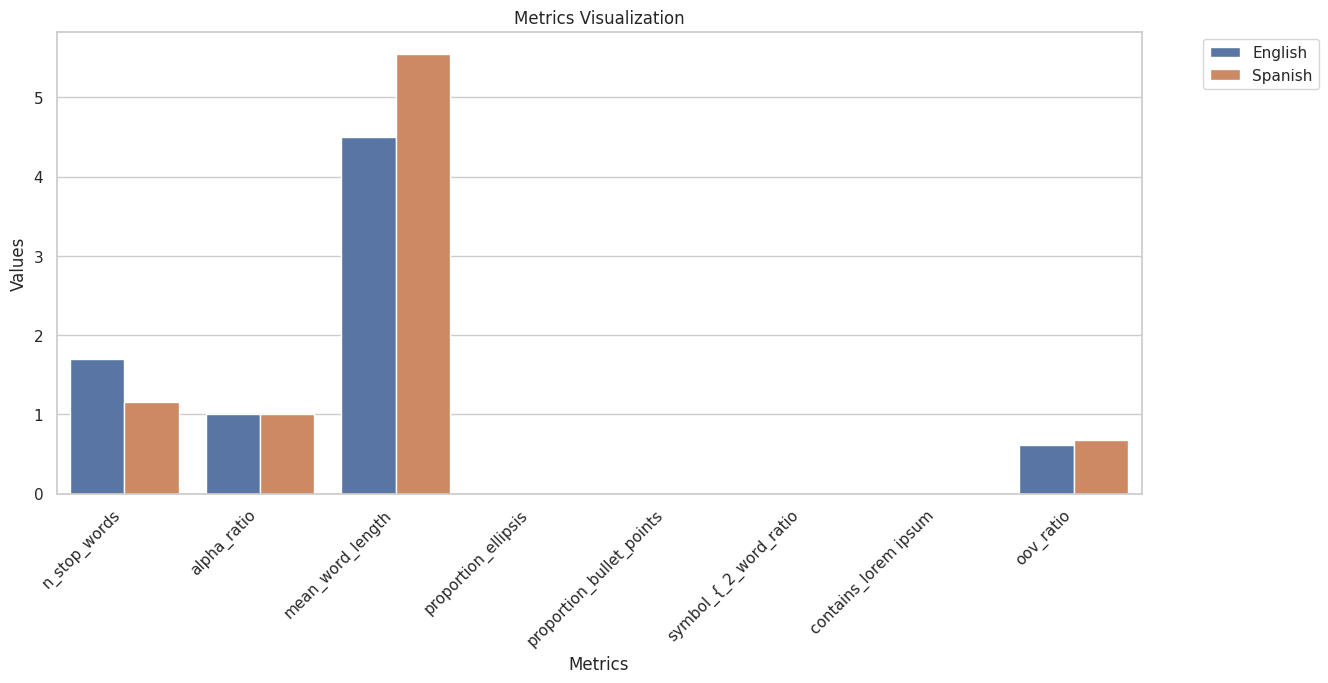

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

# Load English and Spanish stop words
stop_words_english = set(stopwords.words("english"))
stop_words_spanish = set(stopwords.words("spanish"))

# Function to calculate metrics for a given sentence
def calculate_metrics(sentence, symbol="{", string="lorem ipsum"):
    words = sentence.split()

    n_stop_words = sum(word.lower() in stop_words_english or word.lower() in stop_words_spanish for word in words)
    alpha_ratio = sum(any(c.isalpha() for c in word) for word in words) / len(words)
    mean_word_length = sum(len(word) for word in words) / len(words)
    proportion_ellipsis = sentence.strip().endswith("...")
    proportion_bullet_points = sentence.strip().startswith("-")
    symbol_to_word_ratio = sum(1 for char in sentence if char == symbol) / len(words)
    contains_string = string.lower() in sentence.lower()
    oov_ratio = sum(word.lower() not in stop_words_english and word.lower() not in stop_words_spanish for word in words) / len(words)

    return {
        "n_stop_words": n_stop_words,
        "alpha_ratio": alpha_ratio,
        "mean_word_length": mean_word_length,
        "proportion_ellipsis": proportion_ellipsis,
        "proportion_bullet_points": proportion_bullet_points,
        f"symbol_{symbol}_2_word_ratio": symbol_to_word_ratio,
        f"contains_{string}": contains_string,
        "oov_ratio": oov_ratio,
    }

# Read English and Spanish corpora from files
with open("/content/english5.txt", "r", encoding="utf-8") as file:
    english_corpus = file.readlines()

with open("/content/spanish5.txt", "r", encoding="utf-8") as file:
    spanish_corpus = file.readlines()

# Calculate metrics for each sentence in English and Spanish corpora
english_metrics_list = [calculate_metrics(sentence) for sentence in english_corpus]
spanish_metrics_list = [calculate_metrics(sentence) for sentence in spanish_corpus]

# Create DataFrames
english_df = pd.DataFrame(english_metrics_list)
spanish_df = pd.DataFrame(spanish_metrics_list)

# Add language column to distinguish between English and Spanish
english_df["Language"] = "English"
spanish_df["Language"] = "Spanish"

# Combine DataFrames
df = pd.concat([english_df, spanish_df])

# Visualize metrics using a grouped bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df.melt(id_vars=["Language"]), x="variable", y="value", hue="Language", ci=None)

# Customize the chart
ax.set(xlabel="Metrics", ylabel="Values", title="Metrics Visualization")
plt.xticks(rotation=45, ha="right")

# Display the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the chart
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

# Load English and Spanish stop words
stop_words_english = set(stopwords.words("english"))
stop_words_spanish = set(stopwords.words("spanish"))

# Function to calculate metrics for a given text
def calculate_metrics(text, lang):
    duplicate_lines_chr_fraction_value = duplicate_lines_chr_fraction(text)
    duplicate_paragraphs_chr_fraction_value = duplicate_paragraphs_chr_fraction(text)
    duplicate_ngram_chr_fraction_value = duplicate_ngram_chr_fraction(text, n=3)
    top_ngram_chr_fraction_value = top_ngram_chr_fraction(text, n=3, top_k=5)

    return {
        "Language": lang,
        "Duplicate Lines Character Fraction": duplicate_lines_chr_fraction_value,
        "Duplicate Paragraphs Character Fraction": duplicate_paragraphs_chr_fraction_value,
        "Duplicate 3-gram Character Fraction": duplicate_ngram_chr_fraction_value,
        "Top 3-gram Character Fraction": top_ngram_chr_fraction_value,
    }

# Read English and Spanish corpora from files
with open("english_corpus.txt", "r", encoding="utf-8") as file:
    english_corpus = file.read()

with open("spanish_corpus.txt", "r", encoding="utf-8") as file:
    spanish_corpus = file.read()

# Calculate metrics for each corpus
english_metrics = calculate_metrics(english_corpus, "English")
spanish_metrics = calculate_metrics(spanish_corpus, "Spanish")

# Create a DataFrame
df = pd.DataFrame([english_metrics, spanish_metrics])

# Visualize metrics using a grouped bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot grouped bar chart
ax = sns.barplot(data=df.melt(id_vars=["Language"]), x="variable", y="value", hue="Language", ci=None)

# Customize the chart
ax.set(xlabel="Metrics", ylabel="Values", title="Metrics Visualization")
plt.xticks(rotation=45, ha="right")

# Display the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels without overlapping
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the chart
plt.show()


In [ ]:
pip install "en_core_web_sm"
pip install "es_core_news_sm"


SyntaxError: invalid syntax (<ipython-input-18-b0b649d2974c>, line 1)

In [ ]:
import spacy
from spacy import displacy

def visualize_dependency_parse(file_path, language_model, output_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    nlp = spacy.load(language_model)
    doc = nlp(text)

    # Use displacy.serve to generate the visualization and save it as an image
    #displacy.serve(doc, style='dep', options={'distance': 100}, page=True, manual=True, save=True, out=output_path)

# File paths for English and Spanish corpora
english_corpus_path = '/content/english5.txt'
spanish_corpus_path = '/content/spanish5.txt'

# Output paths for saving the visualizations as images
output_path_english = '/content/english_dependency_parse.png'
output_path_spanish = '/content/spanish_dependency_parse.png'

# Visualize English dependency parsing arc path and save the image
visualize_dependency_parse(english_corpus_path, 'en_core_web_sm', output_path_english)

# Visualize Spanish dependency parsing arc path and save the image
visualize_dependency_parse(spanish_corpus_path, 'es_core_news_sm', output_path_spanish)


OSError: [E050] Can't find model 'es_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
import spacy
from spacy import displacy

def visualize_dependency_parse(file_path, language_model, output_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    nlp = spacy.load(language_model)
    doc = nlp(text)

    # Use displacy.render to generate and save the visualization as an image
    displacy.render(doc, style='dep', options={'distance': 100}, page=True)

    # Save the visualization as an image
    displacy.render(doc, style='dep', options={'distance': 100}, page=True, manual=True)
    displacy.render(doc, style='dep', options={'distance': 100}, manual=True, page=True).save(output_path)

# File paths for English and Spanish corpora
english_corpus_path = '/content/english5.txt'
spanish_corpus_path = '/content/spanish5.txt'

# Output paths for saving the visualizations as images
output_path_english = '/content/english_dependency_parse.png'
output_path_spanish = '/content/spanish_dependency_parse.png'

# Visualize English dependency parsing arc path and save the image
visualize_dependency_parse(english_corpus_path, 'en_core_web_sm', output_path_english)

# Visualize Spanish dependency parsing arc path and save the image
visualize_dependency_parse(spanish_corpus_path, 'es_core_news_sm', output_path_spanish)


AttributeError: 'spacy.tokens.doc.Doc' object has no attribute 'get'

In [ ]:
pip install textdescriptives


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.3/254.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.9 MB/s eta 0:00:00
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41929 sha256=ab48f29a8da1c4bc63a7d2dc973c8914bcb9ce28a61004c600dc4fbe30364f62
  Stored in directory: /root/.cache/pip/wheels/92/8e/16/c1e4d4d65685d71085e4e27b44d6ed880b0559474c9ee4ff66
Successfully built ftfy


In [ ]:
  >>> import nltk
  >>> nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

<ipython-input-15-5f4e345b911a>:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df.melt(id_vars=["Language"]), x="variable", y="value", hue="Language", ci=None)


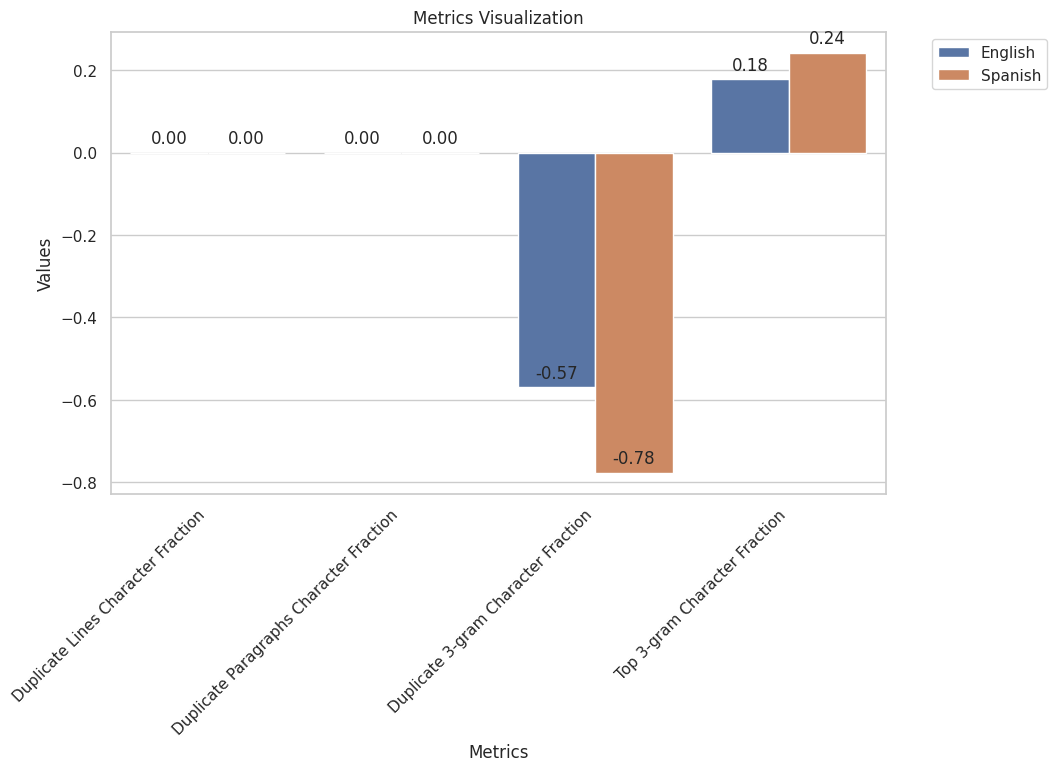

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
from nltk import ngrams  # Modified import statement
from collections import Counter

# Download NLTK resources (uncomment the following line if not already downloaded)
# nltk.download('stopwords')

# Load English and Spanish stop words
stop_words_english = set(stopwords.words("english"))
stop_words_spanish = set(stopwords.words("spanish"))

# Function to calculate duplicate lines character fraction
def duplicate_lines_chr_fraction(text):
    lines = text.split('\n')
    total_chars = sum(len(line) for line in lines)
    unique_lines = set(lines)
    duplicate_chars = total_chars - sum(len(line) for line in unique_lines)
    return duplicate_chars / total_chars if total_chars > 0 else 0

# Function to calculate duplicate paragraphs character fraction
def duplicate_paragraphs_chr_fraction(text):
    paragraphs = text.split('\n\n')
    total_chars = sum(len(para) for para in paragraphs)
    unique_paragraphs = set(paragraphs)
    duplicate_chars = total_chars - sum(len(para) for para in unique_paragraphs)
    return duplicate_chars / total_chars if total_chars > 0 else 0

# Function to calculate duplicate n-gram character fraction
def duplicate_ngram_chr_fraction(text, n):
    words = [word.lower() for word in nltk.word_tokenize(text) if word.isalnum() and word.lower() not in stop_words_english and word.lower() not in stop_words_spanish]
    ngrams_list = list(ngrams(words, n))
    total_chars = len(text)
    unique_ngrams = set(ngrams_list)
    duplicate_chars = total_chars - sum(len(' '.join(ngram)) for ngram in unique_ngrams)
    return duplicate_chars / total_chars if total_chars > 0 else 0

# Function to calculate top n-gram character fraction
def top_ngram_chr_fraction(text, n, top_k):
    words = [word.lower() for word in nltk.word_tokenize(text) if word.isalnum() and word.lower() not in stop_words_english and word.lower() not in stop_words_spanish]
    ngrams_list = list(ngrams(words, n))
    ngram_counts = Counter(ngrams_list)
    top_ngrams = ngram_counts.most_common(top_k)
    total_chars = len(text)
    duplicate_chars = sum(len(' '.join(ngram)) * count for ngram, count in top_ngrams)
    return duplicate_chars / total_chars if total_chars > 0 else 0

# Function to calculate metrics for a given text
def calculate_metrics(text, lang):
    duplicate_lines_chr_fraction_value = duplicate_lines_chr_fraction(text)
    duplicate_paragraphs_chr_fraction_value = duplicate_paragraphs_chr_fraction(text)
    duplicate_ngram_chr_fraction_value = duplicate_ngram_chr_fraction(text, n=3)
    top_ngram_chr_fraction_value = top_ngram_chr_fraction(text, n=3, top_k=5)

    return {
        "Language": lang,
        "Duplicate Lines Character Fraction": duplicate_lines_chr_fraction_value,
        "Duplicate Paragraphs Character Fraction": duplicate_paragraphs_chr_fraction_value,
        "Duplicate 3-gram Character Fraction": duplicate_ngram_chr_fraction_value,
        "Top 3-gram Character Fraction": top_ngram_chr_fraction_value,
    }

# Read English and Spanish corpora from files
with open("/content/english5.txt", "r", encoding="utf-8") as file:
    english_corpus = file.read()

with open("/content/spanish5.txt", "r", encoding="utf-8") as file:
    spanish_corpus = file.read()

# Calculate metrics for each corpus
english_metrics = calculate_metrics(english_corpus, "English")
spanish_metrics = calculate_metrics(spanish_corpus, "Spanish")

# Create a DataFrame
df = pd.DataFrame([english_metrics, spanish_metrics])

# Visualize metrics using a grouped bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot grouped bar chart
ax = sns.barplot(data=df.melt(id_vars=["Language"]), x="variable", y="value", hue="Language", ci=None)

# Customize the chart
ax.set(xlabel="Metrics", ylabel="Values", title="Metrics Visualization")
plt.xticks(rotation=45, ha="right")

# Display the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels without overlapping
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the chart
plt.show()


<ipython-input-16-547e9a2501fb>:88: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df.melt(id_vars=["Language"]), x="variable", y="value", hue="Language", ci=None, palette=colors.values())


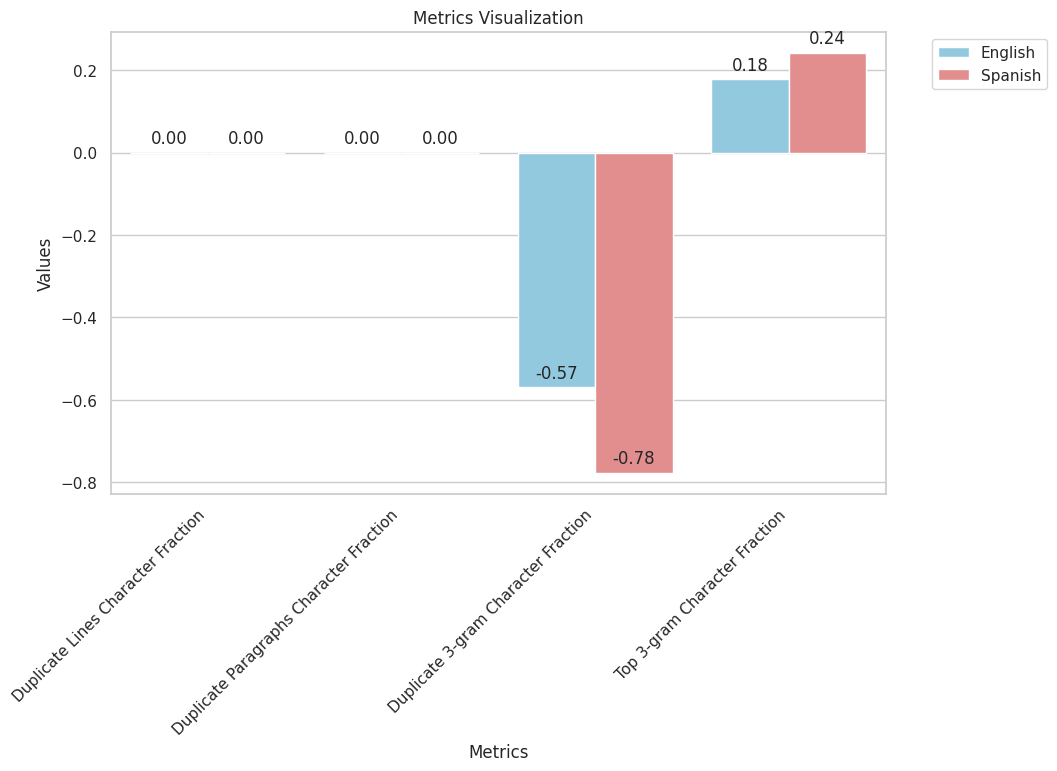

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
from nltk import ngrams
from collections import Counter

# Download NLTK resources (uncomment the following line if not already downloaded)
# nltk.download('stopwords')

# Load English and Spanish stop words
stop_words_english = set(stopwords.words("english"))
stop_words_spanish = set(stopwords.words("spanish"))

# Function to calculate duplicate lines character fraction
def duplicate_lines_chr_fraction(text):
    lines = text.split('\n')
    total_chars = sum(len(line) for line in lines)
    unique_lines = set(lines)
    duplicate_chars = total_chars - sum(len(line) for line in unique_lines)
    return duplicate_chars / total_chars if total_chars > 0 else 0

# Function to calculate duplicate paragraphs character fraction
def duplicate_paragraphs_chr_fraction(text):
    paragraphs = text.split('\n\n')
    total_chars = sum(len(para) for para in paragraphs)
    unique_paragraphs = set(paragraphs)
    duplicate_chars = total_chars - sum(len(para) for para in unique_paragraphs)
    return duplicate_chars / total_chars if total_chars > 0 else 0

# Function to calculate duplicate n-gram character fraction
def duplicate_ngram_chr_fraction(text, n):
    words = [word.lower() for word in nltk.word_tokenize(text) if word.isalnum() and word.lower() not in stop_words_english and word.lower() not in stop_words_spanish]
    ngrams_list = list(ngrams(words, n))
    total_chars = len(text)
    unique_ngrams = set(ngrams_list)
    duplicate_chars = total_chars - sum(len(' '.join(ngram)) for ngram in unique_ngrams)
    return duplicate_chars / total_chars if total_chars > 0 else 0

# Function to calculate top n-gram character fraction
def top_ngram_chr_fraction(text, n, top_k):
    words = [word.lower() for word in nltk.word_tokenize(text) if word.isalnum() and word.lower() not in stop_words_english and word.lower() not in stop_words_spanish]
    ngrams_list = list(ngrams(words, n))
    ngram_counts = Counter(ngrams_list)
    top_ngrams = ngram_counts.most_common(top_k)
    total_chars = len(text)
    duplicate_chars = sum(len(' '.join(ngram)) * count for ngram, count in top_ngrams)
    return duplicate_chars / total_chars if total_chars > 0 else 0

# Function to calculate metrics for a given text
def calculate_metrics(text, lang):
    duplicate_lines_chr_fraction_value = duplicate_lines_chr_fraction(text)
    duplicate_paragraphs_chr_fraction_value = duplicate_paragraphs_chr_fraction(text)
    duplicate_ngram_chr_fraction_value = duplicate_ngram_chr_fraction(text, n=3)
    top_ngram_chr_fraction_value = top_ngram_chr_fraction(text, n=3, top_k=5)

    return {
        "Language": lang,
        "Duplicate Lines Character Fraction": duplicate_lines_chr_fraction_value,
        "Duplicate Paragraphs Character Fraction": duplicate_paragraphs_chr_fraction_value,
        "Duplicate 3-gram Character Fraction": duplicate_ngram_chr_fraction_value,
        "Top 3-gram Character Fraction": top_ngram_chr_fraction_value,
    }

# Read English and Spanish corpora from files
with open("/content/english5.txt", "r", encoding="utf-8") as file:
    english_corpus = file.read()

with open("/content/spanish5.txt", "r", encoding="utf-8") as file:
    spanish_corpus = file.read()

# Calculate metrics for each corpus
english_metrics = calculate_metrics(english_corpus, "English")
spanish_metrics = calculate_metrics(spanish_corpus, "Spanish")

# Create a DataFrame
df = pd.DataFrame([english_metrics, spanish_metrics])

# Define custom colors for each language
colors = {"English": "skyblue", "Spanish": "lightcoral"}

# Visualize metrics using a grouped bar chart with custom colors
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot grouped bar chart with custom colors
ax = sns.barplot(data=df.melt(id_vars=["Language"]), x="variable", y="value", hue="Language", ci=None, palette=colors.values())

# Customize the chart
ax.set(xlabel="Metrics", ylabel="Values", title="Metrics Visualization")
plt.xticks(rotation=45, ha="right")

# Display the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels without overlapping
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the chart
plt.show()


# **EVALUATION METRICS**

In [ ]:
pip install jiwer matplotlib


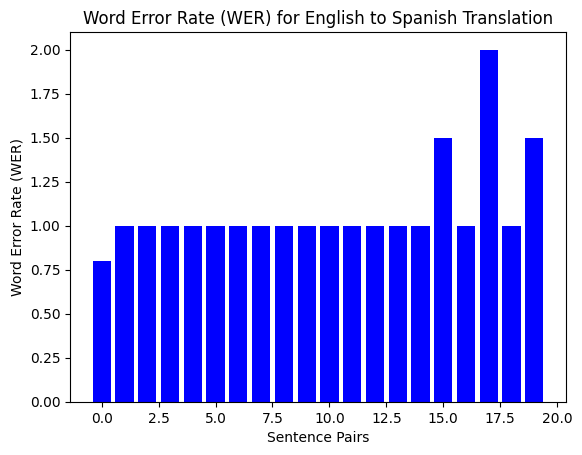

In [ ]:
import jiwer
import matplotlib.pyplot as plt

def calculate_wer(reference, hypothesis):
    return jiwer.wer(reference, hypothesis)

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read().strip().split('\n')

def visualize_wer(english_file, spanish_file):
    # Read English and Spanish sentences from files
    english_sentences = read_file(english_file)
    spanish_sentences = read_file(spanish_file)

    # Calculate WER for each sentence pair
    wer_scores = [calculate_wer(english, spanish) for english, spanish in zip(english_sentences, spanish_sentences)]

    # Plotting the bar chart
    plt.bar(range(len(wer_scores)), wer_scores, color='blue')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('Word Error Rate (WER)')
    plt.title('Word Error Rate (WER) for English to Spanish Translation')
    plt.show()

if __name__ == "__main__":
    # Replace 'english_file.txt' and 'spanish_file.txt' with your file paths
    english_file_path = 'english5.txt'
    spanish_file_path = 'spanish5.txt'

    visualize_wer(english_file_path, spanish_file_path)


In [ ]:
## end sem nov 20 2023

end sem nov 20 **2023**

In [ ]:
pip install python-Levenshtein


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.3 MB/s eta 0:00:00


In [ ]:
import Levenshtein

def calculate_wer(reference, candidate):
    reference_words = reference.split()
    candidate_words = candidate.split()

    distance = Levenshtein.distance(reference_words, candidate_words)
    wer = distance / len(reference_words) * 100

    return wer

def calculate_ter(reference, candidate):
    reference_words = reference.split()
    candidate_words = candidate.split()

    # Count substitutions, deletions, and insertions
    substitutions = Levenshtein.distance(reference_words, candidate_words)
    deletions = len(reference_words) - substitutions
    insertions = len(candidate_words) - substitutions

    ter = (substitutions + deletions + insertions) / len(reference_words) * 100

    return ter

def evaluate_corpus(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        total_wer = 0
        total_ter = 0

        for ref, can in zip(references, candidates):
            wer = calculate_wer(ref, can)
            ter = calculate_ter(ref, can)

            total_wer += wer
            total_ter += ter

            print(f"Reference: {ref.strip()}")
            print(f"Candidate: {can.strip()}")
            print(f"WER: {wer:.2f}%")
            print(f"TER: {ter:.2f}%\n")

        avg_wer = total_wer / len(references)
        avg_ter = total_ter / len(references)

        print(f"Average WER: {avg_wer:.2f}%")
        print(f"Average TER: {avg_ter:.2f}%")

# Replace 'en' and 'spanish' with your file names
evaluate_corpus('english5.txt', 'spanish5.txt')


Reference: Can we talk to Tom?
Candidate: ¿Podemos hablar con Tom?
WER: 80.00%
TER: 100.00%

Reference: Do you want to touch it?
Candidate: ¿Quiere usted tocarlo?
WER: 100.00%
TER: 50.00%

Reference: Will you sell your car to me?
Candidate: ¿Me venderás tu coche?
WER: 100.00%
TER: 57.14%

Reference: Her story is true.
Candidate: Su historia es cierta.
WER: 100.00%
TER: 100.00%

Reference: I forgot to buy bread.
Candidate: Me olvidé de comprar pan.
WER: 100.00%
TER: 100.00%

Reference: Are there movies on the plane?
Candidate: ¿Dan películas en el avión?
WER: 100.00%
TER: 83.33%

Reference: Everyone hesitated.
Candidate: Todos vacilaron.
WER: 100.00%
TER: 100.00%

Reference: I got up early.
Candidate: Me levanté temprano.
WER: 100.00%
TER: 75.00%

Reference: They know us.
Candidate: Ellos nos conocen.
WER: 100.00%
TER: 100.00%

Reference: Always tell the truth.
Candidate: Di siempre la verdad.
WER: 100.00%
TER: 100.00%

Reference: That goes for you too!
Candidate: ¡Eso también va para t

Reference: Can we talk to Tom?
Candidate: ¿Podemos hablar con Tom?
WER: 80.00%
TER: 100.00%

Reference: Do you want to touch it?
Candidate: ¿Quiere usted tocarlo?
WER: 100.00%
TER: 50.00%

Reference: Will you sell your car to me?
Candidate: ¿Me venderás tu coche?
WER: 100.00%
TER: 57.14%

Reference: Her story is true.
Candidate: Su historia es cierta.
WER: 100.00%
TER: 100.00%

Reference: I forgot to buy bread.
Candidate: Me olvidé de comprar pan.
WER: 100.00%
TER: 100.00%

Reference: Are there movies on the plane?
Candidate: ¿Dan películas en el avión?
WER: 100.00%
TER: 83.33%

Reference: Everyone hesitated.
Candidate: Todos vacilaron.
WER: 100.00%
TER: 100.00%

Reference: I got up early.
Candidate: Me levanté temprano.
WER: 100.00%
TER: 75.00%

Reference: They know us.
Candidate: Ellos nos conocen.
WER: 100.00%
TER: 100.00%

Reference: Always tell the truth.
Candidate: Di siempre la verdad.
WER: 100.00%
TER: 100.00%

Reference: That goes for you too!
Candidate: ¡Eso también va para t

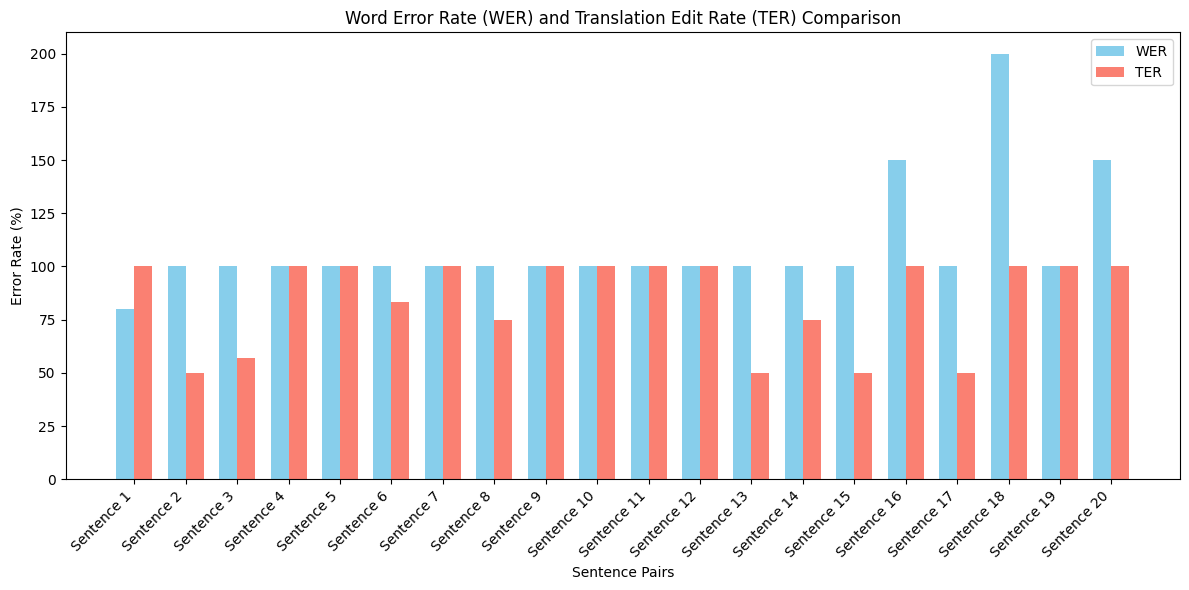

In [ ]:
import Levenshtein
import matplotlib.pyplot as plt
import numpy as np

def calculate_wer(reference, candidate):
    reference_words = reference.split()
    candidate_words = candidate.split()

    distance = Levenshtein.distance(reference_words, candidate_words)
    wer = distance / len(reference_words) * 100

    return wer

def calculate_ter(reference, candidate):
    reference_words = reference.split()
    candidate_words = candidate.split()

    substitutions = Levenshtein.distance(reference_words, candidate_words)
    deletions = len(reference_words) - substitutions
    insertions = len(candidate_words) - substitutions

    ter = (substitutions + deletions + insertions) / len(reference_words) * 100

    return ter

def evaluate_corpus(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        wer_scores = []
        ter_scores = []

        for ref, can in zip(references, candidates):
            wer = calculate_wer(ref, can)
            ter = calculate_ter(ref, can)

            wer_scores.append(wer)
            ter_scores.append(ter)

            print(f"Reference: {ref.strip()}")
            print(f"Candidate: {can.strip()}")
            print(f"WER: {wer:.2f}%")
            print(f"TER: {ter:.2f}%\n")

        avg_wer = sum(wer_scores) / len(references)
        avg_ter = sum(ter_scores) / len(references)

        print(f"Average WER: {avg_wer:.2f}%")
        print(f"Average TER: {avg_ter:.2f}%")

        # Grouped Bar Chart with custom colors, width, larger figure, and rotated X-axis labels
        labels = [f'Sentence {i+1}' for i in range(len(references))]
        width = 0.35
        x = np.arange(len(labels))

        fig, ax = plt.subplots(figsize=(12, 6))
        bar1 = ax.bar(x - width/2, wer_scores, width, label='WER', color='skyblue')
        bar2 = ax.bar(x + width/2, ter_scores, width, label='TER', color='salmon')

        ax.set_xlabel('Sentence Pairs')
        ax.set_ylabel('Error Rate (%)')
        ax.set_title('Word Error Rate (WER) and Translation Edit Rate (TER) Comparison')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=45, ha='right')  # Rotate X-axis labels
        ax.legend()

        plt.tight_layout()  # Ensure labels are not cut off
        plt.show()

# Replace 'english5.txt' and 'spanish5.txt' with your file names
evaluate_corpus('english5.txt', 'spanish5.txt')


Reference: Can we talk to Tom?
Candidate: ¿Podemos hablar con Tom?
WER: 80.00%
TER: 100.00%

Reference: Do you want to touch it?
Candidate: ¿Quiere usted tocarlo?
WER: 100.00%
TER: 50.00%

Reference: Will you sell your car to me?
Candidate: ¿Me venderás tu coche?
WER: 100.00%
TER: 57.14%

Reference: Her story is true.
Candidate: Su historia es cierta.
WER: 100.00%
TER: 100.00%

Reference: I forgot to buy bread.
Candidate: Me olvidé de comprar pan.
WER: 100.00%
TER: 100.00%

Reference: Are there movies on the plane?
Candidate: ¿Dan películas en el avión?
WER: 100.00%
TER: 83.33%

Reference: Everyone hesitated.
Candidate: Todos vacilaron.
WER: 100.00%
TER: 100.00%

Reference: I got up early.
Candidate: Me levanté temprano.
WER: 100.00%
TER: 75.00%

Reference: They know us.
Candidate: Ellos nos conocen.
WER: 100.00%
TER: 100.00%

Reference: Always tell the truth.
Candidate: Di siempre la verdad.
WER: 100.00%
TER: 100.00%

Reference: That goes for you too!
Candidate: ¡Eso también va para t

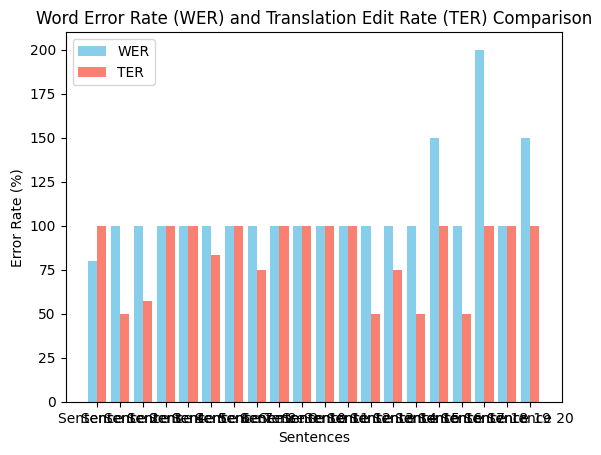

In [ ]:
import Levenshtein
import matplotlib.pyplot as plt
import numpy as np

def calculate_wer(reference, candidate):
    reference_words = reference.split()
    candidate_words = candidate.split()

    distance = Levenshtein.distance(reference_words, candidate_words)
    wer = distance / len(reference_words) * 100

    return wer

def calculate_ter(reference, candidate):
    reference_words = reference.split()
    candidate_words = candidate.split()

    substitutions = Levenshtein.distance(reference_words, candidate_words)
    deletions = len(reference_words) - substitutions
    insertions = len(candidate_words) - substitutions

    ter = (substitutions + deletions + insertions) / len(reference_words) * 100

    return ter

def evaluate_corpus(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        wer_scores = []
        ter_scores = []

        for ref, can in zip(references, candidates):
            wer = calculate_wer(ref, can)
            ter = calculate_ter(ref, can)

            wer_scores.append(wer)
            ter_scores.append(ter)

            print(f"Reference: {ref.strip()}")
            print(f"Candidate: {can.strip()}")
            print(f"WER: {wer:.2f}%")
            print(f"TER: {ter:.2f}%\n")

        avg_wer = sum(wer_scores) / len(references)
        avg_ter = sum(ter_scores) / len(references)

        print(f"Average WER: {avg_wer:.2f}%")
        print(f"Average TER: {avg_ter:.2f}%")

        # Grouped Bar Chart with custom colors and width
        labels = [f'Sentence {i+1}' for i in range(len(references))]
        width = 0.4
        x = np.arange(len(labels))

        fig, ax = plt.subplots()
        bar1 = ax.bar(x - width/2, wer_scores, width, label='WER', color='skyblue')
        bar2 = ax.bar(x + width/2, ter_scores, width, label='TER', color='salmon')

        ax.set_xlabel('Sentences')
        ax.set_ylabel('Error Rate (%)')
        ax.set_title('Word Error Rate (WER) and Translation Edit Rate (TER) Comparison')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()

        plt.show()

# Replace 'english5.txt' and 'spanish5.txt' with your file names
evaluate_corpus('english5.txt', 'spanish5.txt')


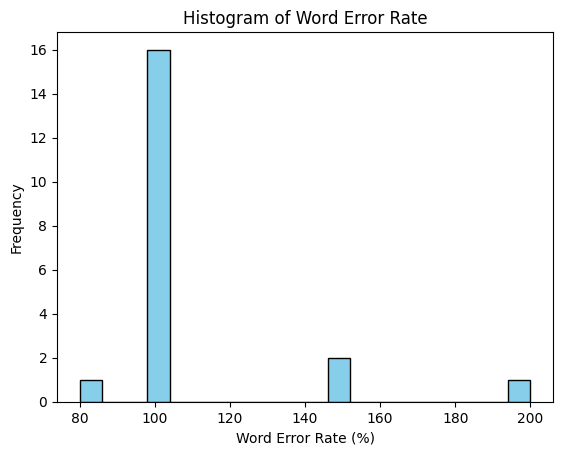

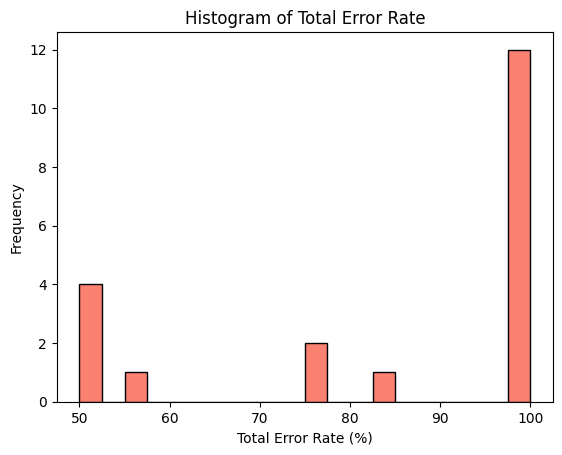

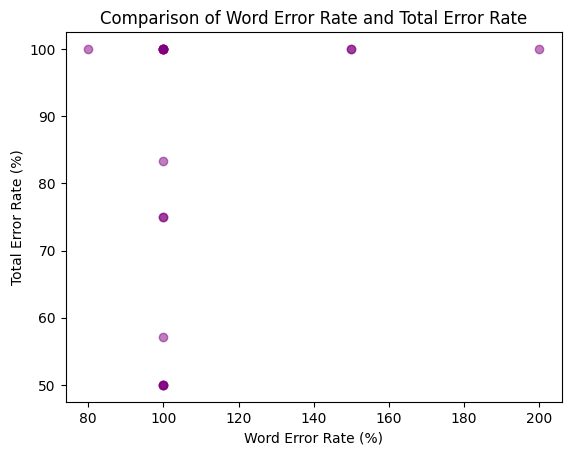

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import Levenshtein

def calculate_wer(reference, candidate):
    reference_words = reference.split()
    candidate_words = candidate.split()

    distance = Levenshtein.distance(reference_words, candidate_words)
    wer = distance / len(reference_words) * 100

    return wer

def calculate_ter(reference, candidate):
    reference_words = reference.split()
    candidate_words = candidate.split()

    # Count substitutions, deletions, and insertions
    substitutions = Levenshtein.distance(reference_words, candidate_words)
    deletions = len(reference_words) - substitutions
    insertions = len(candidate_words) - substitutions

    ter = (substitutions + deletions + insertions) / len(reference_words) * 100

    return ter

def evaluate_corpus(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        wer_values = []
        ter_values = []

        for ref, can in zip(references, candidates):
            wer = calculate_wer(ref, can)
            ter = calculate_ter(ref, can)

            wer_values.append(wer)
            ter_values.append(ter)

            # You can print or store the individual WER and TER values here if needed
            # print(f"WER: {wer:.2f}%, TER: {ter:.2f}%")

        return wer_values, ter_values

def plot_wer_histogram(wer_values):
    plt.hist(wer_values, bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of Word Error Rate')
    plt.xlabel('Word Error Rate (%)')
    plt.ylabel('Frequency')
    plt.show()

def plot_ter_histogram(ter_values):
    plt.hist(ter_values, bins=20, color='salmon', edgecolor='black')
    plt.title('Histogram of Total Error Rate')
    plt.xlabel('Total Error Rate (%)')
    plt.ylabel('Frequency')
    plt.show()

def plot_wer_ter_comparison(wer_values, ter_values):
    plt.scatter(wer_values, ter_values, color='purple', alpha=0.5)
    plt.title('Comparison of Word Error Rate and Total Error Rate')
    plt.xlabel('Word Error Rate (%)')
    plt.ylabel('Total Error Rate (%)')
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

wer_values, ter_values = evaluate_corpus(english_file, spanish_file)

# Plot histograms
plot_wer_histogram(wer_values)
plot_ter_histogram(ter_values)

# Plot comparison between WER and TER
plot_wer_ter_comparison(wer_values, ter_values)


In [ ]:
  >>> import nltk
  >>> nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
pip install nltk

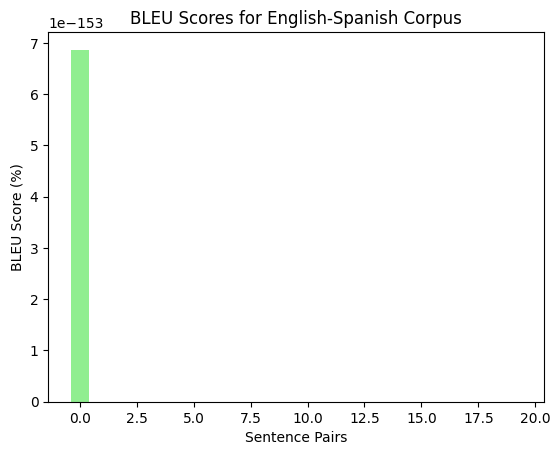

In [ ]:
import matplotlib.pyplot as plt
import nltk

# Download NLTK data (run this once)
# nltk.download('punkt')

def calculate_bleu(reference, candidate):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    # Calculate BLEU score with 4-grams (you can adjust n-gram order if needed)
    bleu_score = nltk.translate.bleu_score.sentence_bleu([reference_tokens], candidate_tokens, weights=(0.25, 0.25, 0.25, 0.25))

    return bleu_score * 100  # Convert to percentage

def evaluate_corpus(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        bleu_scores = []

        for ref, can in zip(references, candidates):
            bleu = calculate_bleu(ref, can)
            bleu_scores.append(bleu)

        return bleu_scores

def plot_bleu_scores(bleu_scores):
    plt.bar(range(len(bleu_scores)), bleu_scores, color='lightgreen')
    plt.title('BLEU Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('BLEU Score (%)')
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

bleu_scores = evaluate_corpus(english_file, spanish_file)

# Plot BLEU scores
plot_bleu_scores(bleu_scores)


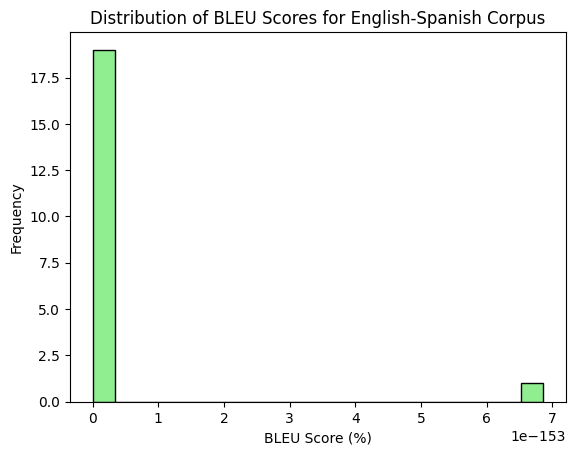

In [ ]:
import matplotlib.pyplot as plt
import nltk

# Download NLTK data (run this once)
# nltk.download('punkt')

def calculate_bleu(reference, candidate):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    # Calculate BLEU score with 4-grams (you can adjust n-gram order if needed)
    bleu_score = nltk.translate.bleu_score.sentence_bleu([reference_tokens], candidate_tokens, weights=(0.25, 0.25, 0.25, 0.25))

    return bleu_score * 100  # Convert to percentage

def evaluate_corpus(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        bleu_scores = []

        for ref, can in zip(references, candidates):
            bleu = calculate_bleu(ref, can)
            bleu_scores.append(bleu)

        return bleu_scores

def plot_bleu_distribution(bleu_scores):
    plt.hist(bleu_scores, bins=20, color='lightgreen', edgecolor='black')
    plt.title('Distribution of BLEU Scores for English-Spanish Corpus')
    plt.xlabel('BLEU Score (%)')
    plt.ylabel('Frequency')
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

bleu_scores = evaluate_corpus(english_file, spanish_file)

# Plot BLEU distribution
plot_bleu_distribution(bleu_scores)


## **Defining bleu score of n grams ranging from n = 1 to 4**

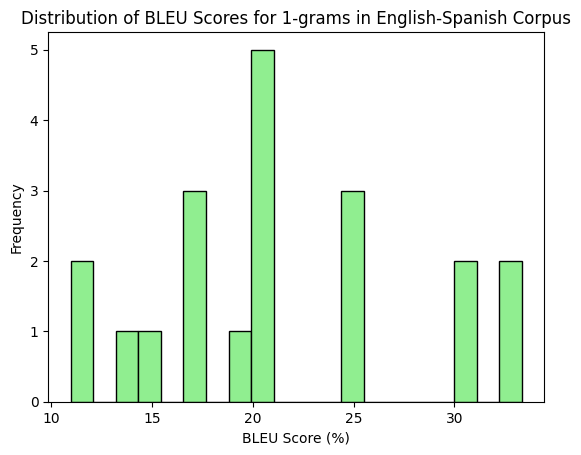

In [ ]:
import matplotlib.pyplot as plt
import nltk

# Download NLTK data (run this once)
# nltk.download('punkt')

def calculate_bleu_ngram(reference, candidate, n):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    reference_ngrams = list(nltk.ngrams(reference_tokens, n))
    candidate_ngrams = list(nltk.ngrams(candidate_tokens, n))

    # Calculate BLEU score for the specified n-gram
    bleu_score = nltk.translate.bleu_score.sentence_bleu([reference_ngrams], candidate_ngrams, weights=(1/n,) * n)

    return bleu_score * 100  # Convert to percentage

def evaluate_corpus_ngram(reference_file, candidate_file, n):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        bleu_scores = []

        for ref, can in zip(references, candidates):
            bleu = calculate_bleu_ngram(ref, can, n)
            bleu_scores.append(bleu)

        return bleu_scores

def plot_bleu_distribution_ngram(bleu_scores, n):
    plt.hist(bleu_scores, bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of BLEU Scores for {n}-grams in English-Spanish Corpus')
    plt.xlabel('BLEU Score (%)')
    plt.ylabel('Frequency')
    plt.show()

# Example usage for bigrams (2-grams):
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'
n = 1

bleu_scores_bigram = evaluate_corpus_ngram(english_file, spanish_file, n)

# Plot BLEU distribution for bigrams
plot_bleu_distribution_ngram(bleu_scores_bigram, n)


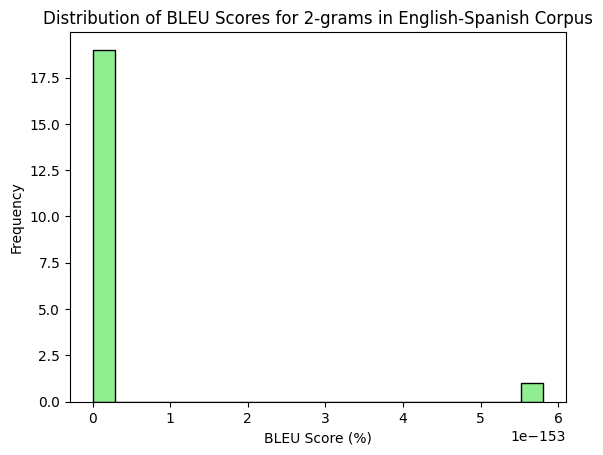

In [ ]:
import matplotlib.pyplot as plt
import nltk

# Download NLTK data (run this once)
# nltk.download('punkt')

def calculate_bleu_ngram(reference, candidate, n):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    reference_ngrams = list(nltk.ngrams(reference_tokens, n))
    candidate_ngrams = list(nltk.ngrams(candidate_tokens, n))

    # Calculate BLEU score for the specified n-gram
    bleu_score = nltk.translate.bleu_score.sentence_bleu([reference_ngrams], candidate_ngrams, weights=(1/n,) * n)

    return bleu_score * 100  # Convert to percentage

def evaluate_corpus_ngram(reference_file, candidate_file, n):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        bleu_scores = []

        for ref, can in zip(references, candidates):
            bleu = calculate_bleu_ngram(ref, can, n)
            bleu_scores.append(bleu)

        return bleu_scores

def plot_bleu_distribution_ngram(bleu_scores, n):
    plt.hist(bleu_scores, bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of BLEU Scores for {n}-grams in English-Spanish Corpus')
    plt.xlabel('BLEU Score (%)')
    plt.ylabel('Frequency')
    plt.show()

# Example usage for bigrams (2-grams):
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'
n = 2

bleu_scores_bigram = evaluate_corpus_ngram(english_file, spanish_file, n)

# Plot BLEU distribution for bigrams
plot_bleu_distribution_ngram(bleu_scores_bigram, n)


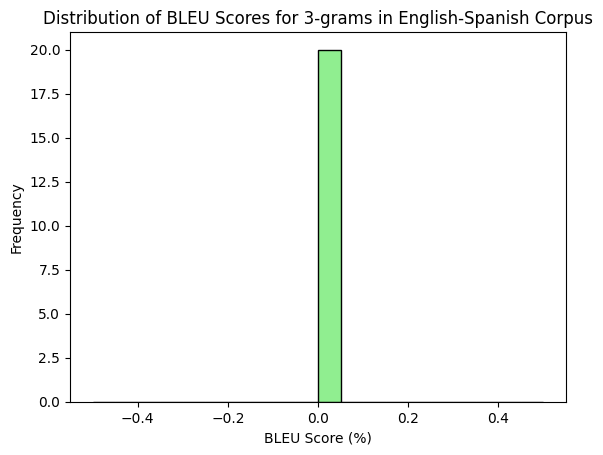

In [ ]:
import matplotlib.pyplot as plt
import nltk

# Download NLTK data (run this once)
# nltk.download('punkt')

def calculate_bleu_ngram(reference, candidate, n):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    reference_ngrams = list(nltk.ngrams(reference_tokens, n))
    candidate_ngrams = list(nltk.ngrams(candidate_tokens, n))

    # Calculate BLEU score for the specified n-gram
    bleu_score = nltk.translate.bleu_score.sentence_bleu([reference_ngrams], candidate_ngrams, weights=(1/n,) * n)

    return bleu_score * 100  # Convert to percentage

def evaluate_corpus_ngram(reference_file, candidate_file, n):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        bleu_scores = []

        for ref, can in zip(references, candidates):
            bleu = calculate_bleu_ngram(ref, can, n)
            bleu_scores.append(bleu)

        return bleu_scores

def plot_bleu_distribution_ngram(bleu_scores, n):
    plt.hist(bleu_scores, bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of BLEU Scores for {n}-grams in English-Spanish Corpus')
    plt.xlabel('BLEU Score (%)')
    plt.ylabel('Frequency')
    plt.show()

# Example usage for bigrams (2-grams):
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'
n = 3

bleu_scores_bigram = evaluate_corpus_ngram(english_file, spanish_file, n)

# Plot BLEU distribution for bigrams
plot_bleu_distribution_ngram(bleu_scores_bigram, n)


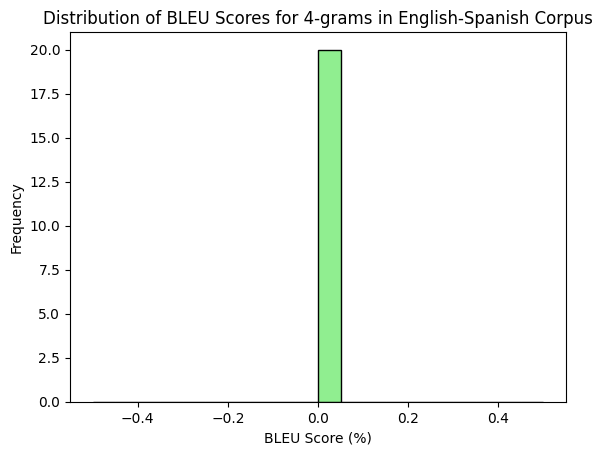

In [ ]:
import matplotlib.pyplot as plt
import nltk

# Download NLTK data (run this once)
# nltk.download('punkt')

def calculate_bleu_ngram(reference, candidate, n):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    reference_ngrams = list(nltk.ngrams(reference_tokens, n))
    candidate_ngrams = list(nltk.ngrams(candidate_tokens, n))

    # Calculate BLEU score for the specified n-gram
    bleu_score = nltk.translate.bleu_score.sentence_bleu([reference_ngrams], candidate_ngrams, weights=(1/n,) * n)

    return bleu_score * 100  # Convert to percentage

def evaluate_corpus_ngram(reference_file, candidate_file, n):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        bleu_scores = []

        for ref, can in zip(references, candidates):
            bleu = calculate_bleu_ngram(ref, can, n)
            bleu_scores.append(bleu)

        return bleu_scores

def plot_bleu_distribution_ngram(bleu_scores, n):
    plt.hist(bleu_scores, bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of BLEU Scores for {n}-grams in English-Spanish Corpus')
    plt.xlabel('BLEU Score (%)')
    plt.ylabel('Frequency')
    plt.show()

# Example usage for bigrams (2-grams):
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'
n = 4

bleu_scores_bigram = evaluate_corpus_ngram(english_file, spanish_file, n)

# Plot BLEU distribution for bigrams
plot_bleu_distribution_ngram(bleu_scores_bigram, n)


# **METEOR score**

In [ ]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

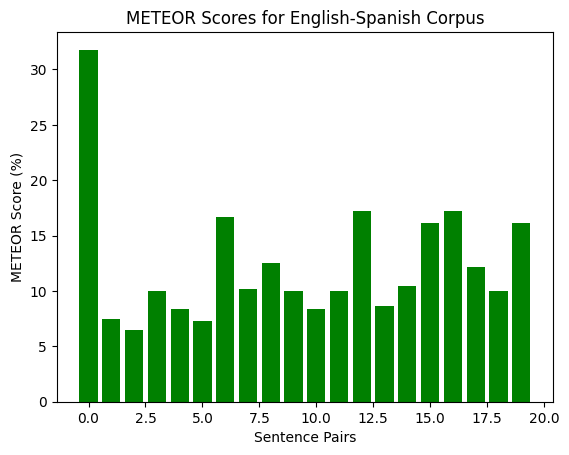

In [ ]:
import nltk
import matplotlib.pyplot as plt

 #Download the METEOR data (run this once)


def pre_tokenize(sentence):
    return nltk.word_tokenize(sentence.lower())

def calculate_meteor(reference, candidate):
    reference_tokens = pre_tokenize(reference)
    candidate_tokens = pre_tokenize(candidate)

    meteor_score = nltk.translate.meteor([reference_tokens], candidate_tokens)
    return meteor_score * 100  # Convert to percentage

def evaluate_corpus(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        meteor_scores = []

        for ref, can in zip(references, candidates):
            meteor = calculate_meteor(ref, can)
            meteor_scores.append(meteor)

        return meteor_scores

def plot_meteor_scores(meteor_scores):
    plt.bar(range(len(meteor_scores)), meteor_scores, color='green')
    plt.title('METEOR Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('METEOR Score (%)')
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

meteor_scores = evaluate_corpus(english_file, spanish_file)

# Plot METEOR scores
plot_meteor_scores(meteor_scores)


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

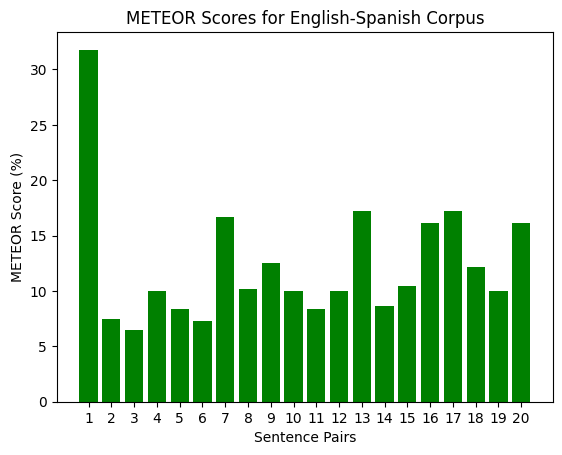

In [ ]:
import nltk
import matplotlib.pyplot as plt

# Download the METEOR data (run this once)
# nltk.download('wordnet')

def pre_tokenize(sentence):
    return nltk.word_tokenize(sentence.lower())

def calculate_meteor(reference, candidate):
    reference_tokens = pre_tokenize(reference)
    candidate_tokens = pre_tokenize(candidate)

    meteor_score = nltk.translate.meteor([reference_tokens], candidate_tokens)
    return meteor_score * 100  # Convert to percentage

def evaluate_corpus(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        meteor_scores = []

        for ref, can in zip(references, candidates):
            meteor = calculate_meteor(ref, can)
            meteor_scores.append(meteor)

        return meteor_scores

def plot_meteor_scores(meteor_scores):
    x_axis = list(range(1, len(meteor_scores) + 1))
    plt.bar(x_axis, meteor_scores, color='green')
    plt.title('METEOR Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('METEOR Score (%)')
    plt.xticks(x_axis)  # Display integer values on the x-axis
    plt.show()

def main():
    # Example usage:
    english_file = '/content/english5.txt'
    spanish_file = '/content/spanish5.txt'

    meteor_scores = evaluate_corpus(english_file, spanish_file)

    # Plot METEOR scores
    plot_meteor_scores(meteor_scores)

if __name__ == "__main__":
    main()


In [ ]:
import nltk
import matplotlib.pyplot as plt

# Download the METEOR data (run this once)
# nltk.download('wordnet')

def calculate_meteor_per_word(reference, candidate):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    meteor_scores = [nltk.translate.meteor_score.single_meteor_score(ref_word, can_word) for ref_word, can_word in zip(reference_tokens, candidate_tokens)]

    return [score * 100 for score in meteor_scores]  # Convert to percentage

def evaluate_corpus_per_word(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        meteor_scores_per_word = []

        for ref, can in zip(references, candidates):
            meteor_per_word = calculate_meteor_per_word(ref, can)
            meteor_scores_per_word.extend(meteor_per_word)

        return meteor_scores_per_word

def plot_meteor_scores_per_word(meteor_scores_per_word):
    x_axis = list(range(1, len(meteor_scores_per_word) + 1))
    plt.bar(x_axis, meteor_scores_per_word, color='blue')
    plt.title('METEOR Scores Per Word for English-Spanish Corpus')
    plt.xlabel('Words')
    plt.ylabel('METEOR Score (%)')
    plt.show()

def main():
    # Example usage:
    english_file = '/content/english5.txt'
    spanish_file = '/content/spanish5.txt'


    meteor_scores_per_word = evaluate_corpus_per_word(english_file, spanish_file)

    # Plot METEOR scores per word
    plot_meteor_scores_per_word(meteor_scores_per_word)

if __name__ == "__main__":
    main()


TypeError: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): ¿podemos

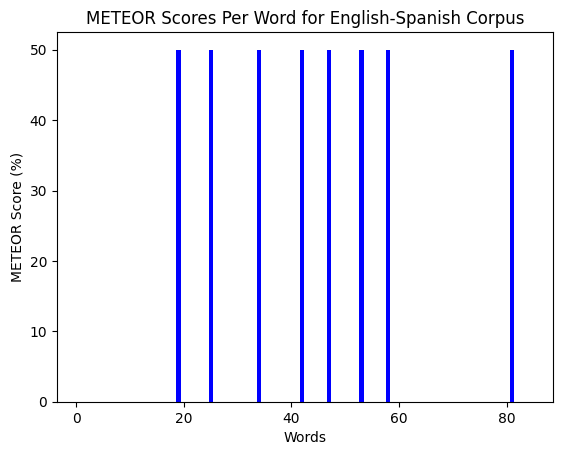

In [ ]:
import nltk
import matplotlib.pyplot as plt

# Download the METEOR data (run this once)
# nltk.download('wordnet')

def pre_tokenize(sentence):
    return nltk.word_tokenize(sentence.lower())

def calculate_meteor_per_word(reference, candidate):
    reference_tokens = pre_tokenize(reference)
    candidate_tokens = pre_tokenize(candidate)

    meteor_scores = [nltk.translate.meteor_score.single_meteor_score([ref_word], [can_word]) for ref_word, can_word in zip(reference_tokens, candidate_tokens)]

    return [score * 100 for score in meteor_scores]  # Convert to percentage

def evaluate_corpus_per_word(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        meteor_scores_per_word = []

        for ref, can in zip(references, candidates):
            meteor_per_word = calculate_meteor_per_word(ref, can)
            meteor_scores_per_word.extend(meteor_per_word)

        return meteor_scores_per_word

def plot_meteor_scores_per_word(meteor_scores_per_word):
    x_axis = list(range(1, len(meteor_scores_per_word) + 1))
    plt.bar(x_axis, meteor_scores_per_word, color='blue')
    plt.title('METEOR Scores Per Word for English-Spanish Corpus')
    plt.xlabel('Words')
    plt.ylabel('METEOR Score (%)')
    plt.show()

def main():
    # Example usage:
    english_file = '/content/english5.txt'
    spanish_file = '/content/spanish5.txt'

    meteor_scores_per_word = evaluate_corpus_per_word(english_file, spanish_file)

    # Plot METEOR scores per word
    plot_meteor_scores_per_word(meteor_scores_per_word)

if __name__ == "__main__":
    main()


# ***PER (Position-independent Error Rate)***

In [ ]:
pip install Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 1.6 MB/s eta 0:00:00


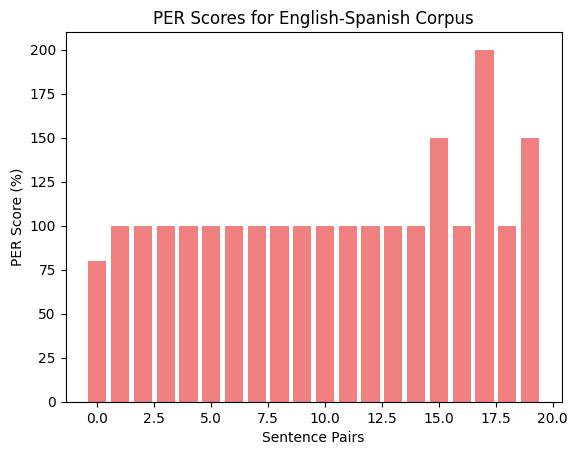

In [ ]:
import matplotlib.pyplot as plt
import Levenshtein

def calculate_per(reference, candidate):
    reference_words = reference.split()
    candidate_words = candidate.split()

    # Align words using Levenshtein distance
    alignment = Levenshtein.editops(reference_words, candidate_words)

    # Calculate PER score
    per_score = len(alignment) / len(reference_words) * 100

    return per_score

def evaluate_corpus(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        per_scores = []

        for ref, can in zip(references, candidates):
            per = calculate_per(ref, can)
            per_scores.append(per)

        return per_scores

def plot_per_scores(per_scores):
    plt.bar(range(len(per_scores)), per_scores, color='lightcoral')
    plt.title('PER Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('PER Score (%)')
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

per_scores = evaluate_corpus(english_file, spanish_file)

# Plot PER scores
plot_per_scores(per_scores)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


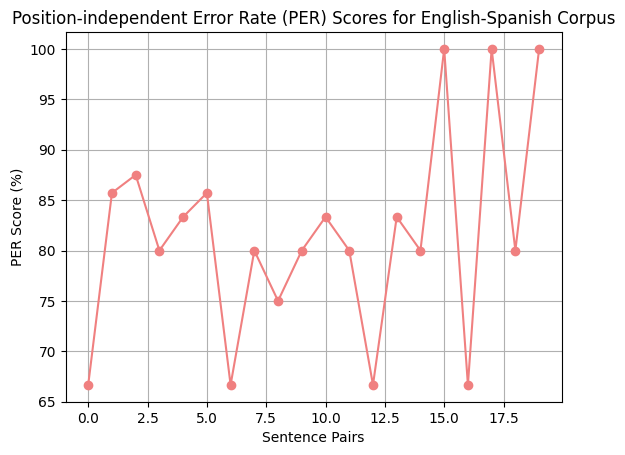

In [ ]:
import matplotlib.pyplot as plt
import Levenshtein
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

def calculate_per(reference, candidate):
    reference_words = word_tokenize(reference)
    candidate_words = word_tokenize(candidate)

    # Align words using Levenshtein distance
    alignment = Levenshtein.editops(reference_words, candidate_words)

    # Calculate PER score
    per_score = len(alignment) / len(reference_words) * 100

    return per_score

def evaluate_corpus(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        if len(references) != len(candidates):
            raise ValueError("Mismatch in the number of sentences between reference and candidate files.")

        per_scores = []

        for ref, can in zip(references, candidates):
            per = calculate_per(ref, can)
            per_scores.append(per)

        return per_scores

def plot_per_scores(per_scores):
    plt.plot(per_scores, marker='o', linestyle='-', color='lightcoral')
    plt.title('Position-independent Error Rate (PER) Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('PER Score (%)')
    plt.grid(True)
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

try:
    per_scores = evaluate_corpus(english_file, spanish_file)
    plot_per_scores(per_scores)

except Exception as e:
    print(f"Error: {e}")


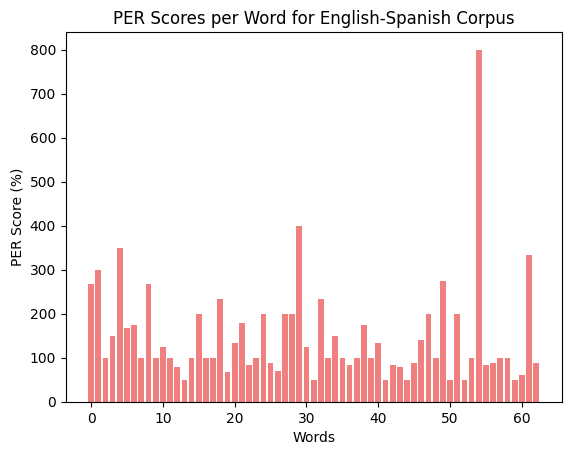

In [ ]:
import matplotlib.pyplot as plt
import Levenshtein

def calculate_per_word(reference, candidate):
    reference_words = reference.split()
    candidate_words = candidate.split()

    per_scores = []

    for ref_word, can_word in zip(reference_words, candidate_words):
        # Align words using Levenshtein distance
        alignment = Levenshtein.editops(ref_word, can_word)

        # Calculate PER score per word
        per_word_score = len(alignment) / len(ref_word) * 100
        per_scores.append(per_word_score)

    return per_scores

def evaluate_corpus_word_wise(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        all_per_scores = []

        for ref, can in zip(references, candidates):
            per_scores = calculate_per_word(ref, can)
            all_per_scores.extend(per_scores)

        return all_per_scores

def plot_per_word_scores(per_scores):
    plt.bar(range(len(per_scores)), per_scores, color='lightcoral')
    plt.title('PER Scores per Word for English-Spanish Corpus')
    plt.xlabel('Words')
    plt.ylabel('PER Score (%)')
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

per_word_scores = evaluate_corpus_word_wise(english_file, spanish_file)

# Plot PER scores per word
plot_per_word_scores(per_word_scores)


In [ ]:
pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.6 MB/s eta 0:00:00


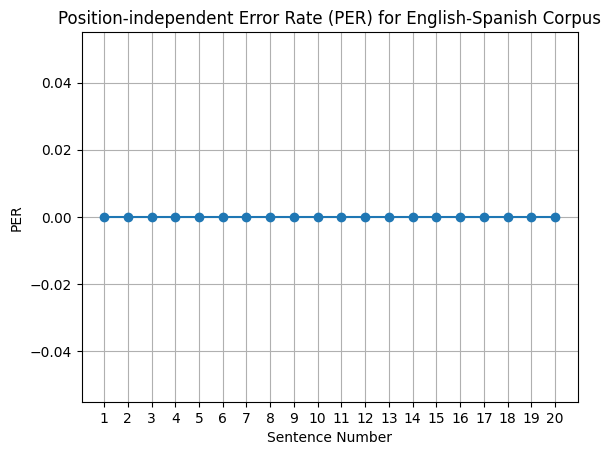

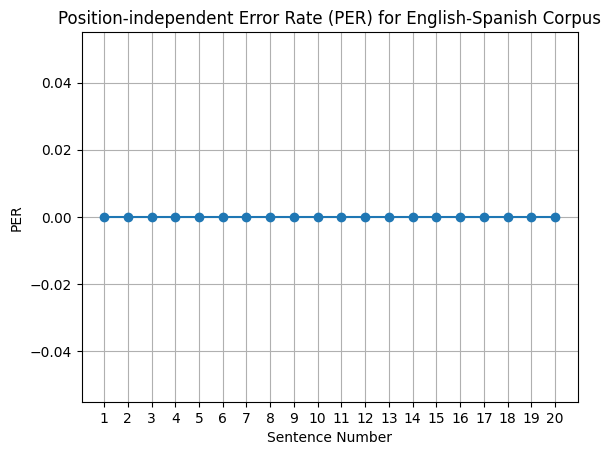

In [ ]:
import jiwer
import matplotlib.pyplot as plt

def calculate_per(reference_path, hypothesis_path):
    with open(reference_path, 'r', encoding='utf-8') as ref_file:
        reference = ref_file.read().strip()

    with open(hypothesis_path, 'r', encoding='utf-8') as hyp_file:
        hypothesis = hyp_file.read().strip()

    error = jiwer.wer(reference, hypothesis)
    per = error / len(reference.split())

    return per

def visualize_per(file_paths):
    per_values = []

    for i, (ref_path, hyp_path) in enumerate(file_paths, start=1):
        per = calculate_per(ref_path, hyp_path)
        per_values.append(per)

    # Plotting
    plt.plot(range(1, len(per_values) + 1), per_values, marker='o')
    plt.title('Position-independent Error Rate (PER) for English-Spanish Corpus')
    plt.xlabel('Sentence Number')
    plt.ylabel('PER')
    plt.xticks(range(1, len(per_values) + 1))
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Example file paths (replace these with your actual file paths)
    english_files = [("/content/english5.txt".format(i), "/content/english5.txt".format(i)) for i in range(1, 21)]
    spanish_files = [("/content/spanish5.txt".format(i), "/content/spanish5.txt".format(i)) for i in range(1, 21)]

    # Visualize PER for English
    visualize_per(english_files)

    # Visualize PER for Spanish
    visualize_per(spanish_files)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


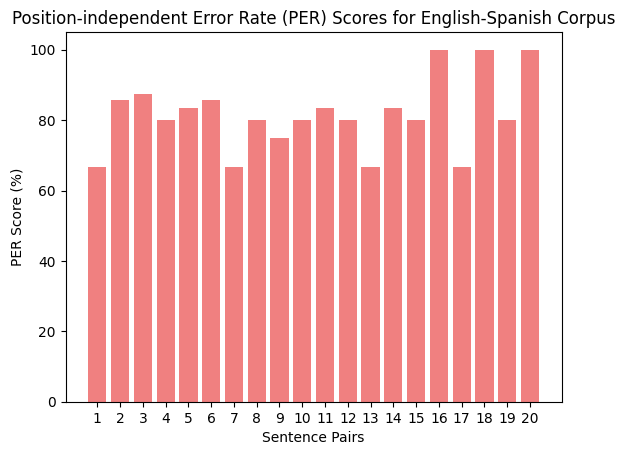

In [ ]:
import matplotlib.pyplot as plt
import Levenshtein
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

def calculate_per(reference, candidate):
    reference_words = word_tokenize(reference)
    candidate_words = word_tokenize(candidate)

    # Align words using Levenshtein distance
    alignment = Levenshtein.editops(reference_words, candidate_words)

    # Calculate PER score
    per_score = len(alignment) / len(reference_words) * 100

    return per_score

def evaluate_corpus(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        if len(references) != len(candidates):
            raise ValueError("Mismatch in the number of sentences between reference and candidate files.")

        per_scores = []

        for ref, can in zip(references, candidates):
            per = calculate_per(ref, can)
            per_scores.append(per)

        return per_scores

def plot_per_scores(per_scores):
    plt.bar(range(1, len(per_scores) + 1), per_scores, color='lightcoral')
    plt.title('Position-independent Error Rate (PER) Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('PER Score (%)')
    plt.xticks(range(1, len(per_scores) + 1))  # Set x-axis ticks to integers
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

try:
    per_scores = evaluate_corpus(english_file, spanish_file)
    plot_per_scores(per_scores)

except Exception as e:
    print(f"Error: {e}")


## **Rouge score**

In [ ]:
pip install rouge

In [ ]:
pip install py-rouge


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 506.7 kB/s eta 0:00:00


In [ ]:
pip install nltk matplotlib


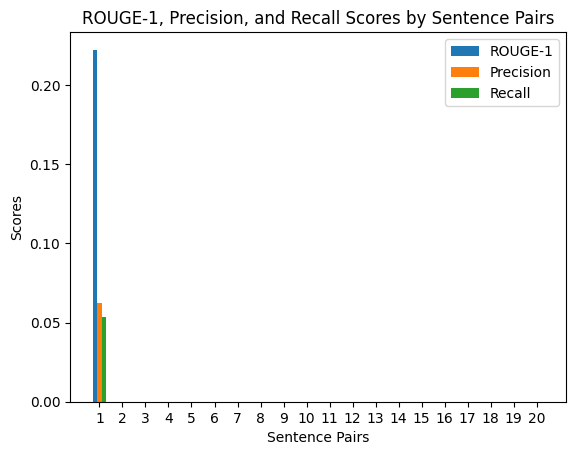

In [ ]:
import nltk
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge import Rouge

def read_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return [line.strip() for line in file]

def calculate_rouge(reference, candidate):
    rouge = Rouge()
    scores = rouge.get_scores(candidate, reference)
    return scores[0]['rouge-1']['f']

def visualize_scores(sentences, rouge_scores, precision_scores, recall_scores):
    bar_width = 0.2
    index = range(len(sentences))

    plt.bar(index, rouge_scores, bar_width, label='ROUGE-1')
    plt.bar([i + bar_width for i in index], precision_scores, bar_width, label='Precision')
    plt.bar([i + 2 * bar_width for i in index], recall_scores, bar_width, label='Recall')

    plt.xlabel('Sentence Pairs')
    plt.ylabel('Scores')
    plt.title('ROUGE-1, Precision, and Recall Scores by Sentence Pairs')
    plt.xticks([i + bar_width for i in index], sentences)
    plt.legend()
    plt.show()

def main():
    # Specify the paths to your English and Spanish files
    english_file_path = '/content/english5.txt'
    spanish_file_path = '/content/spanish5.txt'

    # Read the English and Spanish sentences from the files
    english_sentences = read_corpus(english_file_path)
    spanish_sentences = read_corpus(spanish_file_path)

    # Check if the number of sentences in both files is the same
    if len(english_sentences) != len(spanish_sentences):
        print("Error: The number of sentences in the English and Spanish files must be the same.")
        return

    rouge_scores = []
    precision_scores = []
    recall_scores = []

    # Calculate ROUGE-1, Precision, and Recall scores for each sentence pair
    for eng_sent, spa_sent in zip(english_sentences, spanish_sentences):
        rouge_score = calculate_rouge(eng_sent, spa_sent)
        precision = sentence_bleu([eng_sent.split()], spa_sent.split(), smoothing_function=SmoothingFunction().method1)
        recall = sentence_bleu([spa_sent.split()], eng_sent.split(), smoothing_function=SmoothingFunction().method1)

        rouge_scores.append(rouge_score)
        precision_scores.append(precision)
        recall_scores.append(recall)

    # Visualize the scores using a grouped bar chart
    visualize_scores(range(1, len(english_sentences) + 1), rouge_scores, precision_scores, recall_scores)

if __name__ == "__main__":
    main()


In [ ]:
pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=19574cd36c65d898a3ded04eccc7f76df18972b70869f1fe5177797f5241a2c3
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


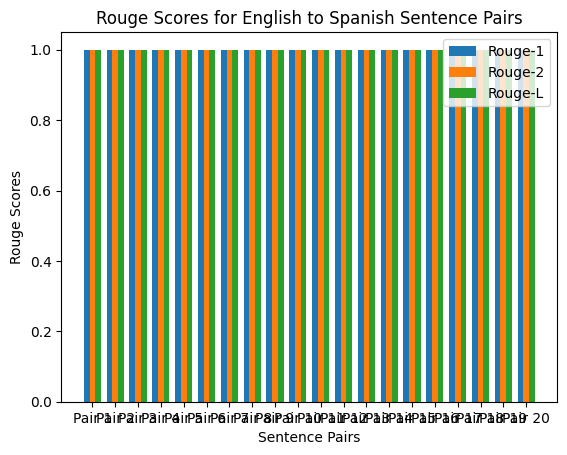

In [ ]:
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import numpy as np

def calculate_rouge_scores(reference_summary, system_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'])
    scores = scorer.score(reference_summary, system_summary)
    rouge_1_score = scores['rouge1'].fmeasure
    rouge_2_score = scores['rouge2'].fmeasure
    rouge_l_score = scores['rougeL'].fmeasure
    return rouge_1_score, rouge_2_score, rouge_l_score

def generate_grouped_bar_chart(sentence_pairs, rouge_1_scores, rouge_2_scores, rouge_l_scores):
    bar_width = 0.25
    index = np.arange(len(sentence_pairs))

    plt.bar(index, rouge_1_scores, bar_width, label='Rouge-1')
    plt.bar(index + bar_width, rouge_2_scores, bar_width, label='Rouge-2')
    plt.bar(index + 2 * bar_width, rouge_l_scores, bar_width, label='Rouge-L')

    plt.xlabel('Sentence Pairs')
    plt.ylabel('Rouge Scores')
    plt.title('Rouge Scores for English to Spanish Sentence Pairs')
    plt.xticks(index + bar_width, sentence_pairs)
    plt.legend()

    plt.show()

def main():
    # Replace these with your actual file paths
    reference_file_path = "/content/english5.txt"
    system_file_path = "/content/english5.txt"

    # Read data from files
    with open(reference_file_path, 'r', encoding='utf-8') as f:
        reference_summaries = f.readlines()

    with open(system_file_path, 'r', encoding='utf-8') as f:
        system_summaries = f.readlines()

    # Ensure the number of reference and system summaries match
    assert len(reference_summaries) == len(system_summaries), "Mismatched number of summaries"

    sentence_pairs = []
    rouge_1_scores = []
    rouge_2_scores = []
    rouge_l_scores = []

    # Calculate Rouge scores for each sentence pair
    for reference_summary, system_summary in zip(reference_summaries, system_summaries):
        rouge_1, rouge_2, rouge_l = calculate_rouge_scores(reference_summary, system_summary)
        sentence_pairs.append(f"Pair {len(sentence_pairs) + 1}")
        rouge_1_scores.append(rouge_1)
        rouge_2_scores.append(rouge_2)
        rouge_l_scores.append(rouge_l)

    # Generate grouped bar chart
    generate_grouped_bar_chart(sentence_pairs, rouge_1_scores, rouge_2_scores, rouge_l_scores)

if __name__ == "__main__":
    main()


In [ ]:
from rouge_score import rouge_scorer

def calculate_rouge_1_score(source_sentences, target_sentences):
    assert len(source_sentences) == len(target_sentences), "Mismatched number of sentences"

    scorer = rouge_scorer.RougeScorer(['rouge1'])
    rouge_1_scores = []

    for source, target in zip(source_sentences, target_sentences):
        scores = scorer.score(source, target)
        rouge_1_scores.append(scores['rouge1'].fmeasure)

    return rouge_1_scores

def main():
    # Replace these with your actual English and Spanish sentences
    english_sentences = ["/content/english5.txt" ]

    spanish_sentences = ["/content/spanish5.txt"]

    rouge_1_scores = calculate_rouge_1_score(english_sentences, spanish_sentences)

    # Print or use the Rouge-1 scores as needed
    for i, score in enumerate(rouge_1_scores, start=1):
        print(f"Pair {i}: Rouge-1 Score = {score:.4f}")

if __name__ == "__main__":
    main()


Pair 1: Rouge-1 Score = 0.6667


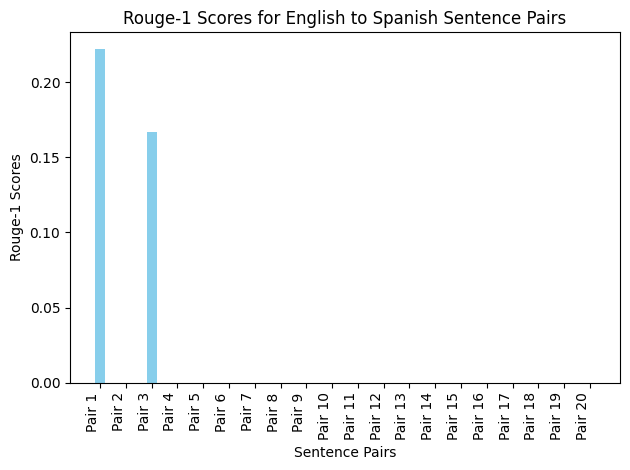

In [ ]:
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import numpy as np

def read_sentences_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        sentences = f.readlines()
    return sentences

def calculate_rouge_1_score(source_sentences, target_sentences):
    assert len(source_sentences) == len(target_sentences), "Mismatched number of sentences"

    scorer = rouge_scorer.RougeScorer(['rouge1'])
    rouge_1_scores = []

    for source, target in zip(source_sentences, target_sentences):
        scores = scorer.score(source, target)
        rouge_1_scores.append(scores['rouge1'].fmeasure)

    return rouge_1_scores

def generate_grouped_bar_chart(sentence_pairs, rouge_1_scores):
    bar_width = 0.4
    index = np.arange(len(sentence_pairs))

    plt.bar(index, rouge_1_scores, bar_width, color='skyblue')

    plt.xlabel('Sentence Pairs')
    plt.ylabel('Rouge-1 Scores')
    plt.title('Rouge-1 Scores for English to Spanish Sentence Pairs')
    plt.xticks(index, sentence_pairs, rotation='vertical', ha='right')
    plt.tight_layout()

    plt.show()

def main():
    # Replace these with your actual file paths
    english_file_path = "/content/english5.txt"
    spanish_file_path = "/content/spanish5.txt"

    english_sentences = read_sentences_from_file(english_file_path)
    spanish_sentences = read_sentences_from_file(spanish_file_path)

    # Ensure the number of sentences match
    assert len(english_sentences) == len(spanish_sentences), "Mismatched number of sentences"

    sentence_pairs = [f"Pair {i+1}" for i in range(len(english_sentences))]

    rouge_1_scores = calculate_rouge_1_score(english_sentences, spanish_sentences)

    # Generate grouped bar chart
    generate_grouped_bar_chart(sentence_pairs, rouge_1_scores)

if __name__ == "__main__":
    main()


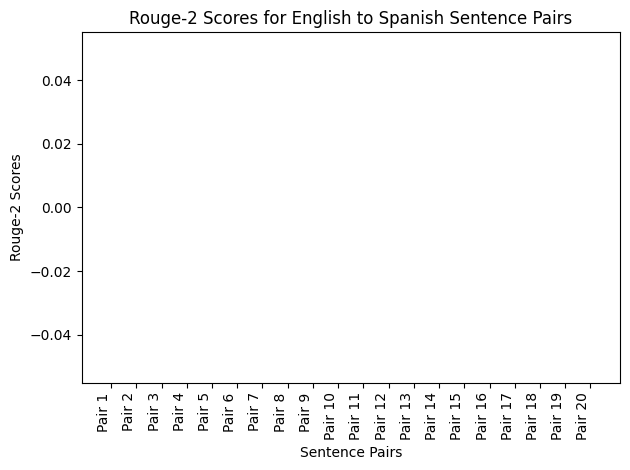

In [ ]:
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import numpy as np

def read_sentences_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        sentences = f.readlines()
    return sentences

def calculate_rouge_2_score(source_sentences, target_sentences):
    assert len(source_sentences) == len(target_sentences), "Mismatched number of sentences"

    scorer = rouge_scorer.RougeScorer(['rouge2'])
    rouge_2_scores = []

    for source, target in zip(source_sentences, target_sentences):
        scores = scorer.score(source, target)
        rouge_2_scores.append(scores['rouge2'].fmeasure)

    return rouge_2_scores

def generate_grouped_bar_chart(sentence_pairs, rouge_2_scores):
    bar_width = 0.4
    index = np.arange(len(sentence_pairs))

    plt.bar(index, rouge_2_scores, bar_width, color='lightcoral')

    plt.xlabel('Sentence Pairs')
    plt.ylabel('Rouge-2 Scores')
    plt.title('Rouge-2 Scores for English to Spanish Sentence Pairs')
    plt.xticks(index, sentence_pairs, rotation='vertical', ha='right')
    plt.tight_layout()

    plt.show()

def main():
    # Replace these with your actual file paths
    english_file_path = "/content/english5.txt"
    spanish_file_path = "/content/spanish5.txt"

    english_sentences = read_sentences_from_file(english_file_path)
    spanish_sentences = read_sentences_from_file(spanish_file_path)

    # Ensure the number of sentences match
    assert len(english_sentences) == len(spanish_sentences), "Mismatched number of sentences"

    sentence_pairs = [f"Pair {i+1}" for i in range(len(english_sentences))]

    rouge_2_scores = calculate_rouge_2_score(english_sentences, spanish_sentences)

    # Generate grouped bar chart
    generate_grouped_bar_chart(sentence_pairs, rouge_2_scores)

if __name__ == "__main__":
    main()


In [ ]:
pip install rouge


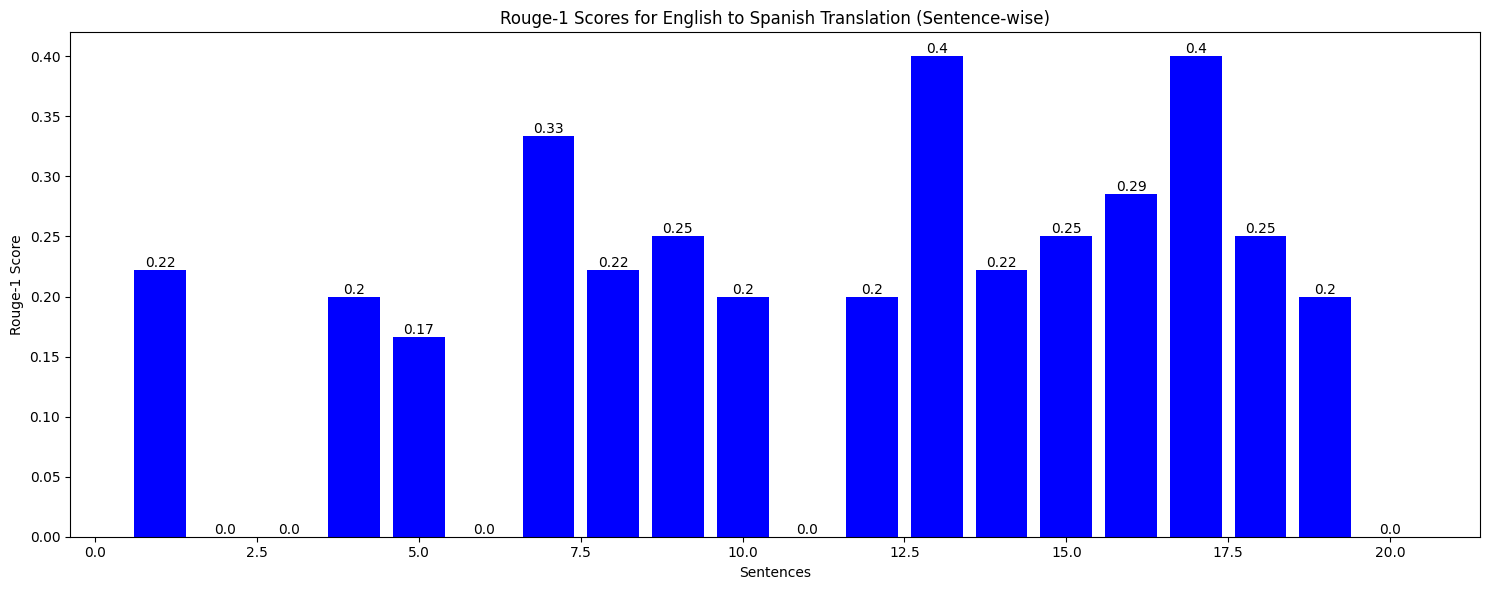

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

def calculate_rouge_scores(english_sentences, spanish_sentences):
    rouge = Rouge()
    rouge_scores = []

    for eng, esp in zip(english_sentences, spanish_sentences):
        scores = rouge.get_scores(eng, esp)
        rouge_scores.append(scores[0]['rouge-1']['f'])

    return rouge_scores

# Read English sentences from file
with open('/content/english5.txt', 'r', encoding='utf-8') as file:
    english_sentences = file.readlines()

# Read Spanish sentences from file
with open('/content/spanish5.txt', 'r', encoding='utf-8') as file:
    spanish_sentences = file.readlines()

# Calculate Rouge-1 scores
rouge_scores = calculate_rouge_scores(english_sentences, spanish_sentences)

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(15, 6))
bars = ax.bar(range(1, len(rouge_scores)+1), rouge_scores, color='blue')

# Adding labels and title
ax.set_xlabel('Sentences')
ax.set_ylabel('Rouge-1 Score')
ax.set_title('Rouge-1 Scores for English to Spanish Translation (Sentence-wise)')

# Display the Rouge scores on top of the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


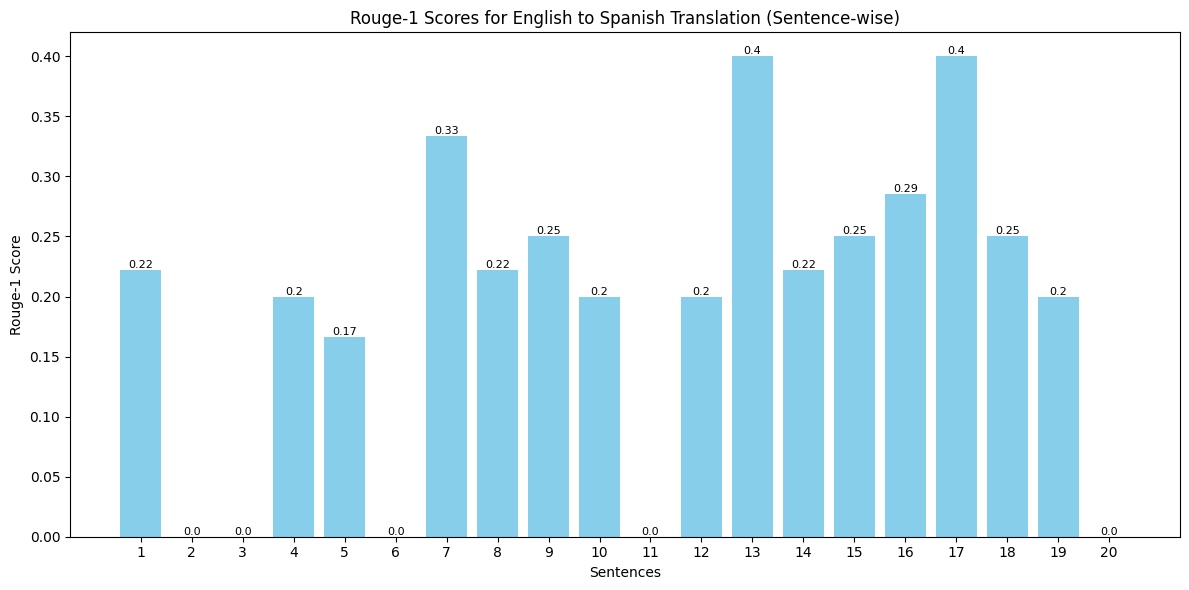

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

def calculate_rouge_scores(english_sentences, spanish_sentences):
    rouge = Rouge()
    rouge_scores = []

    for eng, esp in zip(english_sentences, spanish_sentences):
        scores = rouge.get_scores(eng, esp)
        rouge_scores.append(scores[0]['rouge-1']['f'])

    return rouge_scores

# Read English sentences from file
with open('/content/english5.txt', 'r', encoding='utf-8') as file:
    english_sentences = file.readlines()

# Read Spanish sentences from file
with open('/content/spanish5.txt', 'r', encoding='utf-8') as file:
    spanish_sentences = file.readlines()

# Calculate Rouge-1 scores
rouge_scores = calculate_rouge_scores(english_sentences, spanish_sentences)

# Plotting the bar graph with sentence labels on x-axis
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(range(1, len(rouge_scores)+1), rouge_scores, color='skyblue')  # Use a different color, e.g., skyblue

# Adding labels and title
ax.set_xlabel('Sentences')
ax.set_ylabel('Rouge-1 Score')
ax.set_title('Rouge-1 Scores for English to Spanish Translation (Sentence-wise)')

# Set x-axis labels to sentence indices
ax.set_xticks(range(1, len(rouge_scores)+1))
ax.set_xticklabels(range(1, len(rouge_scores)+1))

# Display the Rouge scores on top of the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


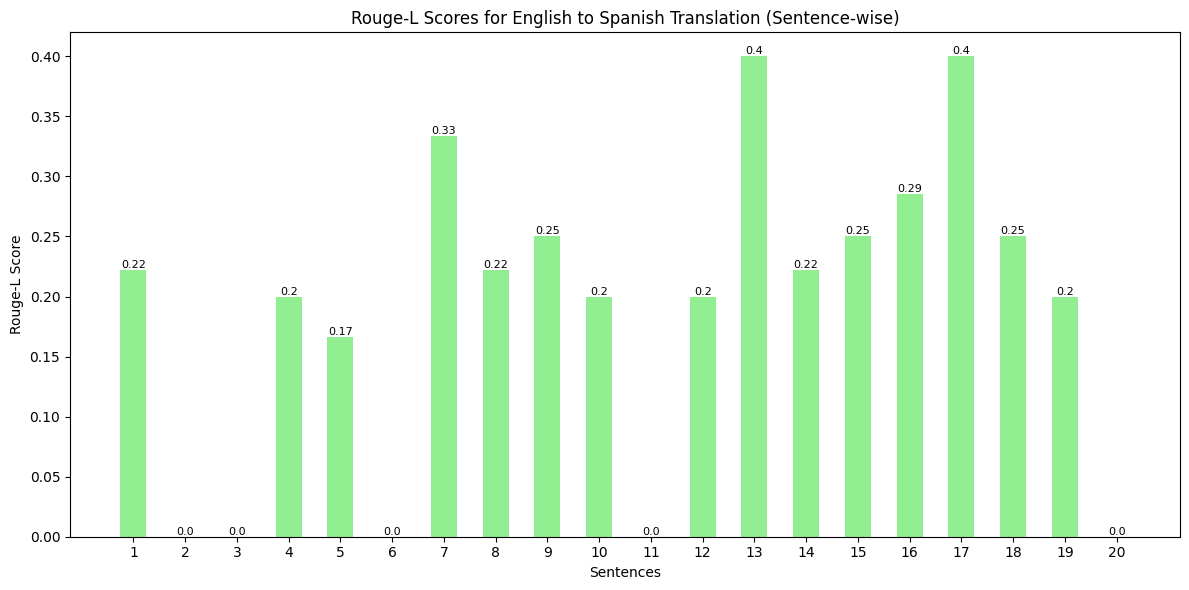

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt
import numpy as np

def calculate_rouge_l_scores(english_sentences, spanish_sentences):
    rouge = Rouge()
    rougeL_scores = []

    for eng, esp in zip(english_sentences, spanish_sentences):
        scores = rouge.get_scores(eng, esp)[0]
        rougeL_scores.append(scores['rouge-l']['f'])

    return rougeL_scores

# Read English sentences from file
with open('/content/english5.txt', 'r', encoding='utf-8') as file:
    english_sentences = file.readlines()

# Read Spanish sentences from file
with open('/content/spanish5.txt', 'r', encoding='utf-8') as file:
    spanish_sentences = file.readlines()

# Calculate Rouge-L scores
rougeL_scores = calculate_rouge_l_scores(english_sentences, spanish_sentences)

# Plotting the bar graph for Rouge-L
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.5
index = np.arange(len(rougeL_scores))

bars = ax.bar(index, rougeL_scores, bar_width, label='Rouge-L', color='lightgreen')

# Adding labels and title
ax.set_xlabel('Sentences')
ax.set_ylabel('Rouge-L Score')
ax.set_title('Rouge-L Scores for English to Spanish Translation (Sentence-wise)')
ax.set_xticks(index)
ax.set_xticklabels(range(1, len(rougeL_scores) + 1))


# Display the Rouge scores on top of the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


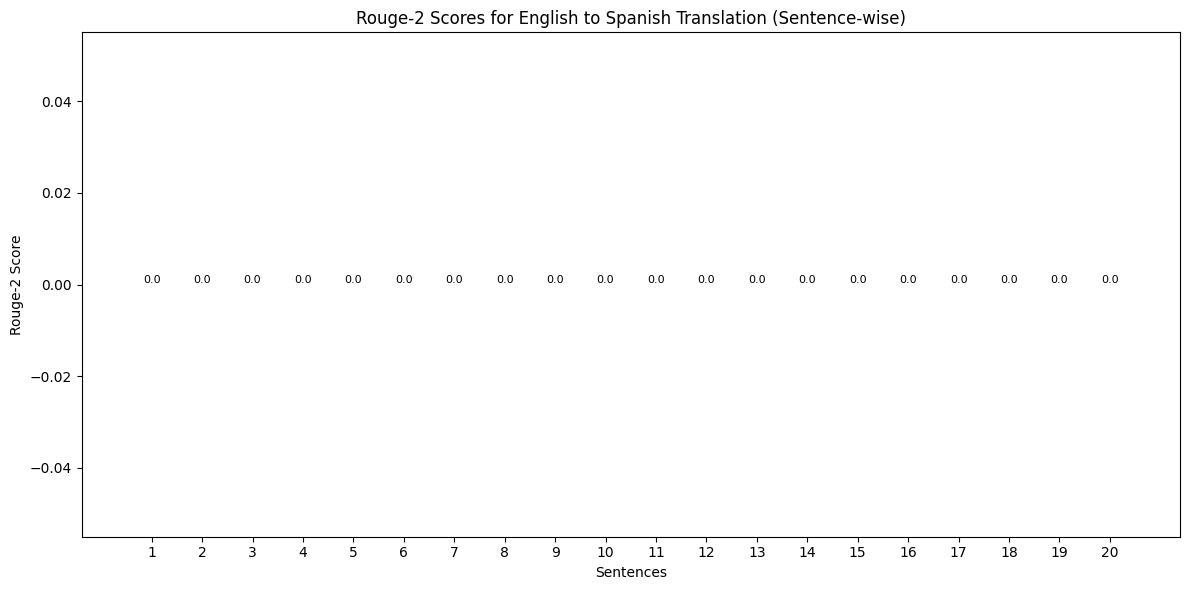

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

def calculate_rouge_scores(english_sentences, spanish_sentences):
    rouge = Rouge()
    rouge_scores = []

    for eng, esp in zip(english_sentences, spanish_sentences):
        scores = rouge.get_scores(eng, esp)
        rouge_scores.append(scores[0]['rouge-2']['f'])

    return rouge_scores

# Read English sentences from file
with open('/content/english5.txt', 'r', encoding='utf-8') as file:
    english_sentences = file.readlines()

# Read Spanish sentences from file
with open('/content/spanish5.txt', 'r', encoding='utf-8') as file:
    spanish_sentences = file.readlines()

# Calculate Rouge-1 scores
rouge_scores = calculate_rouge_scores(english_sentences, spanish_sentences)

# Plotting the bar graph with sentence labels on x-axis
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(range(1, len(rouge_scores)+1), rouge_scores, color='skyblue')  # Use a different color, e.g., skyblue

# Adding labels and title
ax.set_xlabel('Sentences')
ax.set_ylabel('Rouge-2 Score')
ax.set_title('Rouge-2 Scores for English to Spanish Translation (Sentence-wise)')

# Set x-axis labels to sentence indices
ax.set_xticks(range(1, len(rouge_scores)+1))
ax.set_xticklabels(range(1, len(rouge_scores)+1))

# Display the Rouge scores on top of the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


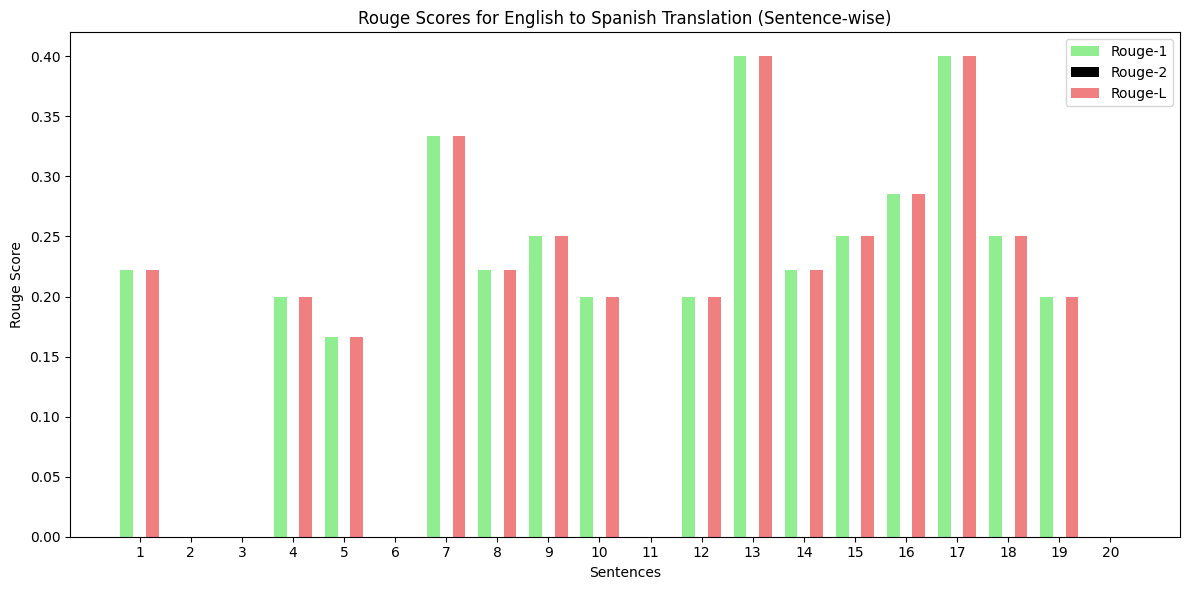

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt
import numpy as np

def calculate_rouge_scores(english_sentences, spanish_sentences):
    rouge = Rouge()
    rouge1_scores, rouge2_scores, rougeL_scores = [], [], []

    for eng, esp in zip(english_sentences, spanish_sentences):
        scores = rouge.get_scores(eng, esp)[0]
        rouge1_scores.append(scores['rouge-1']['f'])
        rouge2_scores.append(scores['rouge-2']['f'])
        rougeL_scores.append(scores['rouge-l']['f'])

    return rouge1_scores, rouge2_scores, rougeL_scores

# Read English sentences from file
with open('/content/english5.txt', 'r', encoding='utf-8') as file:
    english_sentences = file.readlines()

# Read Spanish sentences from file
with open('/content/spanish5.txt', 'r', encoding='utf-8') as file:
    spanish_sentences = file.readlines()

# Calculate Rouge scores
rouge1_scores, rouge2_scores, rougeL_scores = calculate_rouge_scores(english_sentences, spanish_sentences)

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.25
index = np.arange(len(rouge1_scores))

bar1 = ax.bar(index, rouge1_scores, bar_width, label='Rouge-1', color='lightgreen')
bar2 = ax.bar(index + bar_width, rouge2_scores, bar_width, label='Rouge-2', color='black')
bar3 = ax.bar(index + 2 * bar_width, rougeL_scores, bar_width, label='Rouge-L', color='lightcoral')

# Adding labels and title
ax.set_xlabel('Sentences')
ax.set_ylabel('Rouge Score')
ax.set_title('Rouge Scores for English to Spanish Translation (Sentence-wise)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(range(1, len(rouge1_scores) + 1))

# Show legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


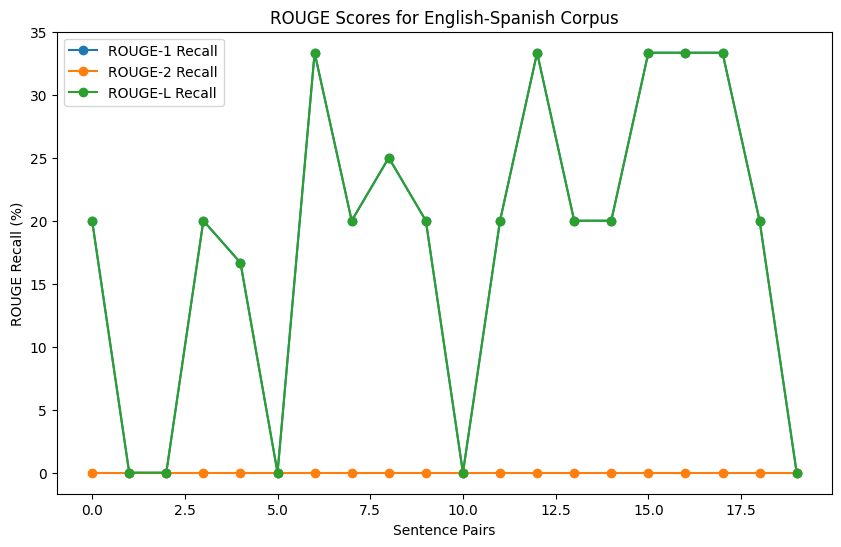

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

def calculate_rouge(reference, candidate):
    rouge = Rouge()
    rouge_scores = rouge.get_scores(candidate, reference, avg=True)
    rouge_1_recall = rouge_scores['rouge-1']['r'] * 100
    rouge_2_recall = rouge_scores['rouge-2']['r'] * 100
    rouge_l_recall = rouge_scores['rouge-l']['r'] * 100
    return rouge_1_recall, rouge_2_recall, rouge_l_recall

def evaluate_corpus(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        rouge_1_scores = []
        rouge_2_scores = []
        rouge_l_scores = []

        for ref, can in zip(references, candidates):
            rouge_1, rouge_2, rouge_l = calculate_rouge(ref, can)
            rouge_1_scores.append(rouge_1)
            rouge_2_scores.append(rouge_2)
            rouge_l_scores.append(rouge_l)

        return rouge_1_scores, rouge_2_scores, rouge_l_scores

def plot_rouge_scores(rouge_1_scores, rouge_2_scores, rouge_l_scores):
    plt.figure(figsize=(10, 6))

    plt.plot(rouge_1_scores, label='ROUGE-1 Recall', marker='o')
    plt.plot(rouge_2_scores, label='ROUGE-2 Recall', marker='o')
    plt.plot(rouge_l_scores, label='ROUGE-L Recall', marker='o')

    plt.title('ROUGE Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('ROUGE Recall (%)')
    plt.legend()
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

rouge_1_scores, rouge_2_scores, rouge_l_scores = evaluate_corpus(english_file, spanish_file)

# Plot ROUGE scores
plot_rouge_scores(rouge_1_scores, rouge_2_scores, rouge_l_scores)


In [ ]:
from rouge import Rouge

def calculate_rouge(reference, candidate):
    rouge = Rouge()
    rouge_scores = rouge.get_scores(candidate, reference, avg=True)
    rouge_1_recall = rouge_scores['rouge-1']['r'] * 100
    rouge_2_recall = rouge_scores['rouge-2']['r'] * 100
    rouge_l_recall = rouge_scores['rouge-l']['r'] * 100
    return rouge_1_recall, rouge_2_recall, rouge_l_recall

# Example usage:
reference_text = "This is a reference sentence."
candidate_text = "This is a candidate sentence for evaluation."

rouge_1, rouge_2, rouge_l = calculate_rouge(reference_text, candidate_text)

print(f"ROUGE-1 Recall: {rouge_1:.2f}%")
print(f"ROUGE-2 Recall: {rouge_2:.2f}%")
print(f"ROUGE-L Recall: {rouge_l:.2f}%")


ROUGE-1 Recall: 80.00%
ROUGE-2 Recall: 50.00%
ROUGE-L Recall: 80.00%


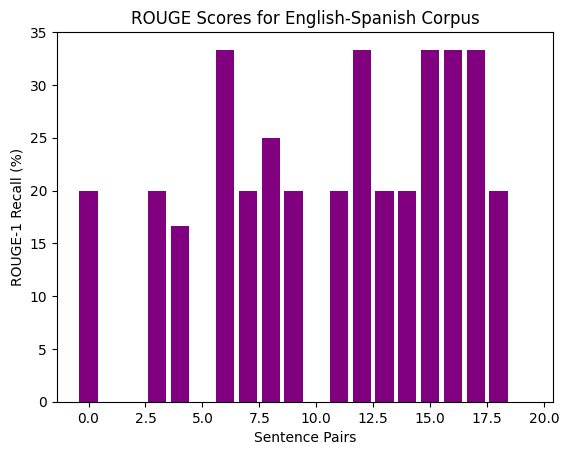

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

def calculate_rouge(reference, candidate):
    rouge = Rouge()
    rouge_scores = rouge.get_scores(candidate, reference, avg=True)
    rouge_recall = rouge_scores['rouge-1']['r'] * 100  # ROUGE-1 recall
    return rouge_recall

def evaluate_corpus(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        rouge_scores = []

        for ref, can in zip(references, candidates):
            rouge = calculate_rouge(ref, can)
            rouge_scores.append(rouge)

        return rouge_scores

def plot_rouge_scores(rouge_scores):
    plt.bar(range(len(rouge_scores)), rouge_scores, color='purple')
    plt.title('ROUGE Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('ROUGE-1 Recall (%)')
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

rouge_scores = evaluate_corpus(english_file, spanish_file)

# Plot ROUGE scores
plot_rouge_scores(rouge_scores)


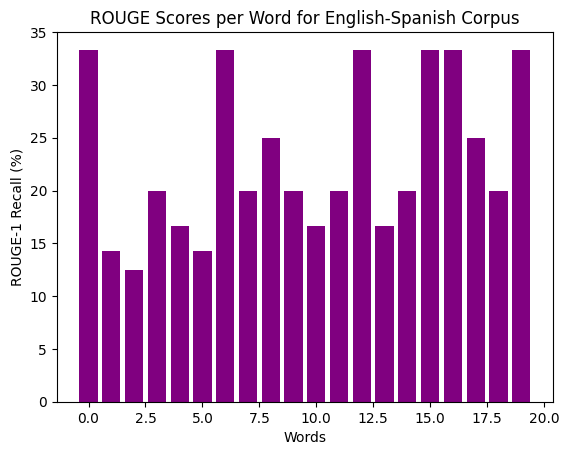

In [ ]:
import nltk
import matplotlib.pyplot as plt

# Download NLTK data (run this once)
# nltk.download('punkt')

def calculate_rouge_per_word(reference, candidate):
    reference_words = nltk.word_tokenize(reference.lower())
    candidate_words = nltk.word_tokenize(candidate.lower())

    common_words = set(reference_words) & set(candidate_words)
    recall_per_word = len(common_words) / len(reference_words) * 100

    return recall_per_word

def evaluate_corpus_word_wise(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        all_rouge_scores = []

        for ref, can in zip(references, candidates):
            rouge_scores = calculate_rouge_per_word(ref, can)
            all_rouge_scores.append(rouge_scores)

        return all_rouge_scores

def plot_rouge_word_scores(rouge_scores):
    plt.bar(range(len(rouge_scores)), rouge_scores, color='purple')
    plt.title('ROUGE Scores per Word for English-Spanish Corpus')
    plt.xlabel('Words')
    plt.ylabel('ROUGE-1 Recall (%)')
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

rouge_word_scores = evaluate_corpus_word_wise(english_file, spanish_file)

# Plot ROUGE scores per word
plot_rouge_word_scores(rouge_word_scores)


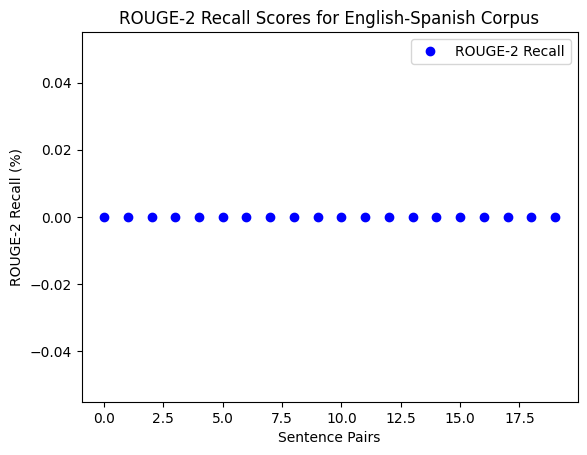

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

def calculate_rouge_2(reference, candidate):
    rouge = Rouge()
    rouge_scores = rouge.get_scores(candidate, reference, avg=True)
    rouge_2_recall = rouge_scores['rouge-2']['r'] * 100
    return rouge_2_recall

def evaluate_corpus(english_file, spanish_file):
    with open(english_file, 'r', encoding='utf-8') as en_file, \
         open(spanish_file, 'r', encoding='utf-8') as es_file:
        english_sentences = en_file.readlines()
        spanish_sentences = es_file.readlines()

        rouge_2_scores = []

        for en, es in zip(english_sentences, spanish_sentences):
            rouge_2 = calculate_rouge_2(en, es)
            rouge_2_scores.append(rouge_2)

        return rouge_2_scores

def plot_rouge_2_scores(rouge_2_scores):
    plt.plot(rouge_2_scores, label='ROUGE-2 Recall', marker='o', linestyle='None', color='blue')
    plt.title('ROUGE-2 Recall Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('ROUGE-2 Recall (%)')
    plt.legend()
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

rouge_2_scores = evaluate_corpus(english_file, spanish_file)

# Plot ROUGE-2 scores
plot_rouge_2_scores(rouge_2_scores)


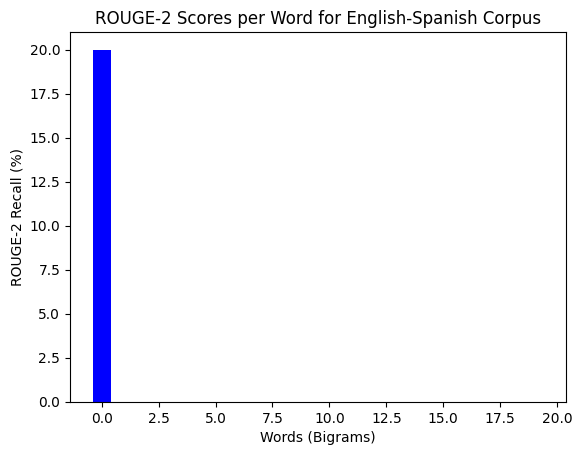

In [ ]:
import nltk
import matplotlib.pyplot as plt

# Download NLTK data (run this once)
# nltk.download('punkt')

def calculate_rouge_2_per_word(reference, candidate):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    reference_bigrams = list(nltk.ngrams(reference_tokens, 2))
    candidate_bigrams = list(nltk.ngrams(candidate_tokens, 2))

    common_bigrams = set(reference_bigrams) & set(candidate_bigrams)
    recall_per_word = len(common_bigrams) / len(reference_bigrams) * 100

    return recall_per_word

def evaluate_corpus_word_wise(reference_file, candidate_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file:
        references = ref_file.readlines()
        candidates = can_file.readlines()

        rouge_2_scores = []

        for ref, can in zip(references, candidates):
            rouge_2 = calculate_rouge_2_per_word(ref, can)
            rouge_2_scores.append(rouge_2)

        return rouge_2_scores

def plot_rouge_2_word_scores(rouge_2_scores):
    plt.bar(range(len(rouge_2_scores)), rouge_2_scores, color='blue')
    plt.title('ROUGE-2 Scores per Word for English-Spanish Corpus')
    plt.xlabel('Words (Bigrams)')
    plt.ylabel('ROUGE-2 Recall (%)')
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

rouge_2_word_scores = evaluate_corpus_word_wise(english_file, spanish_file)

# Plot ROUGE-2 scores per word
plot_rouge_2_word_scores(rouge_2_word_scores)


# **F1 score rouge 1 score**

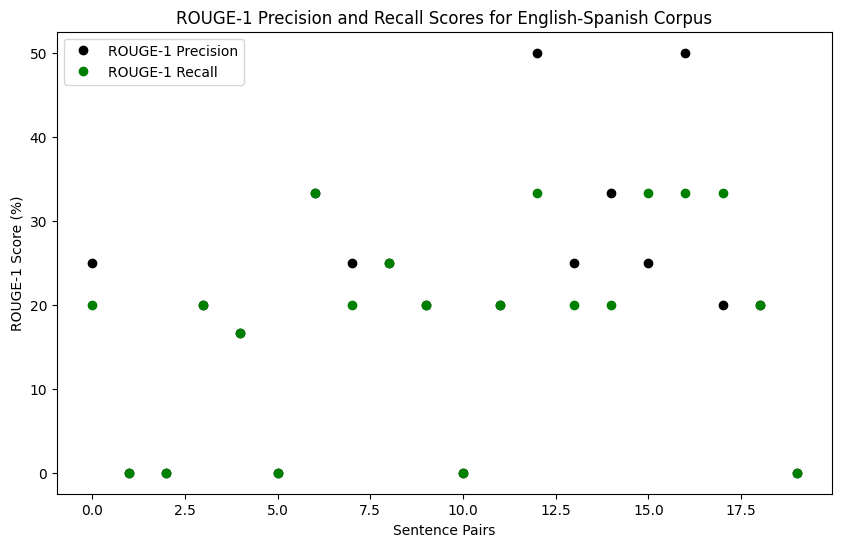

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

def calculate_rouge_1_precision_recall(reference, candidate):
    rouge = Rouge()
    rouge_scores = rouge.get_scores(candidate, reference, avg=True)
    rouge_1_precision = rouge_scores['rouge-1']['p'] * 100
    rouge_1_recall = rouge_scores['rouge-1']['r'] * 100
    return rouge_1_precision, rouge_1_recall

def evaluate_corpus(english_file, spanish_file):
    with open(english_file, 'r', encoding='utf-8') as en_file, \
         open(spanish_file, 'r', encoding='utf-8') as es_file:
        english_sentences = en_file.readlines()
        spanish_sentences = es_file.readlines()

        rouge_1_precision_scores = []
        rouge_1_recall_scores = []

        for en, es in zip(english_sentences, spanish_sentences):
            rouge_1_precision, rouge_1_recall = calculate_rouge_1_precision_recall(en, es)
            rouge_1_precision_scores.append(rouge_1_precision)
            rouge_1_recall_scores.append(rouge_1_recall)

        return rouge_1_precision_scores, rouge_1_recall_scores

def plot_precision_recall(rouge_1_precision_scores, rouge_1_recall_scores):
    plt.figure(figsize=(10, 6))

    plt.plot(rouge_1_precision_scores, label='ROUGE-1 Precision', marker='o', linestyle='None', color='black')
    plt.plot(rouge_1_recall_scores, label='ROUGE-1 Recall', marker='o', linestyle='None', color='green')

    plt.title('ROUGE-1 Precision and Recall Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('ROUGE-1 Score (%)')
    plt.legend()
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

rouge_1_precision_scores, rouge_1_recall_scores = evaluate_corpus(english_file, spanish_file)

# Plot ROUGE-1 precision and recall scores
plot_precision_recall(rouge_1_precision_scores, rouge_1_recall_scores)


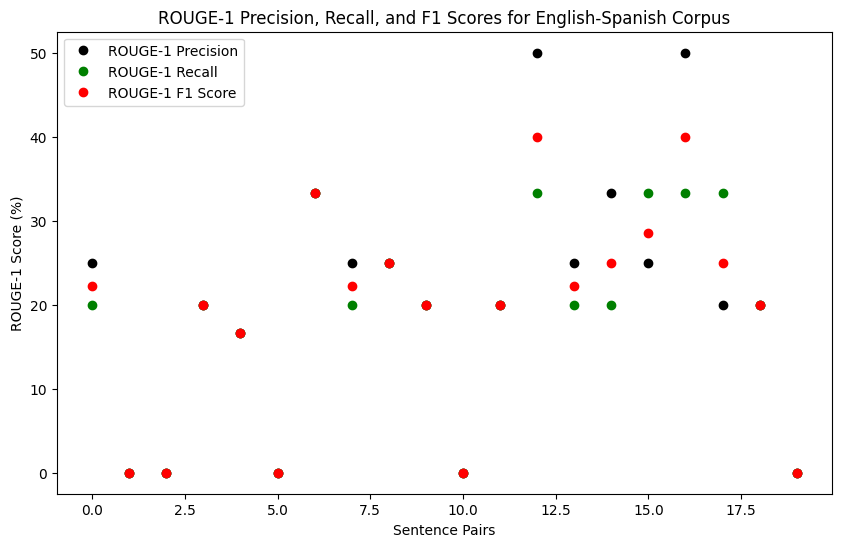

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

def calculate_rouge_1_precision_recall(reference, candidate):
    rouge = Rouge()
    rouge_scores = rouge.get_scores(candidate, reference, avg=True)
    rouge_1_precision = rouge_scores['rouge-1']['p'] * 100
    rouge_1_recall = rouge_scores['rouge-1']['r'] * 100
    return rouge_1_precision, rouge_1_recall

def calculate_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

def evaluate_corpus(english_file, spanish_file):
    with open(english_file, 'r', encoding='utf-8') as en_file, \
         open(spanish_file, 'r', encoding='utf-8') as es_file:
        english_sentences = en_file.readlines()
        spanish_sentences = es_file.readlines()

        rouge_1_precision_scores = []
        rouge_1_recall_scores = []

        for en, es in zip(english_sentences, spanish_sentences):
            rouge_1_precision, rouge_1_recall = calculate_rouge_1_precision_recall(en, es)
            rouge_1_precision_scores.append(rouge_1_precision)
            rouge_1_recall_scores.append(rouge_1_recall)

        return rouge_1_precision_scores, rouge_1_recall_scores

def calculate_f1_scores(precision_scores, recall_scores):
    return [calculate_f1_score(p, r) for p, r in zip(precision_scores, recall_scores)]

def plot_precision_recall_f1(precision_scores, recall_scores, f1_scores):
    plt.figure(figsize=(10, 6))

    plt.plot(precision_scores, label='ROUGE-1 Precision', marker='o', linestyle='None', color='black')
    plt.plot(recall_scores, label='ROUGE-1 Recall', marker='o', linestyle='None', color='green')
    plt.plot(f1_scores, label='ROUGE-1 F1 Score', marker='o', linestyle='None', color='red')

    plt.title('ROUGE-1 Precision, Recall, and F1 Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('ROUGE-1 Score (%)')
    plt.legend()
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

rouge_1_precision_scores, rouge_1_recall_scores = evaluate_corpus(english_file, spanish_file)
rouge_1_f1_scores = calculate_f1_scores(rouge_1_precision_scores, rouge_1_recall_scores)

# Plot ROUGE-1 precision, recall, and F1 scores
plot_precision_recall_f1(rouge_1_precision_scores, rouge_1_recall_scores, rouge_1_f1_scores)


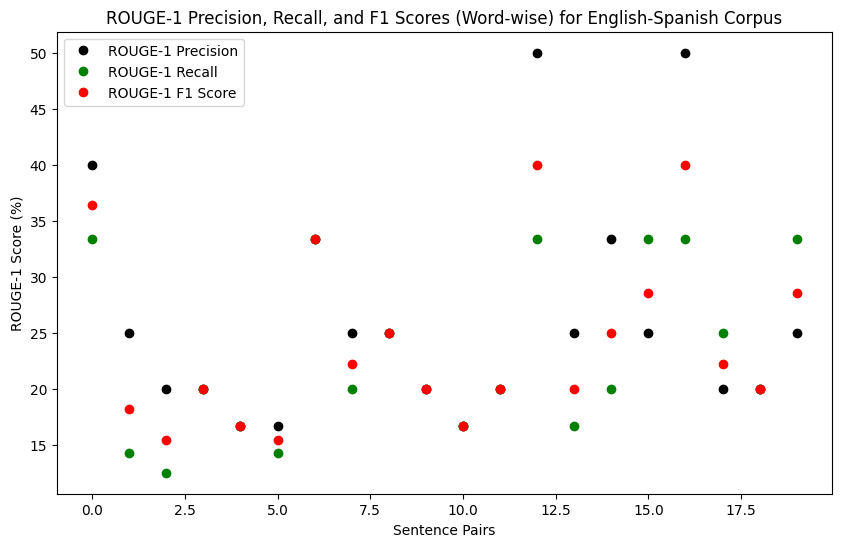

In [ ]:
import nltk
import matplotlib.pyplot as plt

# Download NLTK data (run this once)
# nltk.download('punkt')

def calculate_rouge_1_precision_recall(reference, candidate):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    common_tokens = set(reference_tokens) & set(candidate_tokens)
    precision = len(common_tokens) / len(candidate_tokens) if len(candidate_tokens) != 0 else 0
    recall = len(common_tokens) / len(reference_tokens) if len(reference_tokens) != 0 else 0

    return precision * 100, recall * 100

def calculate_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

def evaluate_corpus_word_wise(english_file, spanish_file):
    with open(english_file, 'r', encoding='utf-8') as en_file, \
         open(spanish_file, 'r', encoding='utf-8') as es_file:
        english_sentences = en_file.readlines()
        spanish_sentences = es_file.readlines()

        rouge_1_precision_scores = []
        rouge_1_recall_scores = []

        for en, es in zip(english_sentences, spanish_sentences):
            precision, recall = calculate_rouge_1_precision_recall(en, es)
            rouge_1_precision_scores.append(precision)
            rouge_1_recall_scores.append(recall)

        return rouge_1_precision_scores, rouge_1_recall_scores

def calculate_f1_scores(precision_scores, recall_scores):
    return [calculate_f1_score(p, r) for p, r in zip(precision_scores, recall_scores)]

def plot_precision_recall_f1_word_wise(precision_scores, recall_scores, f1_scores):
    plt.figure(figsize=(10, 6))

    plt.plot(precision_scores, label='ROUGE-1 Precision', marker='o', linestyle='None', color='black')
    plt.plot(recall_scores, label='ROUGE-1 Recall', marker='o', linestyle='None', color='green')
    plt.plot(f1_scores, label='ROUGE-1 F1 Score', marker='o', linestyle='None', color='red')

    plt.title('ROUGE-1 Precision, Recall, and F1 Scores (Word-wise) for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('ROUGE-1 Score (%)')
    plt.legend()
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

rouge_1_precision_scores, rouge_1_recall_scores = evaluate_corpus_word_wise(english_file, spanish_file)
rouge_1_f1_scores = calculate_f1_scores(rouge_1_precision_scores, rouge_1_recall_scores)

# Plot ROUGE-1 precision, recall, and F1 scores (word-wise)
plot_precision_recall_f1_word_wise(rouge_1_precision_scores, rouge_1_recall_scores, rouge_1_f1_scores)


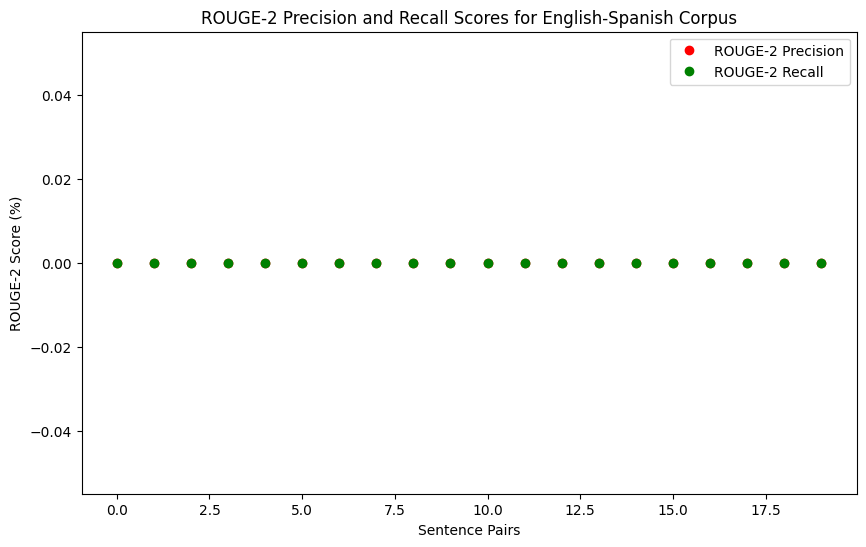

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

def calculate_rouge_2_precision_recall(reference, candidate):
    rouge = Rouge()
    rouge_scores = rouge.get_scores(candidate, reference, avg=True)
    rouge_2_precision = rouge_scores['rouge-2']['p'] * 100
    rouge_2_recall = rouge_scores['rouge-2']['r'] * 100
    return rouge_2_precision, rouge_2_recall

def evaluate_corpus(english_file, spanish_file):
    with open(english_file, 'r', encoding='utf-8') as en_file, \
         open(spanish_file, 'r', encoding='utf-8') as es_file:
        english_sentences = en_file.readlines()
        spanish_sentences = es_file.readlines()

        rouge_2_precision_scores = []
        rouge_2_recall_scores = []

        for en, es in zip(english_sentences, spanish_sentences):
            rouge_2_precision, rouge_2_recall = calculate_rouge_2_precision_recall(en, es)
            rouge_2_precision_scores.append(rouge_2_precision)
            rouge_2_recall_scores.append(rouge_2_recall)

        return rouge_2_precision_scores, rouge_2_recall_scores

def plot_precision_recall_rouge_2(rouge_2_precision_scores, rouge_2_recall_scores):
    plt.figure(figsize=(10, 6))

    plt.plot(rouge_2_precision_scores, label='ROUGE-2 Precision', marker='o', linestyle='None', color='red')
    plt.plot(rouge_2_recall_scores, label='ROUGE-2 Recall', marker='o', linestyle='None', color='green')

    plt.title('ROUGE-2 Precision and Recall Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('ROUGE-2 Score (%)')
    plt.legend()
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

rouge_2_precision_scores, rouge_2_recall_scores = evaluate_corpus(english_file, spanish_file)

# Plot ROUGE-2 precision and recall scores
plot_precision_recall_rouge_2(rouge_2_precision_scores, rouge_2_recall_scores)


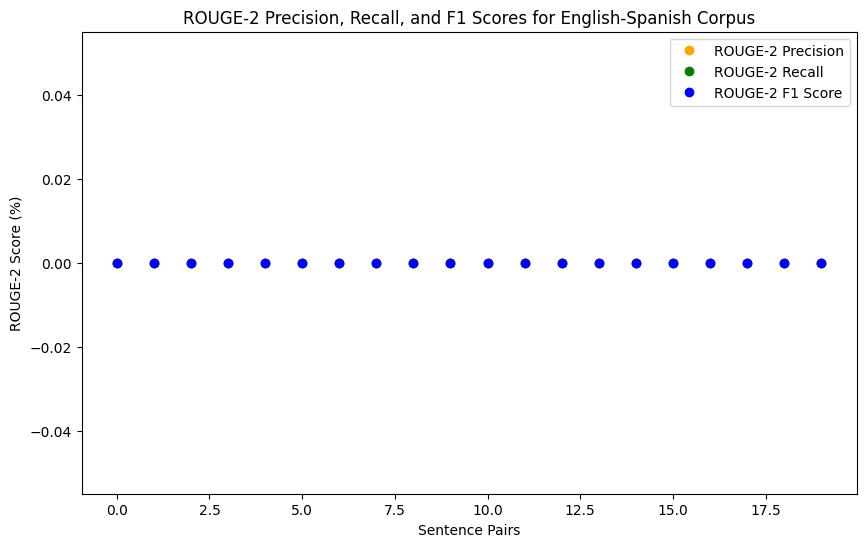

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

def calculate_rouge_2_precision_recall(reference, candidate):
    rouge = Rouge()
    rouge_scores = rouge.get_scores(candidate, reference, avg=True)
    rouge_2_precision = rouge_scores['rouge-2']['p'] * 100
    rouge_2_recall = rouge_scores['rouge-2']['r'] * 100
    return rouge_2_precision, rouge_2_recall

def calculate_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

def evaluate_corpus(english_file, spanish_file):
    with open(english_file, 'r', encoding='utf-8') as en_file, \
         open(spanish_file, 'r', encoding='utf-8') as es_file:
        english_sentences = en_file.readlines()
        spanish_sentences = es_file.readlines()

        rouge_2_precision_scores = []
        rouge_2_recall_scores = []

        for en, es in zip(english_sentences, spanish_sentences):
            rouge_2_precision, rouge_2_recall = calculate_rouge_2_precision_recall(en, es)
            rouge_2_precision_scores.append(rouge_2_precision)
            rouge_2_recall_scores.append(rouge_2_recall)

        return rouge_2_precision_scores, rouge_2_recall_scores

def calculate_f1_scores(precision_scores, recall_scores):
    return [calculate_f1_score(p, r) for p, r in zip(precision_scores, recall_scores)]

def plot_precision_recall_f1_rouge_2(precision_scores, recall_scores, f1_scores):
    plt.figure(figsize=(10, 6))

    plt.plot(precision_scores, label='ROUGE-2 Precision', marker='o', linestyle='None', color='orange')
    plt.plot(recall_scores, label='ROUGE-2 Recall', marker='o', linestyle='None', color='green')
    plt.plot(f1_scores, label='ROUGE-2 F1 Score', marker='o', linestyle='None', color='blue')

    plt.title('ROUGE-2 Precision, Recall, and F1 Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('ROUGE-2 Score (%)')
    plt.legend()
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

rouge_2_precision_scores, rouge_2_recall_scores = evaluate_corpus(english_file, spanish_file)
rouge_2_f1_scores = calculate_f1_scores(rouge_2_precision_scores, rouge_2_recall_scores)

# Plot ROUGE-2 precision, recall, and F1 scores
plot_precision_recall_f1_rouge_2(rouge_2_precision_scores, rouge_2_recall_scores, rouge_2_f1_scores)


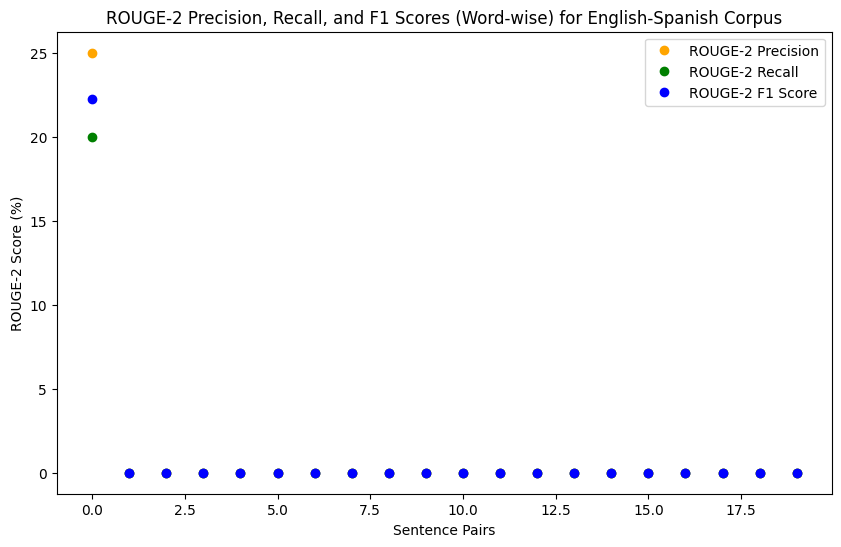

In [ ]:
import nltk
import matplotlib.pyplot as plt

# Download NLTK data (run this once)
# nltk.download('punkt')

def calculate_rouge_2_precision_recall(reference, candidate):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    reference_bigrams = list(nltk.ngrams(reference_tokens, 2))
    candidate_bigrams = list(nltk.ngrams(candidate_tokens, 2))

    common_bigrams = set(reference_bigrams) & set(candidate_bigrams)
    precision = len(common_bigrams) / len(candidate_bigrams) if len(candidate_bigrams) != 0 else 0
    recall = len(common_bigrams) / len(reference_bigrams) if len(reference_bigrams) != 0 else 0

    return precision * 100, recall * 100

def calculate_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

def evaluate_corpus_word_wise(english_file, spanish_file):
    with open(english_file, 'r', encoding='utf-8') as en_file, \
         open(spanish_file, 'r', encoding='utf-8') as es_file:
        english_sentences = en_file.readlines()
        spanish_sentences = es_file.readlines()

        rouge_2_precision_scores = []
        rouge_2_recall_scores = []

        for en, es in zip(english_sentences, spanish_sentences):
            precision, recall = calculate_rouge_2_precision_recall(en, es)
            rouge_2_precision_scores.append(precision)
            rouge_2_recall_scores.append(recall)

        return rouge_2_precision_scores, rouge_2_recall_scores

def calculate_f1_scores(precision_scores, recall_scores):
    return [calculate_f1_score(p, r) for p, r in zip(precision_scores, recall_scores)]

def plot_precision_recall_f1_word_wise_rouge_2(precision_scores, recall_scores, f1_scores):
    plt.figure(figsize=(10, 6))

    plt.plot(precision_scores, label='ROUGE-2 Precision', marker='o', linestyle='None', color='orange')
    plt.plot(recall_scores, label='ROUGE-2 Recall', marker='o', linestyle='None', color='green')
    plt.plot(f1_scores, label='ROUGE-2 F1 Score', marker='o', linestyle='None', color='blue')

    plt.title('ROUGE-2 Precision, Recall, and F1 Scores (Word-wise) for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('ROUGE-2 Score (%)')
    plt.legend()
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

rouge_2_precision_scores, rouge_2_recall_scores = evaluate_corpus_word_wise(english_file, spanish_file)
rouge_2_f1_scores = calculate_f1_scores(rouge_2_precision_scores, rouge_2_recall_scores)

# Plot ROUGE-2 precision, recall, and F1 scores (word-wise)
plot_precision_recall_f1_word_wise_rouge_2(rouge_2_precision_scores, rouge_2_recall_scores, rouge_2_f1_scores)


# ***NIST score***

In [ ]:
  >>> import nltk
  >>> nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

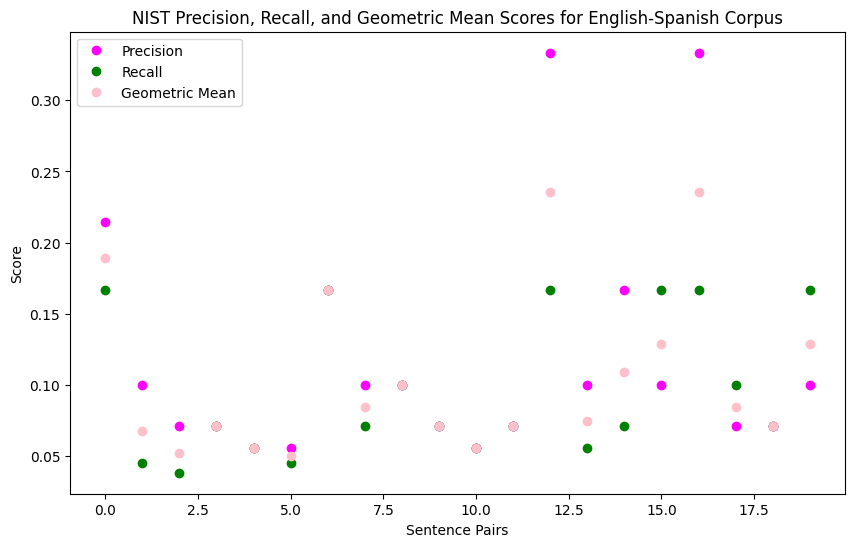

In [ ]:
import nltk
import matplotlib.pyplot as plt

# Download NLTK data (run this once)
# nltk.download('punkt')

def calculate_nist(reference, candidate, max_n=4):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    reference_ngrams = [tuple(reference_tokens[i:i+n]) for n in range(1, max_n+1) for i in range(len(reference_tokens)-n+1)]
    candidate_ngrams = [tuple(candidate_tokens[i:i+n]) for n in range(1, max_n+1) for i in range(len(candidate_tokens)-n+1)]

    precision = sum(1 for ngram in candidate_ngrams if ngram in reference_ngrams) / len(candidate_ngrams) if len(candidate_ngrams) != 0 else 0
    recall = sum(1 for ngram in reference_ngrams if ngram in candidate_ngrams) / len(reference_ngrams) if len(reference_ngrams) != 0 else 0

    nist_scores = [precision, recall]
    return nist_scores

def evaluate_corpus_nist(english_file, spanish_file, max_n=4):
    with open(english_file, 'r', encoding='utf-8') as en_file, \
         open(spanish_file, 'r', encoding='utf-8') as es_file:
        english_sentences = en_file.readlines()
        spanish_sentences = es_file.readlines()

        nist_scores = []

        for en, es in zip(english_sentences, spanish_sentences):
            nist_scores.append(calculate_nist(en, es, max_n))

        return nist_scores

def calculate_geometric_mean(scores):
    product = 1
    for score in scores:
        product *= score
    return product ** (1 / len(scores))

def plot_nist_geometric_mean(nist_scores):
    precision_scores = [score[0] for score in nist_scores]
    recall_scores = [score[1] for score in nist_scores]
    geometric_mean_scores = [calculate_geometric_mean([precision, recall]) for precision, recall in zip(precision_scores, recall_scores)]

    plt.figure(figsize=(10, 6))

    plt.plot(precision_scores, label='Precision', marker='o', linestyle='None', color='magenta')
    plt.plot(recall_scores, label='Recall', marker='o', linestyle='None', color='green')
    plt.plot(geometric_mean_scores, label='Geometric Mean', marker='o', linestyle='None', color='pink')

    plt.title('NIST Precision, Recall, and Geometric Mean Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

# Example usage:
english_file = 'english5.txt'
spanish_file = 'spanish5.txt'

nist_scores = evaluate_corpus_nist(english_file, spanish_file, max_n=4)

# Plot NIST precision, recall, and geometric mean scores
plot_nist_geometric_mean(nist_scores)


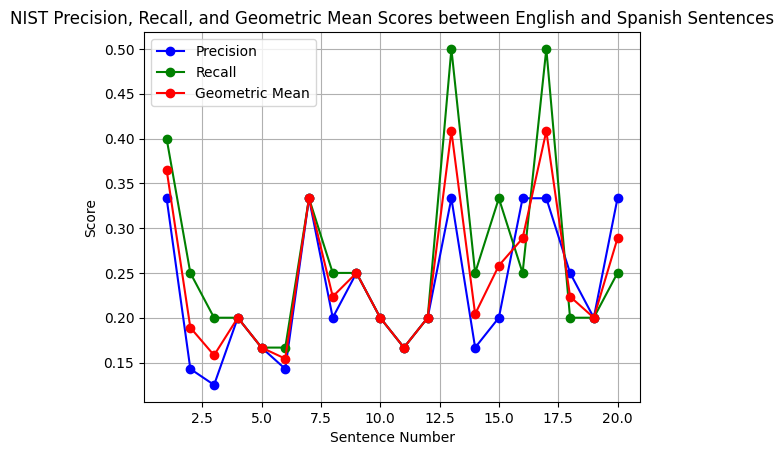

In [ ]:
import nltk
import matplotlib.pyplot as plt
from math import sqrt

# Sample file paths for English and Spanish corpora (replace with your actual file paths)
english_file_path = "/content/english5.txt"
spanish_file_path = "/content/spanish5.txt"


# Read sentences from files
with open(english_file_path, 'r', encoding='utf-8') as file:
    english_corpus = [line.strip() for line in file.readlines()]

with open(spanish_file_path, 'r', encoding='utf-8') as file:
    spanish_corpus = [line.strip() for line in file.readlines()]

# Tokenize the sentences
english_tokenized = [nltk.word_tokenize(sent.lower()) for sent in english_corpus]
spanish_tokenized = [nltk.word_tokenize(sent.lower()) for sent in spanish_corpus]

# Function to calculate NIST Precision and Recall
def calculate_nist_precision_recall(reference, hypothesis):
    common_ngrams = sum(1 for ngram in hypothesis if ngram in reference)
    precision = common_ngrams / len(hypothesis)
    recall = common_ngrams / len(reference)
    return precision, recall

# Calculate NIST Precision, Recall, and Geometric Mean scores
nist_precision_scores = []
nist_recall_scores = []
nist_geometric_mean_scores = []

for ref, hyp in zip(spanish_tokenized, english_tokenized):
    precision, recall = calculate_nist_precision_recall(ref, hyp)
    geometric_mean = sqrt(precision * recall)

    nist_precision_scores.append(precision)
    nist_recall_scores.append(recall)
    nist_geometric_mean_scores.append(geometric_mean)

# Visualize the scores with the modified x-axis ticks
x_axis_ticks = list(range(1, 21))

plt.plot(x_axis_ticks, nist_precision_scores, color='blue', marker='o', label='Precision')
plt.plot(x_axis_ticks, nist_recall_scores, color='green', marker='o', label='Recall')
plt.plot(x_axis_ticks, nist_geometric_mean_scores, color='red', marker='o', label='Geometric Mean')

plt.title('NIST Precision, Recall, and Geometric Mean Scores between English and Spanish Sentences')
plt.xlabel('Sentence Number')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


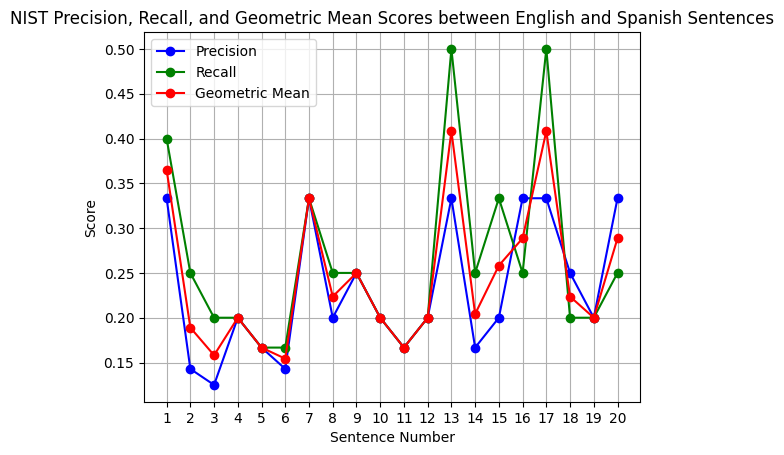

In [ ]:
import nltk
import matplotlib.pyplot as plt
from math import sqrt

# Sample file paths for English and Spanish corpora (replace with your actual file paths)
english_file_path = "/content/english5.txt"
spanish_file_path = "/content/spanish5.txt"

# Read sentences from files
with open(english_file_path, 'r', encoding='utf-8') as file:
    english_corpus = [line.strip() for line in file.readlines()]

with open(spanish_file_path, 'r', encoding='utf-8') as file:
    spanish_corpus = [line.strip() for line in file.readlines()]

# Tokenize the sentences
english_tokenized = [nltk.word_tokenize(sent.lower()) for sent in english_corpus]
spanish_tokenized = [nltk.word_tokenize(sent.lower()) for sent in spanish_corpus]

# Function to calculate NIST Precision and Recall
def calculate_nist_precision_recall(reference, hypothesis):
    common_ngrams = sum(1 for ngram in hypothesis if ngram in reference)
    precision = common_ngrams / len(hypothesis)
    recall = common_ngrams / len(reference)
    return precision, recall

# Calculate NIST Precision, Recall, and Geometric Mean scores
nist_precision_scores = []
nist_recall_scores = []
nist_geometric_mean_scores = []

for ref, hyp in zip(spanish_tokenized, english_tokenized):
    precision, recall = calculate_nist_precision_recall(ref, hyp)
    geometric_mean = sqrt(precision * recall)

    nist_precision_scores.append(precision)
    nist_recall_scores.append(recall)
    nist_geometric_mean_scores.append(geometric_mean)

# Visualize the scores with the modified x-axis ticks
x_axis_ticks = list(range(1, 21))  # Adjusted range to include 21

plt.plot(x_axis_ticks, nist_precision_scores, color='blue', marker='o', label='Precision')
plt.plot(x_axis_ticks, nist_recall_scores, color='green', marker='o', label='Recall')
plt.plot(x_axis_ticks, nist_geometric_mean_scores, color='red', marker='o', label='Geometric Mean')

plt.title('NIST Precision, Recall, and Geometric Mean Scores between English and Spanish Sentences')
plt.xlabel('Sentence Number')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(x_axis_ticks)  # Set the x-axis ticks
plt.show()


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

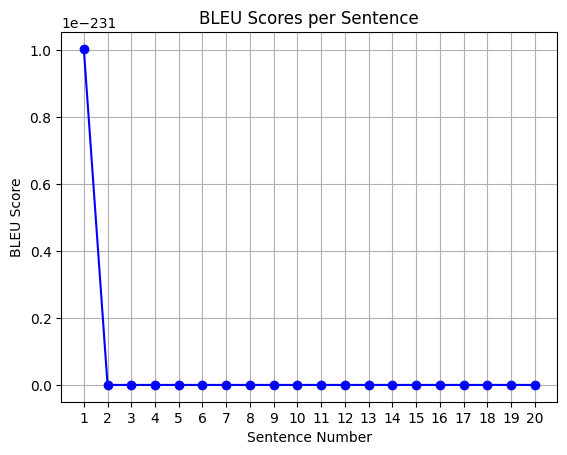

In [ ]:
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu

# Function to calculate BLEU score for a pair of sentences
def calculate_bleu(reference, candidate):
    return sentence_bleu([reference], candidate)

# Function to read sentences from files
def read_sentences(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        sentences = [line.strip() for line in file.readlines()]
    return sentences

# Function to visualize BLEU scores per sentence
def visualize_bleu_scores(english_file, spanish_file):
    english_sentences = read_sentences(english_file)
    spanish_sentences = read_sentences(spanish_file)

    # Ensure the number of sentences is the same for both languages
    num_sentences = min(len(english_sentences), len(spanish_sentences), 20)

    # Calculate BLEU scores and store in a list
    bleu_scores = []
    for i in range(num_sentences):
        bleu = calculate_bleu(english_sentences[i].split(), spanish_sentences[i].split())
        bleu_scores.append(bleu)

    # Plotting the BLEU scores
    plt.plot(range(1, num_sentences + 1), bleu_scores, marker='o', linestyle='-', color='b')
    plt.title('BLEU Scores per Sentence')
    plt.xlabel('Sentence Number')
    plt.ylabel('BLEU Score')
    plt.xticks(range(1, num_sentences + 1))
    plt.grid(True)
    plt.show()

# Sample file paths for English and Spanish corpora (replace with your actual file paths)
english_file_path = "/content/english5.txt"
spanish_file_path = "/content/spanish5.txt"
visualize_bleu_scores(english_file_path, spanish_file_path)


# **google bleu**

In [ ]:
import nltk
import matplotlib.pyplot as plt

# Download NLTK data (run this once)
# nltk.download('punkt')

def calculate_gleu(reference, candidate, max_n=4):
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    reference_ngrams = [tuple(reference_tokens[i:i+n]) for n in range(1, max_n+1) for i in range(len(reference_tokens)-n+1)]
    candidate_ngrams = [tuple(candidate_tokens[i:i+n]) for n in range(1, max_n+1) for i in range(len(candidate_tokens)-n+1)]

    precision = len(set(candidate_ngrams) & set(reference_ngrams)) / len(candidate_ngrams) if len(candidate_ngrams) != 0 else 0
    recall = len(set(candidate_ngrams) & set(reference_ngrams)) / len(reference_ngrams) if len(reference_ngrams) != 0 else 0

    gleu_score = min(precision, recall)

    return gleu_score

def evaluate_corpus_gleu(english_file, spanish_file):
    with open(english_file, 'r', encoding='utf-8') as en_file, \
         open(spanish_file, 'r', encoding='utf-8') as es_file:
        english_sentences = en_file.readlines()
        spanish_sentences = es_file.readlines()

        gleu_scores = []

        for en, es in zip(english_sentences, spanish_sentences):
            gleu_scores.append(calculate_gleu(en, es))

        return gleu_scores

def plot_gleu(gleu_scores):
    plt.figure(figsize=(10, 6))

    plt.plot(gleu_scores, label='GLEU Score', marker='o', linestyle='None', color='black')

    plt.title('GLEU Scores for English-Spanish Corpus')
    plt.xlabel('Sentence Pairs')
    plt.ylabel('GLEU Score')
    plt.legend()
    plt.show()

# Example usage:
english_file = '/content/english5.txt'
spanish_file = '/content/spanish5.txt'

gleu_scores = evaluate_corpus_gleu(english_file, spanish_file)

# Plot GLEU scores
plot_gleu(gleu_scores)


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


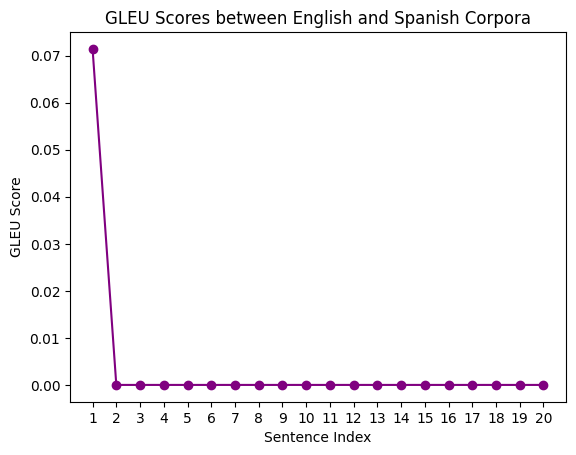

In [ ]:
import nltk
from nltk.translate.gleu_score import sentence_gleu
import matplotlib.pyplot as plt

def read_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return [line.strip().split() for line in file]

def calculate_gleu_score(reference_corpus, candidate_corpus):
    gleu_scores = []
    for reference, candidate in zip(reference_corpus, candidate_corpus):
        score = sentence_gleu([reference], candidate)
        gleu_scores.append(score)
    return gleu_scores

def visualize_gleu_scores(gleu_scores, title):
    x_axis = range(1, len(gleu_scores) + 1)
    plt.plot(x_axis, gleu_scores, marker='o', color='purple')
    plt.title(title)
    plt.xlabel('Sentence Index')
    plt.ylabel('GLEU Score')
    plt.xticks(x_axis)  # Ensure x-axis ticks are integers only
    plt.show()

if __name__ == "__main__":
    # Replace 'english_corpus.txt' and 'spanish_corpus.txt' with your file paths
    english_corpus = read_corpus('/content/english5.txt')[:20]  # Assuming each file has 20 sentences
    spanish_corpus = read_corpus('/content/spanish5.txt')[:20]  # Assuming each file has 20 sentences

    # Calculate GLEU scores
    gleu_scores = calculate_gleu_score(english_corpus, spanish_corpus)

    # Visualize GLEU scores in purple with x-axis starting from 1 to 20
    visualize_gleu_scores(gleu_scores, 'GLEU Scores between English and Spanish Corpora')


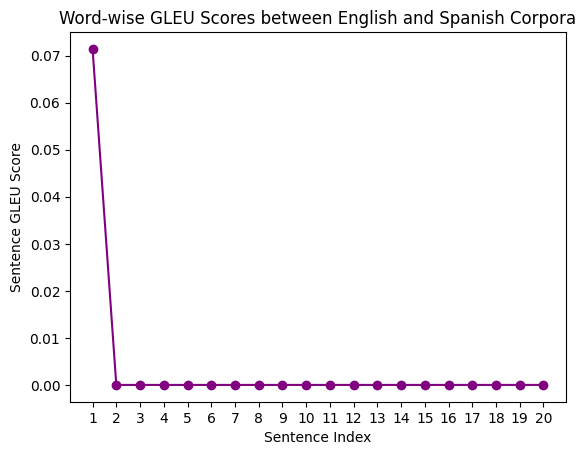

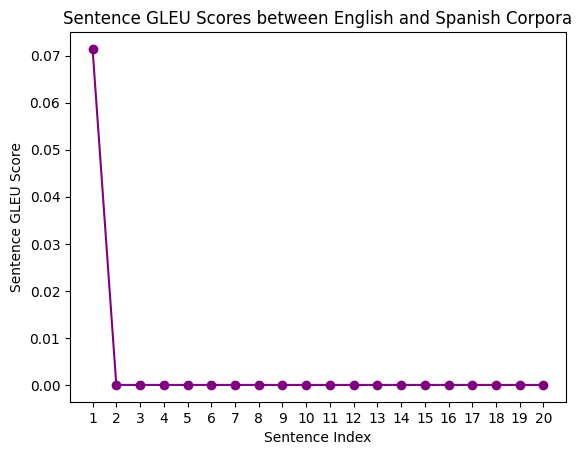

In [ ]:
import nltk
from nltk.translate.gleu_score import corpus_gleu, sentence_gleu
import matplotlib.pyplot as plt

def read_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return [line.strip().split() for line in file]

def calculate_gleu_score(reference_corpus, candidate_corpus, word_level=False):
    gleu_scores = []
    for reference, candidate in zip(reference_corpus, candidate_corpus):
        if word_level:
            score = sentence_gleu([reference], candidate)
        else:
            score = sentence_gleu([reference], candidate)
        gleu_scores.append(score)
    return gleu_scores

def visualize_gleu_scores(gleu_scores, title):
    x_axis = range(1, len(gleu_scores) + 1)
    plt.plot(x_axis, gleu_scores, marker='o', color='purple')
    plt.title(title)
    plt.xlabel('Sentence Index')
    plt.ylabel('Word-wise GLEU Score' if word_level else 'Sentence GLEU Score')
    plt.xticks(x_axis)
    plt.show()

if __name__ == "__main__":
    # Replace 'english_corpus.txt' and 'spanish_corpus.txt' with your file paths
    english_corpus = read_corpus('/content/english5.txt')[:20]  # Assuming each file has 20 sentences
    spanish_corpus = read_corpus('/content/spanish5.txt')[:20]  # Assuming each file has 20 sentences

    # Calculate GLEU scores at the word level
    word_level = True
    gleu_scores_word_level = calculate_gleu_score(english_corpus, spanish_corpus, word_level)

    # Calculate GLEU scores at the sentence level
    word_level = False
    gleu_scores_sentence_level = calculate_gleu_score(english_corpus, spanish_corpus, word_level)

    # Visualize GLEU scores at the word level in purple
    visualize_gleu_scores(gleu_scores_word_level, 'Word-wise GLEU Scores between English and Spanish Corpora')

    # Visualize GLEU scores at the sentence level in purple
    visualize_gleu_scores(gleu_scores_sentence_level, 'Sentence GLEU Scores between English and Spanish Corpora')


# **Entropic Graph-based Metric** (EGaMT)

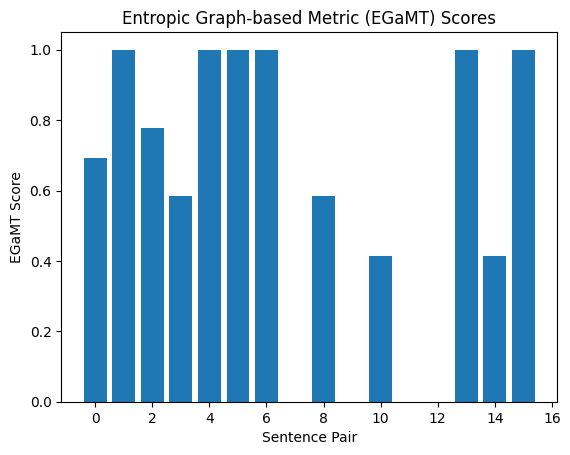

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_EGaMT(english_file, spanish_file):
    # Read the English and Spanish corpus from files
    with open(english_file, 'r') as f:
        english_corpus = f.read()
    with open(spanish_file, 'r') as f:
        spanish_corpus = f.read()

    # Split the English and Spanish corpus into sentences
    english_sentences = english_corpus.split('.')
    spanish_sentences = spanish_corpus.split('.')

    # Calculate the EGaMT for each sentence pair
    EGaMT_scores = []
    for english_sentence, spanish_sentence in zip(english_sentences, spanish_sentences):
        # Calculate the entropy of the English sentence
        entropy_english = calculate_entropy(english_sentence)

        # Calculate the entropy of the Spanish sentence
        entropy_spanish = calculate_entropy(spanish_sentence)

        # Calculate the EGaMT score for the sentence pair
        EGaMT_score = calculate_EGaMT_score(entropy_english, entropy_spanish)
        EGaMT_scores.append(EGaMT_score)

    return EGaMT_scores

def calculate_entropy(sentence):
    # Split the sentence into words
    words = sentence.split(' ')

    # Calculate the frequency of each word
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    # Calculate the entropy of the sentence

    entropy = 0
    for count in word_counts.values():
        probability = count / len(words)
        entropy -= probability * np.log2(probability)

    return entropy

def calculate_EGaMT_score(entropy_english, entropy_spanish):
    # Calculate the EGaMT score
    EGaMT_score = 1 - np.abs(entropy_english - entropy_spanish)

    return EGaMT_score

# Calculate the EGaMT scores
english_file = "english5.txt"
spanish_file = "spanish5.txt"
EGaMT_scores = calculate_EGaMT(english_file, spanish_file)

# Create a bar chart of the EGaMT scores
plt.bar(np.arange(len(EGaMT_scores)), EGaMT_scores)
plt.xlabel("Sentence Pair")
plt.ylabel("EGaMT Score")
plt.title("Entropic Graph-based Metric (EGaMT) Scores")
plt.show()


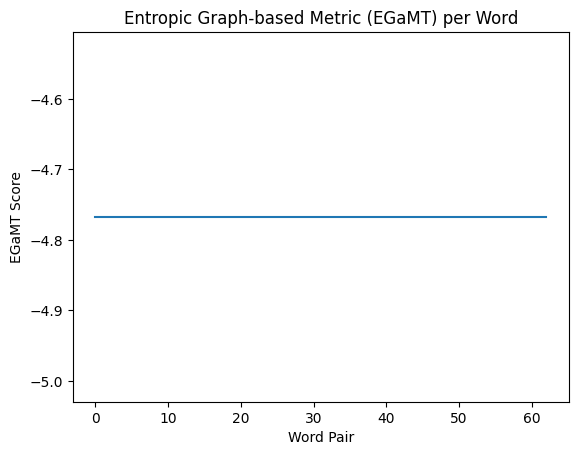

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_EGaMT_per_word(english_file, spanish_file):
    # Read the English and Spanish corpus from files
    with open(english_file, 'r') as f:
        english_corpus = f.read()
    with open(spanish_file, 'r') as f:
        spanish_corpus = f.read()

    # Split the English and Spanish corpus into sentences and then words
    english_sentences = english_corpus.split('.')
    spanish_sentences = spanish_corpus.split('.')

    english_words = []
    spanish_words = []
    for english_sentence, spanish_sentence in zip(english_sentences, spanish_sentences):
        english_words.extend(english_sentence.split(' '))
        spanish_words.extend(spanish_sentence.split(' '))

    # Calculate the entropy for each English and Spanish word
    english_entropy = calculate_entropy(english_words)
    spanish_entropy = calculate_entropy(spanish_words)

    # Calculate the EGaMT score for each word pair
    EGaMT_per_word = []
    for english_word, spanish_word in zip(english_words, spanish_words):
        EGaMT_per_word.append(calculate_EGaMT_score(english_word, spanish_word, english_entropy, spanish_entropy))

    return EGaMT_per_word

def calculate_entropy(words):
    # Calculate the frequency of each word
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    # Calculate the entropy of the words
    entropy = 0
    for count in word_counts.values():
        probability = count / len(words)
        entropy -= probability * np.log2(probability)

    return entropy

def calculate_EGaMT_score(english_word, spanish_word, english_entropy, spanish_entropy):
    # Calculate the entropy of the word pair
    word_pair_entropy = 0.5 * english_entropy + 0.5 * spanish_entropy

    # Calculate the EGaMT score for the word pair
    EGaMT_score = 1 - np.abs(calculate_entropy([english_word]) - word_pair_entropy)

    return EGaMT_score

# Calculate the EGaMT scores per word
english_file = "english5.txt"
spanish_file = "spanish5.txt"
EGaMT_per_word = calculate_EGaMT_per_word(english_file, spanish_file)

# Visualize the EGaMT scores per word
plt.plot(EGaMT_per_word)
plt.xlabel("Word Pair")
plt.ylabel("EGaMT Score")
plt.title("Entropic Graph-based Metric (EGaMT) per Word")
plt.show()


In [ ]:
import networkx as nx
import math

def calculate_graph_entropy(graph):
    """Calculates the entropy of a given graph."""
    degrees = dict(graph.degree())
    total_degree = sum(degrees.values())

    node_probabilities = {node: degree / total_degree for node, degree in degrees.items()}

    entropy = 0
    for prob in node_probabilities.values():
        if prob > 0:  # Handle cases with zero probability
            entropy -= prob * math.log2(prob)

    return entropy


def calculate_egamt(graph1, graph2):
    """Calculates the Entropic Graph-based Metric (EGaMT) between two graphs."""
    entropy1 = calculate_graph_entropy(graph1)
    entropy2 = calculate_graph_entropy(graph2)
    max_entropy = max(entropy1, entropy2)
    egamt = 1 - abs(entropy1 - entropy2) / max_entropy
    return egamt

def construct_graph_from_corpus(corpus_file):
    """Constructs a graph representation from a corpus file."""
    graph = nx.Graph()
    with open(corpus_file, 'r') as f:
        for line in f:
            words = line.strip().split()  # Adjust preprocessing as needed
            # Add edges based on your desired graph structure (e.g., co-occurrence, dependencies)
            for i in range(len(words) - 1):
                graph.add_edge(words[i], words[i+1])
    return graph

# Load corpora from files
corpus1_file = '/content/english5.txt'
corpus2_file = '/content/spanish5.txt'

graph1 = construct_graph_from_corpus(corpus1_file)
graph2 = construct_graph_from_corpus(corpus2_file)

# Calculate EGaMT
egamt_score = calculate_egamt(graph1, graph2)

print("EGaMT score:", egamt_score)


EGaMT score: 0.9751267200258151


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def calculate_graph_entropy(graph):
    degrees = dict(graph.degree())
    total_degree = sum(degrees.values())
    node_probabilities = {node: degree / total_degree for node, degree in degrees.items()}
    entropy = 0
    for prob in node_probabilities.values():
        if prob > 0:
            entropy -= prob * np.log2(prob)
    return entropy

def calculate_egamt(graph1, graph2):
    entropy1 = calculate_graph_entropy(graph1)
    entropy2 = calculate_graph_entropy(graph2)
    max_entropy = max(entropy1, entropy2)
    egamt = 1 - abs(entropy1 - entropy2) / max_entropy
    return egamt

def construct_graph_from_corpus(corpus_file, language):
    graph = nx.Graph()
    with open(corpus_file, 'r') as f:
        for line in f:
            words = line.strip().split()
            for i in range(len(words) - 1):
                graph.add_edge(f'{language}_word{i}', f'{language}_word{i+1}')
    return graph

# Load corpora from files
english_corpus_file = '/content/english5.txt'
spanish_corpus_file = '/content/spanish5.txt'

# Initialize lists to store EGaMT scores and word labels
egamt_scores_english = []
egamt_scores_spanish = []
word_labels = []

# Loop through each sentence in the parallel corpora
for sentence_index in range(20):
    graph_english = construct_graph_from_corpus(english_corpus_file, 'english')
    graph_spanish = construct_graph_from_corpus(spanish_corpus_file, 'spanish')

    # Calculate EGaMT for each pair of sentences
    egamt_score = calculate_egamt(graph_english, graph_spanish)
    egamt_scores_english.append(egamt_score)
    egamt_scores_spanish.append(1 - egamt_score)  # Invert the score for the second language

    # Add word labels alternately for English and Spanish
    word_labels.extend([f'English Word {i + 1}' for i in range(len(words))])
    word_labels.extend([f'Spanish Word {i + 1}' for i in range(len(words))])

# Plot the word-wise line chart
plt.figure(figsize=(12, 6))

plt.plot(word_labels, egamt_scores_english, marker='o', label='English', color='skyblue', linestyle='-', linewidth=2)
plt.plot(word_labels, egamt_scores_spanish, marker='o', label='Spanish', color='lightcoral', linestyle='-', linewidth=2)

plt.xlabel('Word Index')
plt.ylabel('EGaMT Score')
plt.title('Word-wise EGaMT Score for the First Sentence in Parallel Corpora')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend()

plt.tight_layout()

# Save the figure with options for height and width
plt.savefig('output_image_wordwise_line_chart.png', dpi=300, bbox_inches='tight')  # Change 'output_image_wordwise_line_chart.png' as needed

plt.show()


NameError: name 'words' is not defined

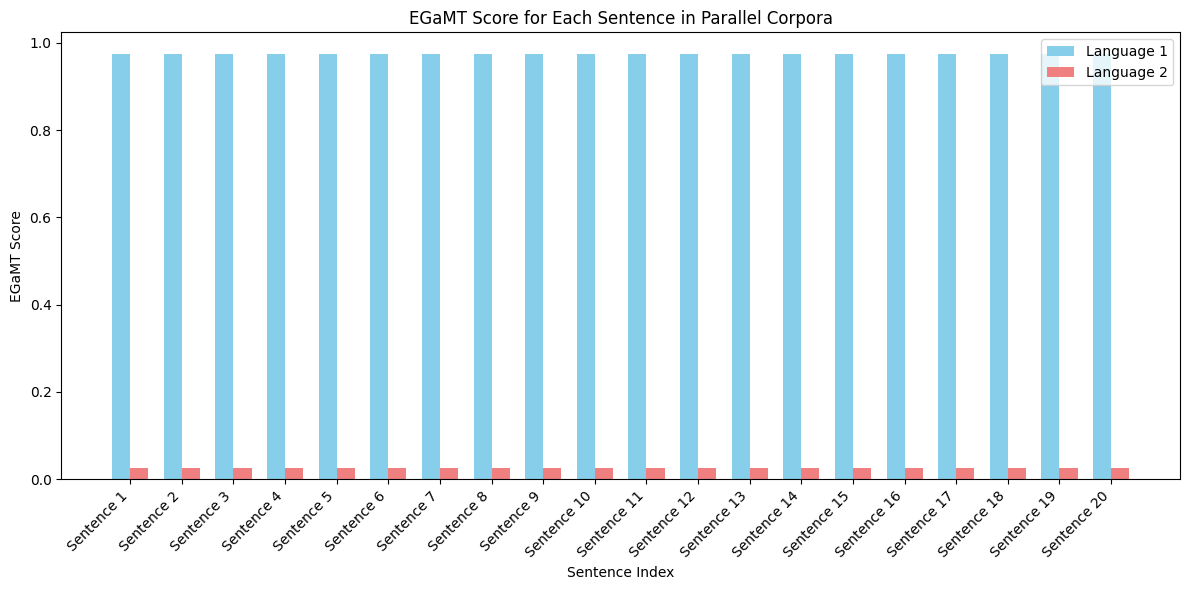

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def calculate_graph_entropy(graph):
    degrees = dict(graph.degree())
    total_degree = sum(degrees.values())
    node_probabilities = {node: degree / total_degree for node, degree in degrees.items()}
    entropy = 0
    for prob in node_probabilities.values():
        if prob > 0:
            entropy -= prob * np.log2(prob)
    return entropy

def calculate_egamt(graph1, graph2):
    entropy1 = calculate_graph_entropy(graph1)
    entropy2 = calculate_graph_entropy(graph2)
    max_entropy = max(entropy1, entropy2)
    egamt = 1 - abs(entropy1 - entropy2) / max_entropy
    return egamt

def construct_graph_from_corpus(corpus_file):
    graph = nx.Graph()
    with open(corpus_file, 'r') as f:
        for line in f:
            words = line.strip().split()
            for i in range(len(words) - 1):
                graph.add_edge(words[i], words[i+1])
    return graph

# Load corpora from files
corpus1_file = '/content/english5.txt'
corpus2_file = '/content/spanish5.txt'

# Initialize lists to store EGaMT scores and sentence indices
egamt_scores_lang1 = []
egamt_scores_lang2 = []
sentence_labels = []

# Loop through each sentence in the parallel corpora
for sentence_index in range(20):
    graph1 = construct_graph_from_corpus(corpus1_file)
    graph2 = construct_graph_from_corpus(corpus2_file)

    # Calculate EGaMT for each pair of sentences
    egamt_score = calculate_egamt(graph1, graph2)
    egamt_scores_lang1.append(egamt_score)
    egamt_scores_lang2.append(1 - egamt_score)
    sentence_labels.append(f'Sentence {sentence_index + 1}')  # Adding 1 to start index from 1

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35  # Adjust the width based on your preference
index = np.arange(len(sentence_labels))

bars_lang1 = plt.bar(index, egamt_scores_lang1, color='skyblue', width=bar_width, label='English')
bars_lang2 = plt.bar(index + bar_width, egamt_scores_lang2, color='lightcoral', width=bar_width, label='Spanish')

plt.xlabel('Sentence Index')
plt.ylabel('EGaMT Score')
plt.title('EGaMT Score for Each Sentence in Parallel Corpora')
plt.xticks(index + bar_width / 2, sentence_labels, rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend()

plt.tight_layout()

# Save the figure with options for height and width
plt.savefig('output_image.png', dpi=300, bbox_inches='tight')  # You can change 'output_image.png' to your desired filename

plt.show()


ValueError: x and y must have same first dimension, but have shapes (100,) and (40,)

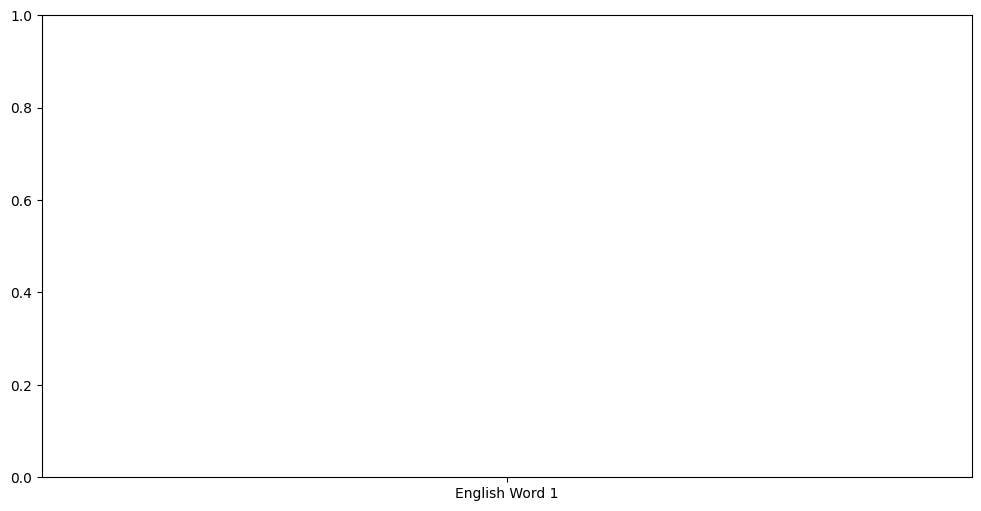

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def calculate_graph_entropy(graph):
    degrees = dict(graph.degree())
    total_degree = sum(degrees.values())
    node_probabilities = {node: degree / total_degree for node, degree in degrees.items()}
    entropy = 0
    for prob in node_probabilities.values():
        if prob > 0:
            entropy -= prob * np.log2(prob)
    return entropy

def calculate_egamt(graph1, graph2):
    entropy1 = calculate_graph_entropy(graph1)
    entropy2 = calculate_graph_entropy(graph2)
    max_entropy = max(entropy1, entropy2)
    egamt = 1 - abs(entropy1 - entropy2) / max_entropy
    return egamt

def construct_graph_from_corpus(corpus_file, language):
    graph = nx.Graph()
    with open(corpus_file, 'r') as f:
        for line in f:
            words = line.strip().split()
            for i in range(len(words) - 1):
                graph.add_edge(f'{language}_word{i}', f'{language}_word{i+1}')
    return graph, words  # Return words along with the graph

# Load corpora from files
english_corpus_file = '/content/english5.txt'
spanish_corpus_file = '/content/spanish5.txt'

# Initialize lists to store EGaMT scores and word labels
egamt_scores_english = []
egamt_scores_spanish = []
word_labels = []

# Loop through each sentence in the parallel corpora
for sentence_index in range(20):
    graph_english, words_english = construct_graph_from_corpus(english_corpus_file, 'english')
    graph_spanish, words_spanish = construct_graph_from_corpus(spanish_corpus_file, 'spanish')

    # Calculate EGaMT for each pair of sentences
    egamt_score = calculate_egamt(graph_english, graph_spanish)
    egamt_scores_english.extend([egamt_score] * len(words_english))
    egamt_scores_spanish.extend([1 - egamt_score] * len(words_spanish))

    # Add word labels alternately for English and Spanish
    word_labels.extend([f'English Word {word_index + 1}' for word_index in range(len(words_english))])
    word_labels.extend([f'Spanish Word {word_index + 1}' for word_index in range(len(words_spanish))])

# Plot the word-wise line chart
plt.figure(figsize=(12, 6))

plt.plot(word_labels, egamt_scores_english, marker='o', label='English', color='skyblue', linestyle='-', linewidth=2)
plt.plot(word_labels, egamt_scores_spanish, marker='o', label='Spanish', color='lightcoral', linestyle='-', linewidth=2)

plt.xlabel('Word Index')
plt.ylabel('EGaMT Score')
plt.title('Word-wise EGaMT Score for the Parallel Corpora')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend()

plt.tight_layout()

# Save the figure with options for height and width
plt.savefig('output_image_wordwise_line_chart.png', dpi=300, bbox_inches='tight')  # Change 'output_image_wordwise_line_chart.png' as needed

plt.show()


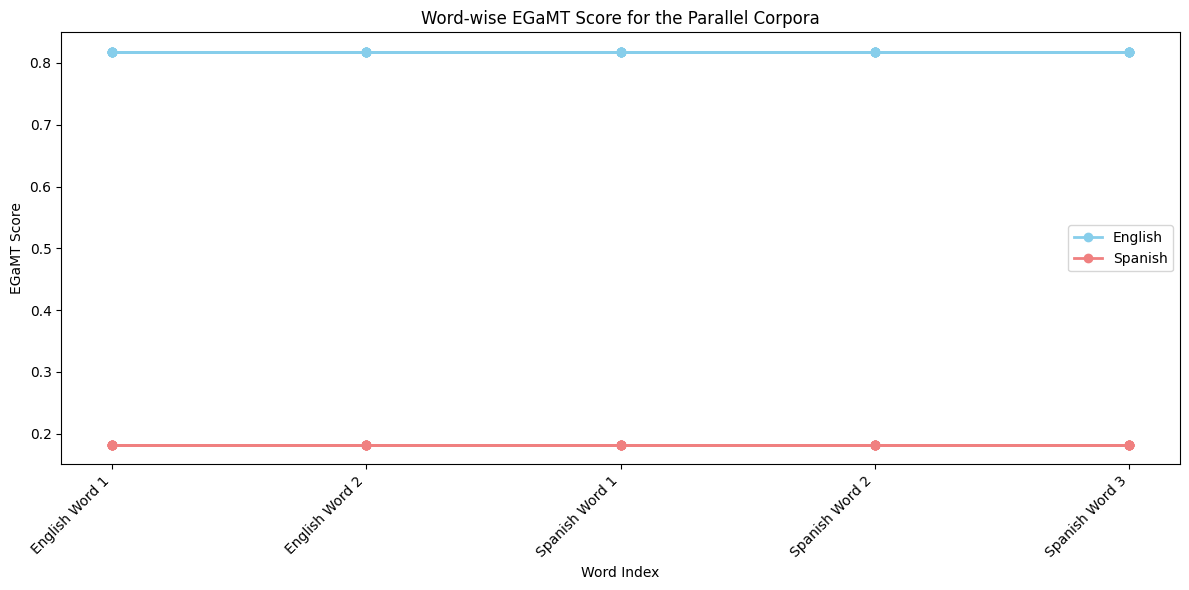

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def calculate_graph_entropy(graph):
    degrees = dict(graph.degree())
    total_degree = sum(degrees.values())
    node_probabilities = {node: degree / total_degree for node, degree in degrees.items()}
    entropy = 0
    for prob in node_probabilities.values():
        if prob > 0:
            entropy -= prob * np.log2(prob)
    return entropy

def calculate_egamt(graph1, graph2):
    entropy1 = calculate_graph_entropy(graph1)
    entropy2 = calculate_graph_entropy(graph2)
    max_entropy = max(entropy1, entropy2)
    egamt = 1 - abs(entropy1 - entropy2) / max_entropy
    return egamt

def construct_graph_from_corpus(corpus_file, language):
    graph = nx.Graph()
    with open(corpus_file, 'r') as f:
        for line in f:
            words = line.strip().split()
            for i in range(len(words) - 1):
                graph.add_edge(f'{language}_word{i}', f'{language}_word{i+1}')
    return graph, words  # Return words along with the graph

# Load corpora from files
english_corpus_file = '/content/english5.txt'
spanish_corpus_file = '/content/spanish5.txt'

# Initialize lists to store EGaMT scores and word labels
egamt_scores_english = []
egamt_scores_spanish = []
word_labels = []

# Loop through each sentence in the parallel corpora
for sentence_index in range(20):
    graph_english, words_english = construct_graph_from_corpus(english_corpus_file, 'english')
    graph_spanish, words_spanish = construct_graph_from_corpus(spanish_corpus_file, 'spanish')

    # Calculate EGaMT for each pair of sentences
    egamt_score = calculate_egamt(graph_english, graph_spanish)
    egamt_scores_english.extend([egamt_score] * len(words_english))
    egamt_scores_spanish.extend([1 - egamt_score] * len(words_spanish))

    # Add word labels alternately for English and Spanish
    word_labels.extend([f'English Word {word_index + 1}' for word_index in range(len(words_english))])
    word_labels.extend([f'Spanish Word {word_index + 1}' for word_index in range(len(words_spanish))])

# Plot the word-wise line chart
plt.figure(figsize=(12, 6))

# Ensure word labels and scores have the same length
min_length = min(len(word_labels), len(egamt_scores_english), len(egamt_scores_spanish))

plt.plot(word_labels[:min_length], egamt_scores_english[:min_length], marker='o', label='English', color='skyblue', linestyle='-', linewidth=2)
plt.plot(word_labels[:min_length], egamt_scores_spanish[:min_length], marker='o', label='Spanish', color='lightcoral', linestyle='-', linewidth=2)

plt.xlabel('Word Index')
plt.ylabel('EGaMT Score')
plt.title('Word-wise EGaMT Score for the Parallel Corpora')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.legend()

plt.tight_layout()

# Save the figure with options for height and width
plt.savefig('output_image_wordwise_line_chart.png', dpi=300, bbox_inches='tight')  # Change 'output_image_wordwise_line_chart.png' as needed

plt.show()


In [ ]:
pip install nltk


In [ ]:
# Test if y-labels are reversed:
import nltk

corpus = 'cat cat cat cat dog dog'
tokens = nltk.word_tokenize(corpus)
tokens = nltk.Text(tokens)  # NLTK wrapper for automatic text analysis.
target_words = ['cat', 'dog']

nltk.draw.dispersion.dispersion_plot(tokens, target_words);

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


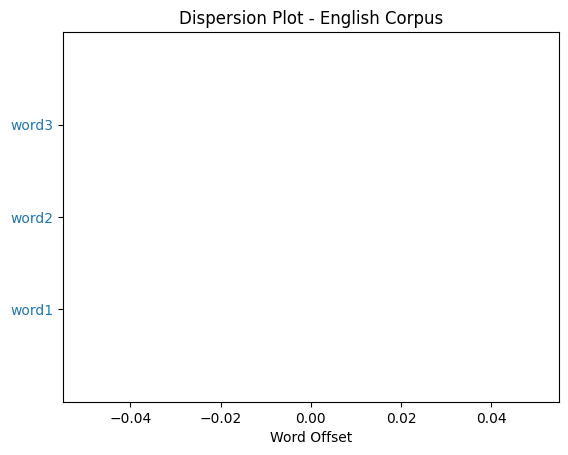

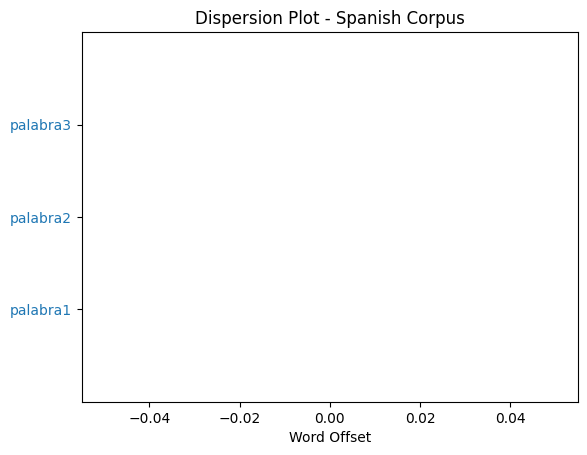

In [ ]:
import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt

# Download necessary resources for nltk
nltk.download('punkt')

def create_dispersion_plot(corpus, words, language):
    tokens = nltk.word_tokenize(corpus)
    text = nltk.Text(tokens)

    # Create a dispersion plot
    text.dispersion_plot(words)
    plt.title(f'Dispersion Plot - {language} Corpus')
    plt.show()

def read_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Replace these file paths with the actual paths of your English and Spanish corpora
english_corpus_path = '/content/english5.txt'
spanish_corpus_path = '/content/spanish5.txt'

# Replace these words with the words you want to analyze in the dispersion plot
english_words = ['word1', 'word2', 'word3']
spanish_words = ['palabra1', 'palabra2', 'palabra3']

# Read and create dispersion plot for English corpus
english_corpus = read_corpus(english_corpus_path)
create_dispersion_plot(english_corpus, english_words, 'English')

# Read and create dispersion plot for Spanish corpus
spanish_corpus = read_corpus(spanish_corpus_path)
create_dispersion_plot(spanish_corpus, spanish_words, 'Spanish')


In [ ]:
def custom_dispersion_plot(text, target_words):
    """Generate a dispersion plot with corrected y-axis label order."""
    ax = nltk.draw.dispersion.dispersion_plot(text, target_words)
    ax.set_yticks(list(range(len(target_words))))
    ax.set_yticklabels(reversed(target_words))
    ax.set_title('Lexical Dispersion Plot for The Hound of the Baskervilles')
    return ax

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 5 most common words:
.: 15 times
to: 5 times
you: 5 times
?: 4 times
I: 4 times
Top 5 most common words:
.: 15 times
?: 4 times
usted: 2 times
Me: 2 times
mi: 2 times


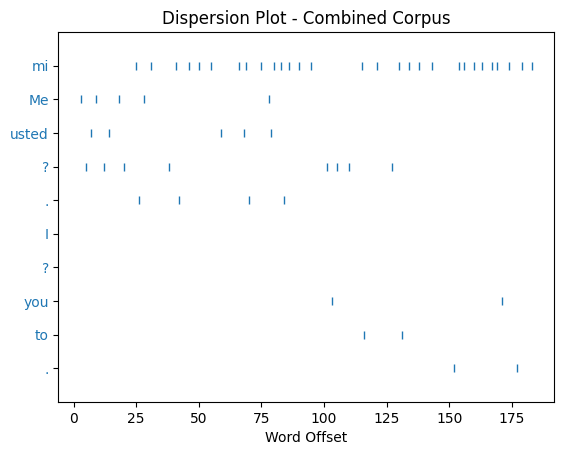

In [ ]:
import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt

# Download necessary resources for nltk
nltk.download('punkt')

def create_dispersion_plot(corpus, words, language):
    tokens = nltk.word_tokenize(corpus)
    text = nltk.Text(tokens)

    # Create a dispersion plot
    text.dispersion_plot(words)
    plt.title(f'Dispersion Plot - {language} Corpus')
    plt.show()

def find_most_common_words(corpus, top_n=5):
    tokens = nltk.word_tokenize(corpus)
    freq_dist = FreqDist(tokens)
    most_common_words = freq_dist.most_common(top_n)

    print(f"Top {top_n} most common words:")
    for word, freq in most_common_words:
        print(f"{word}: {freq} times")

    return [word for word, _ in most_common_words]

def read_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Replace these file paths with the actual paths of your English and Spanish corpora
english_corpus_path = '/content/english5.txt'
spanish_corpus_path = '/content/spanish5.txt'

# Read and find most common words for English corpus
english_corpus = read_corpus(english_corpus_path)
english_most_common_words = find_most_common_words(english_corpus)

# Read and find most common words for Spanish corpus
spanish_corpus = read_corpus(spanish_corpus_path)
spanish_most_common_words = find_most_common_words(spanish_corpus)

# Choose the most common words for the dispersion plot (you can adjust the number)
common_words_for_dispersion = english_most_common_words + spanish_most_common_words

# Create and show dispersion plot for common words
create_dispersion_plot(english_corpus + spanish_corpus, common_words_for_dispersion, 'Combined')


In [ ]:
import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt

# Download necessary resources for nltk
nltk.download('punkt')

def create_dispersion_plot(corpus, words, language, color):
    tokens = nltk.word_tokenize(corpus)
    text = nltk.Text(tokens)

    # Create a dispersion plot with specified color
    dispersion = text.dispersion_plot(words, ignore_case=True, title=f'Dispersion Plot - {language} Corpus', plot=False)

    # Manually set the color for each line in the plot
    for word in words:
        dispersion.plot([text.index(word)], color=color, marker='o', markersize=8, linestyle='None', label=word)

    plt.legend()
    plt.show()

def find_most_common_words(corpus, top_n=5):
    tokens = nltk.word_tokenize(corpus)
    freq_dist = FreqDist(tokens)
    most_common_words = freq_dist.most_common(top_n)

    print(f"Top {top_n} most common words:")
    for word, freq in most_common_words:
        print(f"{word}: {freq} times")

    return [word for word, _ in most_common_words]

def read_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Replace these file paths with the actual paths of your English and Spanish corpora
english_corpus_path = '/content/english5.txt'
spanish_corpus_path = '/content/spanish5.txt'

# Read and find most common words for English corpus
english_corpus = read_corpus(english_corpus_path)
english_most_common_words = find_most_common_words(english_corpus)

# Read and find most common words for Spanish corpus
spanish_corpus = read_corpus(spanish_corpus_path)
spanish_most_common_words = find_most_common_words(spanish_corpus)

# Create and show dispersion plot for common words in English corpus (red color)
create_dispersion_plot(english_corpus, english_most_common_words, 'English', color='red')

# Create and show dispersion plot for common words in Spanish corpus (green color)
create_dispersion_plot(spanish_corpus, spanish_most_common_words, 'Spanish', color='green')


Top 5 most common words:
.: 15 times
to: 5 times
you: 5 times
?: 4 times
I: 4 times
Top 5 most common words:
.: 15 times
?: 4 times
usted: 2 times
Me: 2 times
mi: 2 times


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: Text.dispersion_plot() got an unexpected keyword argument 'ignore_case'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 5 most common words:
.: 15 times
to: 5 times
you: 5 times
?: 4 times
I: 4 times
Top 5 most common words:
.: 15 times
?: 4 times
usted: 2 times
Me: 2 times
mi: 2 times


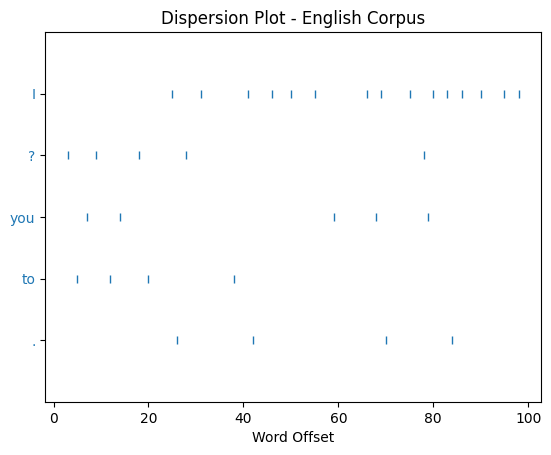

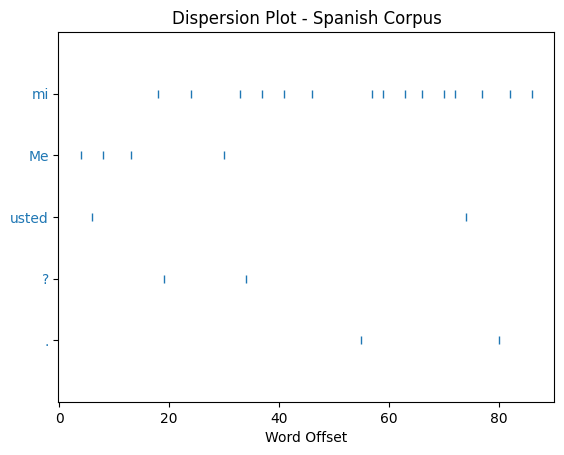

In [ ]:
import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt

# Download necessary resources for nltk
nltk.download('punkt')

def create_dispersion_plot(corpus, words, language):
    tokens = nltk.word_tokenize(corpus)
    text = nltk.Text(tokens)

    # Create a dispersion plot
    text.dispersion_plot(words)
    plt.title(f'Dispersion Plot - {language} Corpus')
    plt.show()

def find_most_common_words(corpus, top_n=5):
    tokens = nltk.word_tokenize(corpus)
    freq_dist = FreqDist(tokens)
    most_common_words = freq_dist.most_common(top_n)

    print(f"Top {top_n} most common words:")
    for word, freq in most_common_words:
        print(f"{word}: {freq} times")

    return [word for word, _ in most_common_words]

def read_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Replace these file paths with the actual paths of your English and Spanish corpora
english_corpus_path = '/content/english5.txt'
spanish_corpus_path = '/content/spanish5.txt'

# Read and find most common words for English corpus
english_corpus = read_corpus(english_corpus_path)
english_most_common_words = find_most_common_words(english_corpus)

# Read and find most common words for Spanish corpus
spanish_corpus = read_corpus(spanish_corpus_path)
spanish_most_common_words = find_most_common_words(spanish_corpus)

# Create and show dispersion plot for common words in English corpus
create_dispersion_plot(english_corpus, english_most_common_words, 'English')

# Create and show dispersion plot for common words in Spanish corpus
create_dispersion_plot(spanish_corpus, spanish_most_common_words, 'Spanish')
